# Load and process data 

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
import json

# text process
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer, RegexpStemmer

In [2]:
in_path = r'C:\Users\User\Desktop\Instagram\data'

In [3]:
with open(in_path + '/huangshan.json', 'r', encoding='utf-8') as f:
    data = json.loads(f.read())

In [4]:
df = pd.DataFrame(data)
df.head()

comments_disabled                       dimensions  \
0               NaN  {'height': 1080, 'width': 1080}   
1               NaN   {'height': 706, 'width': 1080}   
2               NaN  {'height': 1350, 'width': 1080}   
3               NaN  {'height': 1083, 'width': 1080}   
4               NaN  {'height': 1349, 'width': 1080}   

                                         display_url   edge_liked_by  \
0  https://scontent-atl3-1.cdninstagram.com/vp/02...   {'count': 31}   
1  https://scontent-atl3-1.cdninstagram.com/vp/31...  {'count': 105}   
2  https://scontent-atl3-1.cdninstagram.com/vp/e8...  {'count': 902}   
3  https://scontent-atl3-1.cdninstagram.com/vp/cc...   {'count': 35}   
4  https://scontent-atl3-1.cdninstagram.com/vp/7b...  {'count': 124}   

  edge_media_preview_like                              edge_media_to_caption  \
0           {'count': 31}  {'edges': [{'node': {'text': 'Breathtaking vie...   
1          {'count': 105}  {'edges': [{'node': {'text': 'I’m grateful for...   
2          {'count': 902}  {'edges': [{'node': {'text': '徽州古城 Wandering a...   
3           {'count': 35}  {'edges': [{'node': {'text': '#huangshan #moun...   
4          {'count': 124}  {'edges': [{'node': {'text': 'One of my favori...   

  edge_media_to_comment                   id  is_video  \
0          {'count': 2}  1768635695000550746     False   
1          {'count': 4}  1779027164797484376     False   
2        {'count': 333}  1751782291691387418     False   
3          {'count': 5}  1763494337332593967     False   
4         {'count': 15}  1779157559519623087     False   

                                            location                 owner  \
0  {'has_public_page': True, 'id': '236999748', '...    {'id': '49135036'}   
1  {'has_public_page': True, 'id': '236999748', '...   {'id': '184152999'}   
2  {'has_public_page': True, 'id': '361110201', '...  {'id': '5064849724'}   
3                                               None   {'id': '314391040'}   
4  {'has_public_page': True, 'id': '361110201', '...  {'id': '1525150815'}   

     shortcode                                               tags  \
0  BiLdMtBlX1a                              [HuangShan, cablecar]   
1  BiwX8fbhj1Y                                                 []   
2  BhPlLaEFboa  [girlsthatwander, shotzdelight, asia_vacations...   
3  Bh5MMGkH0Uv        [free, mountains, hiking, huangshan, fresh]   
4  Biw1l--njev  [forgetyourownpath, chinahighlights, sonyalpha...   

   taken_at_timestamp                                thumbnail_resources  \
0          1525057826  [{'config_height': 150, 'config_width': 150, '...   
1          1526296586  [{'config_height': 150, 'config_width': 150, '...   
2          1523048744  [{'config_height': 150, 'config_width': 150, '...   
3          1524444928  [{'config_height': 150, 'config_width': 150, '...   
4          1526312130  [{'config_height': 150, 'config_width': 150, '...   

                                       thumbnail_src  \
0  https://scontent-atl3-1.cdninstagram.com/vp/b8...   
1  https://scontent-atl3-1.cdninstagram.com/vp/b2...   
2  https://scontent-atl3-1.cdninstagram.com/vp/b8...   
3  https://scontent-atl3-1.cdninstagram.com/vp/bb...   
4  https://scontent-atl3-1.cdninstagram.com/vp/4f...   

                                                urls  video_view_count  
0  [https://scontent-atl3-1.cdninstagram.com/vp/0...               NaN  
1  [https://scontent-atl3-1.cdninstagram.com/vp/3...               NaN  
2  [https://scontent-atl3-1.cdninstagram.com/vp/e...               NaN  
3  [https://scontent-atl3-1.cdninstagram.com/vp/c...               NaN  
4  [https://scontent-atl3-1.cdninstagram.com/vp/7...               NaN

In [5]:
df['likes'] = df['edge_liked_by'].apply(lambda x:x['count'])
df['comment'] = df['edge_media_to_comment'].apply(lambda x:x['count'])
df['text'] = df['edge_media_to_caption'].apply(lambda x: x['edges'][0]['node']['text'] if len(x['edges']) else '')
df['owner'] = df['owner'].apply(lambda x:x['id'])
df['time'] = pd.to_datetime(df['taken_at_timestamp'],unit='s')

In [6]:
clean_df = df[['id', 'likes', 'comment', 'text', 'owner', 'tags', 'time']]

In [7]:
clean_df.head()

id  likes  comment  \
0  1768635695000550746     31        2   
1  1779027164797484376    105        4   
2  1751782291691387418    902      333   
3  1763494337332593967     35        5   
4  1779157559519623087    124       15   

                                                text       owner  \
0             Breathtaking view #HuangShan #cablecar    49135036   
1  I’m grateful for the trees and mountains that ...   184152999   
2  徽州古城 Wandering around an ancient Chinese garde...  5064849724   
3         #huangshan #mountains #hiking #free #fresh   314391040   
4  One of my favorite shots of Huangshan! The tre...  1525150815   

                                                tags                time  
0                              [HuangShan, cablecar] 2018-04-30 03:10:26  
1                                                 [] 2018-05-14 11:16:26  
2  [girlsthatwander, shotzdelight, asia_vacations... 2018-04-06 21:05:44  
3        [free, mountains, hiking, huangshan, fresh] 2018-04-23 00:55:28  
4  [forgetyourownpath, chinahighlights, sonyalpha... 2018-05-14 15:35:30

In [8]:
len(clean_df)  # number of posts

36981

In [9]:
len(clean_df['id'].unique())  # unique posts

36972

In [10]:
len(clean_df['owner'].unique())   # the users

13013

In [11]:
clean_df['time'] = clean_df['time'] + pd.Timedelta(hours=8)  # change time to china hour

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
# time
clean_df['time'].describe()

count                   36981
unique                  36917
top       2018-03-29 20:42:41
freq                        5
first     2011-01-07 21:00:22
last      2018-05-15 05:34:50
Name: time, dtype: object

In [13]:
clean_df = clean_df[clean_df['text']!='']
len(clean_df)

36790

In [30]:
# remove the speical character from text
def clean(text):
    words = map(lambda word: word.lower(), word_tokenize(text))
    p = re.compile('\w+')   #make sure each word are meaningful
    cleaned_words = list(filter(lambda token: p.match(token), words));
    return " ".join(cleaned_words)
clean_df['clean_text'] = clean_df['text'].apply(clean)

# detect language

In [14]:
from collections import defaultdict
from googletrans import Translator

In [ ]:
def detect_lang(row):
    try:
        translator = Translator()
        detection = translator.detect(row['clean_text'])
        if detection.lang=='en':
            #return [detection.lang, row]
            row['lang'] = detection.lang
            row['trans'] = row['clean_text']
        else:
            translation = translator.translate(row['clean_text'])
            row['lang'] = translation.src
            row['trans'] = translation.text
            #return [translation.src, translation.text]
        return row
    except:
        #return ['en', row]
        row['lang'] = 'en'
        row['trans'] = row['clean_text']
        return row

In [ ]:
clean_df= clean_df.iloc.apply(detect_lang, axis=1)

In [81]:
clean_df['text'][70]

'В конце жизненного пути ты не вспомнишь о времени, что потратил, работая в офисе или подстригая свой газон. Лезь на эту чертову гору!(с)\n.\n.\n#huangshan #mountains #huangshanmountain #yellowmountains #china #bestvacations #travelawesome #amazing #travel #world #beautiful #instagood #travelling #travelphotography #travelblog#hottour'

In [84]:
translator = Translator()
print(translator.translate(clean_df['text'][70]).text)

At the end of life, you do not remember the time that he spent working in the office or cutting his lawn. Climb this fucking mountain! (C)
.
.
#huangshan #mountains #huangshanmountain #yellowmountains #china #bestvacations #travelawesome #amazing #travel #world #beautiful #instagood #travelling #travelphotography # travelblog # hottour


In [46]:
clean_df['text'][1]

'I’m grateful for the trees and mountains that inspire me🌲🌚 // Had a truly superb holiday finding refuge in nature. Big thanks to Seb for helping me reach full adventure capacity this weekend'

In [276]:
clean_df['lang'] = lang_result['lang']
clean_df['trans'] = lang_result['trans']

'I’m grateful for the trees and mountains that inspire me🌲🌚 // Had a truly superb holiday finding refuge in nature. Big thanks to Seb for helping me reach full adventure capacity this weekend'

# word frequency of hashtags

In [101]:
clean_df.head()

id  likes  comment  \
0  1768635695000550746     31        2   
1  1779027164797484376    105        4   
2  1751782291691387418    902      333   
3  1763494337332593967     35        5   
4  1779157559519623087    124       15   

                                                text       owner  \
0             Breathtaking view #HuangShan #cablecar    49135036   
1  I’m grateful for the trees and mountains that ...   184152999   
2  徽州古城 Wandering around an ancient Chinese garde...  5064849724   
3         #huangshan #mountains #hiking #free #fresh   314391040   
4  One of my favorite shots of Huangshan! The tre...  1525150815   

                                                tags                time  \
0                              [HuangShan, cablecar] 2018-04-30 11:10:26   
1                                                 [] 2018-05-14 19:16:26   
2  [girlsthatwander, shotzdelight, asia_vacations... 2018-04-07 05:05:44   
3        [free, mountains, hiking, huangshan, fresh] 2018-04-23 08:55:28   
4  [forgetyourownpath, chinahighlights, sonyalpha... 2018-05-14 23:35:30   

                                          clean_text lang  \
0               breathtaking view huangshan cablecar   en   
1  i m grateful for the trees and mountains that ...   en   
2  徽州古城 wandering around an ancient chinese garde...   en   
3              huangshan mountains hiking free fresh   en   
4  one of my favorite shots of huangshan the tree...   en   

                                               trans  
0             Breathtaking view #HuangShan #cablecar  
1  I’m grateful for the trees and mountains that ...  
2  徽州古城 Wandering around an ancient Chinese garde...  
3         #huangshan #mountains #hiking #free #fresh  
4  One of my favorite shots of Huangshan! The tre...

In [115]:
# get the list of hashtags
from collections import defaultdict

lang_result = defaultdict(list)
hashtags = []
#porter = RegexpStemmer('ing$|s$|', min=4)
translator = Translator()
for i in list(clean_df.index):
        if type(clean_df['tags'][i]) is not float and len(clean_df['tags'][i])>0:
            for word in clean_df['tags'][i]:
                print(word)
                try: 
                    word = translator.translate(word.lower()).text
                    lang_result[translator.translate(word.lower()).src].append(word)
                except:
                    word = word.lower()
                    lang_result['en'].append(word)
                if word not in ['huangshan']:
                    hashtags.append(word)                    

HuangShan
cablecar
girlsthatwander
shotzdelight
asia_vacations
DarlingEscapes
loves_china
Femmetravel
iamtb
prettylittleiiinspo
anhui
chinatrip
dametraveler
Girlsabroad
Ladiesgoneglobal
chinainsider
Sidewalkerdaily
agameoftones
chinesegarden
Girlsborntotravel
Wearetravelgirls
instagood10k
chinadestinations
Sheisnotlost
artofvisuals
huangshan
travel2china
stayandwander
moodygrams
roamtheplanet
Travelinladies
theimaged
free
mountains
hiking
huangshan
fresh
forgetyourownpath
chinahighlights
sonyalpha
thewanderco
visualvibesgermany
landscape_lovers
roamnation
italianroamers
pinetrees
chinatrip
germanroamers
summervibes
landscape_captures
chinagram
wekeepmoments
thevisualscollective
ourplanetdaily
warmtones
chinatour
huangshan
diewocheaufinstagram
visitchina
sonyimages
chinatourism
folkgreen
lensbible
landscapephotography
fantastic_earth
thecreative
instachina
loves_china
travelog
chinatravel
naturelovers
exploringtheglobe
amazing_longexpo
chinagram
huangshan
travelinchina
aroundtheworldpix

traveler
агдетогорыгорыазаниминимиармениямоя
путешествиепокитаю
желтыегоры
travel
китай
максперепелица
туризм
travelling
вскарабкались
пис
навершинегоры
china
максперемакс
ненуашо
навершинемира
travelholic
путешественник
навершине
huangshan
скалы
travelphotography
yellowmountains
mushrooms
noisepollution
clouds
paintings
nature
expat
huangshan
yellowmountain
shrooms
china
asia
foggy
green
weekend
abroad
mountains
asian
selfie
selca
macau
hongkong
travel
shanghai
huangshan
여행에미치다
가자
china
20180512
follow
following
traveler
한국
trip
anhuivillages
chinatravel
localexperiences
offthebeatenpath
chineseculture
chinatrip
chinaexperiences
chinaculturecenter
chinainsider
ecotour
ccctravel
chineseculturecenterofbeijing
explorechina
experientialtravel
yellowmountain
china
travelchina
explorebeijing
chinatour
huangshan
chineseculturecenter
ccc
nofilter
china
huangshan
nature
konicabigmini
여행스타그램
filmphotography
lfl
아그파
travelingram
중국
analog
mountain
filmcamera
필름사진
travel
필름카메라
등산
황산
필름
여행
코니카빅미니


黄山
好玩
yellowmountains
keltainenvuori
softpropaganda
huangshan
yellowmountain
visitchina
travelchina
schooltrip
fieldtrip
黄山
taiping
teatravels
anhui
whatsinyourcup
chinesetea
tealover
huangshan
teaaddict
greentea
montañosas
tejas
Anhui
徽派建筑
风景
BellezaChina
CGTNenEspañol
安徽
Huangshan
CGTN
pared
China
旅游
Sociedad
中国
Yangtze
爬墙虎
建筑
黄山
anhui
huangshan
黄山
taipinglake
BoBo的2018
anhui
nex7
huangshan
太平湖
18200mm
Sony
安徽
BoBo在太平湖
黄山
beautiful
beijing
ilovetravel
love
wilderness
instalike
instalove
huangshanmountain
girl
wanderlust
hiking
instafollow
travel
asia
tagsforlikes
bestoftheday
photooftheday
mountains
likesforlikes
beauty
tbt
vegan
yellowmountain
china
modeling
like
iphoneonly
huangshan
igdaily
model
天都峰
celestialpeak
challengingmyself
raining
nobackturn
huangshan
cloudscapes
worthit
no1mountaininchina
amazing
walkingintoheaven
mountainclimbing
onewayonly
travelphotography
beautifulmountainscenary
foggy
黃山
China
greatjourney
如臨仙境
mountains
cablecar
instatraveler
mountainscenery
huangsh

nature
photography
china
vsco
travelling
hike
huangshan
stunning
visitchina
view
beijing
tours
shillatour
travel
shanghai
likeforlike
Disneyland
travelgram
travelling
holiday
tourists
china2018
highseason
instatravel
ufochina
jakarta
indonesia
instagramers
huangshan
tour
beijinglife
jalan2man
stone
anhui
hydrangea
magnificent
huangshan
skyline
fog
china
rain
clouds
love
chinese
color
unlimitedchina
Anhui
mountain
beauty
travel
relax
sky
vacation
asia
travelawesome
harmony
followme
discovery
AnhuiTravel
nature
nowhereelse
discoverearth
holidays
lovechina
world
natural
impressive
beautifuldestinations
unlimitedasia
huangshan
banyantree
ホテル
huangshan
beautifulchina
hote
china
中国
黄山
learn
love
realtalk
thankful
backpack
shanghai
blessed
huangshan
culture
hangzhou
growth
china
asian
travelgram
acceptance
experience
seattle
alwaysgrateful
teachingabroad
mountain
backpacking
hiking
picturesque
sohigh
hike
travel
views
tree
worth
huangshan
yellowmountain
allthewayup
china
peak
mountainhiking
m

wonderful_places
agameoftones
folkmagazine
earthpix
thevisualscollective
ourplanetdaily
bestvacations
discoverearth
china
worldplaces
liisisepp
travelandlife
livefolk
theglobewanderer
natgeotravel
roamtheplanet
visitchina
theimaged
travel
destination
hongcunzhen
huangshan
hiddengem
explore
china
village
松樹
芬多精
51小長假
huangshan
索道
黃山
說走就走的旅行
纜車
松樹
芬多精
51小長假
huangshan
索道
黃山
說走就走的旅行
松樹
芬多精
51小長假
huangshan
索道
黃山
說走就走的旅行
松樹
芬多精
51小長假
huangshan
索道
黃山
說走就走的旅行
松樹
芬多精
51小長假
huangshan
索道
黃山
說走就走的旅行
beautiful
Huangshan
iphone7好きと繋がりたい
China
iphone7越しの私の世界
sightseeing
黄山
vuoristovaellus
kiina
huangshan
vuoristovaellus
kiina
huangshan
beijing
shanghai
shanghaidisneyland
summerpalace
thebund
greatwall
tourbeijing
medantravelagent
orientaltower
iklanmedan
tourmurah
suzhou
medan
forbiddencity
promotour
indonesia
huangshan
medantalk
hangzhou
tourhuangshan
nanjingroad
tunxi
seetheworld
passportready
solotravel
neverstopexploring
exploretheworld
wanderlust
girlsthattravel
travel
travelgirls
asia
wherenext

bathroomenvy
soprettythough
huangshan
bathroomvanity
vladivostok
j8
friendship
Shanghai
Huangshan
China
spb
friends
VisitChina
mountains
travel
canon
traceoftravel
huangshan
chinatrip
canon70d
china
adventure
chinatravel
70d
:
trip
sunrise
huangshan
natgeohub
gameoftones
bbctravel
wildernessculture
landscapehunter
travelguide
leagueoflenses
travelasia
amateurphotography
sunrise_sunset_photogroup
shanghaiist
aroundtheworld
landscapelovers
中国
earthfocus
lonelyplanet
natgeolandscape
skylover
exploremore
ourplanetdaily
nikon
china
travellers
mytinyatlas
exploreasia
sunrise
skyperfection
globetrotter
huangshan
屏山村
huangshan
屏山村
huangshan
屏山村
huangshan
西递
huangshan
西递
huangshan
西递
huangshan
西递
huangshan
西递
huangshan
anhuiprovince
yellowmountain
huangshan
黄山
architecturesketch
unescoworldheritage
traveldrawing
architecturehistory
travelsketchbook
travelmemories
sketchbook
traveldiary
sketchbookdrawing
ancientchina
authentics
illustration
sketchchallenge
doodles
travelsketch
instasketch
graphi

huangshan
黄山
huangshan
china
climbmountains
climbing
sunrise
黄山
黃昏
spring
canon
traveling
Anhui
canon100d
春
instaspring
travel
徽州
photogrphylovers
徽派建築
世界文化遺產
旅行
小橋流水人家
photography
instacanon
Huangshan
村
china
中國
instatravel
xidi
Hongcun
canonphotography
西遞
安徽
WorldHeritage
黃山市
rural
黃昏
canon
traveling
Anhui
canon100d
travel
徽州
photogrphylovers
徽派建築
世界文化遺產
旅行
小橋流水人家
photography
instacanon
Huangshan
村
china
中國
instatravel
xidi
Hongcun
canonphotography
西遞
安徽
WorldHeritage
黃山市
rural
Anhui
lock
canon
門鎖
traveling
鎖
canon100d
travel
徽州
photogrphylovers
徽派建築
instalock
世界文化遺產
旅行
door
photography
instacanon
Huangshan
村
china
中國
instatravel
xidi
Hongcun
canonphotography
西遞
安徽
WorldHeritage
黃山市
rural
digitalblending
nikonmea
vertorama
beautifuldestinations
travel
huangshan
yellowmountain
nikon
nikond850
china
huangshanmountain
nikkor19mm
nikonasia
yellowmountains
mountains
hiking
Anhui
winter
vacation
nature
instanature
lake
Huangshan
followme
China
ice
50shapesofgrey
UNESCO
travelling
instamood

BBCtravel
travelawesome
wonderful_places
黄山
IamATraveler
idiscoverchina
yellowmountain
loves_united_china
chinadestinations
awesomeearthpics
beautifuldestinations
huangshan
travel2china
love_china
earthpix
fantastic_earth
chrisdiwo
positivitycreatesit
anhui
chinese
china
washpainting
Huangshan
spring
bamboo
anhui
huangshan
黎陽水街
beautiful
祁門紅茶
黎陽in巷
shexian
現代徽派
anhui
歙硯
三寶湯
黃山毛峰
黃山燒餅
徽商
徽墨酥
松茸
金絲皇菊
nightview
水街
徽商驚歎之旅
金絲琥珀蜜棗
china
毛豆腐
金絲棗
徽墨
黎陽老街
文峰橋
歙縣
huangshan
黃山
太平猴魁
非物質文化遺產
xidi
china
anhui
huangshan
黃山
anhui
會動的清明上河圖
歙縣
大學士牌坊
漁梁壩
huangshan
屯溪老街
徽商
china
shexian
老街
江南都江堰
新安江
中國歷史文化名村
徽商驚歎之旅
徽州府
歙縣
人生有夢夢圓徽州
huangshan
天地之美美在黄山
徽商
china
shexian
徽州文化博物館
anhui
黃山
徽商驚歎之旅
anhui
wanderer
travel
huangshan
china
nofilter
backpack
bucketlist
iphonephotography
huangshan
sunrise_sunsets_aroundworld
china
travelphotography
mountain
nature
pinetrees
huangshan
yellowmountain
china
xidi
hongcun
anhui
huangshan
scenery
wanderlust
hiking
nature
travel
travelphotos
huangshan
china
traveldestinations


安徽
鳳尾松
徽州
huangshan
始信峰
china
mountainview
mounthuangshan
anhui
黃山
世界文化遺產
streetlife
huangshan
tripsnearshanghai
travelchina
newhorizons
tunxi
chinadaily
latergram
yellowmountains
treelove
ilovetravel
iphone
iphonephoto
instatravelling
ファインダー越しの私の世界
travel
treestagram
iphonedaily
中国
travelwriter
ig_japan
treesofinstagram
instanaturelover
iphoneography
iphonephotooftheday
treelover
china
instatravel
黄山
travelphoto
treetrunks
iphoneonly
iphonesia
huangshan
instagood
iphoneart
photooftheday
travelworld
ig_china
hiking
analogphotography
unescoworldheritage
loves_china
fisheye
mountain
anhui
asie
asia
unescoworldheritagesite
yellowmountainschina
黄山
mountains
黃
yellowmountain
chine
china
huang
unesco
yingkepine
huangshan
montshuang
hanyupinyin
patrimoinemondialdelunesco
huangshanmountains
huangshan
view
安徽
民間故宮
中國郵政
徽州
huangshan
china
南湖書院
beautifulview
anhui
黃山
世界文化遺產
黟縣
宏村
承志堂
huangshan
黄山
安徽
臥虎藏龍拍攝地
徽州
徽商驚嘆之旅
huangshan
中國畫裡鄉村
china
beautifulview
anhui
黃山
黟縣
宏村
世界文化遺產
mountain
安徽
huangshan

travellikeagirl
d5000
travelandleisure
femmetravel
photography
yellowmountain
hello_worldpics
shotoniphone
mountainlife
goprouk
travelblogger
wearetravelgirls
huangshan
picoftheday
openmyworld
travelblog
girlsabroad
weekendtrips
hiking
mountains
backpack
huangshan
china
sotired
sooomanystairs
yellowmountains
old
thecreatorclass
oldtown
culture
teamcanon
canonindonesia
canon_photos
naturegeography
liveauthentic
SDMfeatures
vscocam
architecture
oldcity
awsomeearth
explorechina
canonasia
china
vsco
naturegood
SDMtravels
livefolk
streetdreamsmag
huangshan
roamtheplanet
ningbo
inspirationcultmags
vscogram
old
thecreatorclass
oldtown
culture
teamcanon
canonindonesia
canon_photos
naturegeography
liveauthentic
SDMfeatures
vscocam
architecture
oldcity
awsomeearth
explorechina
canonasia
china
vsco
naturegood
SDMtravels
livefolk
streetdreamsmag
huangshan
roamtheplanet
ningbo
inspirationcultmags
vscogram
old
thecreatorclass
oldtown
culture
teamcanon
canonindonesia
canon_photos
naturegeography
live

voyage
optoutside
videography
exploremore
soleil
fujifilmglobal
photography
vlog
travelvlog
China
Huangshan
fujifilm
tb
analog
sunrise
huangshan
黄山
evaair
huangshan
yellowmountain
evaairlines
evaairways
evaairline
china
huangshanmountain
горы
naturephotography
naturelovers
mountain
travel
китай
amazing
travelgram
вид
photooftheday
mountains
life
viewpoint
nature
photography
china
путешествие
lifeisbeautiful
lifestyle
природа
huangshan
красиво
view
hiking
travel
huangshan
yellowmountain
hotsprings
china
asia
ihaveonefriendnow
huangshanmountain
limerick
bourlingueur
evasion
explore
offroad
guideetbourlingueur
chine
mont
train
China
huangshan
paysage
china
huangshan
bnw_huangshan
bnw_zone
bnw_city
bnw_life
instagram_picoftheday
mountainrange
迎客松
huangshan
bnw_of_our_world
bnw
bnw_globe
bnw_planet
bnw_society
bnwlife
bnw_captures
anseladamsinspired
bnwphotography
bnw_one
travellife
global_family
bnwmood
buildingporn
welcomeguestpine
theglobewanderer
travelblog
architecture
黃山
travelbug
myt

bnw_planet
bnw_society
bnwlife
bnw_captures
anseladamsinspired
bnwphotography
bnw_one
travellife
global_family
bnwmood
buildingporn
theglobewanderer
travelblog
architecture
黃山
travelbug
mytravelgram
bnw_huangshan
bnw_zone
bnw_city
bnw_life
instagram_picoftheday
mountainrange
huangshan
bnw_of_our_world
bnw
bnw_globe
bnw_planet
bnw_society
bnwlife
bnw_captures
anseladamsinspired
bnwphotography
bnw_one
travellife
global_family
bnwmood
buildingporn
theglobewanderer
travelblog
architecture
黃山
travelbug
mytravelgram
bnw_huangshan
bnw_zone
bnw_city
bnw_life
instagram_picoftheday
mountainrange
huangshan
bnw_of_our_world
bnw
bnw_globe
bnw_planet
bnw_society
bnwlife
bnw_captures
anseladamsinspired
bnwphotography
bnw_one
travellife
global_family
bnwmood
buildingporn
theglobewanderer
travelblog
architecture
黃山
travelbug
mytravelgram
bnw_huangshan
bnw_zone
bnw_city
bnw_life
instagram_picoftheday
mountainrange
huangshan
bnw_of_our_world
bnw
bnw_globe
bnw_planet
bnw_society
bnwlife
bnw_captures
ansel

everydayaphoto
gayfollowers
gaytraveler
mondaymonday
tibetmonk
huangshanmountain
chinesemountain
everydayapicture
lovehuangshan
monk
huangshan
travelinchina
gayfollowme
instahuang
everydayapic
ilovetravel
hiking
nikkor
fantasticplace
naturephotography
beautifulplace
sunrise
blue
nikonphotography
travel
hongkongig
landscape
nikkor1635
nikond700
christianphoto
nature
photography
sunrisephotography
nikon
ighk
naturephoto
noedit
huangshan
morning
travelphotography
hikingadventures
landscapephotography
whitebalance
mountains
huangshan
travel
китай
asia
china
chinatrips
trip
forest
mountains
huangshan
travel
китай
asia
china
chinatrips
sunset
trip
forest
tiketmurah
beijing
silkroute
promofare
traveling
trip
travelhemat
TFlers
visiting
travel
shanghai
vacation
travelgram
travelling
holiday
jalanbarengtx
txtravel
tiketpromo
instatravel
tourism
tourhemat
terbanghemat
huangshan
instagood
fun
Repost
mytravelgram
tiketmurah
beijing
silkroute
promofare
traveling
trip
travelhemat
TFlers
visiting
tra

anseladamsinspired
bnwphotography
bnw_one
travellife
global_family
bnwmood
buildingporn
theglobewanderer
travelblog
architecture
黃山
travelbug
mytravelgram
bnw_huangshan
bnw_zone
bnw_city
bnw_life
instagram_picoftheday
mountainrange
huangshan
bnw_of_our_world
bnw
bnw_globe
bnw_planet
bnw_society
bnw_captures_
bnwlife
anseladamsinspired
bnwphotography
bnw_one
travellife
global_family
bnwmood
buildingporn
theglobewanderer
travelblog
architecture
黃山
travelbug
mytravelgram
bnw_huangshan
bnw_zone
bnw_city
bnw_life
instagram_picoftheday
mountainrange
huangshan
bnw_of_our_world
bnw
bnw_globe
bnw_planet
bnw_society
bnwlife
bnw_captures
anseladamsinspired
bnwphotography
bnw_one
travellife
global_family
bnwmood
buildingporn
theglobewanderer
travelblog
architecture
黃山
travelbug
mytravelgram
bnw_huangshan
bnw_zone
bnw_city
bnw_life
instagram_picoftheday
needlerock
mountainrange
huangshan
bnw_of_our_world
bnw
bnw_globe
bnw_planet
bnw_society
bnwlife
bnw_captures
anseladamsinspired
bnwphotography
bnw

mytravelgram
tiketmurah
beijing
silkroute
promofare
traveling
trip
travelhemat
TFlers
visiting
travel
shanghai
vacation
travelgram
travelling
holiday
jalanbarengtx
txtravel
tiketpromo
instatravel
tourism
tourhemat
terbanghemat
huangshan
instagood
fun
Repost
mytravelgram
plants
botany
anhui
tea
travel
chinesetea
huangshan
teaofinatagram
highclass
china
luxury
healthylifestyle
greentea
teatime
gongfucha
huangshan
huangshanphotography
asia
china
pine
yellowmountains
bnw_huangshan
bnw_zone
bnw_city
bnw_life
instagram_picoftheday
mountainrange
huangshan
bnw_of_our_world
bnw
anseladamlike
bnw_globe
bnw_planet
bnw_society
bnwlife
bnw_captures
anseladamsinspired
bnwphotography
bnw_one
travellife
global_family
bnwmood
buildingporn
theglobewanderer
travelblog
architecture
黃山
travelbug
mytravelgram
bnw_huangshan
bnw_zone
bnw_city
bnw_life
instagram_picoftheday
mountainrange
huangshan
bnw_of_our_world
bnw
anseladamlike
bnw_globe
bnw_planet
bnw_society
bnwlife
bnw_captures
bnw_one
bnwphotography
tr

anhui
yellowmountainchina
mount
huangshan
yellowmountain
tangkou
mounthuangshan
china
anhui
yellowmountainchina
mount
huangshan
yellowmountain
tangkou
mounthuangshan
china
anhui
yellowmountainchina
mount
huangshan
yellowmountain
tangkou
mounthuangshan
china
anhui
yellowmountainchina
mount
huangshan
yellowmountain
tangkou
mounthuangshan
china
anhui
yellowmountainchina
mount
huangshan
yellowmountain
tangkou
mounthuangshan
china
anhui
yellowmountainchina
mount
huangshan
yellowmountain
tangkou
mounthuangshan
china
upsidedownboot
anhui
yellowmountainchina
mount
huangshan
yellowmountain
upsidedown
tangkou
mounthuangshan
china
anhui
yellowmountainchina
mount
huangshan
yellowmountain
tangkou
mounthuangshan
china
anhuiprovincechina
anhui
huangshan
anhuiprovince
china
xidi
igtea
foodie
fujianwhite
tea
chai
tee
teaaddict
foodscout
cha
foodtravel
anhui
igtrip
tealover
igfood
chinatea
te
fujiantea
teetrinker
igtravel
tea_addict
igers
tea_addicts
teaplantation
huangshan
qimen
teaaddicts
teadrinker
c

huangshan
detailsoftheday
pictureoftheday
china
dumplingsoverload
vscocam
pasmal
vsco
instadaily
instagood
escapefromthecity
instagram
yellowmountain
vscocam
girlstrip
weekendinthemountains
picoftheday
picstitch
huangshan
chinesespirit
oldtown
masterabroad
megusta
vacationmoodon
hikingadventures
vsco
beautifullittletown
chinesetradition
withmygirls
hospitalitystudents
instagood
gettingfreshair
beautiful
Sharon
KotaBaruParahyangan
liburan
Dago
touragent
greatwall
Bandungjuara
trip
paketwisata
Setiabudi
travel
shanghai
asia
ultrajaya
Sukajadi
indofood
promo
photography
gedebage
memorable
infoBandung
Beijing
hits
infoBdg
huangshan
bandung
SetraDuta
lebaran
traveling
beautiful
KotaBaruParahyangan
liburan
Dago
street
touragent
greatwall
Bandungjuara
trip
paketwisata
jabar
travel
shanghai
asia
2018
promo
gedebage
memorable
infoBandung
Beijing
hits
infoBdg
huangshan
lembang
bandung
libur
beautifuldestination
SetraDuta
lebaran
traveling
beautiful
seetheworld
beautifuldestination
plesiran
stree

igtravel
china
instatravel
doyoogo
skyisthelimit
huangshan
instagood
avatar
dontfall
discover
sketch
art
丑
写生
스케치
anhui
주의
黄山
scenery
mountains
못생김
황산
watercolor
풍경
树
安徽
huangshan
수채화
architect
architecture
아트
水彩
나무
beautiful
monochromatic
art
classical
fujix
photo
fineart_photobw
monochrome
landscape
mountain
anhui
blackandwhite
bnw
asia
minimal
mountains
nature
monotone
photography
fuji
photos
bw
china
minimalistic
noir
minimalist
huangshan
clean
minimalism
huangshan
breathtaking
HuangShan
streetphotography
anhui
placestovisit
photography
photolover
huangshan
oldtown
tunxi
placestogo
natgeolandscape
feilashi
china
clouds
hiking
mountains
backpack
安徽
huangshan
anhui
zhongguo
travelphotography
natgeo
travelchina
huangshanmountain
中国
climbing
climb
黄山
lifeauthentic
travelaroundtheworld
travel
huangshan
china
traveling
travellers
throwback
mountain
life
tremendous
huangshan
goodday
amazing
黄山
fine
view
coffee
cold
drip
huangshan
family
huangshan
china
10apr2018
potd
friends
chinesepizza


street
china
nightlife
signs
graffiti
ramen
balcony
mountains
blackandwhite
traveltheworld
huangshan
china
landscapephotography
huangshan
sketch
art
风景
행
breathtaking
하늘
之前
写生
예전
mountain
instaart
instadraw
黄山
scenery
황산
그림스타그램
watercolor
그림
artwork
풍경
풍경화
arch
huangshan
수채화
architecture
水彩
view
fatherandsontime
huangshan
studentlife
montagnesjaunes
5000steps
student
5000marches
huangshan
backpacker
wonderful
montshuang
thisview
trip
view
sonyimages
sonya7ii
Anhui
samyang35mm
vscogood
travel_asia
visualfolk
a7ii
Huangshan
Yellowmountain
findyourselfoutside
travelingram
samyang
China
chinatrips
huangshanmountain
superhubs
magicpict
sonyalpha
samyang35mm28
mindthemountains
hiking
weekendtrip
komoot
anhui
backpacking
throwbackthursday
travel
traveller
asia
backpacker
forest
travelling
mountains
thegreatoutdoors
travelersnotebook
tbt
waterfall
china
weekend
travelblogger
huangshan
travelblog
outdoors
baby
chick
china
huangshan
chinesebaby
huangshan
chinagreentea
Green
huangshan
taipinghouk

blue
山水
mistymountains
brushpainting
SOLD
ricepaper
huangshan
pigment
reddot
chinesepainting
azurite
minerals
landscape
黄山
china
anhui
hills
huangshan
pine
anhui
huangshan
landscape
hiking
huangshan
黄山
mountain
anhui
landscape
huangshan
as_archive
igworldclub
streetstyle
streetmagazine
hypebeast
filmmaking
portrait
portraitphotography
wanderlust
travel
visualsoflife
photooftheday
FilmUp
photography
filmmaker
cityscape
streetview
streetphotography
streetactivity
beautifuldestinations
igmasters
artofvisuals
livefolk
streetdreamsmag
instagood
killeverygram
travelphotography
indy_photolife
justgoshoot
hiking
huangshan
黄山
黃山歸來不看岳
cablecar
nature
traveller
huangshan
mountainclimbing
五岳歸來不看山
ancient
traveller
臥虎藏龍
huangshan
oldtown
trip
hongcuan
travelblogger
banyantree
huangshan
china
中国
countrysideresort
黄山
hiking
huangshan
黄山
luxury
tea
chinesetea
huangshan
wine
shexian
tunxi
greentea
teatime
nofilter
gongfucha
hongcun
trip
huangshan
travel
travelworld
china
huangshan
huangshanmountain
데일리

tea
travel
chinesetea
huangshan
china
greentea
maofeng
gongfucha
hongcunvillage
changjiangbridge
武汉磨山东湖
mouitains
travel
武汉长江大桥
huangshan
wuhan
china
trowback
eastlake
singletrip
宏村
黄山
clouds
mystic
China
Huangshan
mountains
chinalife
insects
worldtravelphotography
worldtravel
chinatrips
chinatravel
huangshanmountain
worldtravelers
anhui
worldtraveller
interesting
chinatrip
insectlove
worldtraveler
insectphotography
worldtraveling
insects_of_our_world
anhuiprovince
insect
china
worldtravelpics
dragonworm
huangshan
dragon
insectsofinstagram
anhuichina
insect_photography
worththehike
mountains
rainy
itdidntstopus
misty
awesome
nature
breathtaking
huangshan
seaofclouds
worthit
china
rockformation
huangshanmountain
cloudscape
anhui
mountains
huangshan
china
UNESCO
bridge
hiking
naturephotography
instadaily
treking
happiness
mountain
winter
travel
vacation
wood
landscape
travelgram
photooftheday
nature
photography
rail
trees
trail
china
adventure
instatravel
structure
huangshan
instagood
op

ImmigrantWorker
Huangshan
ChinaInternetHatesMe
China2Becky
ChinaLovesHatesForeigners
clouds
Expat
BlockedInChina
Viajadora
MaestraExploradora
Wanderlust
Anhui
hiking
Travel
ChinaLife
SolitaEnShanghai
Maestra
mountain
MaestraMundial
Exploradora
Explore
China
Teacher
MisAventuras
LonelyPlanetExploradora
ShanghaiBecky
cablecar
TexMexExpat
ImmigrantWorker
Huangshan
ChinaInternetHatesMe
China2Becky
ChinaLovesHatesForeigners
Expat
BlockedInChina
Viajadora
MaestraExploradora
Wanderlust
Anhui
hiking
Travel
ChinaLife
SolitaEnShanghai
Maestra
mountain
MaestraMundial
Exploradora
Explore
China
Teacher
MisAventuras
LonelyPlanetExploradora
ShanghaiBecky
cablecar
TexMexExpat
ImmigrantWorker
Huangshan
ChinaInternetHatesMe
China2Becky
ChinaLovesHatesForeigners
Expat
BlockedInChina
Viajadora
MaestraExploradora
Wanderlust
Anhui
hiking
Travel
ChinaLife
SolitaEnShanghai
Maestra
mountain
MaestraMundial
Exploradora
Explore
China
Teacher
MisAventuras
LonelyPlanetExploradora
ShanghaiBecky
TexMexExpat
Immigrant

mountains
travellerslife
nature
mountainhuang
yellowmountain
china
picsbyme
travelholic
greentrees
travelblogger
huangshan
huangshanmountains
mywebsite
travelphotographyoftheday
anhui
huangshan
sunset
huangshanmountain
china
danxiapeak
purplecloudpeak
purplecloudpeak
danxiapeak
huangshan
huangshanmountain
fashion
spring
springiscoming
maozedong
ootd
exploreasiancuisine
springfestival
style
anhui
followforfollow
chinaanhui
travel
asia
fashionstyle
springbreak
likesforlikes
chinapolitics
explorechina
travelbook
anhuiprovince
chinacuisine
asiancuisine
travelblogger
xijinping
huangshan
travelphotography
cravings
anhuichina
clouddispellingpavillion
xihaigrandcanyon
anhui
grandcanyon
huangshanmountain
xihai
huangshan
seaofclouds
china
seaofcloud
clouddispellingpavillion
xihaigrandcanyon
anhui
grandcanyon
huangshanmountain
xihai
huangshan
seaofclouds
china
seaofcloud
PMQHK
Album
Chineseart
art
PMQ
mklaucollection
HuangShan
Zhangdaqian
鄭重賓
culture
ZhengChongbin
exhibition
landscapes
inkart
Son

Maestra
MaestraMundial
Exploradora
Explore
China
Teacher
mountains
MisAventuras
LonelyPlanetExploradora
ShanghaiBecky
TexMexExpat
ImmigrantWorker
trees
Huangshan
ChinaInternetHatesMe
China2Becky
ChinaLovesHatesForeigners
Expat
BlockedInChina
Viajadora
MaestraExploradora
Wanderlust
Anhui
hiking
Travel
ChinaLife
SolitaEnShanghai
Maestra
MaestraMundial
Exploradora
Explore
China
Teacher
mountains
MisAventuras
LonelyPlanetExploradora
ShanghaiBecky
TexMexExpat
ImmigrantWorker
Huangshan
ChinaInternetHatesMe
China2Becky
ChinaLovesHatesForeigners
Expat
BlockedInChina
Viajadora
MaestraExploradora
PMQHK
方寸之間
PMQ
artbaselhongkong
mklaucollection
creativity
CatherineMaudsley
FineArtsSociety
CousinCat
curator
huangshan
HKU
hebaili
VictorLo
zhangdaqian
guidedviewing
InkArt
AlanLo
eternallove
huangshan
ñoño
china
amor
travelling
candado
anhui
hiking
huangshan
hotsprings
china
huangshanmountain
迎客松
working
hkgirl
huangshan
hkig
verytried
送客松
hiking
snow
naturephotography
instadaily
treking
happiness
mo

china
huangshan
黄山
beautiful
mountain
evening
hiking
nature
sun
tired
vacation
huangshan
yellowmountain
amazing
china
afternoon
climbing
asia
phdlife
view
cableway
huangshan
黃山
玉屏索道
光明頂
中文
studyabroad
hiking
非常漂亮
风景
hsk
爬山
huangshan
yellowmountain
学习
china
hsk4
晴天
chinese
studybreak
landscape
黄山
shaxi
shanghai
dali
lijiang
huangshan
shangrila
yubeng
hongcun
montagne
huangshan
friend
travel
huangshan
yellowmountain
sinobaby
china
travelling
nofilter
montagnejaune
maddyandthechipmunktravels
huangshan
徽州文化
huizhou
徽州
huangshan
chinesevillage
china
chinatravel
油菜花
huangshan
vsco
vscogood
light
huangshan
picoftheday
vscotokyo
igers
tokyoshibuya
vacodaily
vscogram
vscocam
vscocjapan
instadaily
climbing
huangshan
mountains
China
hiking
Huangshan
YellowMountain
maofeng
tea
marmellata
fame
colazione
inflorence
igersfirenze
tè
igersflorence
relax
food
havingbreakfast
chinotto
cibo
firenze
bere
acasa
greentea
athome
jam
huangshan
beverage
china
yellowemperorcolor
fields
travel
flowerpower
huangsh

landscape_captures
exploreshanghai
shanghaichina
viewpoint
nature
landscaping
explore
china
landscape_lover
landscapephotography
huangshan
sunrises
travelphotography
nature_perfection
view
ig_china
ig_travel
earlymorning
kinaerflot
anhui
huangshan
mountain
OptOutside
hiking
scenic
travel
huangshan
yellowmountain
getoutandtravel
rei
travelchina
outdoors
unescosite
MountHuangshan
Huangshan
thosewhowander
politiken_rejser
chinanature
chinalove
huangshan
bradtguides
ichosetowander
chinatravel
lifewelltravelled
ig_china
mountaintop
anhui
wonderfulllandscape
seacloud
huangshan
china
yellowmountains
MountHuangshan
China
HuangShan
exploring
huangshanmountain
naturephotography
naturelovers
sunrise
sun
travel
shanghai
exploring_shotz
ig_sunrisesunset
landscape
travelling
landscape_captures
exploreshanghai
shanghaichina
viewpoint
nature
landscaping
explore
china
landscape_lover
landscapephotography
huangshan
sunrises
travelphotography
nature_perfection
view
ig_china
ig_travel
earlymorning
mountai

samsung
samsungs8
flyingoverrock
chinatrip
bear
yellowmountain
chinatrip2018
alwaysontherun
huangshantrip
china
huangshan
mountainview
escapehcmc
travelhard
travel
feilaisi
china
huangshan
beautiful
mountains
nature
huangshan
cascade
weekend
trips
landscape
view
travelblogger
forestphotography
huangshan
likeapainting
beautifulchina
beautifuldestination
china
330floors
huangshan
wood
canadianabroad
anhui
canon5dmarkiv
wanderlust
earthescope
travel
canadian
canon
detail
huangshan
instagood
woodworking
china
architecture
instatravel
instago
earthpix
canonphotography
yellowmountains
mountains
breathtaking
anhui
huangshan
china
Repost
mountains
clouds
nature
photo
photography
huangshan
oldtimes
china
silence
smog
travel
landscape
blackwhitelandscape
anhui
shanghai
shànghǎi
huangshan
Tongli
hangzhou
zhejiang
xidi
china
leicamonochrom
yellowmountains
blackwhitelandscape
anhui
shanghai
shànghǎi
huangshan
Tongli
hangzhou
zhejiang
xidi
china
leicamonochrom
yellowmountains
blackwhitelandscape
anh

yellowmountain
solounclick
china
huangshan
trekking
caminata
travelphotography
southgate
treking
roca
mychinagram
worldtravel
chinatravel
huangshanmountain
ig_photo_life
travelasia
landscapephoto
travelmemories
mountainscape
photographer
igchina
chinatrip
tourisme
sharetravelpics
chinagram
explorechina
natgeography
photography
natgeo
yellowmountain
chine
桂林
china
discoverchina
beautifulchina
chinatown
globetrotter
huangshan
travelworld
theimaged
mychinagram
worldtravel
chinatravel
huangshanmountain
ig_photo_life
travelasia
landscapephoto
travelmemories
photographer
igchina
chinatrip
tourisme
sharetravelpics
chinagram
explorechina
natgeography
photography
natgeo
yellowmountain
chine
桂林
china
huang
discoverchina
beautifulchina
chinatown
globetrotter
huangshan
travelworld
theimaged
mountains
aussicht
indenbergen
spectacular
mountain
panorama
nature
reisen
Huangshan
yellowmountain
Berg
china
landscape
travelgram
spectacularview
gelberberg
landschaft
latergram
bridge
reflejo
stonebridge
fot

china
trees
holidays
blur
naturelovers
higher
genesis
landscape
asiatrip
hiking
wilderness
instatravel
greatoutdoors
huangshan
chinatravel
trekking
hiking
wilderness
instatravel
outdoors
huangshan
trekking
chinatravel
hikingadventures
hongqiao
hiking
huangshan
bullettrain
scenery
mountains
valley
huizhou
huangshan
rocks
shotononeplus
china
green
seaofclouds
organic
tea
travel
zen
natural
huangshan
china
greentea
gongfucha
travelporn
explorer
instaphoto
worldtraveller
travel
huangshan
asia
travelingram
travelphotography
worldtravel
china
adventure
instatravel
worldtraveler
world
withher
moutains
workout
livinginasia
mountains
chinatrip
huangshan
visitchina
huangshanmountain
china
china
anhui
Huangshan
nikond90
tokina1116
ignantpicoftheday
huangshan
nikon
china
chinatravel
landscapephotography
traveladdict
instachina
capture_today
livetotravel
naturephotography
naturelovers
enjoylife
mountain
pinetrees
chinatrip
enjoythelittlethings
wonderfuldestinations
chinaview
ontopofamountain
liveto

backpacking
hiking
nature
girlslovetravel
travel
bergluft
huangshan
yellowmountain
mountainlover
discovertheworld
china
asia
tlpicks
femmetravel
老街
huangshan
summer
happytime
huangshan
nikon
astroboy
climbing
mountain
хуаншань
chinagram
красота
китай
huangshan
горы
be_curious
黄山风景区
china
traveling
путешествие
ekdme
sightseeing
beijing
singapore
beijinghuangshanshanghai
shanghai
huangshan
changi
singaporeairlines
beijinghuangshan
changiairport
iphoneography
mountains
life
natgeotravel
travel
huangshan
china
natgeo
hongcun
iPhone
mountains
life
natgeotravel
travel
huangshan
china
natgeo
hongcun
黎阳in巷
huangshan
mountains
life
natgeotravel
travel
huangshan
china
natgeo
hongcun
mountains
life
natgeotravel
travel
huangshan
china
natgeo
hongcun
mountains
touristattraction
黃山䌫車
黃山風景區
黃山旅遊
travel
cablecar
中國旅遊
huangshan
黃山歸來不看嶽
china
黃山
goexplore
travelmore
hiking
huangshanmountain
wanderlust
lovetotravel
anhui
chinatrip
中国
中国旅游
黄山
views
adventureawaits
爬山
china
adventurethatislife
安徽
wonderful

huangshan
china
travelphotography
swaggerbelontour
travelling
china
huangshan
exchange
foodie
traditions
picturedrocks
oldtown
travelguide
pictrureslove
fulfillthebucketlist
tunxiancientstreet
youdigladyswanderlust
ourmilestones
travelgram
holiday
foodporn
tunxioldstreet
intsapic
site
instaphoto
travelblogger
huangshan
architecture
wheninchina
travelogue
travel
huangshan
oldstreet
rule
streets
huangshan
morning
early
china
sunrise
the
dogs
empty
beijing
infotravelling
tourchina2018
tourtravelbandung
china
worldplaces
luxurytravel
aroundtheworld
buanapertiwiinternusa
huangshan
tourandtravel
travelblogger
instago
travelbandung
instatravel
travelgram
travelphotography
instatravelling
tourism
hitztours
travelling
holiday
china
huangshan
abovetheclouds
fuchs
avatarmountains
huangshan
china
ontopoftheworld
mountaintop
sunrise
bestplacetobeonahotday
huangshan
yellowmountain
china
paradise
seaofclouds
budapest
kohyaoyai
aroundtheworld
finland
orlando
huangshan
avidtravelers
cambodia
greece
hel

hero5
hero4
hero5black
武汉
hero4black
kungfupanda
innerpeace
china
huangshan
黄山
breakisover
familytime
backtoschool
china
huangshan
mountain
anhui
worldheritage
nature
travel
huangshan
yellowmountain
beautifulchina
tour
china
natgeo
travelchina
loves_china
travelphotography
nikon
photography
chinatravel
instachina
beahero
chinatrips
Insta_China
huangshan
chinatrip
blackpanther
gopro
animal
中国
goprohero
goprophoto
goprolife
黄山
wuhan
hubei
china
beautifulchina
安徽
goprohero5black
livewuhan
cat
hero5
hero4
hero5black
武汉
hero4black
selfies
汤口镇
huaweimate9
refreshing
huangshan
fujifeed
thecreative
unlimitedchina
chinatravel
naturelovers
main_vision
fujixclub
gottalove_a_
chinatrip
travelinchina
landscape_captures
chinagram
awesomeearth
awesome_earthpix
natureaddict
nature_wizards
yellowmountain
naturephoto
instamountain
chinatour
livefolk
huangshan
mountainlove
myfujifilm
ChinaInsider
nature_perfection
hanhui
yellowmountain
安徽
huangshan
黄山
mountains
absorbarts
art
gettingcloser
huangshan
wip


justiphone
nofancycamera
throwback
redribbon
huangshan
yellowmountain
anhuiprovince
locks
liveauthentic
mountainclimbing
chinahighlights
makeawish
beautifulplace
photooftheday
topoftheworld
picoftheday
黄山
蓮花峰
anhui
photography
huangshan
cloud
china
iphone
ipohne6s
bluesky
sunrise
travelmore
traveltheworld
traveladdict
neverstopexploring
alwayswander
adventureisoutthere
mountain
lovetotravel
traveldiary
snowscape
wherenext
travelawesome
travelgram
livetoexplore
exploremore
wanderlust
takemeaway
yellowmountain
thetravelingplannerchina
livelovetravel
instatravel
hiddenhotel
retreat
huangshan
travelplanner
china
explorethecity
chinese
filmphotography
walkthecity
magnumphotos
travelasia
market
wanderlust
屯溪
colourful
travel
asia
hereandnow
mandarin
balloons
50mm
fullframe
nikon
35mm
china
exploreasia
uncoveringcities
wonderlust
explore
huangshan
travelphotography
tunxi
naturallight
wall
china
thankyounotes
huangshan
yellowmountain
vsco
china
landscape
huangshan
mountains
032018
tree
huangsh

travelphotography
photooftheday
explorenature
photoshoot
landscapephotography
stone
55
54
cirithungol
huangshan
china
of
notional
stairs
archive
landscape
coffee
黄山往来咖啡
huangshan
gochina
beijing
beijingshanghai
gochinavacation
specialisttourchina
beijingshanghaihuangshan
tourchina
shanghai
huangshan
tour
singaporeairlines
beautybeijingshanghai
tourcomplete
gochinatours
gochinatour
maret2018
gochina
beijing
beijingshanghai
gochinavacation
specialisttourchina
beijingshanghaihuangshan
tourchina
shanghai
huangshan
tour
singaporeairlines
beautybeijingshanghai
tourcomplete
gochinatours
gochinatour
maret2018
黃山風景區
mount
huangshan
china
日出
mountHuangshan
黃山
2016
黃山風景區
mount
huangshan
china
日出
mountHuangshan
黃山
2016
黃山風景區
mount
huangshan
china
日出
mountHuangshan
黃山
2016
mountain
anhui
monkey
huangshan
sea
安徽
黃山
猴子觀海
magnolia
flowers
china
Huangshan
instago
mountains
canadianabroad
anhui
instagram
wanderlust
earthescope
canon
canadian
tree
huangshan
yellowmountain
instagood
china
canonphotography

avatarworld
mountain
anhui
backpacking
travelphotography
vistas
climbingtrees
beauty
trees
china
clouds
travelblogger
travelsnaps
freedom
escape
huangshan
travelblog
summit
visitchina
serenity
2018goals
hike
tunxi
mountains
landskape
ice
china
huangshan
stairs
黄山
mountains
oneTheway
landskape
ice
china
huangshan
stairs
黄山
mountains
landskape
ice
china
huangshan
stairs
黄山
mountains
landskape
ice
china
huangshan
stairs
黄山
instatraveller
natural
chinatravel
natgeotravel
chinatour
huangshanmountain
natgeo
anhuiprovince
china
huangshan
instatravel
naturephotography
capturingbeauty
nofilter
travel
tree
huangshan
yellowmountain
china
travelphotography
travelblogger
skyporn
huangshan
yellowmountain
travelphotography
nofilter
travelblogger
skyporn
huangshan
yellowmountain
travelphotography
nofilter
travelblogger
skyporn
huangshan
yellowmountain
travelphotography
nofilter
中国
Huangshan
黄山
Anhui
云海
风景
photo
горы
traveling
landscape
туризм
winter
китай
путешествия
旅游
中国
artieinchina
黄山
mountains
ch

China
wuhu
shenzhen
xian
Philippines
Huangshan
bangkok
Thailand
chongqing
Beijing
xinjiang
تصويري
جدة
Nanjing
hangzhou
صنعاء
luan
xiamen
travel
China
wuyishan
huangshan
mountains
hiking
thegreatoutdoors
travel
nature
huangshan
gooutside
china
hikingadventures
overseas
natureisbeautiful
canon
huangshanmountain
dawn
cloud
canon5d3
sun
lights
haze
fog
landscape
smog
shadow
sunrisesky
sunrise
shadows
clouds
light
huangshan
morning
sunrises
smoke
黃山
landscapephotography
canonphoto
光明頂
anhui
travelblogger
travel
villages
huangshan
china
hashtagblahblahblah
xidi
hongcun
scenery
travelwithsiobhan
nature
mountainhuang
naturephotography
bambootrees
huangshan
yellowmountain
bambooforest
china
huangshanmountain
bamboo
sceneryshots
teapavilon
artisantea
handmade
huangshan
sokleontes
nemihatunkrosszteát
ilovechina
ebedutanzoldtea
organictea
finom
hiking
travel
huangshan
china
hai_h2o
haiisinchina
travel
huangshan
malim
china
hai_h2o
haiisinchina
hai_h2o
travel
haiisinchina
china
huangshan
puppy
anhu

bridge
water
fujifilm
travels
china
huangshan
stolenpic
travelphotography
river
photooftheday
mountains
fujifilm
travels
china
huangshan
stolenpic
travelphotography
photooftheday
streetphotography
huangshan
travels
travelphotography
fujifilm
stolenpic
streetphoto
china
photooftheday
streetphotography
huangshan
travels
travelphotography
fujifilm
stolenpic
streetphoto
china
photooftheday
mountains
streetphotography
clouds
blackandwhite
big_shotz_bw
blackandwhitephotography
bnw
blancoynegrofotografia
bnwphotography
travels
bw
travelphotography
huangshan
stolenpic
streetphoto
china
fujifilm
big_shotz
blancoynegro
blancetnoir
photooftheday
anhui
nationalgeographic
mysticnature
huangshan
mountainview
naturephotography
水墨画
zhuangbi365
huangshan
china
travelchina
huangshan
yellowmountain
mountain
china
huangshan
placetolive
vscocam
anhui
huangshan
china
vsco
yellowmountains
vscocam
anhui
huangshan
china
vsco
yellowmountains
goodnight
journey
huangshan
china
huangshan
yellowmountain
mountains
a

sl
simple_noir_blanc
anhui
huangshan
горы
mountains
хуаншань
huangshan
lotus
peack
huangshan
yellowmountain
sockmonkeyadventures
explorechina
huangshan
sockmonkey
instamonkey
sockmonkeytravels
anhui
mistymountains
china
huangshan
bestplacestogo
wanderlust
theroadishome
instatravel
neverstopexploring
beautifuldestinations
mountainscape
travelphotographer
letsgosomewhere
chasinglight
igtravel
natgeotravelphoto
passionpassport
huangshan
instapassport
travelgram
explorechina
mytinyatlas
iphonepic
theoutbound
photooftheday
landscapes
snow
huangshan
yellowmountains
ig_shotz_bw
all_bnwshots
blackandwhitephotography
gallery_of_bw
blackandwhitelovers
blackandwhite4all
noir_vision
bnw_eye
anhui
top_bnw_photo
igworldclub_bnw
icapture_bnw
mountains
match_bw
igw_noir
yellowmountain
china
bnwsouls
huangshan
blackandwhitephotos
masters_in_bnw
sl
simple_noir_blanc
ig_shotz_bw
all_bnwshots
blackandwhitephotography
gallery_of_bw
dawn
blackandwhitelovers
sunrise
blackandwhite4all
noir_vision
bnw_eye
anhu

neverstopexploring
beautifuldestinations
mountainscape
travelphotographer
letsgosomewhere
chasinglight
igtravel
natgeotravelphoto
passionpassport
huangshan
instapassport
travelgram
explorechina
mytinyatlas
iphonepic
theoutbound
photooftheday
huangshan
mountain
Anhui
迎客松
pine
China
Huangshan
安徽
黄山
igs_asia
chinalife
mychinagram
instachina
chinabriefly
chinatrips
chinatravel
loves_china
loves_united_asia
HuangShan
loves_united_places
China
chinainsider
365china
chinagram
idiscoverchina
chinalove
passionpassport
loves_united_china
chinadestinations
excellent_asia
unlimitedasia
insearchofchina
travel2china
captchina
loves_united_life
unlimitedchina
loveforallhatredfornone
ig_china
YellowMountains
jerebjiangnan
samsungs8
chinatrips
chinatravel
way2ill
exploreverything
guardiantravelsnaps
visualsoflife
Dowhatyoucant
potd
gratefuljereb
llifeofjereb
passionpassport
discoverchina
throwback
vsco
latergram
vscodaily
insearchofchina
travel2china
killeverygram
captchina
justgoshoot
hiking
happyvale

huangshan
huangshanmountain
wanderwelten
explore
huangshan
hkgirl
snow
huangshan
chineselandscape
mountains
anhui
montagnesjaunes
huangshan
china
landscape
yellowmountains
love
ig_mood
sunsetporn
ig_myshot
naturephotography
instadaily
naturelove
mountain
travel
vacation
asia
travelphotography
picoftheday
photooftheday
nature
photography
tbt
igtravel
china
instatravel
throwback
naturephoto
ig_captures
beautifuldestinations
travelblogger
huangshan
instagood
instasky
sunset
instamood
igs_asia
chinalife
mychinagram
instachina
chinabriefly
chinatrips
chinatravel
loves_china
loves_united_asia
HuangShan
loves_united_places
chinainsider
365china
chinagram
idiscoverchina
chinalove
YellowMountain
passionpassport
china
loves_united_china
chinadestinations
excellent_asia
unlimitedasia
insearchofchina
travel2china
captchina
loves_united_life
unlimitedchina
loveforallhatredfornone
ig_china
Surreal
HuangShan
chineselandscape
mountains
anhui
montagnesjaunes
huangshan
china
landscape
yellowmountains
hu

Travel
instadaily
instafocus
Hope
wanderlust
Nature
500px
Symbol
Welcome
Nikon
China
picoftheday
photooftheday
photography
Tree
Huangshan
YellowMountain
instagoodmyphoto
instaphoto
Views
travellingthroughtheworld
pictureoftheday
justgoshoot
Photography
Mountain
aesthetics
Anhui
igworldclub
visuals
Travel
instadaily
instafocus
wanderlust
Nature
500px
Photography
Nikon
Wishes
China
Adventure
Hopes
picoftheday
Dreams
photooftheday
photography
Huangshan
YellowMountain
instagoodmyphoto
instaphoto
Views
pictureoftheday
Promise
justgoshoot
travellingthroughtheworld
Mountain
aesthetics
Anhui
Winter
igworldclub
visuals
Travel
instadaily
instafocus
wanderlust
Nature
500px
Photography
Nikon
China
Adventure
picoftheday
photooftheday
photography
Huangshan
YellowMountain
instagoodmyphoto
instaphoto
Hiking
Views
pictureoftheday
Majestic
justgoshoot
travellingthroughtheworld
Mountain
aesthetics
Anhui
Winter
igworldclub
visuals
Travel
instadaily
instafocus
Red
wanderlust
Nature
500px
Photography
Nikon


yellowmountain
organictea
smallteafarmsonly
innerpeace
huangshan
blue
indonesia
huangshan
印度尼西亚
china
bluepepsi
pepsi
tunxi
drinks
sockmonkeyadventures
explorechina
huangshan
sockmonkey
instamonkey
sockmonkeytravels
일출
huangshan
黃山
huangshan
bestplacestogo
wanderlust
theroadishome
instatravel
neverstopexploring
beautifuldestinations
mountainscape
travelphotographer
letsgosomewhere
chasinglight
igtravel
natgeotravelphoto
passionpassport
huangshan
instapassport
travelgram
explorechina
mytinyatlas
theoutbound
photooftheday
mountains
Anhui
Huangshan
China
安徽
黄山
china
飞来石
huangshan
yellowmountains
mountains
china
huangshan
yellowmountains
amazingview
unescoworldheritage
landscapehunter
chinatravel
landscape
wanderlust
anhui
travel
traveller
chinatrip
sceneryporn
travelgram
holiday
scenery
mountains
amazingplace
bestview
yellowmountain
china
instatravel
unesco
beautifullandscape
mountainsview
worldheritage
beautifuldestinations
beautifulscenery
huangshan
visitchina
beautifulview
naturalscene

instatravel
mountainview
goprophotography
keepontravelling
travel
traveller
backpacker
gopro
travelgram
travelism
whatasight
explorechina
viewsfordays
thisiswhyitravel
travelislife
explore
china
adventure
travelchina
insaneviews
travelblogger
huangshan
hallelujahmountains
visitchina
avatar
backpack
igs_asia
chinalife
mychinagram
instachina
chinabriefly
chinatrips
chinatravel
loves_china
loves_united_asia
HuangShan
loves_united_places
chinainsider
loves_mountains
365china
chinagram
idiscoverchina
chinalove
passionpassport
china
loves_united_china
chinadestinations
excellent_asia
unlimitedasia
insearchofchina
travel2china
captchina
loves_united_life
unlimitedchina
loveforallhatredfornone
YellowMountains
huangshan
wanderlust
love
explorer
beauty
mountains
findwhatyouloveandletitkillyou
hike
study
Shanghai
huangshan
nature
themountainsarecalling
china
BeautyForBraves
throwback
reminiscing
travel
bestyearofmylife
黄山
naturepics
optoutside
winterchina
china2018
natureshot
huangshan
mountainto

abovetheclouds
naturepic
sunrise
旅行
amazingview
travel
treehouse
huangshan
休宁
自由家
树屋
xiuning
黄山
beautiful
monochromatic
art
classical
fujix
photo
fineart_photobw
monochrome
landscape
mountain
anhui
blackandwhite
bnw
asia
minimal
mountains
nature
monotone
photography
fuji
photos
bw
china
minimalistic
noir
minimalist
huangshan
clean
minimalism
beijing
feichanghao
studyabroad
tongji
missyou
exchange
shanghai
guilin
seeyouagain
greatwall
semesterabroad
shangbye
newfriends
china
huangshan
goodbye
shenme
yunnan
asia
bloggerstyle
vscocam
Cosmopolitan
nationalgeographic
1月去哪儿玩
nationalbestfriendday
photographer
nylon
huangshan
elle
blogger
dji
djimavicpro
vsco
fashionblogger
djimavic
vogue
风景
花盆
miniaturization
naturephotography
natureinminiature
workinprogress
landscape
苔藓风景
现场
苔藓
gopro
中国
盆景
bonsai
中国风景
sheetmoss
minilandscape
moss
livingart
penjing
natural
mosslandscape
盆栽
huangshan
sphagnummoss
黄山
mist
landscape
mood
eerie
travel
nature
asia
fog
scenery
mountains
cablecar
photography
trees

sh
instagood
sunday
instavscocam
flower
natureshot
VSCO
inverted
nice
hiking
smokoshaвделе
горы
experience
какхочутакиживу
interesting
travel
Yellowmountain
China
travelling
mountains
life
lifeislife
опыт
Китай
LifeAsAnExperience
желтаягора
путешествие
smokoshavdele
lifeisinteresting
huangshan
exproler
смокошавделе
путешествуй
travel
china
lake
huangshan
igs_asia
chinalife
mychinagram
instachina
chinabriefly
chinatrips
chinatravel
loves_china
loves_united_asia
HuangShan
loves_united_places
chinainsider
365china
chinagram
idiscoverchina
chinalove
passionpassport
china
loves_united_china
chinadestinations
excellent_asia
unlimitedasia
insearchofchina
travel2china
captchina
loves_united_life
unlimitedchina
loveforallhatredfornone
ig_china
YellowMountains
winteriscoming
huangshan
beijing
oreos
snowandice
xian
huangshan
winterishere
harbin
猴子观海
earthofficial
amazing_earth
theglobewanderer
nationalpark
UNESCO
landscape
landscape_lovers
landscapecaptures
createcommune
natgeotravel
travel
natge

touristy
getoutside
change
рыжий
snow
горы
snowing
китай
животные
mountains
nature
кошки
hunter
Huangshan
инстафото
china
Хуаншань
Wild
снег
animals
природа
cat
кот
Дикий
инсталайк
зверь
instaphoto
GoChinaTourPakcages
Yiwu
SevenWorldTours
Beijing
Nanjing
Shanghai
Huangshan
Wuhan
Hangzhou
Wuxi
Suzhou
GoChinaTravelExpo2018
Wuzhen
CathayPacificTravelFair2018
toast
life
spicy
love
gruel
huizhou
food
hotel
tofu
hey
huangshan
millet
simple
china
taiwan
easy
yogurt
girl
breakfast
cold
cream
anhui
huangshan
love
photo
snowfall
呈坎
all_shots
laugh
徽州古城
sunrise
徽商大宅院
daytime
唐模古鎮
morn
China
followme
mountains
instalife
funnypictures
instasnow
seasons
huangshan
instagood
laughing
黃山
始建秦朝
love
photo
snowfall
呈坎
all_shots
laugh
徽州古城
sunrise
徽商大宅院
daytime
唐模古鎮
morn
China
followme
mountains
instalife
funnypictures
instasnow
seasons
huangshan
instagood
laughing
黃山
始建秦朝
love
photo
snowfall
呈坎
all_shots
laugh
徽州古城
sunrise
徽商大宅院
daytime
唐模古鎮
morn
China
followme
mountains
instalife
funnypictures
instasnow


YellowMountains
igs_asia
chinalife
mychinagram
instachina
asia_vacations
chinabriefly
chinatrips
chinatravel
loves_china
loves_united_asia
HuangShan
loves_united_places
chinainsider
365china
chinagram
idiscoverchina
chinalove
china
loves_united_china
chinadestinations
excellent_asia
unlimitedasia
insearchofchina
travel2china
captchina
loves_united_life
unlimitedchina
loveforallhatredfornone
ig_china
YellowMountains
igs_asia
chinalife
mychinagram
instachina
asia_vacations
chinabriefly
chinatrips
chinatravel
loves_china
loves_united_asia
HuangShan
loves_united_places
chinainsider
365china
chinagram
idiscoverchina
chinalove
china
loves_united_china
chinadestinations
excellent_asia
unlimitedasia
insearchofchina
travel2china
captchina
loves_united_life
unlimitedchina
loveforallhatredfornone
ig_china
YellowMountains
黃山
huangshan
iphoneography
mountains
naturelover
hiking
wanderlust
nature
waybackwednesday
huangshan
asia
china
adventure
china
huangshan
spring2017
sheisnotlost
letsgosomewhere


инсталайк
trekking
пейзаж
landscapephotography
loves_world
exclusive_asia
naturelovers
traveling
s_shot
exclusive_shot
insta_gram_shooters
sunrise
bns_asian
霧
nature_shooters
Nikon
fog
discoverglobe
黄山
mountains
nature
travelpics
beautyoftheday
instgood
vip_world_photo
huangshan
outdoors
nature_perfection
fotoclub_ab
mountain
hiking
chinese
wanderlust
travel
touriste
huangshan
yellowmountain
neverstopexploring
growth
china
travellers
traveler
proverb
changes
getoutside
chinagram
beautiful
фото
pines
instalike
горы
winter
travel
китай
snow
зима
mountains
nature
photography
frost
sunny
Huangshan
морозисолнце
china
путешествие
снег
иней
природа
инсталайк
пейзаж
landscapephotography
mountains
amazingview
ROMWPYON
travel
huangshan
yellowmountain
china
cloudofsea
cloud
aoyudong
huangshan
huangshanmountain
beautiful
hiking
us
learning
our
sunrise
mountain
openyoureyes
sun
travel
peace
mountains
beauty
nature
photography
hikingadventures
explore
journey
china
peak
climbing
look
huangshan
learn

ruslankaptsan
oldtown
chinesearchitecture
tangkou
huangshanmountain
traveler
mountain
applecheburekinhuangshan
anhui
chineseculture
travel
asia
vscocam
mountains
instamoments
yellowmountain
china
ninja
vsco
instaday
town
applecheburek
kaptsanchik
huangshan
instagood
oldarchitecture
applecheburektravel
like4like
asiadestinations
weekendtravels
yellow
bluesky
whereisanie_
wanderlust
anhui
unplannedtrip
travel
weekendgetaways
explorehuangshan
travelbuddies
happy
mountains
travellight
explorechina
easytogetaround
carefree
goodmemories
yellowmountain
china
adventure
discoverchina
chinadestinations
weekend
黄山
hike
huangshan
discoverhuangshan
travelbug
mountain
tripadvisor
beautifuldestinations
travel
shanghai
vacation
huangshan
globetrotter
visitchina
naturephotography
china
wildchina
hiking
traveltheworld
huangshanmountain
getlostinchina
naturephotography
anhui
backpacking
natgeotravel
redbull
mountains
beauty
nature
natgeo
yellowmountain
hellafoggy
monkeys
travelblogger
huangshan
instagood

산등반
사진스타그램
중국
mountains
anhui
backpacking
hiking
nature
travel
beautifuldestinations
snow
huangshan
yellowmountain
discover
explore
china
travelchina
view
bluesky
黄山
boys
like4like
follow4follow
huangshan
instagood
beautiful
фото
pines
instalike
горы
winter
travel
китай
snow
зима
laces
mountains
nature
photography
frost
sunny
Huangshan
морозисолнце
china
кружево
путешествие
снег
иней
природа
инсталайк
пейзаж
landscapephotography
boys
like4like
follow4follow
huangshan
instagood
walking
teambuilding
ontheboat
happyday
oldtown
onmyjourney
windy
traveling
cold
新安
중국
beautifulday
건강한삶
Xinanriver
huangshan
中国
黄山
旅行
countryside
황산
여행
china
healthylifestyle
yellowmountain
lateautumn
워크샵
traditional
laughing
river
tattoo
vsco
vscocam
travel
oldschooltattoo
asia
swimsuit
applecheburek
cozybed
china
huangshan
girlwithtattoo
interior
applecheburektravel
applecheburekinhuangshan
snaketattoo
hotelroom
cozy
mountain
wintervacation
travelchina
hiking
sunriseview
tangkoutown
chinavacation
huangshan
yel

natureshots
landscape
wanderlust
instamemories
travel
sky
asia
travelling
picoftheday
happy
life
instapic
nature
mothernature
travellover
tbt
china
instaday
me
clouds
instanature
huangshan
toptags
黄山
TaiPing
HouKui
Anhui
tealovers
tealife
tealeaf
teaddicted
Huangshan
猴坑
新明乡
茶
teaholic
teablog
HouKeng
tea
Gixlovestea
greentea
teadd
太平猴魁
ShiDaCha
chinaagain
huangshan
beautifultree
nationalgeographic
amazingchina
beautyinourworld
igerschina
huangshan
ig_photo_club
splendid_mountains
visitchina
chinatrips
travelchina
wonderful_places
nature_perfection
cliffs
landscapephotography
landscape_captures
landscape
walking
teambuilding
happyday
oldtown
onmyjourney
traveling
중국
beautifulday
rainy
건강한삶
huangshan
中国
宏村
黄山
旅行
countryside
황산
여행
china
healthylifestyle
foggy
flowers
yellowmountain
lateautumn
decalcomanie
워크샵
traditional
laughing
hongcun
Scenery
Canon
Sunset
CanonPhotography
HuangShan
polutionintheair
travel
huangshan
purplesky
sunset
china
lumix
huangshan
chinahighlights
chinatravel
huan

wanderer
backpacker
travel
huangshan
wandurlust
china
adventure
中国
mountainhiking
黄山
mountain
wanderer
backpacker
travel
huangshan
wandurlust
66north
china
adventure
中国
mountainhiking
黄山
mountain
wanderer
backpacker
travel
huangshan
wandurlust
china
adventure
中国
mountainhiking
黄山
mountain
wanderer
backpacker
travel
huangshan
wandurlust
china
adventure
中国
mountainhiking
黄山
mountain
wanderer
backpacker
travel
huangshan
wandurlust
china
adventure
中国
mountainhiking
黄山
mountain
wanderer
backpacker
travel
huangshan
wandurlust
china
adventure
中国
mountainhiking
黄山
mountain
wanderer
backpacker
travel
huangshan
wandurlust
china
adventure
中国
mountainhiking
黄山
mountain
wanderer
backpacker
travel
huangshan
wandurlust
china
adventure
中国
mountainhiking
黄山
beautiful
фото
pines
instalike
горы
winter
travel
китай
snow
зима
mountains
photography
frost
sunny
Huangshan
морозисолнце
сосны
china
путешествие
снег
иней
инсталайк
пейзаж
landscapephotography
instagirl
instagram
instalike
travel
huangshan
yellowm

artadvisor
artistepeintre
acrylique
expositionpeinture
anhui
artcollectors
galeriedart
instart
chineart
acryliquepainting
artcurators
montains
peinture
gallery
montagnes
artist
huangshan
landscapepainting
star
huangshan
anhui
nightview
nikond800
mounthuang
nightphotography
landscape
huangshan
night
instavsco
forest
vscocam
Instagram
nature
instafollow
shanghai
instalove
snow
sh
instagood
instavscocam
flower
natureshot
VSCO
inverted
nice
mountain
anhui
instatravel
travelblogger
travel
instavacation
huangshan
instagood
china
travelchina
instago
seaofclouds
unlockjourney
beautiful
фото
pines
instalike
горы
winter
travel
китай
snow
зима
mountains
photography
frost
sunny
Huangshan
морозисолнце
сосны
china
путешествие
снег
лазурь
иней
инсталайк
пейзаж
landscapephotography
beautiful
фото
instalike
горы
winter
travel
китай
snow
зима
mountains
photography
frost
Huangshan
морозисолнце
вода
china
путешествие
снег
water
инсталайк
пейзаж
landscapephotography
mounthuang
snowday
huangshan
sunset
anhu

fujifilm
photooftheday
mountains
nature
visualofearth
photography
trekking
park
natgeo
yellowmountain
explore
china
adventure
fujixseries
tree
huangshan
stayandwander
visitchina
fujifollowme
rock
artiste
art
contemporaryartist
artcomtemporain
artistepeintre
impressionnisme
expositionpeinture
artcollectors
galeriedart
artcurator
artistpainting
mixedmediapainting
acrylique
contemporaryart
acryliquepainting
mixedmediaartist
gallery
montagnes
contemporaryartcurator
artgallery
artist
fineart
huangshan
contemporaryartgallery
landscapepainting
foggy
huangshan
chinaagain
фото
pines
instalike
горы
winter
travel
китай
snow
зима
mountains
photography
frost
sunny
Huangshan
морозисолнце
сосны
china
путешествие
снег
иней
инсталайк
пейзаж
landscapephotography
2017Memories
hiking
couplegoals
blogger
adventuretime
feelings
escape
christmastrip
follow
trip
best
sun
views
asia
awarded
travelling
mountains
nature
china
adventure
tothetop
stairs
climbing
challenge
huangshan
rocks
sunset
lover
pictureday
mo

beatifulview
huangshan
mounthuashan
chine
montagnesjaunes
huangshanmountains
huangshan
hike
travel
huangshan
china
huangshan
中國
photographylover
中国
zhongguo
travelphotography
adventure
adventurelover
sunset
黃山
hongcun
picoftheday
宏村
anhui
©
aroundtheworld
Huangshan
yellowmountain
China
aprenderadesaprender
©
china2018
aroundtheworld
huangshan
China
aprenderadesaprender
huangshan
dog
16yearsold
localflavors
anhui
©
foodgastronomy
aroundtheworld
huangshan
china2018trip
noodles
mountainclimb
magnificent
huangshan
winterholidays2017
china
chinaholiday
byebyewallet
dumplings
tantan
eastnanjing
huangshan
fusion
CHINA
fuwuyuan
china
anhui
shexian
huangshan
huizhou
anhui
mudhouse
yangchan
huangshan
china
shexian
travelphotograph
traveldiary
huangshan
china
mountainview
huangshanmountain
climbing
nofilter
joetanya_прокитай
anhui
huangshanmountain
ekd
JoeTanya_inHuangshan
JoeTanya
huangshan
chinatrip
путешествияпокитаю
differentchina
chinesetrip
китайскаядеревня
chinesemountains
travelphotograph

explore
china
vsco
trip
beijing
love
chinese
traveladdict
lovechina
greatwall
exchangestudent
traveler
travelasia
chinathroughthelookingglass
lovetravel
travel
shanghai
asia
exchangelife
china
shaolintemple
taishan
terracottaarmy
huangshan
hangzhou
suzhou
asian
lookingback2017
Chinatrip
familytrip
huangshanmountain
cold
rainy
vsco
China
theraphy
cool
relieves
Huangshan
Godisawesome
chill
throwback
2017trip
cliff
Godisgood
holiday
vscocam
beautifuldestinations
getaway
breeze
china
huangshan
huangshan
night
instavsco
vscocam
Instagram
nature
instafollow
shanghai
instalove
sh
instagood
instavscocam
flower
natureshot
climbing
VSCO
inverted
nice
huangshan
night
instavsco
vscocam
Instagram
nature
instafollow
shanghai
instalove
sh
instagood
instavscocam
flower
natureshot
climbing
VSCO
inverted
nice
huangshan
night
instavsco
vscocam
Instagram
nature
instafollow
shanghai
instalove
snow
sh
instagood
instavscocam
flower
natureshot
VSCO
inverted
nice
nature
scenic
sgboy
huangshan
instagood
china
t

fujifilmxt1
xt1
nature
fujifilm_xseries
liuxiaoxue
photography
安徽
fujifilm
富士
fuji
yellowmoutain
fog
huangshan
anhui
landscapephotography
travel
landscape
黄山
mountains
stairsaretheenemy
hiking
thegreatoutdoors
travel
nature
huangshan
gooutside
china
hikingadventures
overseas
natureisbeautiful
Xidi
Anhui
Backpacking
Huangshan
justgo
canon
traveling
cold
mountain
travelingchina
backpacking
natgeotravel
travel
fog
travelpic
travelgram
scenery
canonwhatelse
canoneos
wanderlust
kofferstories
shittyweather
rain
yellowmountain
explore
china
natgeo
instatravel
beautifulthough
clouds
nationalgeographic
travelgoals
huangshan
justgoshoot
aerial
hiking
montagne
photo
perspective
wonderland
rocks
bergen
landscape
layers
voyage
anhui
pinetrees
travel
sihlouette
farben
colours
zhongguo
China
reise
mountains
nature
photography
yellowmountain
luftperspektive
clouds
huangshan
air
beautifulworld
mountain
selfie
picoftheday
boy
Travel
Huangshan
instagood
China
finnishboy
guy
instamood
Backpack
photoofthed

travelgram
中国
ancientcity
holiday
黄山
antique
anhui
winter
chinese
chineseculture
vintage
travel
vacation
huangshan
yellowmountain
China
historical
travelgram
中国
ancientcity
holiday
黄山
antique
anhui
winter
chinese
chineseculture
vintage
travel
vacation
huangshan
yellowmountain
China
historical
travelgram
中国
ancientcity
holiday
黄山
antique
anhui
winter
chinese
chineseculture
vintage
travel
vacation
huangshan
yellowmountain
China
historical
travelgram
中国
ancientcity
holiday
黄山
antique
anhui
winter
chinese
chineseculture
vintage
travel
vacation
huangshan
yellowmountain
China
historical
travelgram
中国
ancientcity
holiday
黄山
antique
anhui
winter
chinese
chineseculture
vintage
travel
vacation
huangshan
yellowmountain
China
historical
travelgram
中国
ancientcity
holiday
黄山
antique
anhui
winter
chinese
chineseculture
vintage
travel
vacation
huangshan
yellowmountain
China
historical
travelgram
中国
ancientcity
holiday
黄山
antique
anhui
winter
chinese
chineseculture
vintage
travel
vacation
huangshan
yel

trekking
mounthuang
chinatrip
huangshan
yellowmountain
asianwanderlust
china
avatar
huangshanmountain
mounthuangshan
tunxi
seaofclouds
chinainsider
黄山
huangshan
yellowmountain
passportready
vacation
unescoworldheritage
asiantravel
wanderlust
winter
fit
travel
asiantraveler
chinatrip
travelgram
lonelyplanet
travelersnotebook
china
adventure
instatravel
worldtravelpics
wanderer
travelblogger
globetrotter
huangshan
asianmen
travelphotography
lifewelltravelled
travelinstyle
asianboy
hongcun
huangshan
chinatrips
mountains
chinadestinations
anhui
hike
mthuangshan
trekking
mounthuang
chinatrip
huangshan
yellowmountain
travelworldofficial
china
avatar
huangshanmountain
mounthuangshan
tunxi
seaofclouds
chinainsider
passportready
asiantravel
vacation
huangshanmountain
wanderlust
winter
fit
travel
asiantraveler
chinatrip
travelgram
lonelyplanet
nature
travelersnotebook
china
adventure
instatravel
worldtravelpics
wanderer
travelblogger
globetrotter
huangshan
asianmen
travelphotography
lifewelltrav

mountain
hellokittyxChina
travel
hellokitty
Huangshan
hellokittyxtravels
world
sunset
nofilter
chinatrip
tracking
anhui
mountains
trip
황산
운해
경치
huangshan
여행
두딸아빠
china
안후이성
풍경
트레킹
중국여행
중국
travel
중국자동차여행
beautiful
awesome
canon
discover
mist
landscape
hick
wanderlust
travel
vacation
asia
roadtrip
travelgram
travelling
holiday
picoftheday
photooftheday
mountains
nature
lpfanphoto
yellowmountain
explore
china
instatravel
clouds
huangshan
instagood
travelphotography
outdoors
aaltochemvaihtarit
chinatravel
huangshan
фото
pines
instalike
горы
winter
travel
китай
snow
зима
mountains
ultramarine
photography
frost
sunny
Huangshan
морозисолнце
сосны
china
путешествие
снег
иней
ультрамарин
инсталайк
пейзаж
landscapephotography
фото
pines
горы
winter
travel
китай
snow
зима
mountains
ultramarine
photography
frost
sunny
Huangshan
морозисолнце
сосны
china
Хуаншань
путешествие
снег
иней
ультрамарин
пейзаж
landscapephotography
surabaya
adindatour
shopping
refreshing
promokhusus
promo
huangshan
murah
sh

huangshan
china
beautifulplace
lonerangergrandpa
mountains
anhui
fbptraveller
huangshan
china
beautifulplace
lonerangergrandpa
mountains
anhui
fbptraveller
huangshan
china
beautifulplace
lonerangergrandpa
mountains
anhui
fbptraveller
huangshan
china
beautifulplace
lonerangergrandpa
mountains
anhui
fbptraveller
huangshan
china
beautifulplace
lonerangergrandpa
mountains
anhui
fbptraveller
huangshan
china
beautifulplace
lonerangergrandpa
mountains
anhui
fbptraveller
huangshan
china
beautifulplace
lonerangergrandpa
mountains
anhui
fbptraveller
huangshan
china
beautifulplace
lonerangergrandpa
mountains
anhui
fbptraveller
huangshan
china
beautifulplace
lonerangergrandpa
mountains
anhui
fbptraveller
huangshan
china
beautifulplace
lonerangergrandpa
mountains
anhui
fbptraveller
huangshan
china
beautifulplace
lonerangergrandpa
mountains
anhui
fbptraveller
huangshan
china
beautifulplace
lonerangergrandpa
mountains
anhui
fbptraveller
huangshan
china
beautifulplace
lonerangergrandpa
mountains
anhui

mountain
winter
nature
huangshan
fog
forest
vsco
landscape
chengkanvillage
huistylehouse
huangshan
instadaily
chengkanvillage
huistyle
huangshan
instadaily
mountains
relationshipgoals
love
winter
hiking
sunshine
snow
huangshan
reunited
travelchina
romantic
Repost
winterwonderland
黄山
bridge
umbrella
huangshan
china
yellowmountainschina
yellowmountains
mountains
sunset
yellowmountainschina
huangshan
yellowmountains
여행스타그램
제로
zero
중국여행
중국
trip
cloud
anhui
travel
chinatrip
roadtrip
두딸아빠
mountains
황산
여행
china
안후이성
중국자동차여행
tracking
natural
운해
huangshan
mountains
anhui
hiking
nature
summer
steep
rock
naturephotography
huangshan
china
climbing
steps
stairs
huangshan
huangshan
huangshan
hongcunvillage
chinareise
chinareisen
Huangshan
Chinaferien
China
hongcun
hiking
huangshan
greatview
china
avatar
yellowmontain
wanderlust
sunkissed
avatar
explorechina
justkeepgoing
stepbystep
30000steps
hikingadventures
huangshan
yellowmountain
shotononeplus
offseason
amazing
instagood
travelphotography
travel

Chinaferien
黄山
winter
huangshan
cedar
pinetree
huangshanmountain
snowflower
mountains
anhui
winter
hiking
travel
snow
huangshan
china
winterwonderland
黄山
mountHuangshan
黃山
cold
snow
huangshan
mountHuangshan
mount
黃山
Huangshan
mountains
optoutside
anhui
nature
travelgram
nikonj5
huangshan
nikon
alltrails
sunset
instatravel
outdoors
china
anhui
china
huangshan
vacationtime
beautifuldestinations
unescoworldheritage
anhui
avatar
huangshan
yellowmountain
hiking
风景
satisfied
autumn
winter
travel
asia
中国
黄山
旅行
爬山
trees
china
安徽
weekend
mountains
clouds
huangshan
山
travelphotography
outdoors
yellowmountains
SoloTravel
Anhui
Backpacking
Huangshan
backpacktravel
stairway
winter
hiking
wintertime
huangshan
explore
fog
china
adventure
huangshanmountain
stairwaytoheaven
hikingtime
white
mist
stairs
siluette
huangshan
Mountain
安徽
雪
Snow
Huangshan
YellowMountain
山
中国
AnHui
黄山
layers
mountains
anhui
snickers
hiking
montagne
photo
photography
nature
sihlouette
huangshan
break
mountainlove
China
beautif

canon
photography
canon70200f4
canonpictures
studio
photographerslife
canonphotography
winterseason
indonesia
huangshan
china
photoshoot
lovecanon
photoshot
photo
jcpicture
canon5dmarkii
canon70200f4nonis
canon70200f4l
winter
photographer
snow
jcpictures
freelancephotographer
jcpicturesid
potd
photographer_pics
photooftheday
photographerindonesia
canonbody
canon
photography
canon70200f4
canonpictures
studio
photographerslife
canonphotography
winterseason
indonesia
huangshan
china
photoshoot
lovecanon
photoshot
photo
jcpicture
canon5dmarkii
canon70200f4nonis
canon70200f4l
winter
photographer
snow
jcpictures
freelancephotographer
jcpicturesid
potd
photographer_pics
photooftheday
photographerindonesia
canonbody
canon
photography
canon70200f4
canonpictures
studio
photographerslife
canonphotography
winterseason
indonesia
huangshan
china
photoshoot
djiphantom4pro
hongcun
china
huangshan
bigrock
huangshanmountain
huangshan
hiking
hikingadventures
gochina
beijing
nextg
nextgtourandtravel
nextg

canon6d
natgeoru
clouds
ultimatedsunset
nature
natgeotravel
canonrussia
travel
canon
huangshan
canon24105
china
seaclouds
sunset
sunset_stream
amazingearth
nature
china
huangshan
travelchina
yellowmountain
mychinagram
huangshan
黄山风景区
China
chinainsider
chinagram
中国
黄山
ekdme
travellust
igglobalclub
travelers
igerschina
wu_asia
igersasia
nofiltre
nofilternecessary
travelpictures
anhui
travellovers
ig_asia
中国
黄山
travellove
travelphotos
travelphotographer
travellover
travellers
igerstravel
安徽
starrynight
huangshan
nofilta
亚洲
traveladdicted
travelworld
ig_china
ig_travel
beautifuldestination
travel
huangshan
hiking
yellowmountain
feicuigu
travel
jadevalley
huangshan
hiking
travel
holidayresort
hiking
huangshan
yellowmountain
hiking
huangshan
yellowmountain
anhui
yellowmountain
安徽
huangshan
黄山
mountains
huangshan
hiking
naturelover
nature
trails
adventuretime
asia
hiker
sunrise
china
adventure
outdoors
landscapephotography
travel
landscape
shanghai
huangshan
roadtrip
latetedanslesnuages
chin

6
clouds
underrated
cliffs
photography
destinations
beijing
socialenvy
xian
pagodaforest
trip
city
rundreise
shanghai
roadtrip
peaceful
citytrip
temple
happy
cantwait
nature
nihao
reisen
china
adventure
exciting
shaolin
firsttime
dengfeng
travelblogger
chinatour
travelgoals
huangshan
instagood
travel
history
황산
워크샵
나쁘지않아
먹스타그램
China
HuangShan
취두부
중국
mountains
nature
huangshan
china
landscape
view
hongcun
huangshan
anhui
patrimoniodelahumanidad
worldheritage
nature
montañaamarilla
huangshan
yellowmountain
travels
naturaleza
china
travellers
unesco
travelling
huangshan
china
transit
huangshan
yellowmountain
mountainclimbing
tunxi
instagram
bataysk
tea
instapic
coffeeteabataysk
insta
naturelovers
rostov
yixing
vscogood
tealover
хуаншань
health
chaxi
vscocam
батайск
nature
маофэн
teaset
teagram
greentea
vsco
teapot
huangshan
instagood
instatea
hiking
traveladdict
naturephotography
exploretheworld
landscape
wanderlust
travel
asia
backpacker
bucketlist
ilovenature
potd
mountains
nature
china

China
nofilter
friends
trip
yellowmountains
art
india
rajsahani
art_and_culture
varanasi
gallery
china_academy_of_art
exhibition
contemporaryart
photography
yellowmountain
lens
china
tradition
canon760d
nanshanlu
artist
ritual
huangshan
hangzhou
zhejiang
phototalk
photochat
zekkei
Anhui
InkBrushPainting
秘境
絶景
zekkei_hunter
MtHuanshan
cloud
mountain
travel
lake
安徽省
China
中国
worldheritage
黄山
旅
amazingplace
仙境
Huangshan
journey
世界遺産
Huanshanshi
WorldHeritage
globetrotter
黄山市
zekkei
Anhui
InkBrushPainting
秘境
絶景
zekkei_hunter
MtHuanshan
cloud
mountain
travel
lake
安徽省
China
中国
worldheritage
黄山
旅
amazingplace
仙境
Huangshan
journey
世界遺産
Huanshanshi
WorldHeritage
globetrotter
黄山市
beijing
beauty
mountain
trip
trees
sky
vacation
huangshan
yellowmountain
china
forest
paradise
travel
view
mountains
natural
hiking
huangshan
yellowmountain
china
climbing
anhui
trip
黄山
town
city
hills
huangshan
skyline
landscape
mountains
hiking
nature
huangshan
explore
china
above
earth
trip
amaizing
nature
travel
hua

sunrise
view
mountain
mount
yellow
china
huangshan
trip
art
huangshan
painttoolsai
love
family
house
huangshan
home
miss
황산
huangshan
黄山
travel
niceview
huangshan
Hiking
tired
35mm
ishootfilm
china
analog
huangshan
mountain
heavenlycapitalpeak
anhui
hiking
nature
tiandufeng
travel
天都峰
huangshan
instagood
china
中國
安徽
黃山
yellowmountains
mountain
anhui
hiking
nature
travel
huangshan
instagood
china
中國
安徽
黃山
yellowmountains
plankwalk
solotravel
huangshan
china
shanxi
黄山
mountains
anhui
huangshan
china
traveling
nationalpark
ripple
pond
firtree
calmness
silence
harmony
mountains
anhui
stairs
huangshan
rocks
China
traveling
nationalpark
firtree
mountains
anhui
huangshan
rocks
natgeocreative
China
traveling
nationalpark
foggy
natgeoyourshot
firtree
silence
harmony
mountains
anhui
huangshan
natgeoyourshot
natgeocreative
China
traveling
nationalpark
foggy
mountains
anhui
huangshan
oriental
traveling
China
greenery
anhui
mountains
huangshan
natgeoyourshot
natgeocreative
China
traveling
oriental


china
阪急
回忆
大阪梅田
huangshan
青岛
電車
梅田駅
記憶
梅田
nevertoolate
hike
travel
philosophy
huangshan
patience
china
forest
quote
bamboo
grow
care
hiking
mmlxhuangshan
travel
superdry
huangshan
mmlxtravel
mmlxshanghai
sport
ukrainiangirl
huangshan
blog
china
traveling
blogger
gettingstupid
followme
mountain
anhui
nature
travel
huangshan
china
blackmonkey
traveloka
landscape
mountain
anhui
nature
travel
huangshan
china
blackmonkey
traveloka
landscape
mountain
anhui
nature
travel
huangshan
china
blackmonkey
traveloka
landscape
mountain
anhui
nature
travel
huangshan
china
blackmonkey
traveloka
landscape
mountain
anhui
nature
travel
huangshan
china
blackmonkey
traveloka
landscape
suzhou
hangzhou
shanghai
huangshan
wuzi
wanderlust
6000feet
anhui
hiking
nature
trails
travel
blog
huangshan
yellowmountain
rocks
weekends
china
danifrancuzrose
ratherbehiking
cliffs
photography
20000steps
expatlife
mountain
clouds
hiking
freezing
huangshan
aboveclouds
china
vally
natural
summer
peace
art
mindful
pixel_ig
yell

mountain
travel
asia
instapassport
travelgram
travelling
nature
igtravel
instago
instatravel
throwback
poser
vsco
sginstagram
latergram
instasg
vscosg
vscophile
huangshan
instagood
vscotravel
travelphotography
china
vscogram
landscapephotography
beautiful
summer
because
photo
is
theworld
chinatravel
huangshanmountain
trip
landscape
travel
asia
travelawesome
holiday
photooftheday
mountains
nature
yellowmountain
igtravel
explore
china
instatravel
tobiaszsawicki
throwback
hike
huangshan
instagood
travelphotography
igshotz
view
colors_of_day
woman_in_landscape
lightromepassionpassport
neverstopexploring
folkgood
rsa_vsco
tv_pointofview
visualcreators
tv_lifestyle
click_vision
exklusive_shot
liveauthentic
socality
wildernessculture
exploremore
kings_alltags
soft_vision
tinypeopleinbigplaces
china
folkcreative
vsco
tv_living
transfer_visionseain_vision
kings_villages
livefolk
huangshan
girlsborntotravel
theglobalgirls
athomeintheworld
travellingthroughtheworld
mainlandchina
huangshanmountain

view
hike
nofilter
huangshan
yellowmountain
hiking
huangshan
yellowmountain
china
mountainlife
huangshanmountain
majestic
emperor
mountains
china
huangshan
love
自然
sea
happiness
top
peace
幸せ
中国
黄山
mountains
旅
beauty
views
Huangshan
china
Breathtaking
clouds
森
山
trekking
travel
nature
huangshan
loves_china
landscape
topphoto
anhui
travel
places_wow
landscapelovers
skyview
wonderful_places
landscape_captures
ig_travelerworld
黄山
mountains
beautifulearthpix
nature
wonderfulworld
yellowmountain
landscape_photography
natureloversb
adventure
kyon_j_lc
amazingdestination
beautifuldestinations
scenary
travel_drops
earthcapture
amazingphotohunter
pocket_world
ig_china
mountains
kgemeinsam
kgeconnected
huangshan
travelphotography
china
beautiful
hiking
huangshan
naturephotography
naturelovers
wanderlust
landscape
mountain
travel
vacation
forest
visitchina
vscocam
tb
nature
photography
trees
china
vsco
stairs
photograph
bambu
green
view
igerscz
travelingtheworld
notthings
老外
unescoherritage
nature

huangshan
mountains
soundscape
mistymountains
huangshan
china
mistymountainhop
mist
landscape
mountains
blackandwhite
mistymountains
huangshan
china
mistymountainhop
mist
landscape
mountains
mistymountains
huangshan
china
mistymountainhop
mist
landscape
girlpower
theworld
photodiary
traveladdict
barcelonaphotographer
worlderlust
traveler
intothewild
wanderlust
travelladies
grlpwr
selfportrait
personal
photodiaries
sheisnotlost
travelawesome
theworldisyours
selfportraits
ontheroad
diaries
traveldiaries
lookslikefilm
barcelonacreativa
diary
mydestinationguide
wearetravelgirls
huangshan
stories
memories
china
anhui
village
china
huangshan
mountains
mountains
microfournerds
mountainscape
m43
travel
dwarfed
huangshan
china
olympus
m43photography
majestic
travelphotography
houseforscale
mountainphotography
黄山
travelchina
hiking
ontheroad
shanghailife
ig
shanghaiist
weekend
travel
destinationearth
amazing
shanghaiexpat
travelgram
picoftheday
phototour
getaways
yellowmountain
igers
instatravel

travel
hiking
weekendtrip
pines
autumn
majestic
wanderlust
vista
anhui
travel
nature
whyiliveabroad
mountains
views
photography
yellowmountain
photos
china
clouds
huangshan
travelblog
danifrancuzrose
expatblog
hiking
instalike
selfie
insta
wanderlust
instadaily
mountain
travel
vacation
dutch
latino
colombian
a
nature
мода
pose
boss
china
instatravel
climbing
vsco
me
like
huangshan
istagood
architect
architecture
design
instamood
travel
lake
huangshan
travelphotography
china
hotelroom
naturelover
fitnessmotivation
mountaingirls
fitnesslifestyle
naturephotography
natureshots
naturesbeauty
naturelove
naturepics
天都峰
keepfit
health
松樹
getoutstayout
natureonly
nature
workout
pinewoods
natureaddict
natureporn
naturegram
clymblife
instanature
fitness
antheaworksout
travel
huangshan
china
travelphotography
gudakcam
ice
china
travel
travelphotography
huangshan
gudakcam
china
travel
travelphotography
huangshan
gudakcam
gudakcam
travel
china
travelphotography
huangshan
china
travel
travelphotograp

china
trip
huangshan
China
Huangshan
china
anhui
blackmonkey
huangshan
china
anhui
blackmonkey
huangshan
china
anhui
blackmonkey
huangshan
fineartist
fineart_photo
fineart
huangshan
bw_photography
fineart_photobw
fotograf_tirol
huangshantrip
bnw_wernerelmer
naturephotography
landscape_art_galery
huangshanmountains
china
huangshanchina
bw_lover
huangshanmountain
bnwfineart
黄山
nature
landscapelovers
hairstyle
explorechina
crazyadventures
landscapephotography
workout
travelgram
gramslayers
huangshan
mountainlife
hotd
travelphotography
igsg
hikingday
letsgetmoving
travelogue
ighk
balayage
igchina
aroundtheworldpix
beautifuldestinations
mountainslover
huangshan
China
together
friends
trip
funtime
法国
shotzdelight
faguobao
loves_china_
lafrenchcase
exklusive_shot
memory
中国
architexture
inspiration
composition
archilovers
法国包
catchthemoment
moment
sunradius
exposure
黄山
exploreeverything
geometry
archidaily
artofvisuals
huangshan
history
architecture
photooftheday
beautifuldestinations
blackmon

adventure
instatravel
climbing
backpacking
impressive
goingplaces
travelbug
wanderful
goodtime
china
happydays
huangshan
thecreatorsclass
gramslayers
letsgetmoving
aroundtheworldpix
backpacking
igchina
travelgram
explorechina
crazyadventures
workout
mountainlife
igsg
hikingday
ighk
worldtravelpics
canonphotography
exploretocreate
huangshan
travelphotography
hikingadventures
travelogue
landscapephotography
expatlife
travel
travellerspursuit
huangshan
chinaexpat
china
travelphotography
yellowmountain
thattravelblog
yellowmountains
goprohero5
timelapse
huangshan
roadtrip
china
wherenext
mychinagram
hiking
Shanghai
instachina
Asia
shanghaiist
igchina
Asiangeographic
China
chinainsider
bestoftheday
mountains
xplorasia
thatsshanghai
outsideculture
instago
livelovechina
thecityyouknow
zaishanghai
iphoneonly
insearchofchina
huangshan
instagood
instacool
sunset
mychinagram
hiking
Shanghai
instachina
Asia
shanghaiist
igchina
Asiangeographic
China
chinainsider
bestoftheday
mountains
xplorasia
tha

chinese
mountains
nature
china
weekend
trek
huangshan
morning
place
view
yellowmountains
vegetarian
worker
huangshan
yellowmountain
heavyload
vegetariantravel
porter
china
goodbye
havefun
huangshan
goodtime
happydays
lastday
naturelover
fitnessmotivation
mountaingirls
fitnesslifestyle
naturephotography
natureshots
naturesbeauty
naturelove
naturepics
天都峰
keepfit
health
松樹
getoutstayout
natureonly
nature
workout
pinewoods
natureaddict
natureporn
naturegram
clymblife
instanature
antheainhuangshan
fitness
antheaworksout
topitovoyage
autumn
instatraveling
travelingram
vacances
trip
landscape
voyage
vertigo
visiting
backpack
instapassport
travelgram
travelling
holiday
tourist
nature
yellowmountain
igtravel
instago
climbing
tourism
plants
huangshan
mytravelgram
loveit
huangshan
黄山
besttrip
huangshan
黄山
surabaya
adindatour
shopping
refreshing
promokhusus
promo
huangshan
murah
shanghai
lowseasson
asia
followme
paketliburan
hangzhou
murahbanget
liburan
follow
pakethemat
jalanjalan
specialpromo
t

NavyVeteran
mthuangshan
veteransday
Travel
huangshan
china
instatravel
freedom
navy
등산
함께
mountains
withfriends
황산
travel
huangshan
여행
china
旅行
中国
친구
새로운
중국
跟朋友
黄山
china
moutains
huangshan
china
huangshan
qiyunshan
등산
절경
황산
travel
风景
旅行
huangshan
여행
中国
china
景点
爬山
풍경
黄山
중국
mountains
view
fun
goodtime
china
huangshan
chinamountain
tiredday
inkpainting
anhui
huangshan
mountains
clouds
nature
photography
huangshan
huangshanmountains
china
sunset
mountains
worldtrip
evasion
voyage
traveladdict
discover
asia
roadtrip
neverstopexploring
autourdumonde
rtw
beautifuldestinations
china
huangshan
paysage
mytravelgram
vaKAYtion
KaylyxChina
huangshan
中國
mountains
backpacking
nature
travel
китай
huangshan
explore
china
adventure
holiday
authentic
trip
landscape
traveling
安徽
旅游
huangshan
黄山
yellowmoutains
china
hiking
huangshan
yellow_int
mountains
huangshan
nomadlife
mountains
globalcapture
funicularrailway
wanderlust
anhui
wanderer
slowtravel
travel
iggloballife
instapassport
travelgram
黄山
xihaigra

instagood
horizonzerodawn
roamtheplanet
yellowmountains
aestheticshots
beautiful
misty
photograph
vscocam
hiking
mountains
visitchina
photography
nature
traveller
huangshan
green
naturelovers
china
travelling
vsco
tb
wanderlust
landscape
view
summer
mountains
travel
insearchofchina
huangshan
yellowmountain
fog
china
discoverchina
mysterious
2016
anhui
tourist
travel
huangshan
yellowmountain
china
huangshanmountain
traveltime
想一去再去
Huangshan
huangshanmountain
huangshan
黄山
welivetoexplore
england
seetheworld
naturelover
traveltheworld
canon
fantastic_earth
lifeofadventure
earth
wanderlust
wanderer
natgeotravel
huangshan
destinationearth
beautifulearth
agameoftones
livetoexplore
explorer
discoverearth
passionpassport
china
canonphotos
earth_escape
theglobewanderer
instagood
horizonzerodawn
roamtheplanet
yellowmountains
aestheticshots
anhui
huangshanmountain
安徽
huangshan
黄山
vacation
Huangshan
autumn
trip
huangshan
beautiful
sol
landscape
nikond3300
vacaciones
trip
nubes
mountain
anhui
bosq

china
traveling
photography
anhui
nofilterneeded
hike
huangshan
yellowmountain
china
withoutdumlon
mounthuang
mystical
huangshan
mountains
lovewilderness
climatechange
amazingchina
nakedplanet
travel
lovenature
climatesummit
huangshan
yellowmountain
nikon
pictureoftheday
china
travelchina
flashback
nikonphotography
mountains
anhui
tourist
аньхой
travel
travelgram
китай
huangshan
yellowmountain
china
хуаншань
huangshanmountain
traveltime
instagram
mountains
travelmore
hiking
nature
hike
travel
liveabroad
adventure
huangshan
walk
travelgram
china
photooftheday
borntotravel
country
instagood
asia
yellowmountains
云海
huangshan
seaofclouds
早上
weekend
trip
sunrise
黄山
sunnyday
gabiinchina2017
wonderlust
viajar
travel
huangshan
cina
cestovani
china
mounthuangshan
bluesky
sunset
Huangshan
Yellowmountains
China
Huangshan
yellowmountain
sketch
ilovesh
art
inktober
comics
travelart
shanghai
китай
huangshan
china
шанхай
drawing
рисунок
skyscraper
anhui
sumu
keltaisetvuoret
kiina
china
huangshan
pilv

backpacking
photographer
travel
vacation
backpacker
instapics
China
holiday
picoftheday
shopping
photography
Huangshan
instatravel
Tunxi
vacay
restaurant
nightlife
night
树
安徽
mountains
bluesky
秋天
fall
tree
huangshan
山
autumn
traveling
叶
leaf
november
sky
蓝天
travel
黄山
tv
nervous
missworld
huangshan
china
presenting
missworld2017
speech
China
crossinglatitudes
sunset
huangshan
eerie
wu_china
mountains
beautifuldestinations
insearchofchina
huangshan
seaofclouds
travelstoke
loves_china
freedomthinkers
a
mountain
deep
nature
hike
top
huangshan
breath
to
semester
china
take
of
the
view
abroad
awesome
nice
anhui
doblajista
wuanan
huangshan
wua
China
traveler
travel
friends
powernap
sonnetanken
huangshan
yellowmountains
me
girltravel
hiking
mountain
adventure
sky
back
huangshan
discover
china
asia
traveler
internationalstudent
yellowmountain
travel
view
mountains
yellowmoutain
asia
nikon
autumn
china
huangshan
everythingisinourhands
mountains
mountainsunrise
Huangshan
huangshan
mountain
hiking

travelpic
travelgram
中国
travelingnation
黄山
worldvibrations
yellowmountain
travelchina
sony
huangshan
positivevibes
travelphotography
sonyphotography
worldperspective
landscapephotography
missvenezuela
mvLAnuevaera
anacarolinaugarte
sanya
missvenezuelamundo
orgullomissvenezuela
venezuela
MISSMUNDO
BlueTeam
missmundo2017
MissWorld
huangshan
mvlatalent
socialmedia
china
MissWorld2017
beautywithapurpose
Venezuela
shenzhen
mountain
有时候笑笑着就哭了
有时候就会跟自己开玩笑
huangshan
china
黄山
visualsoflife
exploretocreate
nature
photographer
photography
sepia
allnatureshots
huangshan
instagoodmyphoto
travelphoto
beautifuldestinations
china
photooftheday
naturephotography
keepexploring
justgoshoot
travelworld
landscapephotography
picoftheday
landscape
landscape_lovers
beet_for_life
celebreties
China
mountainday
huangshan
Twitter
China
Huangshan
Chimelong
Huangshan
dreaming
mw2017
missworld
huangshan
China
zhenzen
Colombia
mountains
beautifulscenery
magical
huangshan
china
hikingday
yellowmountains
beautywithapur

yellowmountain
prettyinpink
explore
china
asia
travelchina
mounthuangshan
everydayasianlife
retrato
streetphotography
urbandecay
portraitphotography
photography
solitude
character
urbanphotography
huangshan
psychological
everydayeverywhere
visualart
china
everdydayasia
spatial
portraitmood
loneliness
documentaryphotography
cafa
cha
maofeng
tea
huangshan
lazysunday
hongkong
huangshanmaofeng
hiking
gooutside
naturelovers
wanderlust
optoutside
backpacking
liveauthentic
agameoftones
earthfocus
wondermore
mountains
wildernessculture
explore
china
justgoshoot
exploretocreate
huangshan
moodygrams
visualsofearth
roamtheplanet
sonyimages
outdoors
黃山
anhui
huangshan
chinesemountains
黃山曙光亭
黃山西海大峡谷
黃山風景區
Sunrise
日出
黃山始信峰
中國
獅林大酒店
日落
China
黃山猴子觀海
黃山奇松
Sunset
黃山
HuangShan
Fujian
HuangShanMountain
黃山曙光亭
黃山風景區
HuangShanMountain
黃山始信峰
中國
獅林大酒店
日落
China
黃山猴子觀海
日出
Sunset
黃山
HuangShan
Sunrise
Fujian
黃山曙光亭
黃山風景區
HuangShanMountain
黃山始信峰
中國
獅林大酒店
日落
China
黃山猴子觀海
日出
Sunset
黃山
HuangShan
Sunrise
Fujian
missvene

happytravel
landscape
mountains
clouds
travels
travel
huangshan
autumn
china
happytrip
happytravel
landscape
hiking
traveltheworld
exploretheworld
landscape
getlost
travel
asia
instapassport
agameoftones
earthfocus
mountains
explorechina
ourplanetdaily
discoverearth
nikon
china
adventure
documentaryphotography
exploretocreate
landscapephotography
huangshan
instagood
travelphotography
documentary
beautiful
mountain
hiking
explorechina
nature
studyabroad
huangshan
überdenwolken
yellowmountains
banyantree
hongcun
huangshan
hujicam
huangshan
cloudsea
vantagepoint
exploremore
hiking
mistymountains
huangshan
worthit
wakeupbeforethesun
china
hikemore
mountaintop
sunrise
earlybird
Fujian
China
Huangshan
CableCar
China
Huangshan
Fujian
China
Huangshan
Fujian
blackandwhite
nature
photography
huangshan
yellowmountain
china
huangshanmountain
mountains
china
huangshan
yellowmountain
hongcunvillage
travelling
instatravel
countryside
900yearsold
community
worldheritagesite
traditional
China
Huangshan

travelstroke
wanderer
postcardsfromtheworld
sky
vacation
China
WorldTravelIG
tourist
Huangshan
igtravel
Hangzhou
instatravel
tourism
trek
travelphoto
travelblogger
Autumn
travelphotography
fauna
mytravelgram
inlovewithnature
peacefulplace
samsungnote4
adventurelifetravel
mountainscenery
unexpectedplace
wanderlust
neverstopexplore
naturelife
noneedfilter
China
2017
autumntimes
beautifulplacetogo
photooftheday
loveexploring
gateaway
yellowmountain
anhuiprovince
lifeisbeautiful
黄山
october
foggyadventure
worldheritage
photohunt
huangshan
positivevibes
summerseason
famousmountain
capturemoments
scenery
nationalgeographic
nature
traveltheworld
photography
vacation
huangshan
yellowmountain
explore
green
asia
instatravel
naturephotography
travel
fisheye
blue
scenery
artofvisuals
clouds
nationalgeographic
nature
traveltheworld
travel
relax
asiatravel
huangshan
yellowmountain
mystery
explore
china
instatravel
traveler
mist
photography
weekendtrip
unbelievable
hiking
camping
nature
chinakrank
hua

huangshan
morning
cloudyweather
china
cloudy
morningview
yellowmountains
mountains
liwei
china
huangshan
wanderlust
travel
backpackingchina
travellingchina
huangshan
discoverchina
黄山
love
chinese
autumn
art
landscape
mountain
travel
中国
黄山
mountains
photography
outdoors
trees
chinesepainting
china
adventure
climbing
clouds
huangshan
colombianinchina
trekking
yellowmountains
anhui
bishan
huangshan
doorway
pigsinn
path
travelholic
tunxistreet
photography
adventures
huangshan
China
travel
yellowmountains
inktober2017
brushpen
inktober
Huangshan
trail
kuretake
ink
inktoberFinland
pentel
mountains
asia
nikon
fog
china
Huangshan
rock
cloud
YellowMountains
beautiful
bridge
eyesonchinaproject
anhui
chinaphotography
hiking
nature
insearchofchina
huangshan
yellowmountain
china
sonyphotography
discoverchina
travelphotography
sonyalpha
storiesofchina
bridgeofimmortals
china
nofilter
anhui
huangshan
sunrise
mountains
anhui
publishing
travel
chinatrip
huangshan
china
chinatravel
photography
chine
mou

trip
mountain
advanture
wow
sunset
photographytheday
discovery
mountains
旅
nature
photography
explore
seekadvanture
wow_nature
iphonephotography
huangshan
mountainclimbing
canonphoto
travel
hike
China
Huangshan
yellowmountain
cha
huangshan
anhui
thé
freshtea
taiping
tea
chai
lucha
teaddict
teadegustation
teastagram
taipinghoukui
tè
newtea
greentea
antioxydant
montagnesjaunes
thevert
chinakitchen
streetfood
travel
happytrip
travels
china
huangshan
happytravel
beijing
cimbniaga
murah
xian
plazatunjungan
liburan
follow
zhengzhou
surabaya
adindatour
hongkong
shanghai
asia
paketliburan
pakethemat
followme
kartukredit
shopping
promo
china
murahbanget
jalanjalan
tunjunganplaza
gochina
refreshing
pameran
huangshan
misty
crazyasia
backpacking
blackandwhite
rsaoutdoors
wiesiesehensehensienichts
travel
huangshan
asia
nationalgeographic
china
cloudy
afraidofheightstho
panasonic
artistfound
panasoniclumix
stairsstairsandmorestairs
printemps2017
tea
chai
lucha
taipinghoukui
teastagram
perfecttea
thé

huaweip9
mountainvibes
huangshan
dailygrind
cloud
clpudporn
mounthuangshan
clouds
nayuralbeauty
instaanhui
landscape
黄山
clouds
canon
huangshan
travel2china
5am
sea
damnit
shittyweathertho
china
travel
yellowmountain
huangshan
travelblogger
sketches
sketch
hiking
process
yeah
huangshan
wip
things
artistsoninstagram
chains
bed
illustration
trail
china
trees
jk
comicbooks
allthetime
pencils
comics
ever
atomosphere
rocks
sketchy
stuff
inevergetcarriedaway
foliage
drawing
inlovewithnature
peacefulplace
samsungnote4
climbstairadventure
mountainscenery
unexpectedplace
wanderlust
neverstopexplore
naturelife
noneedfilter
China
2017
beautifulplacetogo
photooftheday
loveexploring
gateaway
summertimes
yellowmountain
anhuiprovince
lifeisbeautiful
黄山
october
worldheritage
photohunt
huangshan
positivevibes
summerseason
famousmountain
capturemoments
adventurelifetravel
youonlyliveonce
outdoor
nikontop
naturephotography
trip
mountain
advanture
wow
photographytheday
discovery
mountains
旅
nature
photogra

travel
huangshan
china
trip
travelholic
anhui
winter
landscapephotography
travel
安徽
snow
huangshan
china
snowwhite
中国
travelphotography
winteriscoming
landscape
黄山
mountains
hiking
shanghaiist
beautifuldestinations
traveltheworld
travel
huangshan
explore
china
travelphotography
fujian
?
backpacking
mountain
china
huangshan
exchange
samsungs7
traveling
huangshan
tourist
summer
nature
hike
travel
sunny
huangshan
森
山
china
夏
黄山
hiking
vscobest
mist
trip
city
vsco
bestofvcso
travel
asia
fog
vscocam
vscostyle
mountain
china
travelchina
vscogrid
vscofeature
ilove_simplebeyond
clouds
vscogang
hike
simplebeyondblog
huangshan
rocks
anhui
huangshan
anhui
huangshan
exploring
туризм
vscocam
anhui
girls
ukrainiangirl
travel
вокругсвета
китай
путешествия
huangshan
горы
polishgirl
пейзаж
traveling
chinatravel
путешествие
china
vsco
landscape
landscape_lovers
nofilter
china
huangshan
yellowmountains
huangshan
登山杖
想像黃山
huangshanmountain
第一次征服
黃山
奇松
黃山
想像黃山
huangshan
huangshanmountain
USSChafee
Brunei
K

travelpic
travelgram
travelling
whereto
china
travelchina
travellifestyle
wheretonext
light
huangshan
instagood
worldtour
stories
night
travelstyle
wandering
wanderingsoul
China
huangshan
mountains
strength
anhui
survivor
impressed
magnificent
travel
tree
huangshan
anhuiprovince
travelphoto
china
trees
travelgram
view
placestoremember
landscape
yellowmountains
mountains
china
huangshan
黄山
mountains
china
huangshan
黄山
beautiful
love
follow4follow
instadaily
wanderlust
backpacking
travel
asia
roadtrip
likeforlike
travelgram
citylife
nature
photography
explore
travelstoke
china
adventure
instatravel
world
dslr
worldtrip
huangshan
instagood
pictureoftheday
travelphotography
flyingrock
like4like
beautiful
love
follow4follow
instadaily
wanderlust
backpacking
travel
asia
roadtrip
likeforlike
travelgram
squadgoals
citylife
nature
photography
explore
travelstoke
adventure
instatravel
world
dslr
worldtrip
girlgang
huangshan
instagood
pictureoftheday
travelphotography
like4like
mountains
hiking
t

china
traveler
climbing
dreamscometrue
crotchingtigerhiddendragon
anhui
travel
huangshan
bambooforest
china
mountains
anhui
goldenweek
hike
travel
huangshan
china
bawahnyajurang
explorechina
hike
1800mAbove
abovesky
china
HuangShan
nostringattached
travellersgreatphotos
montshuangshan
anhui
5000steps
wedidit
passeport
huangshan
yellowmountain
tangkou
travellers
china
montagnejaune
part4
Huangshan
huangshan
黄山
marketstreet
ancientstreet
explorechina
huangshan
anhuiprovince
travelchina
tunxi
liyang
china
huangshan
beautiful
leftbankedasia2016
Anhui
travelblogger
travel
Asia
travelblog
China
Huangshan
instatravel
travelgram
lifewelltravelled
bucketlist
wanderlust
FlashbackFriday
huangshan
amazing
memory
huangshan
黄山
mountains
pine
huangshan
mountains
huangshan
pine
mountains
pine
huangshan
mountains
huangshan
cablecar
mountains
sunset
huangshan
China
Huangshan
countryside
huangshan
oldtown
China
allthatmatters
wegetthepointthough
incorrecttranslation
mountain
feelgood
hiking
freedom
huang

huangshan
huangshanmountain
peopleseapeoplemountain
huangshan
fog
中国
黄山
yellowmountains
clouds
Huangshan
YellowMountain
NationalHoliday
China
nofilter
instattavel
travel
china
huangshan
holidays
takemeback
letsgo
collectmomentsnotthings
memories
huangshan
unreal
china
happy
view
beautiful
traveltheworld
ontheroad
naturephotography
metoyou
panda
blue
bluetravels
panorama
travel
metoyoubear
sky
mountainporn
中国
tattyteddy
黄山
themountainiscalling
mountains
nature
goingon
china
nextdestination
clouds
beartravels
huangshan
bluenose
aroundtheworld
view
china
Huangshan
yellowmountain
loves_world
exclusive_asia
naturelovers
traveling
s_shot
exclusive_shot
insta_gram_shooters
sunrise
bns_asian
nature_shooters
Nikon
China
discoverglobe
稻城
red
mountains
nature
travelpics
beautyoftheday
instgood
vip_world_photo
huangshan
outdoors
nature_perfection
river
fotoclub_ab
huangshan
urbanjungle
exploretocreate
iphone8
timelapse
livefolk
discoverlandscape
huangshan
hypebeast
travelphotography
china
china
hu

huangshan
yellowmountain
travelisthenewclub
jetsetter
soultravel
nomadness
nomadnesstribe
travelnoire
travelingwhileblack
blackguystravel
wanderlust
travel
kingsabroad
livingthedream
travelpic
travelgram
blackandabroad
blacktravelfeed
melanintravel
lovelife
travellife
nomad
instatravel
blacktraveljourney
jetset
wandersociety
nomadic
globetrotter
blacktravel
travelworld
soulsociety
traveling
climb_girls
travelmylife
желтыегоры
tripadvisor
спускаемсясгоры
huangshan
mountainclimbing
hikinggirlsrock
adventurethatislife
yellowmountains
instachina
neverstopexploring
unlimitedchina
loves_china
ancienttown
anhui
chineseculture
discoverasia
chinesehistory
streetframe
中国
宏村
wondermore
living_destinations
explorechina
china
loves_united_china
discoverchina
unesco
artofdestinations
chinadestinations
kings_villages
getupgogo
unlimitedasia
huangshan
travel2china
visitchina
asianwanderlust
hongcun
hello_worldpics
high
mountains
fromwürzburgto
china
huangshan
Anhui
HuangShan
ExploreChina
beautiful
tra

huangshan
positivevibes
summerseason
famousmountain
capturemoments
adventurelifetravel
旅程总有结束时
adventurethatislife
huangshan
黄山
throwback
china
huangshan
campinglife
china
hiking
huangshan
お茶会
gthannualtrip
茶室
globalteahut
teaceremony
chinesetea
eveningtea
Huangshan
chajin
茶道
tealovers
teahut
中国茶
chadao
黄山
huangshan
huangshan
黄山
huangshan
mountain
anhui
backpacking
mountains
meinechinareise
instalove
travel
instanature
visit
globetrotter
huangshan
china
instatravel
lovelychina
neonsign
murkynerd
instachina
yellowmountains
Xidi
SoloTravel
Anhui
Bacpacking
Huangshan
crew
china
crelife
huangshan
layover
beautiful
solo
love
piaoliang
hiking
nature
memories
travel
solotravel
huangshan
china
bebacksoon
mountains
mountains
anhui
pinetrees
travel
huangshan
fog
China
landscape
instatravel
trekking
clouds
travelling
sunrise
huangshan
yellowmountains
breathtaking
yellowmountain
discoveringchina
huangshan
wonderlust
beautiful
anhui
huangshan
china
archive
view
beautiful
mountain
natural
nature
lig

travelfoto
природа
instatrip
huangshan
mountain
anhui
china
huangshan
backpacking
beautiful
d5500
instatravel
hiking
expat
instachina
travelshanghai
instatrek
teachersofinstagram
loves_china
teachertravels
wanderlust
instahike
hikinglovers
shanghai
snapseed
photooftheday
teachingabroad
mountain
nikonworld_
trekking
yellowmountain
nikon
china
travelchina
clouds
huangshan
travels
instashanghai
中国
China
nadssjourney
Huangshan
黄山
mountains
wanderlust
huangshan
travel
Asia
china
avatar
aroundtheworld
mountains
anhui
instaexplore
hiking
expatlife
travel
teacherabroad
huangshan
yellowmountain
explore
china
instatravel
中国
teacherlife
traveltogether
weekendadventure
instagram
hoilday
photoshoot
photo
photographer
travelers
travel
huangshan
travels
travelphotography
traveling
travelgram
anhui
hongcun
honcunvillage
photography
photooftheday
senseoffreedom
china
hiking
huangshan
黄山
huangshan
monkey
huangshan
ramen
huangshan
ilovenoodles
china
noodlesoup
traveler
ilovefood
mountains
goodhairday
hua

nofilter
butterfly
anhui
scenic
黎阳in巷
liyanginxiang
huangshan
oldvsnew
China
nofilter
oldwall
redlanterns
anhui
scenic
黎阳in巷
liyanginxiang
huangshan
oldvsnew
China
church
nofilter
anhui
scenic
黎阳in巷
liyanginxiang
huangshan
oldvsnew
China
reflections
pond
huipaibuilding
nofilter
anhui
sunnyday
scenic
黎阳in巷
liyanginxiang
memorialarch
oldvsnew
China
huangshan
nofilter
oldwall
redlanterns
anhui
scenic
黎阳in巷
liyanginxiang
huangshan
oldvsnew
China
nofilter
anhui
sunnyday
scenic
黎阳in巷
liyanginxiang
huangshan
oldvsnew
China
nofilter
history
redlanterns
anhui
sunnyday
scenic
黎阳in巷
liyanginxiang
huangshan
oldvsnew
China
door
nofilter
anhui
scenic
黎阳in巷
liyanginxiang
huangshan
oldvsnew
China
ymca
nofilter
anhui
scenic
黎阳in巷
liyanginxiang
huangshan
oldvsnew
China
shopping
nofilter
bridge
nofilter
anhui
scenic
黎阳in巷
liyanginxiang
huangshan
oldvsnew
China
river
bridge
nofilter
anhui
scenic
黎阳in巷
liyanginxiang
huangshan
oldvsnew
China
river
anhui
scenic
黎阳in巷
liyanginxiang
memorialarch
oldvsnew
China

yeet
bruinsinchina
黃山
huangshan
hiking
mychinagram
感谢赞美主
huangshan
mukengzhuhai
木坑竹海
卧虎长龙
shangletschina
alltogether
produktdesign
emden
produktdesign_hannover
hsh
intercultural
hefei
hshannover
huangshanmountains
germany
huangshan
china
gelbeberge
russia
yellowmountains
mountains
nature
travel
huangshan
rocks
china
forest
trip
view
welivetoexplore
google
hiking
traveltheworld
neverstopexploring
wonderfulplace
wanderlust
lovetheview
wao
mountain
naturelife
travelphotos
lifeofadventure
surreal
liveauthentic
photosphere
suchpretty
enjoyingtheview
pixel
beauty
thegreatoutdoors
chinanumbawon
adventureanywhere
staywild
huangshan
unreal
sunset
nofilter
color
documetary
huangshan
fujifilmitalia
x100f
itspeteski
travel
asia
magnumphoto
fujifilm
mountains
fujifilm_xseries
photography
burn
natgeo
xseries
china
streetphotography
nevver
nationalgeographic
flog
reportage
gettyimages
lensculture
magazine
travelphotography
burnmagazine
lensculturestreets
ㄧ覽眾山小
sunset
huangshan
autumn
lotuspeak
anhui


studygram
bucketlist
studyplanner
plannernerd
bujoideas
bujogermany
leuchtturm1917
china
germanbujojunkies
bulletjournaling
studybujo
planner
studyabroad
study
huangshan
studymotivation
studyspo
analogphotography
Asia
China
Huangshan
patrickoertscher
landscapephotography
landscape
huangshan
mountain
contemplation
beauty
nature
hike
travel
explore
trees
yellowmountain
earlyriser
china
huangshan
sunrise
安徽
mountainhuang
huangshan
yellowmountain
呈坎
Anhui
黄山
chinalife
mychinagram
discoverearth
bbctravel
chinatravel
travelrack
iamatraveler
letsgoeverywhere
elitetraveler
中国
earthfocus
mountains
bestvacations
tripmaximizer
mountainlife
canonchina
cnntravel
travelchina
beautifuldestinations
bookingyeah
thisistravel
huangshan
fortbestravelguide
beautifuldestination
culture
aroundtheworldpix
canon_photos
lightleaks
anhui
igchina
travelgram
life
crazyadventures
日常
igsg
streetphoto
worldofportraits
ighk
田馥甄
canonphotography
streetphotography
beautifuldestinations
light
huangshan
moodygrams
travelo

hike
localpeople
niceview
natureofchina
huangshan
amazing
waterfalls
nuts
moutainview
fishingtown
chawu
amazingpic
huizhou
rivertown
chinaroadtrip
lightart
littletown
littlestreet
amazingart
amazinglights
sunnysky
mingdynasty
landscapelovers
sunnydayinchina
joyfullife
viewporn
colorful
skyporn
countryside
qingdynasty
welcomeinchina
china
countrysidelovers
bonheurmatinal
chawulifestyle
cloudporn
happynessmood
huangshan
panoramicviews
sunset
huangshan
seaofclouds
sunset
huangshan
seaofclouds
sunset
lovelocks
huangshan
seaofclouds
China
JacobsHaiLivin
AnHui
HuangShan
travel
china
huangshan
hike
yellowmountain
china
huangshan
asiangirl
berge
theplacebeyondthepines
vielzufrüh
travel
reisen
huangshan
yellowmountain
china
sunrise
yourshotphotographer
love
lovelock
ig_goshoot
huangshanmountain
lovelocks
shotzdelight
mountain
nakedplanet
earthfocus
ig_color
mountainstones
rickyzphotography
yellowmountain
aov
earthcaptures
canon
canonphotography
visualcaptures
exploretocreate
bbctravels
artofvis

huangshan
architecture
village
unesco
hongcun
宏村
黄山
unesco
art
worldheritage
sky
huangshan
architecture
village
anhui
hongcun
宏村
黄山
pork
anhui
ham
worldheritage
unesco
lantern
huangshan
architecture
village
pond
hongcun
宏村
黄山
unesco
anhui
worldheritage
lotus
pavillion
huangshan
architect
village
pond
hongcun
宏村
黄山
china
huangshan
yellowmountain
scenery
montagnesjaunes
trekking
hiking
mountains
travel
nature
asia
water
waterfall
china
huangshan
instatravel
fall
travelphotography
river
landscapephotography
landscape
huangshan
chinatravel
picturesque
anhui
worldheritage
hiking
freezing
huangshan
downjacket
miumiu
unesco
sunnies
黄山
solotravel
solotraveler
alley
gapyear
village
beautifulday
shorttrip
ancient
anhui
heritageoftheworld
lightroom
黄山
buildings
lumix
photography
tbt
china
goodweather
hongcunvillage
huangshan
tooblue
huangshanmountains
can
ancientvillage
yellowmountains
solotravel
solotraveler
goodweather
alley
gapyear
village
beautifulday
shorttrip
ancient
anhui
heritageoftheworl

Anhui
geology
Huangshan
YellowMountain
famous
landscape
China
trees
art
unique
Chinese
sunrise
黄山
beautiful
Mountain
natural
Peaks
beauty
Mountains
Anhui
light
geology
Huangshan
YellowMountain
famous
landscape
China
green
trees
art
unique
Chinese
sunrise
黄山
beautiful
Mountains
natural
Chinese
beauty
geology
Anhui
Huangshan
YellowMountain
famous
China
landscape
art
unique
Sunrise
黄山
instagram
photo
touring
yellow
asian
images
portrait
trip
travel
traveller
vacation
asia
cina
travelling
mountains
foto
amazingplace
holidays
china
instatravel
fotografi
instatrip
huangshan
tour
instatour
southeastasia
mountains
crazy
hiking
nature
huangshan
travel
cablecar
asia
china
avatar
climbing
avatarthemovie
aroundtheworld
yellowmountains
joeandivyadventures
ilpchina
China
wildadventures
huangshan
beautiful
mountain
life
anhui
family
blue
sky
huangshan
china
love
instadaily
my
instamood
photooftheday
beautiful
Mountains
art
unique
natural
Chinese
beauty
misty
Anhui
geology
Huangshan
YellowMountain
fam

backpacking
travel
awesomeearth
asia
backpacker
travelawesome
instapassport
travelgram
worldtraveler
asiatrip
wanderlust
travelpics
passionpassport
china
adventure
instatravel
beautifuldestinations
wearetravelgirls
globetrotter
huangshan
earthpix
travelphotography
lonelyplanet
landscapephotography
instachina
china
instatravel
huangshan
travelchina
hikingday
letsgetmoving
aroundtheworldpix
canon_photos
anhui
igchina
nature
visualambassador
agameoftones
explorechina
crazyadventures
workout
travelgram
mountainlife
igsg
artofvisual
silhouette
ighk
canonphotography
beautifuldestinations
hike
huangshan
sunset
travelogue
屯溪
huangshan
笔墨纸砚
文房四宝
tunxi
砚台
黄山
tea
黄山
huangshan
茶
黄山玉屏索道
anhui
travel
huangshan
黄山风景区
china
缆车
huangshanmountain
安徽
黄山
beautiful
beijing
instagram
hiking
summer
instalike
awesome
life
asian
mountain
travel
alextheveryhung
amazing
scenery
instalife
living
explore
journey
china
instaphoto
lifestyle
huangshan
instagood
experience
stunning
fun
playing
adventure
visualsoflife


anhui
igchina
nature
chinainsider
travelgram
healthyliving
explorechina
crazyadventures
workout
mountainlife
wipessweat
china
igsg
hikingday
黃山
安徽
hike
huangshan
sportsjunkie
travelogue
letsgetfit
beautiful
beijing
instagram
hiking
summer
instalike
awesome
life
asian
mountain
travel
alextheveryhung
amazing
scenery
instalife
living
explore
journey
china
instaphoto
lifestyle
huangshan
instagood
experience
stunning
fun
playing
adventure
Xixinan
China
Anhui
Huangshan
chengkan
Anhui
Demaotang
Huangshan
China
balcony
China
chengkan
Anhui
Huangshan
China
chengkan
Anhui
Huangshan
Xixinan
China
Anhui
Huangshan
Xixinan
China
Anhui
Huangshan
China
chengkan
Anhui
Huangshan
China
chengkan
Anhui
Huangshan
China
chengkan
Anhui
Huangshan
chengkan
Anhui
Demaotang
Huangshan
China
porselli
Demaotang
chengkan
Anhui
Huangshan
Demaotang
chengkan
Anhui
Huangshan
balcony
Demaotang
chengkan
Anhui
Huangshan
balcony
Demaotang
chengkan
Anhui
Huangshan
huangshan
huangshanmountain
mountains
huangshan
mountainview
엄

yellowmountains
huangshan
mountains
huangshan
china
traveling
travelchina
huangshanmountain
climbing
gate
buildings
oldstreet
old
huangshan
street
china
pretty
tunxi
anhui
oldstreet
old
huangshan
street
china
tunxi
anhui
beautiful
beijing
instagram
hiking
summer
instalike
awesome
life
asian
mountain
travel
alextheveryhung
amazing
scenery
instalife
living
explore
journey
china
instaphoto
lifestyle
huangshan
instagood
experience
stunning
fun
playing
adventure
beautiful
beijing
instagram
hiking
summer
instalike
awesome
life
asian
mountain
travel
alextheveryhung
amazing
scenery
instalife
living
explore
journey
china
instaphoto
lifestyle
huangshan
instagood
experience
stunning
fun
playing
adventure
expoastana
астана
казахстан
турыастана
trip
zherbeket
kazahstan
expo2017
astana
travel
китай
хуаншань
турагентствоастана
турыказахстан
relax
экспо
экспо2017
china
instatravel
tourism
mytravel
экспоастана
huangshan
travels
expo
beauty
tired
huangshan
waterfall
china
climb
tonetwisted
supreme
china

asl
vacay
clouds
tree
huangshan
fun
bamboo
travel
nature
china
westernstairs
huangshan
黄山
china
sunrise
Huangshan
yellowmountains
unlikeanything
breathtaking
physically
challengeyourself
travel
swipe
scenery
mountains
serene
whatisrelaxation
nature
photography
tbt
explore
china
stillratherbehere
unique
claireandcarolinesasianpersuation
mentally
travellyf
adventures
huangshan
dreamlike
stunning
avatarinspiration
fuckyourboringholidays
mountains
我爱你
huangshan
oldtown
amazing
much
so
thistrip
黄山市
中国
China
imissyou
was
AnhuiProvince
sakurafood13
China
Huangshan
beautiful
mountain
16km
hike
rock
huangshan
yellowmountain
trail
china
huangshanmountain
bitchesbethirsty
Nature
Summer2017
Dontgochasingwaterfalls
Deep
Water
China
Green
Huangshan
Waterfalls
LoversValley
JadeValley
beautiful
hundredsofstairs
holymountains
nationalpark
worldheritage
nature
inthemorning
natureatitsbest
huangshan
travelchina
ontopoftheworld
yellowmountains
pine
huangshan
nature
mountain
instaselfie
instagram
instastyl

chine
china
path
tripporn
merveillesdumonde
trek
impressive
globetrotter
huangshan
igersasia
trekking
photoshoot
Mountains
huangshan
photography
Asia
mountainmen
culture
China
adventure
tourism
travel
环山
yellowmountains
neverstopexploring
travelingram
naturephotography
naturelovers
nature_shooters
intothewild
anhui
travel
asia
wildandfree
travelgram
travelling
picoftheday
mountains
nature
yellowmountain
china
huangshan
pictureoftheday
travelphotography
wild
nature_perfection
girl
asiangirl
huangshan
like4likes
china
黃山
followme
photooftheday
chengkan
Anhui
Huangshan
SuHouse
life
anhui
hiking
huangshan
amazing
goodvibes
climbing
view
황산
여행스타그램
중국
huangshan
셀스타그램
PlanetoftheApes
hiking
summer2017
trekkingday
hikinggirl
naturelovers
sport
monkey
aroundtheworld
summertime
iphonephotooftheday
beautifulmatters
nature
mountainlife
лучшегормогутбытьтолькогоры
china
Chineseholidays
зож
beautifuldestinations
followmetotravel
iphonephotography
huangshan
mountainlovers
life
hiking
style
huangshan


worldtravel
adventuresabroad
4x3
travelblog
huawei
explorehuangshan
sunset
esl
esljobs
teachingabroad
livingabroad
explorechina
travelblogging
travelchina
mate9
expatlife
annhui
huangshan
teachchina
travelphotography
黄山
beautiful
andthelittlethings
huangshan
foundparadise
spotthehouse
travel
whocandoboth
perspectivechangeseverything
tb
composition
claireandcarolinesasianpersuasion
scenery
mountains
serene
findsomeone
seethebigpicture
explore
china
unique
flora
travellyf
adventures
alldayerryday
hikes
stunning
reflections
mountain
nature
huangshan
greatview
china
adventure
likeaboss
ontopoftheworld
landscape
latergram
taipinglake
anhui
nex7
huangshan
BoBo的2017
太平湖
18200mm
Sony
安徽
BoBo在太平湖
黄山
climbinglikeaboss
huangshan
notaffraidofheights
beautifulview
中国
黄山
topoftheworld
sexyshoes
chinesemontains
beijing
hikingtoforever
huangshan
internationaltravel
adventure8of12
greatwall
united
china
chinaadventures
unitedairlines
shanghia
yellowmountains
黄山
huangshan
yellowmountain
taipinglake
安徽
皮

huangshan
mytravellife
followforfollow
wonderfullandscape
china
miracle
worldtraveler
world_vacations
mylove
mytravel
lovetravel
wonderfulworld
lifeforlife
mylonglens
huangshan
mytravellife
followforfollow
wonderfullandscape
china
miracle
worldtraveler
world_vacations
mylove
mytravel
lovetravel
wonderfulworld
lifeforlife
mylonglens
huangshan
mytravellife
followforfollow
wonderfullandscape
china
miracle
worldtraveler
world_vacations
mylove
mytravel
lovetravel
wonderfulworld
lifeforlife
mylonglens
huangshan
mytravellife
followforfollow
wonderfullandscape
china
miracle
worldtraveler
world_vacations
mylove
mytravel
lovetravel
wonderfulworld
lifeforlife
mylonglens
huangshan
mytravellife
followforfollow
wonderfullandscape
china
miracle
worldtraveler
world_vacations
mylove
mytravel
lovetravel
wonderfulworld
lifeforlife
mylonglens
huangshan
mytravellife
followforfollow
wonderfullandscape
china
miracle
worldtraveler
world_vacations
mylove
mytravel
lovetravel
wonderfulworld
lifeforlife
mylonglen

云雾
CGTN
China
turismo
中国
nube
黄山
shop
travel
china
huangshan
jjlin
calligraphy
852
lyrics
江南
photolyrics
huangshan
hk
hkig
music
歌詞
taiwan
lyricshk
hcs_handwriting
林俊傑
mountainside
folkvibe
outdoorphotography
chinatrips
nature_obsession
adventurevisuals
aroundtheworldpix
natureisbeautiful
amazingplaces
in2nature
worldtraveller
mountainscape
stunningview
naturephotographer
womenwhohike
outdoorgirl
bestmountainartists
wildernessbabes
choosemountains
travelphotographer
hikinglife
yellowmountain
outdooradventures
china
travelchina
hikingday
beautifullandscape
beautifulscenery
huangshan
folkgreen
陳奕迅
lyricshk
852
lyrics
huangshan
四季
hk
hkig
music
歌詞
calligraphy
easonchan
twilight
hcs_handwriting
photolyrics
mountainside
folkvibe
chinatrips
nature_obsession
adventurevisuals
aroundtheworldpix
natureisbeautiful
amazingplaces
in2nature
worldtraveller
mountainscape
stunningview
naturephotographer
womenwhohike
outdoorgirl
bestmountainartists
wildernessbabes
choosemountains
travelphotographer
hiki

travel
wabisabi
huangshan
quotes
china
traveling
instatravel
travelgram
travelling
innspi
mytravelgram
chinesecuisine
squidlylovesanhui
squidlylovesfood
huangshan
squidlyloveschina
tunxiancientstreet
chinesefood
anhui
idiscoverchina
zhongguo
黄山
mounthuang
foodporn
tunxioldstreet
yellowmountain
china
nomnomnom
安徽
云南省
黄山市
mounthuangshan
tunxi
allyoucaneat
安徽
去年秋
中国旅
황산
Huangshan
yellowmountain
작년초가을
throwback
picoftheday
黄山
logistics
supplies
ecology
porter
huangshan
bridge
family
instagram
chinese
mountains
sunny
lake
huangshan
yellowmountain
misty
china
instatravel
green
view
missingthemainland
china
sorryforallthethrowbacks
huangshan
mobilephotography
chinese
photo
folower
photogram
traveling
follow4follow
mobil
trip
followforfollow
photographer
travel
follownow
travelpic
travellove
travelph
photooftheday
photography
photographyislife
photos
china
travellers
phone
mobile
huangshan
travell
travels
travelphotography
photoshoot
mountains
anhui
hiking
nature
photo
photography
huangshan
ai

anhui
huizhou
travel
huangshan
walk
architecture
village
xidi
chinesebeauty
holiday
weekend
qipao
anhui
huizhou
travel
huangshan
walk
architecture
village
xidi
chinesebeauty
holiday
weekend
qipao
anhui
huizhou
travel
huangshan
walk
architecture
village
xidi
chinesebeauty
holiday
weekend
qipao
anhui
huizhou
tea
travel
huangshan
walk
architecture
village
xidi
chinesebeauty
holiday
weekend
qipao
anhui
huizhou
tea
travel
feetup
huangshan
walk
architecture
village
xidi
chinesebeauty
holiday
weekend
qipao
anhui
huizhou
tea
travel
huangshan
walk
architecture
teaceremony
village
xidi
chinesebeauty
holiday
weekend
qipao
anhui
huizhou
travel
huangshan
walk
architecture
village
xidi
chinesebeauty
holiday
weekend
qipao
anhui
huizhou
travel
huangshan
walk
architecture
village
xidi
chinesebeauty
holiday
weekend
qipao
anhui
huizhou
travel
huangshan
walk
architecture
village
xidi
chinesebeauty
holiday
weekend
China
Huangshan
feild
qipao
anhui
huizhou
house
travel
huangshan
walk
architecture
village
xi

directorofphotography
dronefly
modellife
silverscreen
thinkless
streetphotography
canonuk
lomochrome
artist
huangshan
moodygrams
dronehk
silhouette
canon750d
huangshan
yellowmountain
canont6i
china
amateurphotography
anhui
sunsetsilhouettes
canonkitlens
landscapephotography
sunset
canonphotography
узнайкитай
саят
горы
мынавершине
chinaembassy_kz
issembayevsayat
triptochina2017
китай
вершина
казахивкитае
конфуций
авамслабо
могилаконфуция
саятисембаев
мыизказахстана
супер
казахи
саян
исембаевсаят
хуаньшань
красота
huangshan
родинаконфуция
china
рэкетир
природасупер
loves_world
exclusive_asia
naturelovers
traveling
s_shot
exclusive_shot
insta_gram_shooters
sunrise
bns_asian
霧
nature_shooters
Nikon
fog
discoverglobe
mountains
nature
travelpics
beautyoftheday
instgood
vip_world_photo
三清山
huangshan
outdoors
nature_perfection
fotoclub_ab
love
engaged
happiestwomanonearth
huangshan
femalesolotraveler
hikingallday
huangshan
yellowmountain
sohungrynow
beijingduck
60daysofadventure
hikingadventur

forest
中国
mountainclimbing
valley
mountainlake
黄山
wanderlust
mthuangshan
china
traveltochina
clouds
beautifuldestinations
huangshan
climbamoutain
outdoors
mounthuangshan
hiking
huangshan
roadtrip
china
中国
yellowmountain
黄山
exercise
huangshan
travelstagram
huangshanmountain
wanderlust
mountain
hiking
chinamountain
mountainforest
forest
中国
mountainclimbing
黄山
nature
rockface
mthuangshan
china
traveltochina
cliff
beautifuldestinations
huangshan
rocks
climbamoutain
outdoors
mounthuangshan
butterfly
mountain
forest
travelstagram
hiking
wanderlust
huangshanmountain
mthuangshan
beautifuldestinations
climbamoutain
huangshan
中国
outdoors
mountainclimbing
traveltochina
chinamountain
mounthuangshan
china
mountainforest
nature
黄山
mountain
clouds
travelstagram
hiking
wanderlust
huangshanmountain
mthuangshan
beautifuldestinations
climbamoutain
huangshan
mountainforest
forest
中国
outdoors
mountainclimbing
traveltochina
chinamountain
mounthuangshan
china
mist
黄山
mountain
clouds
travelstagram
hiking
wand

китай
хуаншань
безфильтров
china
настроение
путешествие
nofilter
adventuretime
mood
sweep
landscape
mountain
glimpse
anhui
paintings
China
msits
黄山
mountains
centuries
eastern
porcelain
hours
famous
climb
Chinese
tree
days
huangshan
rock
obscure
first
instatraveling
travelingram
trip
visiting
travel
vacation
backpacker
instapassport
travelgram
travelling
holiday
traveling
mountains
tourist
view
igtravel
china
instatravel
tourism
huangshan
instagood
instago
yellowmountains
mytravelgram
huangshan
黄山
canon70d
ancient
anhui
chinese
photo
photography
canon
huangshan
custom
traditional
culture
cultural
street
china
photographer
tunxi
ordinary
old
tradition
canonphotography
chineselandscape
blackandwhite
blackandwhiteonly
bw_beautiful_landscapes
adventuretime
creativeconcepts
igblacknwhite
huangshan
naturelovers
monochrome
instatravelling
myphotoshop
shanghaiist
followforfollow
instafollow
landscapelovers
travel_awesome
blackandwhitepic
bw_planet
monoart_
passionpassport
follow4like
china
tra

gangtrip
huangshan
避暑
安徽
黄山
huangshan
montagnesjaunes
bienvenueenchine
traveltochina
huangshan
patrimoinemondial
huangshan
宏村
huangshan
Andy哥
我包包裡的秘密
飛來石
黃山
光明頂
碗公腰子
Huangshan
xinanriver
huangshan
chinese
ig_españa
gaytravel
igerschina
insecto
animallove
anhui
backpacking
mochileros
insects
animal
travelgram
ig_madrid
igersspain
nature
china
instatravel
igersespaña
bug
huangshan
naturaleza
igersmadrid
nofilter
ig_china
igersspain
mochileros
anhui
backpacking
chinese
ig_españa
gaytravel
igerschina
templo
huangshan
temple
china
architecture
instatravel
travelgram
igersespaña
igersmadrid
nofilter
ig_china
ig_madrid
arquitectura
igersspain
mochileros
anhui
backpacking
chinese
ig_españa
gaytravel
nature
igerschina
huangshan
naturaleza
china
architecture
instatravel
travelgram
igersespaña
igersmadrid
nofilter
ig_china
ig_madrid
arquitectura
igersspain
mochileros
anhui
backpacking
chinese
ig_españa
gaytravel
igerschina
huangshan
china
architecture
instatravel
travelgram
igersespaña
igersmadri

guardiantravelsnaps
hiking
cooltravelpix
loves_china
traveling
chinatravel
travelingram
travelasia
wanderlust
backpacking
travel
asia
bucketlist
travelgram
wonderful_places
beautifulplaces
photooftheday
exploring
nature
Huangshan
yellowmountain
china
instatravel
mountains
nationalgeographic
beautifuldestinations
naturelovers
travelblog
travelphotography
outdoors
travelerinchina
discover
huangshan
naturelovers
rocks
mountain
vertigo
travel
followers
onsefaitlabelle
instapict
travelpic
exploring
good
relax
lovelife
travelstoke
wonderful_places
beautiful_destinations
nature_perfection
clouds
wondersoftheworld
takemebackpacking
beautifuldestinations
experience
instagood
outdoors
earth_deluxe
freespirit
chinese
ig_españa
gaytravel
igerschina
arquitectura
anhui
backpacking
mochileros
travelgram
ig_madrid
igersspain
whc
patrimoniomundial
china
instatravel
igersespaña
unesco
hongcun
worldheritage
huangshan
igersmadrid
architecture
nofilter
ig_china
chinese
ig_españa
gaytravel
igerschina
arquit

whc
travelgram
ig_madrid
igersspain
nature
patrimoniomundial
montaña
china
instatravel
igersespaña
unesco
mountains
worldheritage
huangshan
naturaleza
igersmadrid
nofilter
ig_china
chinese
ig_españa
gaytravel
igerschina
anhui
backpacking
mochileros
escalera
whc
travelgram
ig_madrid
igersspain
nature
patrimoniomundial
montaña
china
instatravel
igersespaña
unesco
stairs
mountains
worldheritage
huangshan
naturaleza
igersmadrid
nofilter
ig_china
wanderlust
stone
winter
hiking
nature
moutain
snow
huangshan
china
instatravel
travelingram
bluesky
travel
chinese
ig_españa
gaytravel
igerschina
anhui
backpacking
mochileros
whc
travelgram
ig_madrid
igersspain
nature
patrimoniomundial
montaña
china
instatravel
igersespaña
unesco
mountains
worldheritage
huangshan
naturaleza
igersmadrid
nofilter
ig_china
anhui
mychinagram
huangshan
China
captchina
宏村
China
Monkey
Huangshan
China
Huangshan
mountains
sketch
art
artist
color
水彩画
sketchdaily
huangshan
watercolor
china
水彩畫
taiwan
landscape
China
Anhui
Hu

indianajones
outdoorphotography
chinatrips
mountainview
adventurevisuals
naturesbeauty
aroundtheworldpix
stunningview
womenwhohike
bucketlist
naturescalling
worldtraveler
natgeolandscape
mountaineer
choosemountains
travelphotographer
yellowmountain
getoustayout
china
travelchina
hikingday
beautifullandscape
keepitwild
adventurer
huangshan
mountainlove
folkscenery
folkgood
folkgreen
beautifuldestination
adidasfashion
chinahighlights
adidas
fashioninsta
traveltheworld
fashioninspiration
greatwall
ootd
makeupblogger
amazingchina
greatwallofchina
visitchina
potd
tb
visitbeijing
adidasultraboostwomen
explorechina
adidasultraboost
china
travelchina
throwback
indoblogger
hongcunvillage
makeupoftheday
chinatown
huangshan
travelphotography
streetwear
instafashion
mytravelstories
yolo
global_shots
naturelovers
instadaily
mountainrange
wanderlust
visualsoflife
travelblogger
jlotravelstories
exklusive_nature
lovetheview
globetrotteralert
explorerwithinme
naturegirl
instabeauty
wandergram
naturegra

traditonal
lostintranslation
anhui
squidlylovesanhui
idiscoverchina
tunxioldstreet
mounthuang
云南省
yellowmountain
unescoworldheritage
mingdynasty
zhongguo
china
huangshan
黄山市
tunxi
mounthuangshan
安徽
squidlyloveschina
黄山
tunxiancientstreet
mountains
tree
beautifuldestinations
sky
travel
view
moutain
bestvaction
huangshan
vacation
China
trees
instatravel
nofilter
bestholidays
sunrise
destinations
huangshan
huangshan
china
huangshan
yellowmountains
earthgallery
nature_good
colors
ff_nature
naturephotography
natureshots
landscape
ig_worldclub
ig_nature
dusk
sky
world_shotz
nature_lovers
toptags
nature_brilliance
nature
ig_naturelovers
mothernature
natureworld_photography
china
naturegram
skylovers
tree_magic
ig_today
light
tree
huangshan
weather
outdoors
familytrip
huangshan
familytrip
huangshan
sunrise
traveldiaries
huangshan
anhui
hui
huangshan
yellowmountain
china
十八学士
mountain
China
neature
huangshan
xiaoqiang
HuangShan
CustomerService
mountain
anhui
mountains
leicam
huangshan
hypebeast

trip
mountain
zhangjiajemountain
yoga
travel
guilin
путешествия
турыпокитаю
hkadventures
triptomountains
необычныетуры
туры
hk
china
tourism
hikingtrail
zhangjiaje
zhanjiajienationalforestpark
хайкинг
huangshan
tour
ztour
hikingtour
фототур
mountains
yellowmountain
nofilter
teamouting
huangshan
revisit
9years
bluesky
icebreakernz
communiststar
anhui
squidlylovesanhui
seaofclouds
idiscoverchina
mistymountains
mounthuang
云南省
yellowmountain
unescoworldheritage
zhongguo
china
huangshan
maowouldbeproud
mounthuangshan
安徽
squidlyloveschina
1864m
黄山
scenery
mountains
huangshan
hiking
китай
йога
hikingtrip
huangshanmountain
trip
mountain
zhangjiajemountain
yoga
travel
guilin
путешествия
турыпокитаю
hkadventures
triptomountains
необычныетуры
туры
hk
china
tourism
hikingtrail
zhangjiaje
zhanjiajienationalforestpark
хайкинг
huangshan
tour
ztour
hikingtour
фототур
中国
yellowmountain
china
huangshan
黄山
scenery
mountains
picofday
clouds
peak
picturesque
hike
travel
instapic
seetheworld
huangshan
Yello

huangshan
liveoutdoors
expatlife
adventureon
China
Hongcun
Anhui
Huangshan
kodakfilm
timelapse
huangshan
betterthancoffee
summer
clouds
summerparty
mountains
sky
huangshan
summertrip
traveling
party
china
anhui
Huangshan
kodakfilm
junechineselife
China
Huangshan
TravelIsLife
huangshanmountain
China
JuneChineseLife
Huangshan
729
China
JuneChineseLife
Huangshan
art
huangshan
wip
loveit
thegoodlife
lifestyle
travelblogger
traveller
travelgram
vacaymode
vacation
huangshan
instagood
igtravel
journey
travelphotography
china
travelfriendly
picooftheday
travelandleisure
photoofthedayday
huangshan
huangshan
china
anhui
taichi
huangshan
kodakfilm
chineseExperience
huangShan
femalesolotraveler
tripadvisor
natgeotravel
hike
travel
asia
yellowmountain
china
huangshan
paulastefanini
placesivebeen
traveler
lonelyplanet
everythinggonnabefine
nofilter
sunset
huangshan
coffee
coffeetime
huizhou
ourplanetdaily
徽州
mobilephotography
huangshan
instatravel
黎阳古巷
photographyeveryday
instagram
instalike
streets

mistymountains
mounthuang
云南省
yellowmountain
unescoworldheritage
zhongguo
china
huangshan
mounthuangshan
安徽
squidlyloveschina
1864m
黄山
breathe
masmifiko
breatheitin
Huangshan
foodstagram
foodblogger
anhui
noodleworship
eggs
huangshan
foodblog
food
buns
china
foodie
breakfast
noodles
wontonsoup
travel
mountain
anhui
huangshan
yellowmountain
china
huangshanmountain
xihaigrandcanyon
nature
onyourmarksgetsetcole
huangshan
yellowmountain
trekking
whatmonorail
желтыегоры
heppytime
bestmoments
huangshan
yellowmountain
china
lovemylife
toursbytim
onyourMarksgetsetCole
huangshan
raining
tourist
beijing
hongkong
photography
destination
huangshan
hkg
tour
aroundtheworld
china
traveling
firstdestination
travelers
travelphotography
holiday
travel
shenzhen
china
photogenic
huangshan
anhui
reallife
painting
huangshan
chinese
wildchina
igerschina
adventureculture
traveldeeper
unlimitedchina
huangshan
loves_china
mtnchicks
anhui
chinainsider
love_my_china
captchina
choosemountains
lonelyplanet
wilderne

安大
history
nature
gettinglost
travel
huangshan
tangmo
china
pretty
beijing
diabetic
traveltheworld
wanderlust
hongkong
travel
shanghai
huangshan
holidays
map
travelgram
china
asia
reiseführer
diatravels
exploringtheglobe
diabetes
anhui
squidlylovesanhui
seaofclouds
idiscoverchina
mistymountains
mounthuang
云南省
yellowmountain
unescoworldheritage
zhongguo
china
huangshan
mounthuangshan
安徽
squidlyloveschina
1864m
黄山
monkey
huangshan
yellowmountain
light
travel
cave
china
huangshan
thegoodlife
loveit
travelblogger
traveltips
vacaymode
travelgram
traveller
vacation
huangshan
instagood
igtravel
instacool
travelphotography
adventure
china
travelfriendly
beautifulplace
picooftheday
instadaily
travelandleisure
photoofthedayday
maofeng
huangshan
mountains
mthuangshan
anhui
hiking
chinaphotography
nature
visuals
ourdoors
photography
iphonephotography
huangshan
natgeoyourshot
throughthelens
china
naturephotography
travelphotography
travel
loveit
love
travelblogger
traveltips
photoofthedayday
travel

teaceremony
anhuiuniversity
熊猫
hefei
yellowmountain
china
hotelconcept
farfarfaraway
hotelconsulting
architect
architecture
hospitality
安大
countrylife
weekend
huangshan
countrylife
weekend
huangshan
mornings
griffindoorphotography
lappool
china
huangshan
crowneplaza
exercise
swimming
wildgoosepagoda
beijing
xiamen
guilin
chinatour
shanghai
xian
chinatrip
huangshan
businesstrip
hangzhou
china
latepost
beijing
xiamen
greatwallofchina
chinatour
shanghai
xian
chinatrip
huangshan
businesstrip
hangzhou
china
guilin
latepost
beijing
xiamen
guilin
chinatour
shanghai
xian
chinatrip
huangshan
businesstrip
hangzhou
china
templeofheaven
latepost
xinganjiangriver
mornings
rainyday
griffindoorphotography
huangshan
china
cloudy
crowneplaza
mornings
griffindoorphotography
huangshan
china
crowneplaza
cook
breakfast
goodmorning
travel
china
huangshan
nightphotography
12
cime
rocce
sentieri
splendid_mountains
asia
cina
montagnagialla
skyline
oriente
giorsyway
Huangshan
montagnard
nature_perfection
paysag

traveling
hoteliers
hospitalitydesign
hotels
mountain
travel
北京
interiordesign
interiorsetup
lovemyjob
innovation
fashionhouse
黄山
熊猫
china
lovechina
hotelconcept
anhoi
huangshan
hotelconsulting
茶
architect
architecture
hospitality
anhui
squidlylovesanhui
seaofclouds
idiscoverchina
creepytrees
mistymountains
mounthuang
云南省
yellowmountain
unescoworldheritage
zhongguo
china
huangshan
mounthuangshan
安徽
squidlyloveschina
1864m
黄山
beltandroad
chinese
tea
technicaldesign
traveling
hoteliers
hospitalitydesign
hotels
mountain
travel
北京
interiordesign
interiorsetup
lovemyjob
innovation
fashionhouse
黄山
tourist
熊猫
china
lovechina
hotelconcept
teaplantation
anhoi
huangshan
hotelconsulting
茶
architect
architecture
hospitality
beautiful
chinese
fucking
yellow
mountain
destroyed
amazing
above
heavenly
montanha
mountains
nature
mthuangshan
step
china
peak
by
metres
escada
clouds
1800
huangshan
rocks
huge
steps
the
1380
nature
travel
traveller
huangshan
yellowmountain
naturalbeauty
china
holidayphotos
t

горы
ирозовыйзакат
тишина
pekin
huangshan
облачноеморе
ляньхуафен
china
пиклотоса
оченькрасиво
1864
exploringchina
yellowmountain
nature
huangshan
trekking
anhui
idiot
shanghai
huangshan
imanidiot
trainjourneys
trains
moron
china
longdistancebus
loveit
photoofthedayday
beautifulplace
thegoodlife
traveller
travelgram
lovely
travelandleisure
vacaymode
holidays
igtravel
journey
china
instatravel
travelfriendly
picooftheday
lifestyle
travelblogger
traveltips
huangshan
instagood
instacool
hiking
nature
dest
vyhledytakybyly
huangshan
cestovani
china
traveling
naturelovers
friends
mlha
AlphasigmaChina
huangshan
mountain
anhui
迎客松
beatiful
nature
travel
happyfamilytrip
huangshan
chinatravel
rock
中国
中国旅游
Xidi
SoloTravel
Anhui
Backpacking
Huangshan
黃山
huangshan
黃山
huangshan
黃山
huangshan
china
huangshan
HANGZHOU
HUANGSHAN
redtea
tea
chinesetea
huangshan
红茶
blacktea
nofilter
gongfucha
china
beforethestorm
mothernature
huangshan
explorechina
photography
huangshan
yellowmountain
water
china
reflecti

photo
instagram
mountain
anhui
photographer
travel
followme
discovery
picture
expedia
nature
likeme
photography
yunnan
natgeo
yellowmountain
china
pinetree
tourism
huangshan
instagood
gettyimages
photooftheday
lonelyplanet
mountains
natgeoru
canon6d
samyanglensglobal
moonnight
natgeotravel
travel
huangshan
nightphotography
nightscapes
longexposure
nightscape
china
samyang
longexpoelite
mountains
natgeoru
clouds
samyanglensglobal
moonnight
natgeotravel
huangshan
nightphotography
nightscapes
longexposure
nightscape
china
samyang
longexpoelite
canon6d
venus
lastchinatrip
huangshan
chinatravel
loveit
vacaymode
beautifulplace
thegoodlife
traveller
vacation
travelgram
travelandleisure
countryside
photoofthedayday
igtravel
journey
china
instatravel
travelfriendly
picooftheday
travelblogger
traveltips
huangshan
instagood
instacool
travelphotography
igphoto
hongcun
huangshan
mountain
Anhui
nadssphotography
Huangshan
China
中国
安徽
cloud
黄山
qiandaohu
yeshanghaitravellab
dariadiary_china
jinshanbeac

yellowmountain
kungfupanda
visitchina
chinatravel
travelphotography
beautifulplaces
黄山西海大峡谷
Huangshan
uploadkompakan
ukselamatalam
huangshan
KompakersJakarta
china
huangshan
yellowmountains
beijing
shanghai
hiking
pic
traveler
중국
flower
naturelover
hongkong
lonelytree
asia
forest
中国
travelling
picture
foto
guangzhou
photograph
trees
water
photos
china
tourism
wildlife
instanature
tree
huangshan
ocean
outdoors
chinese
nikond7200
mountains
anhui
amazingchina
nature
traveltheworld
travel
lovenature
huangshan
yellowmountain
nikon
pictureoftheday
china
travelchina
photo
flashback
photography
photooftheday
mountains
astrophotography
natgeoru
clouds
samyanglensglobal
moonnight
natgeotravel
travel
huangshan
nightphotography
nightscapes
longexposure
nightscape
china
samyang
longexpoelite
milkyway
canon6d
seaofclouds
nightsky
scenery
China
huangshan
黄山
Mountain
Nature
Sun
Travel
Huangshan
GoodTime
Water
VisitChina
DiscoverChina
China
Sad
NowExam
aviatour
explorechina
tunxioldstreet
latepost
chin

awesome
sea
naturephotography
naturelovers
exploringtheglobe
adventureneverstops
travel
nature
exploring_shotz
wonderful
中国
wonderful_places
photooftheday
mountains
awesomeearth
seaofclouds
china
adventure
tourism
clouds
monake
beautifuldestinations
ig_china
huangshan
hikingadventures
黄山
awesomephoto
lifeofadventure
neverstopexploring
adventureculture
worldnomads
loves_china
wildernesslifestyle
liveoutdoor
igchina
canondeutschland
weroamgermany
destinasian
travelgram
bergwelten
wildernessculture
explorechina
ourplanetdaily
natgeo
yellowmountain
china
travelchina
mountaintops
adventurethatislife
berge
exploretocreate
aroundchina
huangshan
stayandwander
diewocheaufinstagram
visitchina
bealpine
mountains
clouds
summer
travel
huangshan
vibes
sea
upthehill
squidlylovesanhui
hongvillage
maozedong
huangshan
squidlyloveschina
maotsetung
anhui
chairmanmao
mingdynasty
zhongguo
宏村
黄山
mounthuang
idiscoverchina
yellowmountain
china
hongcunvillage
安徽
unescoworldheritage
hellomao
云南省
mounthuangshan
h

pingsheng
spectacle
reunion
saintdenis
chine
flashback
travel
huangshan
bdtrip
sitevisit
anhui
huangshan
bdtrip
sitevisit
anhui
huangshan
china
huangshan
yellowmountain
fog
visitchina
familytime
thankstoGod
beautiful
mountain
peace
hiking
camping
doğa
nature
sky
greatmoments
huangshan
yeşillik
china
instago
lost
wanderer
nature
travel
huangshan
travelphotography
throwback
china
instadaily
mountains
hiking
nature
dao
huangshan
edge
explore
fog
china
path
walkingfreedom
cliff
mountains
hiking
beijing
diecaihill
travel
guilin
huangshan
china
greatwall
throwback
yuangshuo
yellowmountains
光明顶
yellowmountain
安徽
huangshan
黄山
feicuivalley
emeraldvalley
feicuigui
anhui
squidlylovesanhui
emeraldvalleyhuangshan
idiscoverchina
huangshan
mounthuang
云南省
yellowmountain
mounthuangshan
zhongguo
china
loversvalley
emeraldvalleyanhui
安徽
squidlyloveschina
unescoworldheritage
黄山
hiking
bnw_society
bwphoto
earth
anhui
winter
advanture
travel
bnw
mountains
bnw_photo
awesomeearth
bnw_captures
bnwphotography
b

suzhou
tokyodisneyland
shanghaidisneyland
huangshan
bestsisters
mobilephotography
photo
traveling
1415mobilephotographers
follow4follow
traveler
mobil
trip
followforfollow
photographer
travel
travelgram
travelling
phonephotography
mountains
141
photography
phone
china
huang
huangshan
mountaintop
huangshanmountains
scenery
mountains
wildlife
monkey
nature
landscapephotography
huangshan
rocks
yourtake
amazing
china
naturephotography
nature_lovers
climber
landscape
tourist
huangshan
Hiking
Vacation
InfiniteTravel
Instapassport
Travelgram
Travelling
viajes
Tourist
viajar
Igtravel
to
RTW
China
Igers
Instatravel
IMtraveller
Instago
TTOT
Mytravelgram
montañas
BeautifulDestinations
huangshan
Trip
wanderlust
ilovetravel
lonely
anhui
travelblogger
chinatravels
mustvisit
travel
writetotravel
natgeo
natgeotravels
traveldeeper
instago
huangshan
instatravel
travelgram
china
instatravelling
tourism
travelwriter
nature
ilovetravel
instavacation
natgeotravels
traveldeeper
instatravelling
wanderlust
anh

passionpassport
timeoutshanghai
zaishanghai
exploretocreate
beautifuldestinations
huangshan
roamtheplanet
unlimitedchina
china
anhui
huangshan
yellowmountain
china
anhui
huangshan
yellowmountain
china
anhui
huangshan
yellowmountain
china
anhui
huangshan
yellowmountain
china
anhui
huangshan
yellowmountain
china
anhui
huangshan
yellowmountain
huangshan
anhui
chinatrip
china2017
pond
landscape
Chine
calme
China
calm
travelphotography
forest
scenery
vert
photography
photos
photographie
bambou
greens
bambooforest
huangshan
mirrorlake
green
verts
bamboo
landscapephotography
paysage
forêt
crystalball
雪
snow
huangshan
china
中國
黃山
水晶球
foreverlove
huangshan
yellowmountain
loverlocks
lovelocks
everlastinglove
studentinchina
hikingadventures
takemeback
memories
canon
huangshan
yellowmountain
china
canon_photography
2017
trips
landscape
travelling
nature
travelask
huangshan
yellowmountains
beautiful
touristattraction
igerschina
呈坎
village
touristspot
landscape
mountain
anhui
travel
lake
宏村
scenery


yellowmountains
huangshan
teambuilding
avatar
huangshan
cg125
huangshan
mountains
nationalpark
viagem
anhui
cn
cablecar
greenchina
chinaheritage
park
huangshan
china
unescoheritage
bondinho
jurassicpark
yellowmountains
geopark
soparaosfortes
wander
wanderlust
stone
walkuphill
worldtrip
wildscenes
hiking
wonderlust
livelifetofullest
findn_china
trekking
huangshan
mountaineering
china
chinesekungfu
travelgram
scenicpoint
mountain
electic_shotz
travel
nature
toujoursplusdemarches
bambooforest
china
huangshan
yellowmountain
explorechina
huangshan
yellowmountain
china
travelchina
visitchina
黄山
beautiful
traveling
mountainview
landscape
wanderlust
travel
views
traveller
amazing
tb
mountaintop
mountains
nature
photography
pinetree
trees
throwback
hike
huangshan
stunning
travelphotography
hikingadventures
landscapephotography
view
yourshotphotographer
seetheworld
sky
bluesky
świat
żółtegóry
photographer
travel
traveller
backpacker
photo
podróże
mountains
natura
nature
chiny
china
góry
podróżni

hello_worldpics
naturegram
denisboronin
wildlife
travel_drops
tree
huangshan
rocks
rock
landscapes
yellowmountains
scenery
安徽
hiking
旅遊
huangshan
travel
累死了
臥虎藏龍
中國
china
風景
爬山
anhui
黃山
crouchingtigerhiddendragon
mountains
huangshan
clouds
blackandwhite
antoniadeutsch
blackandwhitephotography
cotswoldphotographer
fineartphotography
china
trees
sun
topoftheworld
sunrise
chinatrip
huangshan
vsadb
worldtour
china
trip
chengkan
anhui
squidlylovesanhui
idiscoverchina
squidlyloveschina
mounthuang
云南省
yellowmountain
unescoworldheritage
mingdynasty
zhongguo
china
huangshan
mounthuangshan
安徽
chengkanvillage
baguavillage
huiculture
黄山
yellowmountain
huangshan
intheclouds
stunning
worldtraveller
travel
nature
interiordesign
designstudent
huangshan
yellowmountain
worldtravel
designtravel
industrialdesign
china
avatar
naturephotography
travelgram
design
travelling
workandtravel
mountains
chinesepeople
workmen
memories
huangshan
huangshanmountains
china
photobloghk
vista400
旅行
travel
vitomatic
huang

avatarland
allthewayup
travelchina
hikingadventures
yellowmountains
town
buildings
ancient
anhui
house
huangshan
oldtown
street
jiangnan
china
old
architecture
古村
mychinagram
chinatraditionalbuilding
instachina
皖南
loves_china
古建筑群
watetsidetown
anhui
igchina
旅游
中国
中国旅游
宏村
旅行
historicalplace
古建筑
中国古建筑
china
asiabuildings
黟县
安徽
huangshan
黄山市
皖南古村落
ancientvillage
hongcun
水乡
layers
mountains
nature
sunlight
huangshan
naturephotography
naturelovers
a7r2
china
honcunvillage
huangshan
china
honcunvillage
huangshan
china
honcunvillage
huangshan
anhui
huangshan
huizhou
honcunvillage
china
huangshan
honcunvillage
china
huangshan
china
honcunvillage
huangshan
honcunvillage
china
huangshan
china
honcunvillage
huangshan
honcunvillage
china
huangshan
china
honcunvillage
huangshan
china
honcunvillage
huangshan
china
honcunvillage
huangshan
china
honcunvillage
huangshan
mountains
nature
huangshan
epicjourneycontest
sunset
naturephotography
naturelovers
china
nature
anhui
huangshan
huizhou
御前侍卫
huangsh

china
discoverearth
earthpix
hiking
instalike
instapic
asian
ootd
instadaily
vscogrid
iger
vscogood
white
potd
photooftheday
mountains
nature
yellowmountain
instabeauty
china
instaphoto
outfit
vscofeature
latergram
me
vscocam
hike
huangshan
instagood
instamood
mychinagram
chinatraditionalbuilding
皖南
instachina
徽州古城
loves_china
古建筑群
watetsidetown
asiabuildings
igchina
旅游
中国古建筑
中国旅游
旅行
黄山市
historicalplace
古建筑
中国
china
anhui
古城
安徽
huangshan
ancientcityofhuizhou
歙县
ancientvillage
水乡
yummygoround
nikonphotography
nikond3100
instasunrise
mountains
photography
nikonindonesia
traveller
huangshan
nikon
sunrise_sunsets_aroundworld
yummygoroundchina
travelphotography
instaphoto
huangshanmountain
mounthuangshan
china
sunrisemountain
sunrise
mountain
polishboy
tattoos
menwithtattoos
travel
chiny
huangshan
yellowmountain
podróż
china
traveler
mist
góry
building
mountains
peoplewatching
brucelee
summer
travel
shanghai
yellow
asia
train
china
huangshan
cityscape
logo
urbanlife
journey
architecture
anh

yellowmountain
china
adventure
avatar
nature
trip
landscape
view
hiking
huangshan
lagrossenature
china
avatar
waterfalls
cestpaslairdeshanghai
blogger
avatarmountains
expat
chinesenewyear
huangshan
nationalpark
lifeabroad
traveler
funny
story
la
blog
travelagent
wanderlust
nature
bloggerstyle
china
blogging
ontheblog
hike
labloggers
travelblog
yellowmountains
sightseeing
mountains
like4like
mood
travelblogger
instalike
photography
huizhou
huangshan
instagood
like
view
travel
photooftheday
huangshan
fisherman
huangshan
huangshan
cablecar
古村
mychinagram
chinatraditionalbuilding
instachina
皖南
loves_china
古建筑群
watetsidetown
anhui
igchina
旅游
中国
中国旅游
宏村
旅行
historicalplace
古建筑
中国古建筑
china
asiabuildings
黟县
安徽
huangshan
黄山市
皖南古村落
ancientvillage
hongcun
水乡
shanghai
shaobing
烧饼
thankful
lhfaneats
huangshanshaobing
delicious
特色
yummy
徽州
蟹壳黄烧饼
传统
黄山
famous
汉族
美味
安徽
名吃
上海
小吃
eats
huangshan
family
actress
ming
goodmemory
asianstory
helloitsme
anhui
chinese
tvplay
actor
mingdynasty
明朝
2006
大祠堂
models


travel
lightanddark
traveller
closed
carpentry
evergreen
door
nature
chiny
china
instaphoto
instatravel
plants
wildlife
travelphoto
wonderlust
architektura
secretgarden
huangshan
craftmanship
architecture
tunxi
shanghaigirl
beautifulplace
trip
landscape
happy
roundtheworld
memories
travel
girlspower
forest
theworldisyouroyster
lifeisajourney
mountains
kunfugirl
nature
yellowmountain
travellife
china
wihfriends
instatravel
happymemory
world
beautifullandscape
friends
globetrotteuse
instatrip
huangshan
instamemory
adventure
mountains
around
hiking
nature
dao
huangshan
explore
china
trees
above
earth
trip
cliff
anhuiprovince
china
huangshan
黄山风光
yellowmountain
weekendbreak
scenery
beautiful
hiking
wanderlust
speachless
huangshan
worldheritage
visitasia
china
huangshanmountain
view
yellowmountains
foodie
walk
market
enjoyeverymoment
cycling
martwanatura
travel
buyandride
traveller
backpacker
discovertheworld
bike
teavelblogger
local
podróże
foodporn
photography
chiny
explore
china
tunxi
ro

photooftheday
mountains
texture
anhui
blackandwhite
nature
hike
sky
canon_photo
blackandwhitephotography
huangshan
rocks
china
trees
naturephotography
yellowmountain
contrast
黄山
mountain
explorechina
mountains
huangshan
china
view
beautiful
chinalife
art
photo
pic
asian
love
travelasia
pink
vista
beauty
travel
peace
asia
amazing
picoftheday
insidertravel
mountains
explorechina
yellowmountain
nikon
explore
china
adventure
nikonasia
misty
allthechina
light
huangshan
photooftheday
tbt
art
motbernature
stepheliseillustration
grateful
sunrise
travel
thisisyoga
holiday
picoftheday
stuartgordonphotography
walkingmeditation
illustration
travelforinspiration
china
yellowmountain
spirit
inspiration
magic
colour
mediation
huangshan
create
TBT
portrait
latergram
china
hiking
huangshan
hiking
lookingup
huangshan
china
forest
bamboo
latergram
beautiful
chinalife
art
photo
pic
asian
love
travelasia
pink
beauty
travel
peace
asia
amazing
picoftheday
insidertravel
mountains
explorechina
yellowmountain
n

views
traveller
amazing
mountaintop
mountains
nature
photography
trees
pinetree
hike
huangshan
stunning
travelphotography
hikingadventures
landscapephotography
view
중국의
china
사계사색
휘운가무쇼
천하의비경
황산
종합예술공연
huangshan
安徽省
유네스코
안휘성
자연유산
안후이성
세계문화유산
중국명산
mounthuangshan
unesco
黃山
중국
천하절경
장예모
Xihai
Huangshan
黄山
중국의
china
사계사색
휘운가무쇼
천하의비경
황산
종합예술공연
huangshan
安徽省
유네스코
안휘성
자연유산
안후이성
세계문화유산
중국명산
mounthuangshan
unesco
黃山
중국
천하절경
장예모
Jeff_Dai
UNESCO
twanight
World_Heritage_Site
travel
chaaa_mkw
huangshan
montains
intheair
china
旅行
huangshan
china
旅游
chinatravel
中国
nofiltersneeded
黄山
黃山
huangshan
黄山
perfect
mountains
nature
photography
huangshan
instagood
china
unesco
justgoshoot
sunset
travel
photooftheday
travel
huangshan
cheungoneting
黄山
Mountains
Anhui
Movie
Colour
Sky
breathofthewild
Huangshan
Amazing
China
Avatar
DiscoverChina
Immersive
VisitChina
Painting
Travel
Landscape
beautiful
love
picture
color
photo
pic
asian
majestic
travel
peace
asia
amazing
holiday
picoftheday
photooftheday
brown
beaut

green
friends
trip
chilling
法国
韩国
旅行中
huangshan
中国
黄山
mountains
explorechina
mountain
tbt
huangshan
fog
china
anhui
sun
huangshan
yellowmountain
chinesestyle
china
landscape
2017
epic
sunrise
фотодня
горы
безфильтров
юнеско
китай
путешествия
中国
travelling
黄山
mountains
picofday
nature
sunny
yellowmountain
пейзаж
student
unesco
природа
huangshan
photooftheday
china
nofilter
кітайпразакуляры
ricoh
gr2
hongcunvillage
huangshan
宏村
hongcunvillage
GR2
huangshan
ricoh
hongcun
宏村
china
huangshan
hiking
yellowmountains
a
anhui
tavieestnullemsk
yellowmountain
china
huangshan
sunrise
beautiful
weekendtrip
jessioutofshanghai
hiking
butwaswortheverystep
nature
huangshan
getupfreakinearly
china
memoriesforalifetime
bestweather
treppensinddieausgeburtderhölle
whensunlightisthefilter
yellowmountains
makeeverymomentcount
sunset
sunrise
8th
mountains
optoutside
welivetoexplore
traveltheworld
travel
oneplustyyli
huangshan
neverstopexploring
getoutoftheoffice
passionpassport
china
adventure
buyexperiencesn

beautifuldestinations
artofvisuals
huangshan
stayandwander
openmyworld
liveoutdoors
landscapes
huangshan
celestialcapitalpeak
huangshan
huangshan
beautiful
bridge
love
picture
loveit
pic
oldtown
trip
travel
peace
asia
photo
holiday
photooftheday
mountains
beauty
nature
photography
adventure
allthechina
roadtravelled
huangshan
morning
pictureoftheday
tanxi
lastone
huangshan
mountains
安徽
mountain
huangshan
China
bamboo
黄山
mountains
optoutside
welivetoexplore
traveltheworld
travel
huangshan
neverstopexploring
getoutoftheoffice
passionpassport
china
adventure
buyexperiencesnotthings
travelling
collectmemoriesnotthings
yellowmountains
traveladdict
worldtravel
chinatravel
adventuretravel
travelasia
exploretheworld
wanderlust
amazingchina
travel
travelpic
instapassport
travelgram
travelphotography
transindus
chinagram
explorechina
explore
china
adventure
instatravel
discoverchina
travelphoto
mount
passionpassport
huangshan
tailormadetravel
visitchina
mountains
vscocam
huangshan
tramp
nomad
ri

nationalpark
huangshanmountain
china
tunxi
oldstreet
China
huangshan
黃山
huangshan
黄山
mountains
explorechina
nature
bestkaktusinchina
huangshan
China
inspirationisallaround
spectacularview
travel
mountains
explorechina
nature
bestkaktusinchina
pinetree
China
huangshan
inspirationisallaround
spectacularview
travel
mountains
explorechina
bestkaktusinchina
huangshan
China
inspirationisallaround
spectacularview
travel
huangshan
mounthuangshan
mountains
china
huangshan
locks
clouds
huangshan
morning
mushrooms
fog
china
mounthuangshan
mist
효도여행
첩첩산중
风景很优美
산악인포스
산중턱에서
有山有水
또오세요
乌镇
累死了
두번갔다간기절할듯
착시효과
모녀
엄마아빠
롱다리
하룻밤
黄山
북해빈관
황산
존경합니다
china
tracking
미날투어
huangshan
mt
traveling
довольнаяобезьянка
huangshan
CCTVEnglish
ShareChina
ChineseCulture
Huangshan
China
中国
Chinanews
Sunrise
Repost
黃山
huangshan
黄山
huangshan
sunrise
黃山
huangshan
黄山
CCTVEnglish
ShareChina
ChineseCulture
Huangshan
China
中国
Chinanews
Sunrise
wahnsinn
anhui
gelbeBerge
HuangShan
walk
china
fun
lotosblütengipfel
gaytravel
instalike


canon_photos
wanderlust
fit
travel
smile
picoftheday
mountains
tagforlikes
beauty
food
photography
igers
instatravel
friends
canonphotography
streetphotography
like
huangshan
instagood
fun
like4like
travelogue
china
huangshan
yellowmountain
huangshan
congéàgogo
crazybergen
hike
megasteil
huangshan
china
avatar
inthemist
yellowmountains
color
china
huangshan
mountain
mountains
vacation
huangshan
yellowmountain
china
mountain
vacation
huangshan
huangshanlocks
locks
china
china
huangshan
antique
ancientart
coffee
ancient
anhui
people
tea
photography
snoopdogg
huangshan
historic
china
trees
fun
安徽
黃山
history
sel50f18
beijing
samyang85mm14
tripod
chengdu
gogroove
samyang35mm12
guilin
travel
shanghai
xian
huangshan
tamron18200
backpack
samyang12mm20
china
samyang
sonyalpha
trip
cullmann
sonya6000
Xidi
SoloTravel
Anhui
Backpacking
Huangshan
xihaigrandcanyon
:
food
china
eat
huangshan
foodporn
Chinois
lesactivitésdelittlemisssunshineetlittlesmilingbuddha
lafamillekangourouenchine
huangshan
laf

Chinainsider
shanghaiist
mounthuangshan
shanghailife_
travel2china
girlswhohike
china_vacations
beautiful
wanderlust
great
tourist
spectacular
nature
huangshan
enjoy
instanature
traveller
travelblog
mountains
instagood
amazing
wonderful
likeforlike
landscape
naturegram
pine
naturelovers
idiscoverchina
huangshan
beijing
vscocam
ottawalife
instagram
instastyle
photos
photo
photography
shanghai
iphonephotography
vsco
circularapp
phøtø
photoday
iphoneart
ottawa
instadaily
circular
photooftheday
Shanghai
GREATWALL
beautifulplace
HANGZHOU
XIAMEN
travel
SUMMERPALACE
vacation
asia
China
Jalanjalan
holiday
BEIJING
UmiTourTravel
Huangshan
agent
Suzhou
YourJourneySolution
Guanqian
NANJING
tour
beautifulview
view
wanderlust
lost
nature
travel
huangshan
roamtheplanet
china
consumeexperiences
huangshan
黄山
天都峰
huangshan
黄山
huangshan
黄山
huangshan
beautiful
mountains
walking
clouds
hiking
mountain
province
unesco
geopark
explore
huangshan
anhui
beautifuldestinations
fog
china
climbing
sunset
worldnatur

huangshan
tangkou
stunning
worldtraveller
travel
nature
interiordesign
designstudent
huangshan
yellowmountain
worldtravel
designtravel
industrialdesign
china
avatar
naturephotography
travelgram
design
travelling
workandtravel
mountains
scenery
culture
travel
china
huangshan
beautiful
cute
love
summer
instalike
awesome
follow
instadaily
wander
wanderlust
travel
girls
likeforlike
travelgram
smile
picoftheday
happy
oldstreet
tagforlikes
beauty
food
photography
instatravel
friends
streetphotography
huangshan
instagood
fun
tunxi
natgeotravel
bbctravel
china
Huangshan
china
anhui
huangshan
雲海
安徽
huangshan
sunrise
cloud
煉丹峰
sea
日出
guangmingding
黃山
光明頂
anhui
chinatrip
huangshan
china
theyellowmountain
littleboy
theyellowmountain
travel
anhui
chinatrip
huangshan
结婚
Anhui
屯溪
Chinese
huangshan
婚礼
wedding
中国
Tunxi
黄山
mundial
Anhui
patrimonio
tourism
travel
turismo
montañasagrada
worldtravel
China
huangshan
travellers
world
unesco
travelling
montehuang
viaje
likeforlike
mountain
streetphotography
w

mountains
beauty
hiking
nature
memories
freedom
fog
huangshan
yellowmountain
explore
journey
china
trees
above
lovelyplace
earth
lovely
trip
yellowmountain
huangshan
黄山
hongcunvillage
china
instagram
instanature
huangshan
bambooforest
naturegram
thisweekoninstagram
naturelovers
feellikeinheaven
instadaily
whpdreambig
avatarmovie
unescoheritagesite
instagram
huangshancity
huangshan
unescoworldheritagesite
thisweekoninstagram
filminglocation
naturegram
huangshanmountain
naturelovers
crouchingtigerhiddendragon
instadaily
whp
whpdreambig
instanature
whpdreambig
hongcunvillage
anhui
thisweekoninstagram
naturegram
WHPreflections
instanature
chinatown
huangshan
unescoworldheritagesite
filminglocations
mirrorimage
china
unescoheritage
crouchingtigerhiddendragon
ancientvillage
whp
instadaily
paintinglikepicture
instagram
mounthuangshan
huangshan
huangshanmountain
중국맥주
천원
사계사색
먹깨비
어버이날
자연유산
5위안
효도여행
중국식당
安徽省
효도관광
현지식
먹방녀
먹방
황산
Huangshan
china
안후이성
unesco
식
사탕수수
유네스코
중국명산
중국의가장아름다운산
천하의비경
세계문화유산


dream
нашивкитае
color
рассвет
блогпутешественника
chinatravel
учебавкитае
studyabroad
китай
хуаншань
exploringchina
worldofchina
планета
chinagram
nature
нашапланета
yellowmountain
инстаблог
china
путешествие
world
учебазаграницей
мир
huangshan
chinablog
internationalstudent
dream
нашивкитае
color
рассвет
блогпутешественника
сказка
учебавкитае
studyabroad
китай
хуаншань
exploringchina
worldofchina
планета
chinagram
nature
нашапланета
yellowmountain
инстаблог
china
путешествие
world
учебазаграницей
мир
huangshan
chinablog
internationalstudent
dream
нашивкитае
color
рассвет
блогпутешественника
учебавкитае
studyabroad
китай
хуаншань
exploringchina
worldofchina
планета
黄山
chinagram
nature
нашапланета
yellowmountain
инстаблог
china
путешествие
world
учебазаграницей
ekdme
мир
huangshan
chinablog
internationalstudent
dream
mist
huangshan
yellowmountains
安徽省
사계사색
효도여행
천하의비경
효도관광
황산정복
Huangshan
중국의가장아름다운산
어버이날
유네스코
중국명산
자연유산
안후이성
세계문화유산
황산
MountHuangshan
unesco
黃山
정상
安徽
huangshan
greatview
宏村古

beijing
trinusgroup
xian
outbuondtour
traveling
liburan
japan
trip
shanghai
vacation
japantour
namiisland
international
holiday
korea
huzhou
Singaporeairline
liburlebaran
jalanjalan
koreatour
SQ
huangshan
trinustour
chinatour
lebaran
trinus
mountains
anhui
travel
huangshan
yellowmountain
china
iphone
unesco
sunset
china
peoplemountainpeoplesea
huangshan
people
blessed
culture
呈坎
pond
trip
wanderlust
inhale
八卦村
travel
HuangShan
exploretheworld
myths
China
touched
epic
scenery
nature
mothernature
waters
throwback
adventure
infinite
enchanting
heaven
sailing
magical
chillax
wonders
history
china
huangshan
hikingadventures
china
huangshan
hikingadventures
china
huangshan
hikingadventures
china
huangshan
hikingadventures
china
huangshan
hikingadventures
china
latergram
Huangshan
yellowmountains
layers
mountains
satisfying
travel
huangshan
sunset
china
layers
mountains
hike
travel
poetic
huangshan
beautiful
sunset
china
beijing
motivation
cane
limerick
aj
tefl
mountain
scorpio
baijiu
shangha

worldofchina
планета
chinagram
nature
нашапланета
yellowmountain
инстаблог
china
путешествие
world
учебазаграницей
мир
huangshan
chinablog
internationalstudent
dream
bridge
gold
pont
watchbyheart
ブリッジ
dinoigozoontheroad
мост
trip
boat
travel
asia
lights
mysz_kin
橋
puente
china
جسر
dreamcomestrue
likefire
huangshan
night
tunxi
beautiful
mountains
amazing
huangshan
goodlife
bestrong
sunset
gogogo
china
instaview
enjoylife
wanderlust
mountains
huangshan
neverstopexploring
china
sunrise
travelchina
travelgram
freshair
potd
latergram
huangshan
yellowmountain
cesareveryday
wonderful_place
fantastic_earth
landscape
anhui
inspiracao
landscapelovers
discoverglobe
landscape_captures
today
awesomeglobe
mountains
nature
carloscastaneda
trees
awesome_earthpix
china
discoverearth
disciplina
paisagem
pensamentododia
inspiration
huangshan
landscapes
spartan25
kekinianaja
father
huangshan
china
panindaichilife
travelling
like4like
with
kekinian
thanks
mountains
hiking
huangshan
tangkou
travelchina
tran

tourchina
chinatrip
natgeoyourshot
mountaintown
lonelyplanettraveller
lonelyplanet
mountains
explorechina
nature
natgeo
yellowmountain
travel_captures
explore
china
travelcouple
chinesemountain
travelgoals
huangshan
trekking
ig_china
travel
mountains
canvas
mountvic
katoomba
artist
chineseart
bluemountains
inspired
show
artoftheday
newsouthwales
huangshan
yellowmountain
china
exhibition
sydney
artists
group
photography
workinprogress
oilpainting
shotononeplus
anhui
of
panindaiichilife
huangshan
china
bigfamily
with
niceview
sunnyday
hike
travel
hardtime
discover
huangshan
exploringasia
worthit
wanderlust
Dalian
passportready
huangshan
travel
flying
mask
asia
passionpassport
China
traveling
instatravel
travelgram
pandamonium2017
airplane
mountain
top
welcome
tree
pinetree
huangshan
peak
nofilter
goodday
jova
sunshine
huangshan
中国
留学生
people
blessed
culture
trip
wanderlust
inhale
travel
HuangShan
exploretheworld
myths
China
touched
epic
HongCun
宏村
scenery
nature
mothernature
adventure
th

throwback
enchanting
chilled
heaven
magical
breeze
waterfalls
黃山
wind
wonders
scenery
culturegram
chinese
nature
xinanriver
tea
travel
茶
huangshan
china
travelgram
黃山
river
chanjaneonleisuretour
moments
blessed
trip
wanderlust
inhale
sun
travel
HuangShan
exploretheworld
breath
pines
haze
China
touched
epic
forest
scenery
nature
mothernature
adventure
throwback
enchanting
chilled
heaven
magical
breeze
waterfalls
黃山
wind
wonders
Anhui
nightout
sky
huangshan
nikon
china
outdoors
star
tent
mountains
anhui
explorechina
hiking
mountainscape
naturalwonders
mountaintrails
huangshan
visitchina
stairwaytoheaven
travelchina
somanystairs
china
travelphotography
mountainhiking
travelhere
cablecarride
explorechina
hiking
cablecar
chinatour
huangshan
yellowmountain
huangshanmountain
travelling
holiday
hightech
old
huawai
wall
photo
leicadualcamera
leica
asian
layers
travel
detail
closed
travelgram
handcrafted
travelchina
picture
explorechina
photography
china
instatravel
huawaiphotography
stone
china

hiking
nature
travel
huangshan
topoftheworld
backpacking
hiking
15kmofstairs
travel
huangshan
torturachina
nihao_ana
ekdme
wald
mountains
berge
hiking
Höhenmeter
huangshan
wanderschuhe
xihaihotel
china
stufen
wandern
treppen
westernsteps
easternsteps
yellowmountains
mountains
magic
nature
fairytale
incredibleplace
huangshan
sunset
china
mountains
magic
nature
fairytale
incredibleplace
huangshan
sunset
china
mountains
magic
nature
fairytale
incredibleplace
huangshan
china
sunset
simplicity
life
doha
watercolor
photographer
photography
qatar
huangshan
rocks
water
china
photographyislifee
photooftheday
mountains
nature
photography
huangshan
china
china_te
nature
china
huangshan
yellowmountain
moments
blessed
trip
wanderlust
inhale
sun
travel
HuangShan
exploretheworld
breath
pines
haze
China
touched
epic
forest
scenery
nature
mothernature
adventure
throwback
enchanting
chilled
heaven
magical
breeze
waterfalls
黃山
wind
wonders
nocomment
lazydescription
maofeng
tea
huangshan
green
samples
茶
g

huangshan
hangzhou
pwc
friends
city
photography
shanghai
huangshan
china
china_te
cha
huangshan
anhui
taipinghoukui
travelblogger
tra
tea
travel
processing
natural
natgeo
traditional
organic
china
asia
greentea
travelphotography
travelogue
te
vscocam
huizhou
travel
huangshan
instagood
travelphotography
instadaily
vsco
instamood
view
vscocam
huizhou
travel
huangshan
instagood
travelphotography
instadaily
vsco
instamood
view
vscocam
huizhou
travel
huangshan
instagood
travelphotography
instadaily
vsco
instamood
view
passionfortravel
amazingview
passportready
mountaineering
neverstopexploring
traveldeeper
theglobewonderer
seetheworld
nofilterneeded
travelgirl
liveauthentic
findyouradventure
photooftheday
mountains
adventurelife
yellowmountain
travellife
china
adventure
climbing
adventureanywhere
beautifuldestinations
expandyourplayground
globetrotter
huangshan
mountaingirl
visualoflife
sunset
beautifulworld
wanderlust
travel
China
huangshan
YellowMountain
culturegram
unescocultralheritage


backpack
russelwongphoto
bwphotography
landscapephotography
fineartprints
huangshan
WY2017
huangshan
WYinChina
hiking
travel
beautifulview
huangshan
yellowmountain
feelingblessed
china
exchangestudent
beautiful
lonelyplanetfr
trek
hiking
freedom
view
visit
discover
huangshan
china
pure
travelgram
travelphotography
nofilter
bluesky
landscape
yellowmountains
mountains
bridge
huangshan
tangkou
travelchina
river
simplicity
qatar
love
nationalgeographic
doha
nature
photography
noedit
life
huangshan
yellowmountain
china
中国
flowers
travel
WY2017
huangshan
WYinChina
WY2017
huangshan
WYinChina
mountains
bridge
huangshan
tangkou
travelchina
river
mountains
carreteraymanta
amanecer
huangshan
landscape
curves
yellowmountain
curvas
china
blacklight
senderismo
contraluz
path
mountaineering
sunrise
peak
traveling
oldtown
historicalchina
oldbrushes
anhui
xidivillage
countryside
travels
oldvillage
huangshan
anhuiprovince
oldman
china
streetsteps
historical
exploringchina
xidi
ancientchina
exchange2017


hiking
huangshan
hikes
china
adventure
旅行
hongcunvillage
安徽
大城市小人物
country
travel
中國
china
huangshan
黃山
宏村
旅行
hongcunvillage
安徽
大城市小人物
country
travel
中國
china
huangshan
黃山
宏村
旅行
hongcunvillage
安徽
大城市小人物
country
travel
中國
china
huangshan
黃山
宏村
mountains
China
hiking
huangshan
china
yellowmountains
mountainwithaview
huangshan
nature
anhui
nature
松树
huangshan
China
valley
pinaceae
travel
huangshan
hkig
china
黃山
宏村
tunxi
oldstreet
china
huangshan
hiking
tiandufeng
huangshan
china
deathhike
dawn
sunrise
healthylife
chineseculture
traditionalchinesemedicine
huangshan
tree
chinesemedicine
yellowmountain
healthymind
tcm
china
acupuntura
pure
sun
acupuncture
mtc
acupunture
dawn
accupuncture
hotsprings
huangshan
yellowmountain
china
huangshan
yellowmountain
hiking
earthexclusive
worlderlust
traveler
landscape
instavsco
angle
winter
heights
travelgram
scenery
shotaward
nature
中國
igtravel
china
adventure
instatravel
foggy
chinahuangshan
scenic
huangshan
travels
slippery
黃山
landscapephotography
vac

wanderlust
beautyofnature
alphaindustries
MyAlphaGear
hiking
travel
Alphawomen
huangshan
china
northface
AlphaMission
黄山
huangshan
sunrise
黄山
sunrise
beautifulsunrise
nofilterneeded
huangshan
huangshan
wanderlust
wondersoftheworld
picturesque
travel
trekking
huangshan
travelphotography
instatravel
travelgram
china
cntraveler
nature
amazingview
waktuitu
cameraphone
puncakgunung
huangshan
yellowmountain
masihpakaioppojadulku
jamankae
china
visittiongkok
2015
Mustika
me
mountain
huangshan
china
huangshanmountain
beautifulplace
pink
neonlights
liquid
purple
travel
霓虹燈
bowl
染
dyed
food
spoon
redlight
china
huangshan
night
soymilk
latergram
reflection
whyyoulivesofaraway
hiking
mountainscape
travel
Huangshan
yellowmountain
china
travelchina
naturephotography
travelphotography
mountainhiking
landscape
travel
hkig
china
黃山
huangshan
travel
hkig
china
黃山
huangshan
beautiful
love
spring
instachina
asia
chinatravel
follow
silhouette
pinetrees
travel
sky
pine
amazing
travelphotography
mountaintop


worldtravelpics
landscapephotography
huangshan
travelblog
instago
landscapes
mytravelgram
sketchbook
sketch
art
artist
shanghai
xian
draw
huangshan
instaart
instadraw
china
artwork
drawing
mountains
hiking
nature
memories
huangshan
yellowmountain
explore
journey
summer
earth
china
trip
HuangShan
Hiking
黄山
安徽
Anhui
photo
photography
Huangshan
China
travelphotography
旅游
photographer
中国
traveler
travelling
travel
黄山
hiking
earthexclusive
worlderlust
traveler
landscape
instavsco
angle
winter
heights
travelgram
scenery
shotaward
nature
中國
igtravel
china
adventure
instatravel
foggy
chinahuangshan
scenic
huangshan
travels
slippery
黃山
landscapephotography
vacations
rockclimbing
huangshan
toocoolforschool
china
topoftheworld
mountaintop
huangshan
百步云梯
imnotscared
valleys
amazingview
cablecar
huangshan
china
nofilter
beautiful
instagram
sun
travel
huangshan
sunset
adventure
china
photography
喝茶
安徽
photographer
Anhui
tea
photography
茶
Huangshan
China
travelling
travelphotography
photo
中国
traveler

disney
disneychina
chinese
liloandstitch
disneychannel
huangshan
animation
china
tvseries
huangshanmountain
stitchandai
disney
chengkan
huangshan
呈坎村
china
中国
黄山
chengkan
huangshan
呈坎村
china
中国
黄山
chengkan
huangshan
呈坎村
china
中国
黄山
wanderlust
beautifulmountains
unescoworldheritage
worldtravelpics
hikechina
seetheworld
huangshan
yellowmountain
expatinchina
china
travelpic
travelchina
dreams2memories
coolhikes
yellowmountains
amazingview
dreamscometrue
adventuretime
neverstopexploring
traveldeeper
awesome_shots
naturelovers
tasteintravel
viewfromthetop
destination
bestoftheday
amazingphil
instapassport
awesome
lonelyplanet
travelpics
explore
adventure
thegoldlist
travelphoto
exploreeverything
neverstopdreaming
instanature
adventures
huangshan
sunraylabs
travelblog
exploration
eachyfeet
view
beautiful
summer
hiking
traveller
lifeandthyme
worldcaptures
traveler
best
ig_worldclub
destination
sky
worldingram
amazing_pictures
amazing
picoftheday
greatday
nice
map
nature
passionpassport
thepre

HuangShan
scenery
anhui
china
travelphotography
huangshan
6monthsago
instagram
ninedragonswaterfall
photo
travel
huangshan
discovertheworld
waterfall
china
instatravel
memories
kissingpoint
bomber
beautifulplaces
mountain
nature
黄山松
trees
huangshan
anhuiprovince
china
pine
雾凇
黄山
anhuiprovince
黄山松
雾凇
huangshan
黄山
黄山归来不看岳
安徽
黄山松
huangshan
anhuiprovince
pine
黄山
beautiful
mountains
breathtaking
hiking
nature
travel
huangshan
china
wanderlust
travelling
scenery
province
anhui
beauty
hiking
nature
itscute
travel
anyway
huangshan
yellowmountain
explore
china
whatever
monkeys
huangshan
mountains
neverforget
besttime
studyabroadlife
travel
huangshan
travelinchina
china
travelislife
memories
mountain
hiking
chinagram
chinese
travel
huangshan
china
lovechina
talkholiday
igs_asia
lu_Asia_Mrsjoyful
wu_asia
master_shots
myanmar
super_indonesia
l_u_t_c_w_2017_April
india
LOVES_ASIA
worldcaptures
lu_asia_china
bns_asian
super_asia
bhusan
korea
seoul
LOVES_UNITED_ASIA
Huangshan
turkobjectif
china
hot_s

streetshared
street_photo_club
streetphotography
streetleaks
iphone6
everybodystreet
streetlife
huangshan
lensculture
ic_thestreets
lensculturestreets
scenery
mountains
vsco
awesomeplace
frozen
huangshan
traveller
travelpics
ice
travels
pinetrees
igtravel
mountainclimbing
igers
huangshanmountain
vscocam
igtraveler
china
китай
huangshan
хуаншань
huawai
mountains
travelchina
photo
leica
asian
mountain
anhui
travel
travelgram
visitchina
picture
explorechina
nature
photography
yellowmountain
water
china
peak
instatravel
alone
huawaiphotography
clouds
tree
huangshan
dualcam
travelphotography
rock
mate9pro
yellowmountains
huawai
mountains
travelchina
photo
leica
asian
mountain
anhui
travel
sky
travelgram
visitchina
picture
explorechina
nature
photography
yellowmountain
water
china
peak
instatravel
alone
huawaiphotography
clouds
huangshan
dualcam
travelphotography
rock
mate9pro
yellowmountains
traintrip
china
bullettrain
huangshan
china
asia
huangshan
huangshan
sunset
huangshan
curlyhair
huan

travel
streets_vision
streetlife_award
holiday
streetphotographers
photography
urbanphotography
huangshantrip
streetphoto
streetshared
street_photo_club
streetphotography
streetleaks
iphone6
everybodystreet
streetlife
huangshan
lensculture
ic_thestreets
lensculturestreets
wearethestreet
beststreets
streetphoto_greatshots
streets
ig_street
travel
streets_vision
streetlife_award
holiday
streetphotographers
photography
urbanphotography
huangshantrip
streetphoto
streetshared
street_photo_club
streetphotography
streetleaks
iphone6
everybodystreet
streetlife
huangshan
lensculture
ic_thestreets
lensculturestreets
安徽省
Hongcun
Huangshan
黄山市
mystical
asianguy
wnrjms
travel
huangshan
china
asian
foggy
asianboy
holiday
trip
forest
Wanderlust
Anhui
Hiking
Nature
Huangshan
Dragons
Travels
Waterfall
China
FreshAir
Landscape
YellowMountains
beautiful
asianguy
adian
mysticalforest
photography
huangshan
lifeofatourleader
china
forest
path
tunxi
asianboy
travel
trip
asian
adventurers
huangshan
yellowmoun

Views
Huangshan
MountainTops
YellowMountains
china
huangshan
yellowmountains
huangshan
beautifulchina
china
huangshan
China
YellowMountains
AnHui
HuangShan
黄山
mountain
nature
wuyuan
huangshan
china
yellowmountains
mountains
backpacking
wanderlust
hike
travel
nature
asia
explore
china
huangshan
travelling
adventure
love
peachblossom
flower
nofilter
huangshan
peachblossom
nofilter
flower
huangshan
安徽
huangshan
yellowmountain
中国
anhui
黄山
bucketlist
traveltheworld
China
Huangshan
黄山
jeju
beijing
trinusgroup
xian
outbuondtour
traveling
liburan
japan
trip
shanghai
vacation
japantour
namiisland
international
holiday
korea
huzhou
trinus
GA
jalanjalan
koreatour
chinatour
huangshan
garudaindonesia
trinustour
Repost
WeekendAway
Hiking
QingMing
TourGroup
Huangshan
Anhui
YellowMountains
mountains
huangshan
instagram
frozen
traveller
travel
tree
ice
igtravel
mountainclimbing
forest
huangshanmountain
travelling
vsco
黃山
igers
beautiful
nikonindonesia
pegunungan
instasunrise
nikonphoto
sunrise
mountain

urbanphotography
streetphoto
anhuitrip
streetshared
street_photo_club
streetphotography
streetleaks
iphone6
everybodystreet
streetlife
huangshan
lensculture
ic_thestreets
lensculturestreets
wearethestreet
beststreets
streetphoto_greatshots
streets
ig_street
anhui
travel
streets_vision
streetlife_award
holiday
streetphotographers
photography
urbanphotography
streetphoto
anhuitrip
streetshared
street_photo_club
streetphotography
streetleaks
iphone6
everybodystreet
streetlife
huangshan
lensculture
ic_thestreets
lensculturestreets
travel
yolo
monkey
huangshan
instagood
sunrises
huangshan
huangshanmountain
beautifulmatters
beautifuldestinations
beautifullpllaces
discoverearth
china
huangshan
earthpix
good
love
hometown
huangshan
fantasy
art
holiday
friends
mountain
yellowmountainchina
hiking
huangshan
yellowmountain
avatar
discoverchina
黄山
huangshan
yellowmountains
beautiful
nature
huangshan
snapseed
china
goodmorning
sunrise
mountains
chinese
travel
huangshan
travel2china
hot
china
asia
un

teaddict
teadegustation
tè
antioxydant
famoustea
qimenmaofeng
tealeaves
helthy
thénoir
redtea
keemun
huangshan
qimen
thé
hongcha
日常
Huangshan
homemadekombucha
huangshan
yellowmountain
yunwu
cloud
greentea
kombucha
fermentation
porzhaoxinjourney
huangshan
mountains
vscocam
nature
natgeotravel
travel
huangshan
surveillance
igtravel
china
中国
vsco
bigbrother
黄山
traveltheworld
mauer
Reise
shanghai
guilin
zhangjiajie
huangshan
Reisen
peking
China
avatar
hongkong
liriver
yellowmountains
xidi
chinesevillage
huangshan
150429
mountain
travel
huangshan
explore
china
meditation
view
landscape
yellowmountains
chinatourist
chinalife
tourist
explorechina
huangshan
girlswhoexplore
neverstopexploring
China
travelphotography
girlswhotravel
yellowmountian
worthit
wanderlust
ilovetravel
canadiangirl
hiking
stairsforever
solotraveler
huangshan
neverstopexploring
quebec_travelers
china
chinafever
yellowmountains
doitonce
黄山
fan
扇面
Huangshan
世界遺産
mountains
macaque
monkey
nature
freedom
watchbyheart
yellow
re

privatetour
chinalife
xiditravellodge
culturetour
huangshan
chinatravel
culturetravel
chinacourtyard
travelsilkroad
chinatrip
silkroad
絲路旅遊
silkroadtour
courtyard
china
chinaculture
xidi
chinahuangshan
worldheritage
chinaheritage
chinatour
huangshanchina
tour
silkroadtravel
experiencechina
travelchina
hiking
travelers
culture
pine
naturelovers
traveler
sport
travelasia
trip
happiness
naturelove
chinese
curiosity
travel
asia
roadtrip
backpacker
travelgram
discovery
mountains
nature
france
reunionisland
china
instatravel
lovechina
huangshan
travelphotography
travelchina
hiking
travelers
culture
pine
naturelovers
traveler
sport
travelasia
trip
happiness
naturelove
chinese
curiosity
travel
asia
roadtrip
backpacker
travelgram
discovery
mountains
nature
france
reunionisland
china
instatravel
lovechina
huangshan
travelphotography
travelchina
hiking
travelers
culture
pine
naturelovers
traveler
sport
travelasia
trip
happiness
naturelove
chinese
curiosity
travel
asia
roadtrip
backpacker
travelgr

ancientchina
avatar
kingdom
mountains
views
rain
heat
china
trees
weekend
wildlife
clouds
huangshan
green
jungle
hostellife
yellowmountains
beautiful
kingdom
wildlife
temples
hiking
views
forest
jungle
lionking
huangshan
avatar
china
rain
ancientchina
hostellife
hostel
weekend
sunrise
yellowmountains
anhui
winter
Huistylearchitecture
huangshan
chinesearchitecture
village
lucun
hongcun
beautiful
kingdom
wildlife
temples
hiking
views
forest
jungle
lionking
huangshan
avatar
china
rain
ancientchina
hostellife
hostel
weekend
sunrise
yellowmountains
bridge
lucun
winter
Huistylearchitecture
huangshan
chinesearchitecture
village
anhui
streetartist
streetart
wall
zen
mural
fineartphotography
graffiti
art
urbanart
anhui
travel
poetry
graffitiart
urban
photography
streetartglobe
china
artphotography
gallery
fineart
streetartnews
huangshan
travelphotography
lightsandshadows
visualpoetry
painting
mountains
Anhui
winter
Huangshan
Аньхой
деревья
Китай
snow
trees
горы
China
Хуаншань
облака
clouds
снег

yellowmountains
orangesky
scenery
crowd
nature
mthuangshan
sky
huangshan
安徽省
中国
landscape
china
manypeople
beautifulsky
sun
landmark
黃山
chinesenature
sunrise
黄山
beautiful
mountains
life
love
playadelcarmen
hometown
huangshan
culture
china
World
natural
dream
happy
beijing
love
like
glassbridge
travel
huangshan
tour
tours
traveling
huangshanmountain
china
tb
earthofficial
igglobalclub
thevisualvogue
naturephotography
mist
landscape
travel
bestnatureshot
natgeoyourshot
fog
artspices
phaseonephoto
mountains
photography
world_besttravel
natgeo
wow_planet
china
instatravel
natgeotravelpics
ig_bestphotos
clouds
getupgogo
fineart
huangshan
world_bestnature
shots_r_stars
visualscapes
mountain
peaceofmind
heaven
clouds
heavenonearth
leobs1008
tophills
peace
seacloud
huangshan
morning
wonderful
china
peaceful
leobs
speechless
sunrise
peaceofmind
heaven
clouds
leobs1008
peace
seacloud
huangshan
morning
tophills
china
peaceful
leobs
sunrise
mountain
peaceofmind
leobs
hills
leobs1008
stairwaytoheav

travellife
journey
china
lifejourney
travelpartner
traveler
黃山
moutain
travelfun
lifepartner
nihao_ana
mountain
chinastyle
worldheritage
bridge
travel
huangshan
china
traveler
landscape
mountain
worldheritage
travel
huangshan
china
greatwall
traveler
landscape
mountain
worldheritage
travel
huangshan
china
traveler
landscape
mountain
worldheritage
travel
huangshan
china
traveler
landscape
mountain
worldheritage
travel
huangshan
china
traveler
landscape
mountain
worldheritage
travel
huangshan
china
traveler
landscape
love
getoutthere
chinese
instadaily
landscape
vscogood
travel
fog
travelling
vscocam
mountains
explorer
beauty
nature
yellowmountain
explore
china
adventure
instatravel
vsco
huangshan
instagood
landscapephotography
instamood
view
huangshan
banyantreehuangshan
DGxBanyanTree
寻找黄山
dghuangshan2017
黄山
mountains
hiking
travel
ontheroad
colors
huangshan
aboveclouds
china
unesco
sunrise
chinamountain
huangshan
china
travelchina
huangshanmountain
黃山
besteats
china
huangshan
foodporn


mountains
travelasia
anhui
mthuangshan
pavillion
huangshan
twinpeaks
china
huang
throwback
tunxi
topoftheworld
yellowmountains
mountains
travelasia
anhui
mthuangshan
huangshan
china
huang
tunxi
throwback
turtlepeak
topoftheworld
yellowmountains
china
huangshan
china
huangshan
mountains
stone
china
huangshan
mountains
huangshan
livefree
china
lovestrong
spa
bubbles
veglife
china
huangshan
china
huangshan
mountains
huangshan
livefree
china
lovestrong
veglife
motherearth
voyadi
chinabeauty
pegunungan
mytrip
tourleader
gunung
wanderlust
shooting
easternchina
mountain
anhui
PRC
igchina
chinanature
RRC
perjalanankebarat
journeytothewest
mountains
monkeyking
chinagram
nature
travelgram
igtravel
china
instatravel
huangshan
voyagram
kerasakti
gununghuangshan
montagnesjaunes
MontsHuangshan
nofilter
Anhui
PEZ
paysage
brand
YellowMountain
brume
WeAreTooFat
TooFatClothing
expat
china
HuangShan
MontsHuang
lifestyle
TooFatSinceTheBeginning
souvenir
ÇaPez
bonbonpez
clothes
Anhui
PEZ
expat
WeAreTooFat


justgoshoot
photoshoot
huangshan
云海
photography
riboudmarc
huangshan
inspiration
云海
huangshan
peakview
sunrise
huangshan
hardtrail
beautiful
instaphotography
photo
are
blond
follow4follow
blonde
sunrise
hiking
travel
vacation
lets
earlybird
earlyinthemorning
hardtrip
take
mountains
travelpics
early
lufthansa
china
friends
you
a
healthy
huangshan
cute
monkey
nature
spring
huangshan
visitors
camera
china
photo
lovely
mountains
huangshan
livefree
china
lovestrong
veglife
howitravel
traveltheworld
worlderlust
flashbackfriday
wanderlust
anhui
amazingchina
memories
travel
photo
photooftheday
mountains
nature
photography
mothernature
yellowmountain
nikon
china
adventure
unesco
huangshan
nikond7200
huangshanshi
chinatrips
mirror
anhui
backpacking
travel
hongcunhuangshan
sky
huangshanchina
gopro
China
water
travelchina
village
anhuiprovince
hongcunvillage
heaven
clouds
oldvillage
asiatravel
huangshan
architecture
hongcun
eastasia
fujifilmx70
nofilter
china
huangshan
fujifilmx70
nofilter
china
h

travelgram
gelbeberge
milesfromhome
business
tbt
Huangshan
yellowmountain
berg
china
adventure
advanced
me
letsgo
tripstagram
daysoff
vibes
iphonepower
voyagram
wanderlust
nature
travel
asia
china
Huangshan
mountain
view
mountain
享受
anhui
佳能
假期
photography
摄影
huangshan
china
enjoymylife
中国
安徽
holiday
canon5dmark2
黄山
huizhou
taiwanese
老街
厝
market
voyage
anhui
屯溪
徽州
backpacker
凱特吃不停
背包客
oldstreet
中國
china
olddays
world
安徽
古
huangshan
katesfoodzone
痕
黃山
china
huangshan
hiking
hike
selfie
snow
summit
kazakh
?
書
黄山にいる伝説の仙人は老いを知らない
Brush
Huangshan
水墨画筆法
freezing
snow
rain
fog
adventure
foggy
climbing
cold
mountain
travel
雾气
huangshan
china
中国
好美
黄山
mountain
travel
雾气
huangshan
china
中国
黄山
mountains
travel
china
huangshan
黄山
ilovetravel
amazingview
czech
instapic
czechboy
traveler
instadaily
travel2china
merylstripfc
travelgram
travelling
followme
happy
mountains
global
nature
atalantaworld
photography
china
chill
travelwithpeter
huangshan
picoftheday
igtravels
photooftheday
fun
igers_maharas

myphotography
naturelovers
curious
hiking
discover
walk
traveling
climbing
wanderlust
landscape
mountain
anhui
hills
memories
asia
amazing
cloud
中国
holiday
黄山
abovetheclouds
nature
explore
china
adventure
world
weekend
backpacking
infinity
freedom
tree
huangshan
yellowmountains
luxuryworldtravel
luxurytravel
witatour
huangshan
witatourtravel
tour
China
holiday
anhui
chinesepeople
people
travel
huangshan
China
worklive
portrait
aroundtheworld
Mountain
anhui
nature
travel
mustdoinchina
sky
trees
yellowmountain
weroamgermany
lookup
huangshan
rock
naturelovers
China
anhui
travel
huangshan
houses
China
village
photography
mountains
canion
asiancountryside
anhui
nature
stonebuildings
traveltheworld
travel
stone
asia
avatar
china
huangshan
animals
septum
photography
yellowmountains
nomadays
lovetheworld
bbctravel
chinatravel
voyage
optoutside
anhui
worldtravelpics
asie
chinatrip
backpacker
lonelyplanet
chinagram
explorechina
yellowmountain
chine
passionpassport
travelstoke
china
travelchina
u

journey
china
adventure
xidi
中国
msubobcatsabroad
history
mountains
backpacking
hiking
travel
zheijiang
vacation
huangshan
china
holiday
view
mountains
life
babatunde
freedom
huangshan
girlinchina
landscape
hike
china
mountains
lifeofadventure
neverstopexploring
adventureculture
loves_china
canon_photos
anhui
canondeutschland
asia
packandgo
weroamgermany
destinasian
travelgram
bergwelten
explorechina
ourplanetdaily
natgeo
yellowmountain
china
travelchina
adventurethatislife
berge
exploretocreate
aroundchina
huangshan
spon_reise
diewocheaufinstagram
visitchina
avatar
bealpine
mountains
china
huangshan
earthofficial
leefilters
pixworld_
amazing_captures
naturelovers
winter
dream_image
fujifilm
xpro2
discoverglobe
awesomeglobe
ResourceTravel
fujicamerasaus
bestvacations
ic_landscapes
wowplanet
travel_captures
LPM
worldbestshot
instatravel
resourcemag
beautifuldestinations
huangshan
travelphotography
ig_masterpiece
landscapephotography
city
anhui
travel
visit
huangshan
street
China
photogra

beautiful
escape_and_explore
elite_shotz
igbest_shotz
greatshotz
exploringtheglobe
ig_exquisite
travel
thebest_capture
bestoftheday
travelawesome
tweegram
picoftheday
photooftheday
mountains
special_shots
magicpict
jaw_dropping_shots
awesomeearth
ourplanetdaily
wow_planet
simplyadventure
china
huangshan
instagood
landscape_captures
earthpix
global_hotshotz
tbt
huangshan
yellowmountain
hiker
iwasyoungonce
china
huangshanmountain
nofilter
Wanderlust
Travel
WorldPlaces
ChinaLife
SolitaEnShanghai
NotSoInstant
Exploradora
Maestra
Teaching
Mountains
MaestraMundial
HuangShan
Explore
China
Teacher
TeachingAbroad
MisAventuras
ShanghaiBecky
TexMexExpat
LonelyPlanetExploradora
Travels
ChinaInternetHatesMe
China2Becky
ChinaLovesHatesForeigners
Expat
BlockedInChina
Viajadora
MaestraExploradora
YellowMountains
theabctravel
Wanderlust
Travel
WorldPlaces
ChinaLife
neverstopexploring
NotSoInstant
Exploradora
Maestra
Teaching
Mountains
MaestraMundial
HuangShan
Explore
China
Teacher
TeachingAbroad
MisAve

otoño
holiday
picoftheday
photooftheday
life
tourist
montaña
igtravel
explore
instago
instatravel
d750
nikon
huangshan
instagood
outdoors
china
instamood
china
train
anhui
huangshan
china
anhui
huangshan
viajarepreciso
chinaig
earthporn
village
travelasia
globetrotters
instapassport
mountains
chinagram
amazingnature
rbbviagem
amoviajar
igtravel
china
discoverchina
lovechina
obaudoviajante
amazingearth
viagemeturismo
destinos
huangshan
blogdeviagem
travelblog
outdoors
instago
hongcun
anhui
宏村
huangshan
卧虎藏龙
hangzhou
huangshan
throwback2009
mountain
getoutthere
hiking
travel
traveller
huangshan
explore
fog
china
adventure
summit
freshair
traveler
mist
peak
Wanderlust
Anhui
Travel
WorldPlaces
ChinaLife
SolitaEnShanghai
NotSoInstant
Exploradora
Maestra
Teaching
Mountains
MaestraMundial
HuangShan
Explore
China
Teacher
ChinaDoesItBetter
TeachingAbroad
MisAventuras
ShanghaiBecky
LonelyPlanetExploradora
Travels
ChinaInternetHatesMe
China2Becky
ChinaLovesHatesForeigners
Expat
BlockedInChina
Via

Wanderlust
Anhui
Travel
WorldPlaces
ChinaLife
SolitaEnShanghai
TangKou
Exploradora
Maestra
Teaching
Mountains
MaestraMundial
HuangShan
Explore
China
Teacher
TeachingAbroad
MisAventuras
ShanghaiBecky
LonelyPlanetExploradora
Travels
ChinaInternetHatesMe
China2Becky
ChinaLovesHatesForeigners
Expat
BlockedInChina
Viajadora
MaestraExploradora
NotSoInstant
YellowMountains
Wanderlust
Anhui
Travel
WorldPlaces
ChinaLife
SolitaEnShanghai
TangKou
Exploradora
Maestra
Teaching
Mountains
MaestraMundial
HuangShan
Explore
China
Teacher
TeachingAbroad
MisAventuras
ShanghaiBecky
LonelyPlanetExploradora
Travels
ChinaInternetHatesMe
China2Becky
ChinaLovesHatesForeigners
Expat
BlockedInChina
Viajadora
MaestraExploradora
NotSoInstant
YellowMountains
Wanderlust
Anhui
Travel
WorldPlaces
ChinaLife
SolitaEnShanghai
TangKou
Exploradora
Maestra
Teaching
Mountains
MaestraMundial
HuangShan
Explore
China
Teacher
TeachingAbroad
MisAventuras
ShanghaiBecky
LonelyPlanetExploradora
Travels
ChinaInternetHatesMe
China2Beck

travelphotography
ig_masterpiece
landscapephotography
clouds
Picture
Hikes
Love
Hiking
Mountains
Huangshan
photography
ArtOfVisuals
peoplecreatives
Rocks
french
AOV
colors
China
Trees
Art
Heights
forest
clouds
blackandwhite
huangshan
granitepeak
china
pinetree
anhui
yellowmountains
huangshan
黄山
mountains
hiking
lovetheworld
travel
sky
huangshan
naturelovers
explore
china
horizon
中国
nofilter
landscape
黄山
nikond90
pressbyrån
树
spiders
malmstad
木
träd
蜘蛛网
pressbyrånkarlstad
yellowmountainschina
中国
黄山
stein
baum
sten
スパイダーウェブ
nikon
china
spinnennetz
spiderweb
kina
tree
huangshan
石
rock
spindelnät
studentkaffe
mountain
breathtaking
sleepingatlast
huangshan
earth
poem
love
valentines
commitment
sevencups
teaflower
tea
chinesetea
poetry
huangshan
lovepoem
iloveyou
whitetea
handmadetea
teaculture
wedding
blacktea
handcrafted
complexrhymeschemes
arszoetica
teamaster
mountain
breathtaking
love
creation
huangshan
perfection
earth
travelstagram
color
photo
yellow
путешествия
asia
аватар
trip
lands

Lute
FangJinRong
XixinanVillage
I
Travel
fog
Huangshan
YellowMountain
China
Travel
Anhui
Huangshan
yellowmountain
yangtzeriver
town
hometown
huangshan
huangshanmountain
yangtze
travel
huangshan
sunrise
trip
love
travelchina
solotravel
canon
street
technology
TLPicks
wanderlust
nikonphotography
dslr
followforfollow
travel
ig_daily
photooftheday
50mm
story
nikon
train
china
adventure
instatravel
mytinyatlas
streetphotography
mobile
huangshan
shareyourair
travelphotography
lpfanphoto
like4like
threeyearsago
China2014
gaijin
huangshan
yellowmountain
china
onthisday
黄山
anhui
mychinagram
huangshan
captchina
china
黄山
anhui
mychinagram
huangshan
captchina
china
黄山
anhui
mychinagram
迎客松
huangshan
china
captchina
moumtain
黄山
huangshanmountain
snow
huangshan
winter
ShanghaiLife
huangshan
nature
황산
黃山
TripX
huangshan
pleasetakemeback
besttimeever
hiking
huangshan
stunning
missingchina
yellowmountains
travel
nofilterneeded
china
hiking
huangshan
love
Art
Reflection
Chinese
Nature
Huangshan
Travel
A

landscape
wanderlust
forbestravelguide
anhui
travel
meetheworld
love_my_china
explorechina
gaurdiantravelsnaps
photography
outdoors
yellowmountain
travelstoke
china
travelchina
worldplaces
huangshan
mkexplore
travelphotography
beautyfuldestinations
landscapephotography
view
huangshan
yellowmountain
beautiful
naturephotography
bbctravel
worldnomads
worldcaptures
spacenjoy
landscape
wanderlust
forbestravelguide
anhui
travel
meetheworld
love_my_china
explorechina
gaurdiantravelsnaps
photography
outdoors
yellowmountain
travelstoke
china
travelchina
worldplaces
huangshan
mkexplore
travelphotography
beautyfuldestinations
landscapephotography
view
beautiful
漂亮
雪
huangshan
山
黄山风景区
china
scenery
beautiful
whiteworld
winter
nature
snow
Huangshan
amazing
firstsnow
China
snowfall
2017
mountains
영남알프스
黄山松
山頂
instatraveling
landscape
layers
등산
travel
sunrise
travelgram
黄山
旅行
하이킹
yellowmountain
새소리
china
安徽
해질녘
산스타그램
huangshan
morning
パイン
landscapephotography
traveling
mountains
영남알프스
黄山松
山頂
travelin

naturephotography
bbctravel
worldnomads
worldcaptures
spacenjoy
landscape
wanderlust
forbestravelguide
anhui
travel
meetheworld
love_my_china
gaurdiantravelsnaps
photography
outdoors
yellowmountain
travelstoke
china
travelchina
worldplaces
huangshan
mkexplore
travelphotography
beautyfuldestinations
landscapephotography
view
beautiful
photo
naturephotography
bbctravel
worldnomads
worldcaptures
spacenjoy
landscape
wanderlust
forbestravelguide
anhui
travel
meetheworld
love_my_china
gaurdiantravelsnaps
photography
outdoors
yellowmountain
travelstoke
china
travelchina
worldplaces
huangshan
mkexplore
travelphotography
beautyfuldestinations
landscapephotography
view
blue
mountains
scenery
cliff
skyporn
traveldiaries
bluemountains
travel
rock
sky
huangshan
rocks
china
hike
skyscape
holiday
backpack
landscape
yellowmountains
snow
huangshan
yellowmountain
ilovetravel
отпуск
passportready
traveltheworld
instavacation
горы
worldcaptures
traveldeeper
travelingram
wanderlust
hiking
китай
instapasspo

cliff
kina
gras
huangshan
treppe
klippe
studentkaffe
grass
klippa
likeforlike
anhui
travelmore
32
travel
huangshan
livemore
china
asia
unesco
wishlist
exploremore
beautiful
naturephotography
bbctravel
worldnomads
worldcaptures
spacenjoy
landscape
wanderlust
forbestravelguide
anhui
travel
meetheworld
love_my_china
gaurdiantravelsnaps
photography
outdoors
yellowmountain
travelstoke
china
travelchina
worldplaces
huangshan
mkexplore
travelphotography
pandora
beautyfuldestinations
landscapephotography
view
beautiful
naturephotography
bbctravel
worldnomads
worldcaptures
spacenjoy
landscape
wanderlust
forbestravelguide
anhui
travel
meetheworld
love_my_china
gaurdiantravelsnaps
photography
outdoors
yellowmountain
travelstoke
china
travelchina
worldplaces
huangshan
mkexplore
travelphotography
pandora
beautyfuldestinations
landscapephotography
view
beautiful
naturephotography
bbctravel
worldnomads
worldcaptures
spacenjoy
landscape
wanderlust
forbestravelguide
anhui
travel
meetheworld
love_my_chi

instavacation
горы
worldcaptures
traveldeeper
travelingram
wanderlust
hiking
китай
instapassport
reise
travelling
followme
mountains
tourist
travelgram
travelpics
igtravel
china
путешествие
travelphoto
природа
huangshan
travelphotography
arountheworld
instago
mytravelgram
ilovetravel
отпуск
passportready
traveltheworld
instavacation
горы
worldcaptures
traveldeeper
travelingram
wanderlust
hiking
китай
instapassport
reise
travelling
followme
mountains
tourist
travelgram
travelpics
igtravel
china
путешествие
travelphoto
природа
huangshan
travelphotography
arountheworld
instago
mytravelgram
ig_countryside
oldcity
rivers
oldtown
landscapehunter
mountainview
landscape_lovers
mountain
hills
landscapestylesgf
hill
中国
riverside
mountaintop
landscapelovers
mountains
countryside
ic_landscapes
instalandscape
china
黄山
安徽
smalltown
landscapephotography
huangshan
landscape_captures
country
rural
river
landscapes
mustgoon
huangshan
wanderlust
vscocam
安徽
chinese
shanghaiist
nature
황산
beautifuldestinati

beautyfuldestinations
хунцунь
hongcun
landscapephotography
view
beautiful
naturephotography
bbctravel
worldnomads
worldcaptures
spacenjoy
landscape
wanderlust
forbestravelguide
anhui
travel
meetheworld
love_my_china
древниепоселения
gaurdiantravelsnaps
photography
outdoors
travelstoke
china
travelchina
worldplaces
путешествиевкитай
huangshan
mkexplore
travelphotography
beautyfuldestinations
хунцунь
hongcun
landscapephotography
view
beautiful
naturephotography
bbctravel
worldnomads
worldcaptures
spacenjoy
landscape
wanderlust
forbestravelguide
anhui
travel
meetheworld
love_my_china
древниепоселения
gaurdiantravelsnaps
photography
outdoors
travelstoke
china
travelchina
worldplaces
путешествиевкитай
huangshan
mkexplore
travelphotography
beautyfuldestinations
хунцунь
hongcun
landscapephotography
view
beautiful
naturephotography
bbctravel
worldnomads
worldcaptures
spacenjoy
landscape
wanderlust
forbestravelguide
anhui
travel
meetheworld
love_my_china
древниепоселения
gaurdiantravelsnaps
pho

путешествиевкитай
huangshan
mkexplore
travelphotography
beautyfuldestinations
путешествие
bbctravel
asia
worldnomads
worldcaptures
spacenjoy
forbestravelguide
anhui
travel
китай
хуаншань
meetheworld
love_my_china
mountains
gaurdiantravelsnaps
аньхой
travelstoke
china
worldplaces
путешествиевкитай
huangshan
mkexplore
travelphotography
beautyfuldestinations
huangshan
beijing
shanghai
xian
huangshan
china
berjayatour
Blue
Density
Spire
Pine
Fog
Print
ArtWolfe
Photography
InteriorDesign
China
ExploreCreateInspire
Misty
Huangshan
Decorate
Rock
Atmosphere
Design
Mist
LandscapePhotography
PicOfTheDay
Landscape
PhotoOfTheDay
ilovetravel
отпуск
passportready
traveltheworld
instavacation
горы
worldcaptures
traveldeeper
travelingram
wanderlust
hiking
китай
instapassport
reise
travelling
followme
mountains
tourist
travelgram
travelpics
igtravel
china
путешествие
travelphoto
природа
huangshan
travelphotography
arountheworld
instago
mytravelgram
Chinatown
sunset
HuangShan
yellowmountains
blackandwhi

travel
mountains
huangshan
asia
benjaminvanderspekphotography
sunset
bluehour
horizon
china
2010
landscape
mountains
bossbabe
girlsthattravel
hiking
wanderlust
travel
womenwhotravel
huangshan
hiker
explore
china
mountaingirls
solotrip
solo
leaveherwild
springfestival
relax
lostinchina
huangshan
yellowmountain
hotsprings
lifeinchina
soothing
chillin
china
huangshan
yellowmountain
winter
nature
pines
huangshan
colors
static
trees
naturephotography
cold
landscape
mood
初五
2017年
아름다운
迎财神
美景
황산
travel
鸡年大吉
행복
huangshan
여행
여행스타그램
china
travelgram
풍경
멋지다
黄山
mountains
winter
nature
pines
trees
yellowmountain
static
huangshan
naturephotography
cold
vsco
mood
beautiful
lostinchina
huangshan
yellowmountain
amazing
lifeinchina
mountainclimbing
hikingadventures
mounthuangshan
beautiful
mountain
lostinchina
huangshan
yellowmountain
lifeinchina
mountainclimbing
hikingadventures
mounthuangshan
cloudsea
nuages
clouds
hiking
montagnes
top
huangshan
sommet
chine
trail
china
peak
tangkou
mount
huangshan
mo

beautyfuldestinations
landscapephotography
view
цяндаоху
qiandaohu
путешествиевкитай
lake
china
озеротысячиостровов
qiandaohulake
夕阳
日落
sunset
huangshan
中国
china
夕焼け
黄山
云
mountain
夕阳
美
日落
雲
sunset
huangshan
中国
china
夕焼け
黄山
avatarreifeaussicht
huangshan
bergebesteigen
china
黄山
yellowmountains
寫寫字畫畫圖
天天SH
huangshan
黃山日出
painting
drawing
mountains
bw
clouds
madewithVUE
huangshan
fog
huangshan
huangshan
selfportrait
real
momanddad
huangshan
highs
mountains
2017
anhui
stairs
travel
chinesenewyear
huangshan
step
zhongguo
china
climb
holiday
bluesky
trip
yellowmountains
springfestival
anhui
yearoftherooster
chinesenewyear
huangshan
yellowmountian
summerholidays
theyellowmountain
goodmemories
visitingchina
huangshan
magic
6AM
huangshan
china
日出
nofilter
sunrise
mountains
iwont
lock
huangshan
mountainlife
china
memories
dontforget
mountains
life
brothers
family
wanderlust
wemadeit
huangshan
bros
mountainlife
china
laughing
mountaintop
peak
mountains
life
up
huangshan
yellowmountain
thatview
exp

mountain
backpacking
photographer
travel
traveller
backpacker
travelling
photography
capture
couple
lovelife
explore
china
adventure
world
trek
travelblogger
travellingcouple
huangshan
travelwriter
travelblog
blueskies
dream
beautiful
dreamcapturetravel
wanderlust
instadaily
livelife
mountain
backpacking
photographer
travel
traveller
backpacker
travelling
photography
capture
couple
Huangshan
explore
china
adventure
world
lovelife
trek
travelblogger
travellingcouple
magical
travelwriter
travelblog
dream
dreamcapturetravel
wanderlust
instadaily
livelife
mountain
backpacking
eerie
photographer
travel
traveller
backpacker
travelling
photography
capture
couple
Huangshan
explore
china
adventure
world
lovelife
trek
clouds
travelblogger
travellingcouple
magical
travelwriter
travelblog
dream
dreamcapturetravel
autumn
wanderlust
instadaily
livelife
mountain
winter
photographer
travel
traveller
backpacker
travelling
photography
capture
couple
lovelife
explore
china
adventure
world
backpacking
tra

whatthefog
china
exploretocreate
huangshan
neverstoptravelling
mountain
yelowmountain
worldheritage
january
huangshan
fareast
anhuiprovince
famous
holymountain
china
rest
climbing
neverstopexploring
joyful
humantags
lovestory
nature
visitchina
travel
green
huangshan
yellowmountain
bambooforest
graffiti
asia
travelchina
photographer
ilovechina
china
bamboo
tagging
traveling
mountain
unesco
hua
worldheritage
huangshan
holymountain
adventure
rock
climbing
bamboos
stones
giant
beauty
nature
deep
yellowmountain
breathtakingview
secret
crouchingtigerhiddendragon
huangshan
pond
movieset
jadevalley
traveling
mountain
yelowmountain
hua
worldheritage
huangshan
anhuiprovince
wood
pine
climbing
onthetopoftheworld
adventure
stones
me
giant
somuchfun
kindofmagic
nature
vacation
tiny
yellowmountain
huangshan
bamboos
jadevalley
traveling
winter
pool
vacation
huangshan
crystal
traveling
jadevalley
soclear
reflection
tourists
landscapehunter
mountainview
UNESCO
natgeotravelpic
landscape_lovers
mountain


hiking
huangshan
beautiful
love
rivers
weather
sport
sunrise
blue
mountain
sun
travel
sky
pretty
photooftheday
randonnée
beauty
nature
adventure
flowers
twilight
day
clouds
light
tree
huangshan
exploreab
green
aindrahem
mountains
visualambassador
outdoor
hiking
visualambassadors
asia
rocks
huangshanmountains
china
huangshan
hikingadventures
topoftheworld
worldtones
yellowmountains
summer
mobilephotography
instagram
travelstagram
naturephotography
Asia
iPadphotography
village
VSCO
everyday
instaholiday
shooting
August
illgrammers
memories
lake
instaviews
China
20160819
oldpic
Hongcunvillage
photography
Huangshan
Chinese
country
instatrip
daily
Asian
ancientvillage
buildingstyles_gf
earthofficial
amazing_captures
naturelovers
winter
fujifilm
xpro2
discoverglobe
awesomeglobe
fujicamerasaus
bestvacations
ic_landscapes
wowplanet
yellowmountain
travel_captures
LPM
worldbestshot
instatravel
beautifuldestinations
fairytale
huangshan
travelphotography
ig_masterpiece
landscapephotography
Xidi
So

traveller
travelwithpeter
huangshan
travel2china
waterfall
china
paradise
followme
travelling
beautifulspot
scenicview
happy
luxuryproperty
chinaproperty
huangshan
propertymarketing
predevelopmentstrategy
architecture
property
propertysales
realestate
chinanewdevelopments
huangshan
mothernature
黃山
dickrock
hiking
huangshan
beautiful
chinese
follow4follow
cold
mountain
anhui
winter
followforfollow
visit
snow
attraction
likeforlike
scenery
tourist
mulan
exceptional
trees
china
relaxing
huangshan
mt
like4like
guide
blackandwhite
nature
huangshan
china
foggy
landscape
mountains
Asia
instatravel
hiking
POV
hike
travel
explore
GoProVideo
yellowmountain
igtravel
GoPro
China
Huangshan
chinatravel
travelgram
lonelyplanet
hiking
travel
huangshan
yellowmountain
travelphotography
china
spectacular
huangshan
igtravel
earth_portraits
clouds
visuals
Sun
windy
HuangShan
Nikon
ig_world
vibes
sunstagram
Sunset
visuallyinspire
earth
Peaceful
dronestagram
instaview
landscape
inlove
Froze
greatday
WhiteBea

backpacker
travelgram
lifeontheroad
backpackerlife
mountains
minimalliving
chinagram
nature
wegosolo
travelpics
nomad
instatravel
sunsetsofinstagram
huangshan
travelphotography
china
sunset
solotravelers
yellowmountains
mountains
BNJPhoto
stairs
photo
trees
Huangshan
dark
fog
China
porter
carrier
follow
like4like
photoofteday
landscape
Yellowmountains
magicplace
anhui
hikingday
montañanamarilla
memories
hikingadventures
huangshan
naturaleza
landscape
travelphotography
wonderfulplace
naturephotography
china
landscapephotography
sunrise
황산
HuangShan
黄山
china
хуаншань
huangshan
coser
huangshan
hiking
traveltheworld
traveladdict
blackandwhitephotography
worldcaptures
naturephotography
naturelovers
landscape
mountain
winter
wow
nature
fog
abovetheclouds
wanderlust
hikingadventures
trees
yellowmountain
explore
china
adventure
likeapainting
LuVenturesAsia
clouds
beautifuldestinations
huangshan
travelphotography
outdoors
landscapephotography
china
clouds
huangshan
hiking
mountain
travelaroundt

明天繼續爬
山岳
雲海
travel2017
travel
中國
昨日上海今日黃山
山
山登り
china
Huangshan
黃山
Anhui
kittycat
meow
Huangshan
worldheritagesite
cuteness
China
ginger
kitten
Xidi
OldStreet
AncientStreet
Anhui
Huangshan
China
Tunxi
ancientstreet
huangshan
anhui
china
rabbit
tunxi
fatherdaughter
neverstopexploring
womenwhoexplore
nomads
girlslovetravel
beijing
travelers
shanghai
adventurer
huangshan
wanderers
passionpassport
womenwhohike
china
hiking
huangshanmountain
keeptraveling
glt
explorers
yellowmountains
enjoy
cute
Anhui
foodie
PandaPark
love
cuty
happiness
yummy
pandabear
panda
China
lovely
happy
life
food
pandababy
Huangshan
rare
giantpanda
yum
bamboo
enlightened
lanternlove
china
huangshan
mytraveling
huangshan
huangshantrip
chinahighlights
theyellowmountains
theyellowmountain
mytripdiary
photography
huangshan
mountaintop
amazing
china
travel
nature
photographer
photography
huangshan
china
sunrise
naturephotography
landscapephotography
picoftheday
landscape
photooftheday
clouds
sunset
china
huangshan
mounta

discoverportrait
portraiture
HypeBeast
china
streetphoto
profile_vision
streetphotography
chinatour
ftwotw
huangshan
quietthechaos
portraitpage
makeportraitsnotwar
mountains
hiking
travel
huangshan
arc
china
traveling
travelgram
traveler
path
travelmojos
stairs
yellowmountains
tripderntang
ทร
shanghai
china
huangshan
wanderlust
travelasia
traveldiary
mountains
outdoor
senery
hiking
nature
travel
rock
sky
blackyaksharpa
huangshan
sherpa
explore
korea
adventure
ridges
trekking
challenge
steep
trip
achieve
mountains
sunshine
winter
couple
stonemountain
huangshan
yellowmountain
feelinghome
bluesky
nanawu
JTNYtrip2016
mountainlife
china
huangshan
yellowmountain
汉字
tunxioldstreet
huangshan
China
chinesemedicine
中国
中医
travel
china
huangshan
travelmojos
town
Tangkou
Huangshan
huangshan
sibLINgs
latergram
worldheritage
kina
anhui
instagram
countrysied
huangshan
chine
campagne
village
xidi
jour
vacances
weekend
dayliy
travelchina
mountains
hiking
nature
travel
huangshan
yellowmountain
china
adve

anhui
travel
pine
wood
中国
黄山
bonsai
mountains
nature
photography
mothernature
trees
yellowmountain
china
adventure
wildlife
安徽
blogpost
instanature
huangshan
trekking
outdoor
blogger
canon
naturephotography
prose
ig_nature
landscape
wanderlust
anhui
30haribercerita
travel
pine
wood
中国
黄山
mountains
life
nature
photography
mothernature
trees
yellowmountain
china
adventure
30hbc1703
安徽
blogpost
instanature
huangshan
trekking
outdoor
hiking
blogger
canon
naturephotography
ig_nature
landscape
wanderlust
mist
anhui
travel
pine
wood
中国
黄山
mountains
nature
photography
mothernature
trees
yellowmountain
china
adventure
wildlife
安徽
blogpost
instanature
huangshan
trekking
2017
m80
huangshan
huangshan
snowmountain
instagramchina
anhui
snowforest
instanature
huangshan
zhongguo
china
sonyalpha
potd
snowmountain
instagramchina
anhui
snowforest
instanature
huangshan
zhongguo
china
sonyalpha
potd
snowmountain
anhui
snowforest
instanature
huangshan
instagramchina
china
sonyalpha
zhongguo
enjoy
cute
life


nofilter
huangshan
yellowmountain
2016highlights
ematravelstheworld
huangshan
boywithlonghair
mind
feelings
warning
sincerity
chineseboy
dolldesiner
prettyboy
pleased
happiness
longhair
HuangShan
speech
happynewyear
smile
heartiness
compliment
loving
beautifulmind
fromtheheart
regards
ringdoll
painter
care
congratulations
desiner
lovethisboy
artist
bjddesiner
beautifulboy
2016
huangshan
happynewyear
minitrip
shanghai
china
huangshan
happynewyear
china
huangshan
黄山
androgynous
huangshan
gloomy
china
fog
huangshanmountain
blondehair
photographer
photography
blackandwhitephotography
huangshan
extraordinary
stunning
theonewayticketshow
china
unique
bestoftheyear
beautiful
Kualalumpur
justbackfrom
traveling
bluesky
passportexpress
instrack
welltravelled
sun
travel
sky
dametraveler
loves_united_places
China
Thailand
holiday
beach
Huangshan
bestof2016
Krabi
Beijing
clouds
excellent_asia
passionpassport
ocean
Malaysia
loveforallhatredfornone
like4like
Salju
snow
huangshan
china
pegunungan
happ

TXN
Anhui
Pinetrees
destinationearth
горы
UNESCO
travelrack
Mountains
желтыегоры
travel
китай
beautifulearth
China
облака
travelgram
letstravel
удивительное_рядом
wanderlust
Huangshan
adventure
instatravel
путешествие
восторг
ЮНЕСКО
хуаньшань
природа
Landscape
YellowMountains
安徽
hongvillage
huangshan
meizumx6
china
中国
anhui
phonephoto
宏村
黄山
love
winter
huangshan
couple
snow
ice
freeze
china
forest
cold
white
旅行
anhui
chinese
安徽省
漂亮
huangshan
travels
chinesearchitecture
china
architecture
tradtional
travelgram
中国
ancientchina
ancientcity
travelling
黄山
mountain
hiking
travel
huangshan
panorma
sunset
traveldiairies
holidays
CGTNenEspañol
huangshan
CGTN
china
montaña
中国
nubes
黄山
hiking
traveltheworld
traveladdict
worldcaptures
naturephotography
naturelovers
wanderlust
sunrise
mountain
winter
sky
fog
landscape
abovetheclouds
nature
hikingadventures
trees
yellowmountain
explore
china
adventure
likeapainting
LuVenturesAsia
clouds
beautifuldestinations
huangshan
travelphotography
outdoors
land

trampslife
movilgrafiadeldia211216
wanderlust
landscape
canon_photos
mountain
fotodeldia
catalanspelmon
bestoftheday
ig_asia
travelgram
campcoop
iwentanyway
nature
natgeo
passionpassport
china
viatgersdc
huangshan
instagood
seekingtheoutdoors
yourshot
world_great
travelworld
fotoclub_ab
plants
indigo
angle
7
look
island
green
huangshan
water
shape
china
pretty
moss
sense
mixed
tunxi
river
vision
view
hiking
shanghaistyle
shanghailife
mountain
anhui
shanghaicity
amazingchina
friends
shanghai
snow
thisischina
wannatravel
shanghainese
weekendtrip
nopollution
thatsshanghai
yellowmountain
china
zaishanghai
上海
huangshan
fun
上海市
nihao_ana
mountain
trees
china
huangshan
huangshanmountain
cloud
scenery
anhui
hiking
VIEWS
travel
nature
huangshan
yellowmountain
china
beautifuldestinations
huangshan
theglobewanderer
instagoodmyphoto
china
discoverearth
worldplaces
wonderful_places
earthfocus
Fantastic_Earth
nature
photography
huangshan
roadtrip
china
igers
yellowmountain
picoftheday
wall
photo
hua

travelchina
travelgram
unesco
hongcun
junestraveldiary
beautifulplaces
fantastic_earth
mountains
itsjustme
huangshan
kidding
withbesties
China
traveling
climbing
view
beautifull
yellowmountains
scenery
mountains
anhui
olympuspen
huangshan
mirrorless
china
olympus
mountainview
village
rural
river
landscape
bestplacestogo
huangshan
naturephotography
globetrotting
anhui
traveller
travelawesome
travelgram
wonderful_places
beautifulplaces
junestraveldiary
bestvacations
yellowmountain
dec2016
china
travelchina
unesco
beautifuldestinations
globetrotter
global_travel_ideas
travelphotography
fantastic_earth
bestplacestogo
fantastic_earth
naturephotography
globetrotting
anhui
global_travel_ideas
traveller
travelawesome
travelgram
wonderful_places
beautifulplaces
junestraveldiary
bestvacations
yellowmountain
dec2016
china
travelchina
unesco
beautifuldestinations
globetrotter
huangshan
travelphotography
globetrotting
anhui
traveller
globetrotter
huangshan
yellowmountain
dec2016
china
travelchina
t

peak
Anhui
view
hiking
december
freeyourmind
huangshanmountain
trip
shanghai
dragonadventures
travelinchina
travellove
sunriseinthemountains
abovetheclouds
explorechina
nature
adventure
active
dragongroupasia
weekend
clouds
huangshan
travelphotography
outdoors
yellowmountains
earlymorning
mountains
安徽
chinagram
安徽省
traveltheworld
travel
Huangshan
山
chinapics
China
旅游
旅行
travelgram
中国
travelling
黄山
collegelife
love
Chinese
huangshan
roommate
China
Huangshan
college
friend
globetrotting
wonderful_places
anhui
bestplacestogo
beautifuldestinations
naturephotography
traveller
globetrotter
huangshan
yellowmountain
dec2016
travelawesome
china
travelphotography
travelchina
travelgram
unesco
global_travel_ideas
junestraveldiary
beautifulplaces
fantastic_earth
globetrotting
wonderful_places
anhui
bestplacestogo
beautifuldestinations
naturephotography
traveller
globetrotter
huangshan
yellowmountain
dec2016
travelawesome
china
travelphotography
travelchina
travelgram
unesco
global_travel_ideas
jun

中国特色
China
旅游
travelgram
中国
安徽
travelling
followme
黄山
beautiful
chinese
photo
awesome
chinatrip
chinatravel
loves_china
landscape
sightseeing
travel
traveller
lake
asia
zhongguo
travelgram
中国
travelling
temple
mountains
中文
tourist
photography
china
chinagram
tourism
tradition
itschinawesome
huangshan
traditional
river
huangshan
wearetraveler
traveladdict
naturelovers
wanderlust
travel
shanghai
stayadventurous
travelinchina
passion
travellove
nature
natureexperience
travelwithus
adventure
spendyourlifetravelling
exploreasia
dragonadventuresasia
hike
newadventures
getaway
huangshan
travelphotography
travelwithfriends
outdoors
china
aroundtheworld
yellowmountains
beautiful
cablecarride
mystical
mountain
inspiring
anhui
travel
intheclouds
vacation
surreal
holiday
scenery
beauty
nature
chronictravels
yellowmountain
china
peak
foggy
spoonietravels
cablecarview
misty
clouds
spoonie
magical
huangshan
inspirational
beautiful
cablecarride
mystical
mountain
inspiring
anhui
travel
intheclouds
vaca

黄山
banyantreehuangshan
luxuryresort
huangshanmountain
hotelambassador
5starhotel
luxurytravel
水墨画
lifestyleambassador
travel
resort
如梦如幻
luxury
banyantreeresort
luxurylifestyle
luxuryhotel
dcclifestyle
instatravel
excusive
ontheroadagain
banyantreehotel
lifestyle
DreamCatcherCatchTheDream
travelblogger
huangshan
悦榕庄
banyantreelifestyle
豪华度假村
wanderlust
xiamen
backpacking
yongding
wuyuan
travel
shanghai
huangshan
china
hongkong
wuyishan
holiday
huangshan
shanghaiweekendescape
黄山
life
hiking
thisislife
loveit
huangshan
wiew
amazing
traveling
abroad
mountain
huangshan
legend
pinetree
mountain
sky
huangshan
hiking
view
abroad
hiking
huangshan
picturesque
banyantreehuangshan
luxuryresort
huangshanmountain
hotelambassador
luxurytravel
水墨画
lifestyleambassador
travel
resort
如梦如幻
luxury
banyantreeresort
luxurylifestyle
luxuryhotel
dcclifestyle
instatravel
excusive
ontheroadagain
banyantreehotel
lifestyle
DreamCatcherCatchTheDream
travelblogger
huangshan
悦榕庄
banyantreelifestyle
豪华度假村
crazy
czech

travel
huangshan
amazing
bambooforest
china
adventure
bamboo
cool
beautiful
instapic
traveling
naturelovers
instadaily
trip
landscape
photodevoyage
voyage
memories
travel
nature
traveller
backpacker
memory
picoftheday
photooftheday
voyager
mountains
wanderlust
travellife
china
huangshan
instagood
travelphotography
building
clouds
czech
travel
yolo
stredt
amazing
huangshan
czechgirl
czechboy
explore
china
adventure
cool
trip
awesome
history
mountains
asia
stunning
china
huangshan
instatravel
view
vscocam
leicaq
huangshan
people
超港
anhui
delicious
sweet
creampuffs
huangshan
creamy
yum
creampuff
superbakery
crowneplaza
loveit
inlove
love
selfie
instapic
photography
laugh
instadaily
girl
wanderlust
backpacking
travel
blog
attraction
picoftheday
l4l
life
pic
funny
couple
china
instatravel
world
travelblogger
canihaveapicture
huangshan
instagood
papped
f4f
travelbug
中國
留學生
hiking
hike
travel
老外
huangshan
yellowmountain
explore
china
asia
爬山
fun
黃山
travelabroad
mountain
旅行
travel
sky
huangsha

thephotosociety
Landscape
YellowMountains
shanghaist
tunxioldstreet
Anhui
yalishandachannel
Huangshan
climbing
route
huangshan
metoday
colorful
climbing
metoday
colorful
huangshan
climbing
metoday
huangshan
colorful
metoday
colorful
huangshan
天
china
屯溪
huangshan
黄山
imisschina
backpackerslife
anhui
backpacking
travel
huangshan
yellowmountain
autumn
explore
visitchina
seechina
china
anhuichina
wander
SoloTravel
Anhui
Huangshan
mountain
хуаншань
december
travel
китай
huangshan
горы
china
山
中国
黄山
Anhui
vivphotography
bravo
magicview
huangshan
tripinchina
China
viviw
vivianphotography
sunrise
imisschina
backpackerslife
anhui
backpacking
travel
huangshan
yellowmountain
autumn
explore
visitchina
seechina
china
anhuichina
wander
door
sunnyday
czech
travel
hotel
dog
huangshan
trip
discover
window
china
adventure
couple
history
photographylovers
house
屯溪区
oldtown
culture
greatshotz
chinatravel
sonyalpha
photoarena
anhui
travel
chinatrip
asia
photo
discoverglobe
travelling
temple
earthpix
awesom

travelling
黄山
mountains
awesomeearth
china
climbing
中华人民共和国
hike
camp
huangshan
sunset
sonyimages
climb
best_photogram
hiking
culture
greatshotz
chinatravel
sony
sonyalpha
sunrise
mountain
photoarena
anhui
photographer
travel
chinatrip
asia
discoverglobe
travelling
黄山
mountains
awesomeearth
china
climbing
中华人民共和国
hike
camp
huangshan
sunset
sonyimages
climb
best_photogram
hiking
culture
greatshotz
chinatravel
sony
sonyalpha
sunrise
mountain
photoarena
anhui
photographer
travel
chinatrip
asia
discoverglobe
travelling
黄山
mountains
awesomeearth
china
climbing
中华人民共和国
hike
camp
huangshan
sunset
sonyimages
climb
best_photogram
ishootfilm
leicaindonesia
35mmfilm
indo35mm
cameraporn
leica
filmcommunity
streetshot
analogmood
analogcamera
35mmfilmclub
filmisnotdead
filmshooters
fujipro400h
voigtlander35mmf1_2
throwback
indoleica
35mm
china
travelwithfilm
buyfilmnotmegapixels
infilmwetrust
kameracraft
huangshan
35mmcamera
cameracult
staybrokeshootfilm
leicam6
love
aroundchina
travel
peace
zen
hua

cloudy
huangshan
asia
wonderful
china
yellow
world
backpack
nature
mountains
anhui
roadtrip
sunshine
sky
huangshan
yellowmountain
fog
china
peak
trekking
clouds
rocks
travel
toppeak
huangshan
roadtrip
sunset
asia
seaofcloud
China
yellowmountain
ishootfilm
leicaindonesia
35mmfilm
indo35mm
cameraporn
leica
filmcommunity
streetshot
analogmood
analogcamera
35mmfilmclub
filmisnotdead
filmshooters
fujipro400h
voigtlander35mmf1_2
throwback
indoleica
35mm
china
travelwithfilm
buyfilmnotmegapixels
infilmwetrust
kameracraft
huangshan
35mmcamera
cameracult
staybrokeshootfilm
leicam6
backpacking
aroundchina
travel
huangshan
instaphoto
village
aroundtheworld
photooftheday
mountains
sunset_pics
mountainsunset
huangshan
china
sunset
huangshan
黄山
me
life
lastmonth
family
chinese
taste
sweet
hotel
huangshan
picoftheday
like
food
good
china
men
bamboo
beard
weekend
eat
kid
ig_photooftheday
instapic
piccollage
traveling
instadaily
travel
instapics
likeforlike
travelling
potd
picoftheday
instahappy
quoteo

utravel
huangshanmountain
traveltodaytv
landscape
anhui
igpic
travel
travelgram
nice
highmountain
nature
trees
yellowmountain
travelchina
beautifuldestinations
huangshan
instagood
utravelhk
travelphotography
gtgstories
trav3lr
china
huangshan
yellowmountain
beautiful
neverstopexploring
woods
worldcaptures
landscape
wanderlust
winter
travel
nature
snow
roadtrip
amazing
pretty
travelgram
followme
mountains
views
adventure
vsco
worldlyfeatures
huangshan
christmas
mindblowing
like4like
beautiful
mountain
like4like
nature
sky
Huangshan
likeforlike
river
mountain
sky
freezing
Huangshan
Hungarians
lovethem
likeforlike
like4like
friends
trip
voyage
Anhui
bois
pont
Huangshan
Chine
village
paysage
mountain
landscape
huangshan
nexus5x
GuestGreetingPine
迎客松
hiking
redleaves
travel
huangshan
autumn
traveler
goldleaves
crazy
czech
yolo
huangshanmountain
landscape
mountain
travel
peace
sky
amazing
wonderful
hill
czechgirl
nature
explore
china
cool
dangerous
huangshan
rock
wild
steep
view
travelthewor

vorhängeschloss
中国
stein
チェーン
sten
nikon
padlock
china
南京錠
kina
huangshan
kedja
hänglås
rock
studentkaffe
链
mountain
anhui
hiking
panorama
huangshan
yellowmountain
unescoworldheritage
mylegsreallyhurtnow
china
traveling
freshair
stillworthit
mountainrange
scenicarea
view
Building
autumn
ancient
安徽
landscapephotograp
rainbow
Yangchan
architecture
Huangshan
landscapelover
深渡
Historic
China
Shexian
歙县
Anhui
view
阳产
landscape
黄山
Building
autumn
ancient
安徽
landscapephotograp
rainbow
Yangchan
architecture
Huangshan
landscapelover
深渡
Historic
China
Shexian
歙县
Anhui
view
阳产
landscape
黄山
Building
autumn
ancient
安徽
landscapephotograp
rainbow
Yangchan
architecture
Huangshan
landscapelover
深渡
Historic
China
Shexian
歙县
Anhui
view
阳产
landscape
黄山
Building
autumn
ancient
安徽
landscapephotograp
rainbow
Yangchan
architecture
Huangshan
landscapelover
深渡
Historic
China
Shexian
歙县
Anhui
view
阳产
landscape
黄山
Building
autumn
ancient
安徽
landscapephotograp
rainbow
Yangchan
architecture
Huangshan
landscapelover

soubi
ridge
staircase
hiking
mystic
aroundtheworld
huangshan
adventure
zhongguo
china
fog
travelling
yellowmountains
sandripples
lakemichigan
sandscape
mittigan
mountainscape
ridgeline
learnminimalism
huangshan
abstractnature
puremichigan
minimalnature
minimalism
mountainrange
beachscape
instagrammer
chinese
photo
escape
traveller
picoftheday
photooftheday
mountains
photography
mountainlife
hardwork
explore
china
adventure
viaje
workhard
ig_captures
work
globetrotter
huangshan
pictureoftheday
yellowmountains
view
room
quechua
travel
hotel
flag
gopro
huangshan
bag
window
tangkou
adventure
huangshanmountain
china
Mountains
желтыегоры
ЮНЕСКО
Anhui
хуаньшань
instatravel
Pinetrees
travel
китай
Huangshan
горы
China
ozontravel
путешествие
UNESCO
ozon_travel_china
Landscape
YellowMountains
spring
yellow
sunshine
Huangshan
China
deep
want
황산
insta
hiking
Huangshan
wanderlust
vscocam
bestcapture
explorechina
travel
vscophile
vacation
huangshan
blessed
needmoreholidays
travelphotography
traveling

Huangshan
morning
landscape
Historic
China
architecture
village
Building
安徽
view
宏村
黄山
黟县
Yixian
ancient
Anhui
landscapephotograp
WorldCulturalHeritage
landscapelover
Huangshan
morning
landscape
Historic
China
architecture
village
Building
安徽
view
宏村
黄山
黟县
Yixian
ancient
Anhui
landscapephotograp
WorldCulturalHeritage
landscapelover
Huangshan
morning
landscape
Historic
China
architecture
village
Building
安徽
view
宏村
黄山
黟县
Yixian
ancient
Anhui
landscapephotograp
WorldCulturalHeritage
landscapelover
Huangshan
morning
landscape
Historic
China
architecture
village
Building
安徽
view
宏村
黄山
黟县
Yixian
ancient
Anhui
landscapephotograp
WorldCulturalHeritage
street
Huangshan
morning
landscapelover
landscape
Historic
China
architecture
village
Building
安徽
view
宏村
黄山
黟县
Yixian
ancient
Anhui
landscapephotograp
WorldCulturalHeritage
street
Huangshan
morning
landscapelover
landscape
Historic
China
architecture
village
Building
安徽
view
宏村
黄山
黟县
Yixian
ancient
Anhui
landscapephotograp
WorldCulturalHeritage

Building
landscapephotograp
Anhui
landscapelover
village
landscape
ancient
Historic
China
黄山
Yixian
碧山
Huangshan
bookstore
letter
黟县
安徽
Bishan
architecture
book
view
beautiful
Building
landscapephotograp
Anhui
landscapelover
village
landscape
ancient
Historic
China
黄山
Yixian
碧山
Huangshan
bookstore
letter
黟县
安徽
Bishan
architecture
book
view
beautiful
Building
landscapephotograp
Anhui
landscapelover
village
landscape
ancient
Historic
China
黄山
Yixian
碧山
Huangshan
bookstore
letter
黟县
安徽
Bishan
architecture
book
view
beautiful
Building
landscapephotograp
Anhui
landscapelover
village
landscape
ancient
Historic
China
黄山
Yixian
碧山
Huangshan
bookstore
letter
黟县
安徽
Bishan
architecture
book
view
beautiful
Building
landscapephotograp
Anhui
landscapelover
village
landscape
ancient
Historic
China
黄山
Yixian
碧山
Huangshan
bookstore
letter
黟县
安徽
Bishan
architecture
book
view
beautiful
Building
landscapephotograp
Anhui
landscapelover
village
landscape
ancient
Historic
China
黄山
Yixian
碧山
Huangshan
booksto

instagood
like4like
instatraveling
mountains
life
clouds
amazingnature
travel
sky
huangshan
rocks
beautyful
live
china
seaofclouds
trip
sunrise
yellowmountains
mountains
art
simplethings
zhong
travel
huangshan
china
higher
黄山市
ink
maoyinfu
calligraphy
painting
trip
mao
yellowmountains
beijing
10dayschinatour
paketwisatamurah
paketwisata
pakettourchina
tasikmalaya
travel
shanghai
vacation
backpacker
pakettourmurah
travelgram
worldtraveler
pakettour
jalan2men
jawabarat
explorechina
paketwisatachina
flashpacker
explore
instatravel
jalanjalan
paketliburanchina
indonesia
huangshan
infotasik
tour
yoholiday
mountain
rainschmain
huangshan
yellowmountain
thankyou
china
fitness
travelingtshirt
stairs
photooftheday
anhui
huangshan
yellowmountain
sunrisehuangshan
china
sunrise
stairmasterchallenge
anhui
stairmaster
huangshan
yellowmountain
anhui
beautifulvista
china
huangshan
anhui
bluemountains
huangshan
yellowmountain
china
sunrise
wanderlust
屯溪
explorechina
nature
travel
vacation
huangshan
igtr

autumn
ancient
安徽
landscapephotograp
rainbow
architecture
Huangshan
landscapelover
深渡
Historic
China
Shexian
歙县
Anhui
view
阳产
landscape
黄山
Building
autumn
ancient
安徽
landscapephotograp
rainbow
architecture
Huangshan
landscapelover
深渡
Historic
China
Shexian
歙县
Anhui
view
阳产
landscape
黄山
Building
autumn
ancient
安徽
landscapephotograp
rainbow
architecture
Huangshan
landscapelover
深渡
Historic
China
Shexian
歙县
Anhui
view
阳产
landscape
黄山
mountain
mountains
travel
huangshan
yellowmountain
travelphotography
huangshanmountain
mountaintop
yellowmountains
mountains
mountain
travel
huangshan
yellowmountain
travelphotography
huangshanmountain
mountaintop
sunrise
yellowmountains
mountain
mountains
travel
huangshan
yellowmountain
travelphotography
huangshanmountain
mountaintop
sunrise
yellowmountains
mountains
mountain
travel
huangshan
yellowmountain
travelphotography
huangshanmountain
weekend
mountaintop
mountain
mountains
huangshan
yellowmountain
huangshanmountain
weekend
mountaintop
ig_photooftheda

beautifuldestinations
huangshan
instagood
thephotosociety
china
travel
mytravelgram
China
Anhui
Huangshan
itchyfeet
hiking
chinatrips
nationalpark
naturelovers
wanderlust
trip
unlimitedadventure
mountain
travel
bucketlist
travelphotography
wonderful_places
nature
photography
travelpics
Huangshan
unlimitedChina
fall
beautifuldestinations
getaway
China
captchina
foliage
outdoors
steep
traveltochina
huangshan
huangshanmountain
beautiful
instagram
bestpicture
cbviews
instalike
beautifulviews
cloudy
utravel
huangshanmountain
traveltodaytv
landscape
anhui
igpic
travel
travelgram
nice
highmountain
nature
trees
yellowmountain
travelchina
beautifuldestinations
huangshan
instagood
utravelhk
travelphotography
gtgstories
trav3lr
amazingday
nature
panorama
backpack
sunsetview
huangshan
sunset
adventure
breatheagain
China
happiness
landscape
view
nofilterneeded
lx100
tbt
huangshan
yellowmountain
china
suzhou
hangzhou
shanghai
wuxi
huangshan
hangzhou
promo
chinatour
shanghai
tour
huangshan
puthosan
w

toomanysteps
1800m
grantiepeaks
mistymountains
huangshan
seaofclouds
islandsinthemist
china
dayswithoutseeingthesun
stillnotworthit
bluesky
hiking
huangshan
amillionfrickinsteps
china
forest
mist
knackered
yellowmountains
travelinggram
instagram
bestdestinations
traveling
traveler
mist
ig
anhui
wanderer
travel
visit
vacation
travelgram
holiday
lonelyplanet
mountains
photography
igtravel
photos
explore
china
instatravel
tourism
wonderlust
beautifuldestinations
huangshan
instagood
thephotosociety
instago
mytravelgram
xidi
huangshan
yellowmountain
中国
china
hiking
huangshan
中国
china
hiking
huangshan
yellowmountain
china
huangshan
黄山
walk
gf
trip
monkey
visit
two
sunday
forest
animal
banana
friend
discovery
life
instaanimal
nature
photography
free
china
oneday
lifestyle
instanature
huangshan
travelinggram
instagram
bestdestinations
traveling
traveler
ig
instago
wanderlust
ancient
anhui
wanderer
travel
vacation
travelgram
holiday
lonelyplanet
photography
igtravel
photos
china
instatravel
tou

chengkan
huangshan
instatravel
anhui
prc
huangshan
china
huangshanmountain
yellowmountains
黄山
anhui
whatyoursamsungcando
samsungs7
photography
samsung
安徽
huangshan
seaofclouds
turtlespeak
china
photooftheday
mounthuang
neverdoubt
nofilter
picoftheday
aoyupeak
instagram
bestpicture
cbviews
instalike
beautifulviews
cloudy
utravel
huangshanmountain
traveltodaytv
landscape
anhui
igpic
travel
sky
travelgram
highmountain
nature
trees
yellowmountain
travelchina
beautifuldestinations
huangshan
instagood
utravelhk
travelphotography
gtgstories
trav3lr
xiaomeng
huangshan
umichenginabroad
travel
huangshan
ipechina
yellowmountain
MGoIEW
china
huangshan
huangshan
instagram
bestpicture
cbviews
instalike
beautifulviews
cloudy
utravel
huangshanmountain
traveltodaytv
landscape
anhui
igpic
travel
travelgram
highmountain
nature
trees
yellowmountain
travelchina
beautifuldestinations
huangshan
instagood
utravelhk
travelphotography
gtgstories
trav3lr
wanderlust
winter
nature
travel
snow
huangshan
yellowmount

anhui
黄山
china
huangshan
yellowmountain
worldtrip
backpacking
fuckingcold
beautifulnature
beautifulview
weltenbummler
huangshan
yellowmountain
backpacker
china
weltreise
travelchina
trekking
mounthuangshan
traveltogether
anhui
prc
huangshan
china
huangshanmountain
yellowmountains
china
yellowmountain
anhui
huangshan
黄山
anhui
黄山
china
huangshan
yellowmountain
ckrammerphoto
hiking
cablecar
diveandtravel
photography
traveller
asia
yellowmountain
followforfollow
china
huangshan
travelawesome
travelling
travelasia
sightseeing
autumn
anhui
china
avatar
huangshan
autumn
anhui
china
avatar
huangshan
huangshan
黄山
anhui
黄山
china
huangshan
yellowmountain
moutain
huangshan
wonderful
travelchina
landscape
黄山
Hiscreation
Godisgood
hiking
huangshan
china
huangshan
china
lake
huangshan
china
huangshan
yellowmountain
tiandu
ashleytravelschina
huangshan
anhui
whatyoursamsungcando
samsungs7
photography
samsung
安徽
huangshan
china
mounthuang
neverdoubt
nofilter
photographie
黄山
nofilter
china
huangshan
黄山
c

allthefeels
rocks
huangshan
黄山
insidethegreatfirewall
spicy
streetfood
chilis
expatlife
localfare
huangshan
freshlymade
china
peppers
beautiful
instapic
walk
traveling
instadaily
morning
trip
landscape
photodevoyage
voyage
travel
traveller
asia
backpacker
picoftheday
photooftheday
voyager
mountains
wanderlust
travellife
china
clouds
asiatravel
huangshan
instagood
travelphotography
architecture
landscapephotography
beijing
tourist
chinese
trainride
huangshan
norwegian
china
myhairtho
timeflies
friends
yellowmoutain
timelapse
sunset
travelchina
huangshan
ricardo_traveler
natgeo
travel
igers
huangshan
instagood
igtravel
china
travelphotography
instatravel
travelgram
travelingram
traveler
travelling
mytravelgram
brave
Jurassic
Park
high
landscape
sis
wanderlust
travel
nature
traveller
fog
backpackers
tb
manzara
mountains
gezelimgorelim
cablecar
newworld
yellowmountain
china
climbing
jurassicpark
heaven
cin
huangshan
trekking
objektifimden
landscapephotography
chinesestyle
watercolor
china


ig_worldclub
huangshan
globe_travel
global_hotshotz
instagod
fatherdaughter
huangshan
china
explorers
travellers
laustingramz
huangshan
laustinchina
living
nofilter
ckrammerphoto
Art
diveandtravel
travelasia
photography
enjoytravelling
asia
followforfollow
street
china
huangshan
instatravel
travelawesome
travelling
narrow
asiancity
awesomedestination
sightseeing
china
huangshan
china
huangshan
china
huangshan
clouds
branches
trees
huangshan
cloudforest
greentea
Maofeng
おちゃ
Huangshan
屯溪
huangshan
china
crowneplaza
中国
黄山
mountain
nofilter
worththewalk
hike
travel
huangshan
china
view
yellowmountains
mountain
nofilter
hike
travel
huangshan
china
mounthuangshan
view
yellowmountains
huangshan
sunrise
yellowmountains
fog
china
huangshan
yellowmountains
Huangshan
古鎮
旅の記憶
世界遺産巡り
instachina
oldtown
世界遗产
海外旅行
sightseeing
anhui
travel
西逓
西递
安徽省
タビノキオク
旅游
中国
古镇游
旅行
china
世界遺産
xidi
タビノキヲク
worldheritage
古镇
huangshan
黄山市
aincienttown
bridge
wanderlust
mountains
hills
greens
nature
instanature
bestvie

china
huangshan
Blogvoyage
hunan
chapkatrip
wulingyuan
unlimitedchina
aventure
UNESCO
landscape
voyage
tourdumonde
destination
asia
backpacker
zhangjiajienationalpark
China
huangshivillage
travelzipworld
huangshi
explorechina
wanderlust
ambafizzer
zhangjiajie
chine
worldheritage
travelblogger
huangshan
avatar
pandora
tripilli
wild
Blogvoyage
hunan
zhangjiajie
wulingyuan
unlimitedchina
aventure
UNESCO
landscape
voyage
tourdumonde
destination
asia
backpacker
zhangjiajienationalpark
China
cafizz
chapkatrip
travelzipworld
wanderlust
ambafizzer
yellowmountain
chine
yellowstone
worldheritage
travelblogger
huangshan
avatar
pandora
tripilli
wild
china
huangshan
ceramicart
peace
buddhistmonks
china
huangshan
impressed
anhui
påhögahöjder
bärare
chinaadventure
huangshan
overtheclouds
thisischina
gulabergen
imponerandemän
yellowmountains
chinaprovince
kabinbana
anhui
påhögahöjder
huangshan
overtheclouds
naturupplevelser
thisischina
underbaravyer
cabelcar
anhui
övermolnen
huangshan
china
påhögnivå


bluesky
instaday
2013
photooftheday
queroviajarmais
mountain
nature
travellovers
huangshan
2014photo
China
asia
picoftheday
melhoresdestinos
멋지다
황산
나름만족
Huangshan
instagood
생각
china
중국
tours
이상
wonderlust
passionpassort
huangshan
bambooforest
ruralchina
nature
mountain
anhui
backpacking
holy
cloudscape
literallywecouldntsee
huangshan
china
asia
clouds
travelling
mist
ohlooknotaviewinsight
landscape
theroadishome
bestplacestogo
justgo
letsgosomewhere
neverstopexploring
iphonepic
theoutbound
wanderlust
travel
instapassport
travelgram
vscocam
photooftheday
awesomeearth
travelphotographer
yellowmountain
igtravel
natgeotravelphoto
explore
journey
instatravel
mytinyatlas
vsco
beautifuldestinations
passionpassport
huangshan
instagood
travelphotography
memories
magic
huangshan
mystery
brume
staircase
chinese
memories
travel
shanghai
huangshan
fog
china
brouillard
rabbit
shadow
mist
dream
white
landscape
tea
culture
老街
huangshanmountain
중국
屯溪
travel
travelgram
旅行
oldstreet
旅遊
황산
中國
屯溪老街
日落
chin

loves_team_contest
amazingdestination
autumn
anhui
china
avatar
huangshan
mountain
photography
instapic
huangshan
instagood
china
landscape
inspiration
natural
sight
beauty
nature
huangshan
sights
natgeo
ilikeitipostit
environment
naturegraphy
captivatedmyeyes
china
throughmyeyes
beauté
wonderful_places
naturegram
chain
huangshan
yellow
prospect
cableway
high
mist
waterdrops
travel
asia
fog
forest
travelling
throughthewindow
minimal
黄山
mountains
IamATraveler
nature
rain
gap
wondernature
minimalistic
climbing
minimalist
drops
huangshan
china
mistique
heaven
huangshan
chain
huangshan
yellow
chain
huangshan
yellow
chain
huangshan
yellow
chain
huangshan
yellow
chain
huangshan
yellow
chain
huangshan
yellow
chain
huangshan
yellow
chain
huangshan
yellow
yixian
building
flower
flowerstagram
sky
huangshan
granfondo
skyline
heros
flowers
中国
Sarıdağ
Huangshan
黄山
travel
vscocam
huangshan
oldcity
travel
huangshan
china
animal
duck
stones
mountains
mistique
china
hiking
nature
forest
travel
tree
hua

china
anhui
adventures
huangshan
美丽的风景
huangshan
sunset
旅游
中国
중국
黄山
mountain
nature
hike
travel
huangshan
yellowmountain
fog
china
huangshanmountain
visitplaces
banyantree
anhui
huangshan
view
banyantree
anhui
huangshan
view
bridges
travel
vacation
huangshan
china
highestbridge
bridgeofimmortals
bridge
pavilion
reflection
huangshan
longexposure
tunxi
mountain
nature
photography
fog
huangshan
morning
woods
china
trees
mist
grass
china
mood
nature
travel
huangshan
morning
woods
green
fog
fresh
mist
photography
anhui
adventures
HuangShan
yellowmountain
china
acupuncture
thosecalves
inaseaofclouds
theyellownation
Huangshan
1864metershigh
in
YellowMountains
internship
mountains
china
huangshan
loveit
mountains
blackandwhite
huangshan
sonya7
china
sonyimages
voigtlander
beautiful
wanderlust
travelblogger
travel
beautifuldestinations
amazing
Huangshan
YellowMountain
leftbankedasia2016
travelblog
China
instatravel
travelgram
lifewelltravelled
bucketlist
mountains
naturalwonder
asie
huangshan
r

먹그램
foodpic
黃山
맛그램
맛있다그램
yum
yummyinmytummy
bamboo
맛스타그램
여행스타그램
먹스타그램
계란야채전
tasteofchina
travel
TheOuelletteFamilyTrip
foodshare
China
황산
eggpancake
explorechina
foodporn
미쎄스ouellette맛집
Huangshan
yellowmountain
먹그램
foodpic
맛그램
맛있다그램
yum
yummyinmytummy
黃山
맛스타그램
여행스타그램
먹스타그램
veggies
tasteofchina
travel
TheOuelletteFamilyTrip
foodshare
China
황산
green
explorechina
foodporn
미쎄스ouellette맛집
Huangshan
yellowmountain
먹그램
foodpic
맛그램
맛있다그램
yum
yummyinmytummy
黃山
explorechina
localbeer
여행스타그램
미쎄스ouellette맛집
travel
TheOuelletteFamilyTrip
황산
yellowmountain
맥주
beer
China
로컬비어
Huangshan
맥주스타그램
술스타그램
로컬
黃山
explorechina
여행스타그램
황산
travel
TheOuelletteFamilyTrip
Huangshan
yellowmountain
China
黃山
여행스타그램
mysunshine
황산가는기차
아들스타그램
travel
TheOuelletteFamilyTrip
mylove
China
고속철도
황산
fasttrain
Shanghai
까오티에
explorechina
myboy
高铁
Huangshan
yellowmountain
train
인스타주니어
주니어스타그램
myson
ontheway
oneandonly
애스타그램
黃山
내사랑로건민재
nihao_ana
中国
china
huangshan
huizhou
中国
china
huangshan
huizhou
황산
명산
중국에서가장아름다운산
huangshan
중국여행
m

breathtaking
daybreak
huangshanmountain
morninglight
dawn
landscape
anhui
pinetrees
unescoworldheritagesite
forest
gorgeous
黄山
scenery
mountains
photography
yellowmountain
granitepeak
china
travelchina
sunrise
huangshan
morning
nofilter
landscapephotography
sonyrx100
instatravel
hiking
neverstopexploring
activeliving
nationalpark
naturephotography
naturelovers
wander
wonder
livelife
wanderlust
havefun
travel
liveauthentic
asia
live
dowhatyoulove
travelgram
mountains
nature
explore
waterfall
china
adventure
travelchina
world
wonderlust
huangshan
waterfalls
tourism
mountains
china
huangshan
Anhui
南屏
huangshan
china
安徽
nanping
黄山
montagnesjaunes
culture
voyage
travel
amazing
fog
China
découverte
discovery
mountains
brume
peaks
nature
yellowmountain
中国
journey
huang
nikonasia
clouds
huangshan
黄山
yellowmountains
mountains
anhui
blackandwhite
huangshan
china
landscapelovers
landacapephotography
landscape
lv
jeanlariviere
china
huangshan
louisvuitton
huangshan
movie
travel
china
huangshan
chi

travelgram
intachina
travelphotography
huangshan
黄山
beautiful
mountain
worldtrotter
beauty
huangshan
china
holiday
view
wanderlust
anhui
chineseculture
strollingaround
discoverchina
mychina
huangshan
neverstopexploring
china
village
ancientvillage
hongcun
travelling
mountain
chinatravels
китай
путешествия
huangshan
горы
china
хуаншань
instatravel
traveler
chinatravels
chinahorizons
goexplore
huangshan
yellowmountain
chinahorizons
chinatravels
goexplore
huangshan
yellowmountain
sunset
huangshan
china
huangshan
yellowMountain
freedom
china
Huangshan
yellowmountains
强行carry
bbqwithmyteam
hardcarry
huangshan
yellowmountain
lotuspeak
mthuangshan
岊
huangshan
china
中国
黄山
hongcun
anhui
huangshan
hongcun
anhui
huangshan
wanderlust
vscocam
anhui
chineseculture
whatchinais
mychina
huangshan
neverstopexploring
vscochina
china
discoverchina
redlantern
ancientvillage
vsco
hongcun
hongcun
nanlake
huangshan
nanhu
huangshan
tachuan
hiking
自然
natureza
magical
fantasy
traveling
landscape
wanderlust
backp

adventure
travelchina
world
clouds
wonderlust
hike
huangshan
nofilter
yellowmountains
indie
UE4
SimonBarle
dice
substancedesigner
quixelsuite
3dartist
gamedev
epicgames
ue4
Environmentaldesign
sculpting
maya
engine4
Huangshan
leveldesign
effects
modeling
3dart
substance
zbrush
quixel
unreal
landscapes
huangshan
tbt
trippy
explore
hefei
huangshanmountain
Holiday
mountains
breathtaking
goldenweek
peace
huangshan
黄山
view
yellowmountains
mountain
traveller
huangshan
holidays
china
中国
黄山
landscape
view
mountains
thegoodearth
huangshan
eutraveladventure
hiking
noregrets
travel
yolo
huangshan
yellowmountain
igtravel
China
mountainclimbing
anhui
huangshan
china
village
xidi
unesco
hongcun
China
huangshan
China
huangshan
China
huangshan
sunraise
huangshan
黄山
hiking
自然
natureza
magical
fantasy
traveling
landscape
wanderlust
backpacking
香港
travel
北京
traveller
asia
scenery
mountains
nature_brilliance
旅
mountain
explore
natureporn
adventure
hike
上海
globetrotter
huangshan
outdoors
china
nature_perfe

jump
anhui
hiking
mountains
shutterspeed
mountainranges
HuangShan
airtime
Jumping
china
vsco
jumpshot
snapseed
hangtime
travel2china
Anhui
Huangshan
黄山
ipad
illustration
atmosphere
pines
mount
soul
trees
weather
huangshan
londonart
tao
painting
womanart
iphone
北京
hiking
自然
natureza
magical
fantasy
traveling
landscape
wanderlust
backpacking
香港
travel
shanghai
traveller
scenery
mountains
nature_brilliance
旅
mountain
explore
natureporn
adventure
hike
上海
globetrotter
huangshan
outdoors
china
nature_perfection
gopro
huangshan
yellowmountain
秋游
memoriesinthemaking
huangshan
familyday
梦笔生花
秋游
如诗如画
memoriesinthemaking
huangshan
nihao_ana
worldbestgram
china
brilliantglobe
sunrise
yellowmountains
LotusPeak
Hiking
Mountains
Travel
Huangshan
RTW
China
Avatar
Vagabond
Photography
RoundTheWorld
huangshan
不协调
秋游
memoriesinthemaking
huangshan
Huangshan
mountains
explorechina
huangshan
china
earthoutdoors
mist
nihao_ana
Avangard
China
Huangshan
drenched
SharonTravelsChina
Huangshan
Huangshan
yellow
ca

anhui
china
huangshan
summer
beautiful
mountains
photography
huangshan
china
landscape
huangshan
хуаншань
china
huangshan
travelwithbebeth
tb
huangshan
travel
huangshan
travel
huangshan
travel
huangshan
travel
huangshan
fitfam
loveyourself
girlsthatlift
livestrong
edfree
bodypositive
strongergirl
recoverstrong
mentalhealth
beateatingdisorders
shesquats
health
edwarrior
gymrat
黄山
improveyourself
mentalwellness
fitnessjourney
Huangshan
edrecovery
strongnotskinny
girlswithmuscles
fitness
getstronger
livelovelift
mountains
nature
summer
huangshan
yellowmountain
china
beautifulview
gate
bamboo
trip
chinesetown
summer
trip
wonderfulworld
cars
huangshanmountain
chineserestaurants
huangshan
yellowmountain
mountainriver
bikes
china
beautifulview
mysummer
chinesetown
bridge
redhair
outdoor
summer
feelinggood
beautifulview
huangshan
mysummer
russianinchina
china
tiredbuthappy
huangshanmountain
ilovechina
insragirl
yellowmountain
trip
chinesetown
духзахватывает
mountains
hiking
huangshan
yellowmou

unesco
mytinyatlas
exploretocreate
reflection
livefolk
huangshan
hongcun
mountains
friends
travel
huangshan
china
Tangkou
weekend
yellowmountains
thehobbit
exhausted
7hoursofhiking
discoverchina
huangshan
mistymountain
ilovehiking
fog
lonelymountain
lotr
sacredmountain
autumn
breathtaking
exhausted
7hoursofhiking
lovehiking
huangshan
anhuiprovince
finally
onthesummit
discoverchina
yellowmountains
neverending
hiking
breathtakingview
exhausted
takingabreak
somanysteps
huangshan
anhuiprovince
sobeautiful
discoverchina
lovehiking
北京
hiking
自然
natureza
magical
fantasy
traveling
landscape
wanderlust
backpacking
香港
travel
shanghai
traveller
scenery
mountains
nature_brilliance
旅
mountain
explore
natureporn
adventure
hike
上海
globetrotter
huangshan
outdoors
china
nature_perfection
lotus
whitehouses
beautifuloldvillage
UNESCO
landscape
anhui
memories
lake
asia
tigeranddragon
acientvillage
holiday
mountains
amazingplace
nature
traveldiaries
anhuiprovince
houses
china
worldcultureheritage
waterlily

mountains
anhui
hiking
huangshan
anhuiprovince
china
hikingadventures
mountains
anhui
hiking
huangshan
anhuiprovince
china
hikingadventures
anhui
hiking
huangshan
anhuiprovince
china
hikingadventures
natre_brilliance
北京
hiking
自然
globetrotter
fantasy
traveling
landscape
wanderlust
backpacking
香港
travel
shanghai
traveller
holiday
exercise
mountains
natureza
旅
mountain
explore
natureporn
adventure
hike
上海
magical
huangshan
outdoors
china
nature_perfection
nihao_ana
bizzare
itwillbefuntheysaid
notdangerousatall
huangshan
china2014
huangshan
mountains
vsco
wanderer
hiking
exploring
travel
expat
green
huangshan
nikon
steps
china
forest
escape
wanderlust
mountain
mist
nikond3300
vscocam
adventure
peak
huangshan
summer
outdoor
videogram
hiking
обезьяны
горы
huangshanmountain
exploretheworld
летовкитае
funny
monkey
summerinchina
китай
милыеживотные
красивыйвид
holiday
nice
nature
cuteanimals
china
niceweather
chinesemountain
monkeys
chinesemonkey
обезьянка
freedom
huangshan
beautifulview
summe

asia
huangshan
yellowmountain
china
cave
화산미굴
huangshan
hiking
hike
travel
Huangshan
keen
andahalf
china
steps
scenery
oldvillage
oldbuilding
inchina
huangshan
unescoworldheritage
chinesearchitecture
throwback
mountain
hiking
travel
ffnature
yellow
landscaping
china
huangshan
landscape
bridge
stone
mindbody
manifestations
huangshan
travel
mind
chinesemedicine
correctingimbalances
landmark
tcm
china
medicalliterature
bridgeofimmortals
medicine
bridgingthegap
spirit
黄山
mountains
outdoor
clouds
amazingview
hiking
summer
wonderfulday
summerinchina
nature
huangshan
yellowmountain
china
cloudy
huangshanmountain
wild
exploretheworld
peek
photography
mysummer
cloudymountains
mountains
redhair
outdoor
amazingview
hiking
summer
wonderfulday
summerinchina
nature
huangshan
yellowmountain
exploretheworld
china
huangshanmountain
wild
overtheclouds
peek
instamood
photography
mysummer
JointSea2016
sea
drill
warship
facinating
foundthemonkeys
huangshan
luckyme
madmonkeys
yellowmountains
kina
china
hiki

travelblogger
ilivetotravel
jessyingchina
htcmalaysia
huangshan
yellowmountain
China
travelgram
jessyingtravel
travelphotography
travelling
htcdesire830
traveltolive
travel
wanderlust
TravelwithDFS
icandoit
travelblogger
ilivetotravel
jessyingchina
htcmalaysia
huangshan
yellowmountain
China
travelgram
jessyingtravel
travelphotography
travelling
htcdesire830
traveltolive
travel
wanderlust
TravelwithDFS
icandoit
travelblogger
ilivetotravel
jessyingchina
htcmalaysia
huangshan
yellowmountain
China
travelgram
jessyingtravel
travelphotography
travelling
htcdesire830
traveltolive
travel
jeju
beijing
trinusgroup
xian
outbuondtour
traveling
liburan
japan
trip
hongkong
CathayPacific
shanghai
vacation
japantour
namiisland
international
holiday
korea
huzhou
disneyland
jalanjalan
koreatour
chinatour
huangshan
trinustour
trinus
huangshan
china
huangshan
huangshan
naturealwayswins
mountain
vsco
China
huangshan
anhui
reflection
travel
huangshan
china
village
hongcun
photography
landscape
beautiful
asi

Misty
trek
hike
人间仙境
yellow
walk
mistymountain
china
huangshan
黄山
beautifulmountain
adventure
mountain
trek
old
misty
hike
黄山松
morning
tree
pine
walk
雾气缭绕
china
huangshan
Pinetree
松树
climbing
morningrain
beautifulmountain
黄山
stairway
mountain
trek
高山
hike
huangshan
walk
最美的山
china
adventure
爬山
中国
悬崖峭壁
黄山
steep
cliff
and
mountains
tracking
chinese
hiking
people
girls
tent
huangshan
boys
host
china
team
hostel
friends
earlymorning
huangshan
travel
hiking
huangshan
china
huangshan
yellowmountain
k10d
pentax
황산
huangshan
china
sunrise
tamron1750
nihao_ana
yellowmountain
china
huangshan
黄山市
crowneplaza
beautiful
Misty
trek
雾气缭绕
hike
人间仙境
huangshan
walk
china
adventure
爬山
中国
黄山
mountain
trek
欣赏风景
长途跋涉
hike
爬山
登山
huangshan
walk
trail
china
adventure
mostbeautifulmountain
歇息
中国
yellowmountain
beautifulmountain
黄山
mountain
trek
古道
西宏古道
hike
登山
huangshan
walk
trail
china
forest
彼岸花
中国
长途跋涉
黄山
quaint
travel
huangshan
most
china
宏村
village
popular
hongcun
中国
黄山
nihao_ana
neverforget
anhui
smilemor

nature
travelgram
yellowmountain
explore
china
instamoment
ig_worldclub
livefolk
huangshan
vscochina
travelphotography
wanderfolk
travelbug
mountain
iphonephoto
photographylovers
instatrees
nature
huangshan
photography
rainyday
tree
iphonephotography
trees
instasize
jungle
china
afternoon
naturephotography
rain
iphone6plus
blackandwhite
mist
iphone
huangshan
yellowmountain
summer16
china
jagged
tb
jeju
beijing
trinusgroup
xian
outbuondtour
traveling
liburan
japan
trip
group
shanghai
vacation
japantour
namiisland
international
holiday
korea
huzhou
Singaporeairline
explore
private
jalanjalan
koreatour
SQ
huangshan
wisata
tour
trinustour
chinatour
trinus
中国
hongcun
china
huangshan
黄山
nihao_ana
financialadvisor
GAWisdomwealth
GenY
agentlife
doublebudapest
PanindaiichiLife
huangshan
red
doubleprague
nihao_ana
China
architecturephotography
Huangshan
madarchitects
agameoftones
phoneography
archilovers
mountain
hiking
insearchofchina
huangshan
山
china
travelgram
中国
travelling
yellowmountains
l

journey
china
peak
climb
yellowmountain
calm
nofilter
huangshan
granitepeaks
yellowmountain
journey
china
sunlight
flyingrock
climb
morning
mountain
nofilter
huangshan
granitepeaks
yellowmountain
china
sunlight
morning
huangshan
黄山
huangshan
黄山
huangshan
黄山
mountain
huangshan
colours
5am
calm
china
nofilter
sunrise
mountain
china
huangshan
dusk
nofilter
china
huangshan
dusk
beautiful
mountain
views
trip黄胆
huangshan
friends
方便面
南屏
nikond3300
nikkor
village
anhui
travel
travelgram
vscocam
murakami
quote
tbt
nikon
35mm
china
throwback
vsco
villagelife
qotd
explore
grey
huangshan
architecture
黃山
nanping
harukimurakami
huangshan
黄山
huangshan
黄山
huangshan
黄山
huangshan
黄山
huangshan
黄山
huangshan
黄山
huangshan
黄山
postcard
huangshan
黄山
travel
China
Huangshan
beautiful
mountains
scenery
china
peaks
universe
bestvacations
mothernature
onesinalifetime
Huangshan
bestnatureshot
skyisthelimit
skyline
tripofalifetime
ontopoftheworld
climbing
gaia
clarity
endlesssky
landscape
beautiful
mountains
scenery


hezhou
macau
guangzhou
huangshan
hk
hangzhou
goals
shenzhen
beautiful
mountains
travel
huangshan
fog
china
beijing
thejourneyisthereward
shaanxi
terracottawarriors
hongkong
adventure
thegreatwallofchina
xian
huangshan
culture
journey
China
experience
world
history
asian
travel
yellowmountains
travel
Asia
YellowMountain
China
Huangshan
nofilter
latergram
travel
Asia
YellowMountain
China
Huangshan
nofilter
latergram
travel
Asia
YellowMountain
China
Huangshan
nofilter
latergram
travel
Asia
YellowMountain
China
Huangshan
nofilter
latergram
travel
Asia
YellowMountain
China
Huangshan
nofilter
latergram
huangshan
黄山
天都峰
huangshan
黄山
banyantree
travel
hotel
huangshan
banyantreehotel
hotel
travel
banyantree
huangshan
belconyview
banyantreehotel
mountain
travel
China
huangshan
bluesky
lotuspeak
exploremore
wanderlust
rivendell
huangshan
thejourneyisjustbeginning
adventureon
chinagram
beautiful
asia_vacations
travelingram
traveling
loves_china
landscape
landscape_lovers
travel
sky
amazing
landsca

loves_china
landscape
landscape_lovers
travel
sky
amazing
landscapelovers
travelgram
wonderful_places
photooftheday
mountains
instalife
fantastic_earth
nature
igtravel
china
instatravel
excellent_asia
insearchofchina
huangshan
travelblog
instago
instatraveling
mytravelgram
mountains
hiking
wanderlust
travel
nature
vacation
Huangshan
China
traveling
travelchina
scenery
mountains
travelingchina
chinese
oxygen
nature
漂亮
Huangshan
yellowmountain
breath
traveling
health
China
trees
cleanair
green
travel
naturesbeauty
黄山
beautiful
clouds
cloudyAF
hiking
dusk
cloudphotography
wewanderasia
Huangshan
upinthesky
backpacker
naturalbeauty
worldtravel
sunset
travelChina
travelgram
eery
topoftheworld
unforgettablemoments
yellowmountains
drinksup
pouritup
traveladdict
wanderlust
drinkaroundtheworld
drinkandtravel
cheersintheair
drinksintheair
beer
China
backpacker
travelgram
mountains
tattoo
Huangshan
YellowMountain
cheers
beerlover
clouds
hike
thedrinkingtraveler
unlimitedChina
reward
china
travel
a

WhereOnEarth
wander
mountains
huangshan
prisma
caribbean
travel
huangshan
filter
keeptraveling
traveling
saturday
mountain
yo
nature
summer
travel
pic
huangshan
cina
tour
china
instatravel
instadaily
holiday
instatravelling
mountains
anhui
worldheritage
nature
trees
yellow
cedar
granite
china
huangshan
hgh
pine
UNESCO
黄山
pinetree
landscape
yellowmountains
mount
shanghai
huangshan
tour
8d7n
china
dreamholiday
RedmiPro
Xiaomi
Huangshan
818
nofilter
Sunrise
天都峰
Huangshan
mbk
travel
keeptraveling
traveling
huangshan
enjoy
mountain
play
now
summer
interesting
travel
tired
ing
huangshan
yellowmountain
hot
sport
rollercoaster
realsense
climb
holiday
trip
today
mountain
quote
lombardi
Design
huangshan
yourstruly
?
travel
keeptraveling
traveling
huangshan
12082016
yellowmountain
explorechina
huangshan
cablecar
beautifulchina
majestic
wanttogoback
huangshan
yellowmountain
12082016
explorechina
huangshan
yellowmountain
beautiful
mountain
anhui
cable
cablecar
travel
Samsung
note5
fighting
20160820

travelandexplorewithminell
huangshan
china
hikingadventures
freshair
addtobucketlist
huangshan
outdoor
hiking
naturephotography
landscape
wanderlust
mountainscape
travel
nature
goingup
travelgram
freshair
breathe
mounthuang
skyporn
yellowmountain
explore
china
adventure
cloudporn
hike
huangshan
green
thisview
instacolour
mountainporn
mountain
travel
Huangshan
mountaineering
China
climbing
mountain
travel
飞来石
Huangshan
mountaineering
China
climbing
flyingstone
黄山
trip
huangshan
mountains
anhui
worldheritage
nature
trees
yellow
cedar
granite
china
huangshan
hgh
pine
UNESCO
黄山
pinetree
landscape
yellowmountains
heavy
load
anhui
person
travel
d5500
huangshan
nikon
thankyou
beautiful
china
20160815
20160724
china
huangshan
beautiful
mountains
madrenatura
beautifulasia
nature
sun
after
thunderstorm
huangshan
asia
scale
china
perfection
natureinasia
rain
atthestart
view
stairs
hardestdayever
yellowmountains
allaroundtheworld
voyage
Beijing
travel
Shanghai
Confucius
Qufu
Huangshan
journey
chin

beautiful
china
huangshan
yellowmountain
mountains
organic
peaks
hiking
nature
beauty
selfie
Huangshan
China
adventure
nofilter
landscape
yellowmountains
mountain
anhui
whataview
hiking
nature
wunderdesreisens
travel
gooutandexplore
huangshan
blog
reiseblog
china
asia
nationalpark
weltentdecken
wanderlust
photooftheday
aroundtheworld
landscape
adventure
dinner
huangshan
goodtimes
me
vscocam
travel
huangshan
china
igers
中国
world
girl
ekdme
黄山
vscocam
travel
huangshan
amazing
china
中国
world
ekdme
landscape
黄山
vscocam
travel
huangshan
amazing
china
中国
world
黄山
ekdme
me
vscocam
travel
huangshan
amazing
china
igers
中国
world
girl
ekdme
黄山
vscocam
travel
huangshan
amazing
china
中国
world
黄山
ekdme
vscocam
travel
huangshan
amazing
china
中国
world
黄山
ekdme
vscocam
travel
huangshan
amazing
china
中国
world
黄山
ekdme
vscocam
travel
huangshan
amazing
china
中国
world
黄山
ekdme
vscocam
travel
huangshan
amazing
china
中国
world
黄山
ekdme
vscocam
travel
huangshan
amazing
china
中国
world
黄山
ekdme
vscocam
travel
hu

go
guy
selfie
awesome
sunnymerindoimages
china
huangshan
unescoworldheritage
unesco
huangshan
yellowmountains
unescoworldheritage
unesco
huangshan
yellowmountains
unescoworldheritage
unesco
huangshan
yellowmountains
mountains
china
huangshan
mountain
china
huangshan
5성급
첫날
howardjohnsonhotel
황산
저녁
modetour
모두투어
huangshan
여행
4박5일
출장
하워드존슨호텔
중국
컵라면
mountains
счастье
природа
sky
huangshan
горы
оранжевый
sunset
заходсолнца
закат
небо
радость
yellowmountains
scenery
rainfall
Shimutai
CCTVEnglish
ShareChina
beauty
nature
ChineseCulture
Huangshan
China
中国
Chinanews
huangshan
huangshan
huangshan
huangshan
첫날
tourconductor
청대옛거리
modetour
황산
출장스타그램
모두투어
huangshan
여행
4박5일
출장
덥다
중국
ihlostration
celestialcapitalpeak
hiking
ihlostrationwp
wallpaper
huangshan
yellowmountain
breathtakingview
nofearofheights
China
mountains
anhui
sky
huangshan
горы
china
yellowmountains
mountains
anhui
хуаньшань
huangshan
горы
china
yellowmountains
jump
icanfly
anhui
huangshan
abstractexpressionism
phenomenon
art
orien

travelphotography
wanderlust
photography
travel
Wanderlust
Travel
Huangshan
OpenMyWorld
FlightCentre
WestfieldWhitfordCity
nonotreally
mulan
hongcunvillage
huangshan
chinalyfe
jimmygetsshanghaid
taskforce
hongcun
황산
난징
nanjing
huangshan
stinkytofutour2016
china
huangshan
beautiful
breathtaking
amazingview
huangshan
traveldiworld
perfectstairs
sunset
huangshan
중국여행추천
황산
황산여행
chinatrip
huangshan
중국여행
china
yellowmountain
音乐会
Anhui
吉他
音乐节
屯溪
festival
歌手
music
中国
China
黄山
liveshow
Huangshan
guitar
band
Rock
Tunxi
singer
安徽
Chinese
musicfestival
演唱会
音乐会
Anhui
吉他
音乐节
屯溪
festival
歌手
music
中国
China
黄山
liveshow
Huangshan
guitar
band
Rock
Tunxi
singer
安徽
Chinese
musicfestival
演唱会
outdoor
hiking
travel
huangshan
china
yellowmountains
mountains
hike
travel
huangshan
China
leisure
freshair
exhangestudent
AlexinAsia
yellowmountain
všechnojenafotku
foťto
huangshan
nafiltrysinehraju
neznamejborec
dnescestujem
prismunemam
TinaChina
China
foťse
mezihorami
totedfrci
vocation
huangshan
China
picoftheday
h

huangshan
china
thanksshanghai
jimmygetsshanghaid
hongcun
mountains
clouds
inrussian
upcoming
picture
beauty
photo
фотограф
Huangshan
China
traveling
travelers
nature
mountains
travel
iphonegraphy
huangshan
wonderful_places
tired
scenic
top
aiesecbme
aiesec
huangshan
yellowmountain
explore
china
climbing
travelling
view
happy
flyingoverstone
Mountain
ExploreChina
Huangshan
exhausted
travel
aiesec
huangshan
yellowmountain
wonderful
china
climbing
view
stairs
happy
impression
Anhui
hiking
hkig
layersofmountains
pokemongo
iphonography
landscape
hills
travel
asia
snapseed
iphone
travelgram
中国
holiday
scenery
mountains
explorechina
nature
yellowmountain
hk
china
clouds
light
huangshan
morning
sunset
黃山
oldtree
winter
countryside
pentaconsixtl
huangshan
ektar100
China
filmisnotdead
kodar
village
120film
film
winter
countryside
pentaconsixtl
huangshan
lake
ektar100
China
filmisnotdead
kodar
village
120film
film
reflection
winter
countryside
pentaconsixtl
huangshan
lake
ektar100
China
filmisno

중국
oldstreet
anhui
항저우
황산
출장스타그램
옛거리
huangshan
hangzhou
china
항주
중국
oldstreet
anhui
항저우
황산
출장스타그램
옛거리
huangshan
hangzhou
china
항주
중국
oldstreet
anhui
항저우
황산
출장스타그램
옛거리
huangshan
hangzhou
china
항주
중국
blue
mountain
vsco
hiking
nature
travel
sky
Huangshan
yellowmountain
igtravel
China
igers
vscocam
cloud
photooftheday
安徽
china
huangshan
黄山
mountains
painting
yellow
huangshan
chinalife
tea
zen
teaaddict
onmytable
teastagram
drinktea
chinatravel
teatime
foodstagram
cha
looseleaf
cup
tealover
liveauthentic
tè
gongfutea
cupoftea
teaceremony
thee
greentea
detox
teaofinstagram
analcolico
huangshan
teaholic
thè
instatea
bookstagram
shotsofasia
安徽
monkey
huangshan
猴子
西海大峽谷
China
中國
不想開學
黃山
igers
Beautiful
Life
Tourist
Instadaily
Travel
Instalove
Soul
Huangshan
Vacation
Igdaily
China
Traveling
Instatravel
Travelgram
MCIS
Bestoftheday
Instamood
Instagood
Tourism
Trip
Igaddict
wangtrain
China
aroundtheworld
ohreally
Huangshan
greentea
brewing
leaf
teas
texture
HuangShan
Australianteamaster
Anhuiprovi

adventurewow
travelingourplanet
bbctravel
huangshan
nikonnofilter
lpfanphoto
earthpix
athomeintheworld
travelwithfathom
china
huangshan
horse
花山謎窟
likeakid
igerstaiwan
shotsofasia
徽州
中國
running
China
huangshan
黃山
nevergrowup
bigchild
20160716
igers
travel
huangshan
culture
china
люблюгулять
huangshanmountain
history
yangqin
show
travelforworkfortravel
composer
impressions
originalmusic
baseberlin
originalsoundtrack
water
ripples
writing
newsong
music
lovemyjob
piano
lihla
trees
guitar
china
femaleproducer
light
huangshan
circussoundtrack
Anhui
instagram
family
instalike
likeforfollow
familytrip
summerholiday
mint
ig
happy
hiking
vacation
likeforlike
travelgram
China
l4l
TFLers
wanderlust
tourChina
Huangshan
TagsForLikes
igers
instatravel
安徽
igdaily
黄山
fullteam
latepost
chinatrip
huangshan
heyyou
china
4july16
togetherforever
beijing
summertrip2016
resume
instapic
instalike
shanghai
xian
huangshan
hangzhou
notcomplete
china
cute
squirrel
huangshan
Jung_traveltheworld
anhui
lionpeak
mytr

forest
文青
instapic
goodtimes
美
instadaily
trip
anhui
懷舊味
life
good
tunxioldstreet
sunny
屯溪老街
china
instamoment
sunnyday
安徽
like
古色古香
假文青
likeit
huangshan
instagood
黃山
still
beauty
nature
photography
huangshan
china
traveler
highonlife
yellowmountains
beautiful
nishfit
life
sprint
instadaily
mountain
live
traveller
vacation
amazing
bestoftheday
forest
instafit
happy
findyourniche
run
fitgirl
holidays
china
nepaligirl
nishfittravels
theyellowmountain
girlswholift
girlswithmuscle
wonderlust
healthy
huangshan
instagood
instacool
nofilter
vsco
vscocam
Huangshan
mountain
vscobeijing
hiking
travel
converse
huangshan
china
instatravel
vscocam
photooftheday
beautiful
pemandangan
instalike
instapic
huangshan
china
huangshanmountain
magic
withmygirl
goosebumps
huangshan
yellowmountain
ahui
amazing
china
love
beautifull
love
fitfam
mountain
fit
traveller
vacation
live
bestoftheday
legday
instafit
happy
holidays
happyhormones
china
instatravel
nepaligirl
nishfittravels
theyellowmountain
training
hu

scenery
mountains
china
huangshan
mysterious
scenery
mountains
nature
huangshan
china
sunrise
anhui
worldheritage
nature
huangshan
china
Repost
scenery
hongcun
Anhui
ChineseCulture
Huangshan
CCTVEnglish
fog
ShareChina
huangshan
中国
anhui
Hongcun
gushu
insomniac
tealeaves
puer
tea
huangshan
teaclub
puerh
beeng
mountains
huangshan
nature
scenery
mountains
nature
huangshan
china
landscape
scenery
mountains
china
huangshan
nature
cycling
徽州
安徽
民谣
huangshan
hangzhou
歙县
anhui
杭州
documentary
骑行
folkmusic
黄山
yogaeverywhere
happyyogi
yoga
loveyoga
yoganature
yogini
huangshan
outdooryoga
dancerpose
natarajasana
cycling
徽州
安徽
民谣
huangshan
hangzhou
歙县
anhui
杭州
documentary
骑行
folkmusic
黄山
mountains
amazingview
huangshan
nature
olympusepl7
olympuspengeneration
huangshan
monkey
montain
aroundtheworld
huangshan
mkshots
amazing
china
asia
twoyears
hike
yellowmontain
landscapes
travel
latergram
anhui
worldheritage
Huangshan
china
nationalpark
thephotosociety
buds
enjoytea
teaoftheday
anhui
sparrowstongue

hkig
pbhk
vsco_hub
canon_official
vsconature
instamoment
canon_photos
wanderlust
jin
huangshan
canonbringit
VscoAuthentic
hkiger
adventure
july
webstagram
like
HongKong
vscoadventure
ftwotw
daily
ftwotww
captchina
webstapick
赤西仁
scenery
hiking
instachina
huangshan
yellowmountain
peak
中国
july
2016
黄山
scenery
hiking
instachina
huangshan
yellowmountain
peak
中国
july
2016
黄山
fashion
art
photo
selfie
follow
wonderland
love
morning
priv
anhui
photographer
tagsforlikes
camera
black
followme
l4l
gay
gayboy
photography
中國
china
Hilltop
friends
安徽
goodbyes
huangshan
instagood
blackberry
黃山
like4like
fashion
art
photo
selfie
follow
wonderland
love
morning
priv
anhui
photographer
tagsforlikes
camera
black
followme
l4l
gay
gayboy
photography
中國
china
Hilltop
friends
安徽
goodbyes
huangshan
instagood
blackberry
黃山
like4like
mountain
황산
huangshan
loves_china
china
中国
黃山
wanderlust
hiking
mountains
views
huangshan
yellowmountain
stunning
travelstoke
China
travelchina
HuangshanMountain
04072016
summer
chi

amazingplaces
aroundtheworld
amazingtrails
fog
forest
lovenature
greatday
rock
yellowmountain
travellife
trail
china
climbing
lifestyle
challenge
globetrotter
huangshan
rocks
travelblog
summit
trekking
outside_project
instamood
??
wanderlustwednesday
wandering
anhui
sunset
china
huangshan
beautiful
nature
huangshan
face
artagstudio
china
symbiosis
artphotography
digitalart
exhibition
cloudsea
travelphoto
clouds
breathaking
traveller
travel
shanghai
worldenvironmentday
travelpics
huangshan
picoftheday
worldenvironmentday2016
china
instaphoto
travelchina
travelgram
throwback
instadaily
potd
setiaedgepropwed2016
baseberlin
composer
yangqin
ylp
show
dance
circus
erhu
travelforworkfortravel
huangshan
femaleproducer
musiccomposition
beats
vocals
cello
china
piano
newcreation
originalsoundtrack
nevereveragain
mountain
huangshan
wanderlust
chinagram
huangshan
exploremore
徽式建筑
themotherland
huangshan
discovering
hongcun
宏村
africanamerican
travel
thatsshanghai
huangshan
yellowmountain
donesladve

Huangshan
culture
travel
huangshan
chinese
文創
anhui
lovelocks
huangshan
huangshan
画中的乡村
huangshan
中国
China
风情古镇
hongcun
宏村
黄山
wanderlust
travel
lonelytree
huangshan
rx1rii
china
rx1r2
travelgram
sony
latergram
黄山
art
chinese
canon
scene
hkig
TerenceChan
landscape
mountain
travel
nature
hill
potd
300d
life
marco
eastern
quote
photography
masterpiece
china
gallery
旅遊
huangshan
morning
thchan
green
artistic
fresh
黃山
China
Huangshan
beautifulchina
黄山
avatar
huangshan
yellowmountain
mountains
anhui
iphonephoto
beauty
nature
huangshan
travel
trees
yellowmountain
journey
china
avatar
green
mountain
Huangshan
nature
wetookthecablecardown
hiking
nature
huangshan
yellowmountain
beautifulchina
china
travelchina
travelgram
黃山
landscape
黄山
huangshan
yellowmountain
猴子观海
huangshan
China
中国
sunrise
黄山
capturethemoment
squirrel
huangshan
China
中国
posing
黄山
中国
China
squirrel
huangshan
黄山
huangshan
China
中国
狮子峰
sunrise
黄山
hongcun
huangshan
黄山
nikonkz
mountains
Huangshan
climbing
chineseart
art
huangshan


gourmet
countrygarden
anhui
breakfast
restaurant
碧桂园
foodie
huizhou
food
hotel
huangshan
gourmet
countrygarden
anhui
breakfast
restaurant
碧桂园
foodie
huizhou
food
hotel
huangshan
gourmet
countrygarden
anhui
breakfast
restaurant
traveling
nicetrip
family
beautifulscenery
loveit
chinatrip
huangshan
china
goodtimes
huangshanmountain
foggy
holiday
goodmoments
old
chinesebuiling
rainyday
dynasty
culture
chinesearchitecture
alt
anhui
dynastie
chineseculture
cloudysky
mingdynasty
altesdorf
chinesewall
oldchinesevillage
宏村
kultur
mountains
qingdynasty
yellowmountain
chinesepainting
黄山
berge
oldvillage
huangshan
architecture
ancientvillage
hongcun
painting
yellowmountains
wanderlust
fuji90mm
xt1
宏村
travel
xf90
huangshan
fuji
china
fujifilm
travelgram
fujixt1
黄山
streetphotography
old
rsa_streetview
ancient
beautifuldestinations
tv_streetlife
ihaveathingforwalls
insearchofchina
tv_buildings_retro
huangshan
passionpassport
street
china
architecture
heritage
tv_buildings
tunxi
tv_pointofview
thebest

china
huangshan
yellowmountain
instagram
vscocam
cloudporn
instalike
travel
iphoneonly
seacloud
iphonesia
pine
china
huangshan
photogrid
vsco
ontheway
trip
latergram
peak
安徽
hiking
mountainhuang
huangshan
anhui
黄山
takemeback
hiking
instachina
neverstopexploring
iwillbeback
chinaadventures
ontopoftheworld
naturesbeauty
wanderlust
anhui
backpacking
exploringnewplaces
travel
waybackwednesday
365grateful
asia
travelsick
natureiseverywhere
yellowmountain
china
365project
wbw
huangshan
hikingadventures
huangshan
timelapse
chinagram
fujixt1
K8418
train
Shanghai
Huangshan
mountains
chinagram
morningmist
landscapehunter
fog
travelphotography
huangshan
adriaanlab
fujixt1
beijing
Пекин
俄罗斯学生
поехали
北京
流行
huangshan
Хуаншань
出入平安
火车票
黄山
welivetoexplore
tv_travel
unlimitedadventure
hiking
huangshan
naturephotography
mountain
tv_foggy
modernoutdoors
travel
visualsofadventure
tv_allnature
mthrworld
rsa_nature
tv_clouds
china
mountainesia
theglobewanderer
rsa_naturepics
beautifuldestinations
hike
rsa_

huangshan
yellowmoutains
roamtheplanet
travelphotography
hikingadventures
thetravellersway
temizhava
mountain
oksijen
anhui
temizhavaboloksijen
nature
huangshan
yellowmountain
china
peak
chinatravel
çin
green
highaltitude
çinde
Shanghai
Winter
下雪
上海
Snowball
FeelingCold
Xujiahui
huibei
china
huangshan
adayafoto
huangshan
chinese
livinginchina
huangshan
中国
oldschool
propaganda
黄山
underconstruction
huangshan
HuangShan
20160613
西海大峽谷
China
世界文化與自然遺產
黃山
sophie_travel
huangshan
topofthemountain
Wanderlust
Anhui
ExploreChina
Travel
ChinaMoments
ChinaHits
ClimbingMountains
LifeInChina
Huangshan
TravelChina
CarlaChinaChronicles
ChinaHoliday
ExperienceChina
DragonBoatFestival2016
YellowMountains
Wanderlust
Anhui
ExploreChina
Travel
ChinaMoments
ChinaHits
FlyingStone
ClimbingMountains
LifeInChina
Huangshan
TravelChina
CarlaChinaChronicles
ChinaHoliday
ExperienceChina
DragonBoatFestival2016
YellowMountains
Wanderlust
Anhui
ExploreChina
Travel
ChinaMoments
ChinaHits
ClimbingMountains
LifeInChina
H

MyHundredDreams
huangshan
China
Friendship
Trip
AnHui
KellyLife
MyHundredDreams
HuangShan
China
Friendship
Trip
Happiness
beautiful
love
naturelover
asian
instadaily
colourful
TLPicks
landscape
guardiantravelsnaps
wanderlust
travel
nature
lights
gopro
travelgram
immyEastChinaseries
vscocam
lonelyplanet
mountains
travelphotos
livetravelchannel
china
instatravel
wondersoftheworld
hike
huangshan
hiker
nature_perfection
trafalgarinsider
huangshan
china
loves_china
visitchina
mochilaalhombro
deepchina
365china
huangshan
china
loves_china
visitchina
mochilaalhombro
deepchina
visitchina
huangshan
china
loves_china
mochilaalhonbro
deepchina
huangshan
china
mochilaalhonbro
loves_china
visitchina
deepchina
mountains
nofilterneeded
studyabroad
insearchofchina
huangshan
留学
travelingram
河
china
水
中国
yellowmountains
黄山
tunxi
bushanghai
allthestairs
huangshan
黄山
iwokeuplikethis
huangshan
yellowmountain
china
dawn
sunrise
cloudsea
hiking
huangshan
roadtrip
china
adventure
worthwakingupfor
sunrise
huan

anhui
nature
hike
travel
huangshan
china
pine
climb
leavenotrace
adventure
weekendhikes
chinalife
Huangshan
hiking
nature
brighttoppeak
huangshan
caughtintherain
neverceasestoamazeme
CLEMDELACREME
china
yellowmountains
sunset
huangshan
nowords
bezzers
china
burning
huangshan
安徽
photography
huangshan
travelwithjasmiiiine_c
wherejasmiiiine_travel
anhui
黃山
travel
canonlens70300mm
sohigh
canon60d
huangshan
green
mytrip
china
ixsphotoshoot
steep
outdoor
hiking
reise
expat
wanderlust
asia
ig_asia
travelgram
travelling
exploring
outdooradventures
chinagram
outdoors
reisen
thunderstorm
explore
china
igers
instatravel
urlaub
asien
expatlife
globetrotter
huangshan
hikingadventures
ig_china
travelmore
naturalbeauty
asia
amateurphotography
photographer
discoverasia
yearabroad
crouchingtigerhiddendragon
fujifilm
黄山
appeciatenature
greenery
nature
amateurphotographer
waterfall
china
instatravel
chinesefilm
zhangyimou
huangshan
instagood
travelphotography
keeptraveling
me
summer
ontheway
instadaily
t

immortals
mystical
amazing
place
asia
mystic
travelphotography
cina
travel
bridgeofimmortals
mounthuangshan
backpackingchina
huangshan
worldheritage
huangshan
nikon
window
travelphotography
nikonnz
village
china
circle
landscape
mountain
hiking
nature
travel
Huangshan
explore
china
adventure
wanderlust
hutongschool
sunset
breathtaking
chinese
mystic
discover
yellow
landscape
inthesky
travel
nature
traveller
twisted
pine
naturepark
mountains
abovetheclouds
views
explore
china
alone
magic
clouds
tree
huangshan
summit
wild
huangshananhui
pinetree
hefei
huangshan
china
soaked
anhui
huangshan
huangshananhui
hefei
huangshan
timelapse
huangshan
sunrise
tuttut
tflylchina
driver
huangshan
china
instalike
fun
nofilter
hongcunvillage
tflylchina
huangshan
china
reflections
reflective
nofilter
hongcunvillage
instalike
selfie
tflylchina
huangshan
china
nofilter
pencil
hongcunvillage
talented
artstudents
tflylchina
sketching
huangshan
artists
nofilter
landscape
me
aerial
cablecar
selfie
tflylchina
hu

china
rock
vsco
photooftheday
china
vsco
bnw
huangshan
photooftheday
mountains
china
huangshan
黄山
황산
huangshan
huangshan
yellowmountains
Beijing
wanderlust
study
shanghai
Dublin
trinitycollegedublin
instagood
quotes
hangzhou
China
huangshan
Ireland
Fudanuniversity
travel
黟县
travel
huangshan
china
木坑竹海
bamboo
cute
可爱小狗
huangshan
yellowmountain
muts
china
中国
puppies
黄山
dogs
hostel
mountains
lovely
latepost
vacation
huangshan
nikon
amazing
journey
china
d3300
holiday
photography
naturelover
hiking
nature
travel
huangshan
yellowmountain
china
adventure
landscape
shanghailife
bridge
Heaven
summer
Huangshan
China
YellowMountains
vsco
happytime
vscocam
myskylovesme
huangshan
mymay
2016
mountain
clouds
huangshan
rocks
china
huang
shan
landscape
summer
China
Huangshan
YellowMountain
mountains
travelcompany
raining
yellowmountai
travel
huangshanmountain
canon
huangshan
china
rain
travelgram
fjällraven
rainponcho
china
backpacking
huangshan
yellowmountain
travelphotography
sunset
NBSipostwhatiwan

reflectiongram
huangshan
china
travelgram
village
lifewelltravelled
hongcun
adayafoto
huangshan
anhui
tourist
ontheedge
nature
iphone6
magnificent
travel
travellog
motherearth
huangshan
china
oldpine
spring
photography
foggyashell
anhui
travel
huangshan
yellowmountain
china
asia
photography
yellowmountains
wanderlust
backpackers
travel
shanghai
huangshan
yellowmountain
squad
China
adventure
worldtraveler
international
crew
Fudan
mountains
clouds
pinetree
china
huangshan
firsttimeinterpreter
Guangzhou
Сhina
Shanghai
Китай
Huangshan
Поднебесная
hongcunvillage
nofilter
china
instalike
couple
tflylchina
huangshan
creative
tiger
crouchingtigerhiddendragon
rendition
silly
dragon
or
mountains
instalike
tflylchina
huangshan
china
rockinem
nofilter
conveniencestore
hotelslippers
substitute
yellowmountains
outdoor
一人旅
travel
huangshan
china
trip
黄山
China
LiaManaLia
HuangShan
LiaInTrip
mountain
phytoncide
anhui
nature
iphone6
motherearth
huangshan
twintree
china
forest
pine
jointtree
foggyday
anh

природа
вокругсвета
adventures
huangshan
travelblog
трэвелблог
Asia
горы
traveling
хуашань
приключения
aroundtheworld
китай
юва
mountains
nature
Азия
bigtrip
china
путешествие
travelstories
travelphoto
природа
вокругсвета
adventures
huangshan
travelblog
трэвелблог
хуашань
mountains
travelstories
travelphoto
приключения
горы
nature
Азия
aroundtheworld
вокругсвета
китай
adventures
huangshan
asia
bigtrip
travelblog
china
traveling
путешествие
трэвелблог
природа
хуашань
mountains
travelstories
travelphoto
приключения
горы
nature
Азия
aroundtheworld
вокругсвета
китай
adventures
huangshan
asia
bigtrip
travelblog
china
traveling
путешествие
трэвелблог
природа
хуашань
mountains
travelstories
travelphoto
приключения
горы
nature
Азия
aroundtheworld
вокругсвета
китай
adventures
huangshan
asia
bigtrip
travelblog
china
traveling
путешествие
трэвелблог
природа
хуашань
mountains
travelstories
travelphoto
приключения
горы
nature
Азия
aroundtheworld
вокругсвета
китай
adventures
huangshan
asia
bigtrip
t

nature
huangshan
wanderlust
memoriesthatlastalifetime
anhui
friendship
travel
studyabroad
worldatmyfeet
huangshan
proud
ididit
中国
friends
黄山
Breathtaking
AmazingView
DiscoveringChina
Huangshan
SeaOfClouds
China
weirdstone
YellowMountains
china
huangshan
Anhui
菲龍闖中國
PhoebeBtravel
Huangshan
China
中國
安徽
黃山
Anhui
菲龍闖中國
PhoebeBtravel
Huangshan
China
中國
安徽
黃山
Huangshan
china
huangshan
anis_travel_diary_china
yellowmountain
anhui
relax
huangshanhotspring
huangshanmountain
ЖелтыеГоры
huangshan
spachina
anhuiprovince
hotsprings
china
travelchina
hotspringshuangshan
spa
простоблаженство
anis_travel_diary
зановородилась
mountains
ЖелтыеГоры
anhui
красота
huangshan
yellowmountain
anhuiprovince
waterfall
china
forest
travelchina
huangshanmountain
ЖелтыеГоры
anhui
тяжеловато
huangshan
yellowmountain
anhuiprovince
china
HuangshanGeopark
travelchina
huangshanmountain
тяжестьтокакая
LotusPeak
ЖелтыеГоры
anhui
huangshan
yellowmountain
anhuiprovince
china
travelchina
huangshanmountain
travel
china
advent

nature_perfection
CleanCaptures
global_hotshotz
vscocam
anhui
mychinagram
huangshan
china
vsco
vscoasia
huangshan
hiking
traveltheworld
worldtravel
keepexploring
instatraveling
trip
landscape
wanderlust
travel
forests
travelgram
mountains
mountain
yellowmountain
china
adventure
instatravel
travelinspirattion
wonderlust
hike
beautifuldestinations
globetrotter
huangshan
nomadiclife
aroundtheworld
traveling
beautiful
poledancer
gains
rambling
splits
travel
studyabroad
huangshan
bendy
nottingham
china
uni
climbing
girlscan
crossfit
حضارة
art
culture
طبيعة
village
anhui
سياحه
weekend
travel
تاريخ
heritage
goodmorning
nature
students
explore
china
tourism
latergram
unescoworldheritage
الصين
huangshan
صباح_الخير
سفر
hongcun
painting
history
Anhui
huangshan
yellowmountain
unesco
jalanjalan
temple
candi
حضارة
culture
طبيعة
anhui
سياحه
weekend
travel
nature
heritage
goodmorning
mountains
تاريخ
explore
china
tourism
latergram
unescoworldheritage
جبال
الصين
huangshan
صباح_الخير
سفر
history
中国
grea

selfie
huangshan
instadaily
vsco
HuangShan
Repost
ЖелтыеГоры
anhui
Huangshan
rain
yellowmountain
anhuiprovince
china
forest
travelchina
huangshanmountain
ЖелтыеГоры
anhui
Huangshan
yellowmountain
anhuiprovince
waterfall
china
forest
travelchina
selfie
맞팔
소통
중국
trip
커플
selfieonthetop
anhui
travel
데일리
인친
loveyou
旅行
셀카
황산
tbt
yellowmountain
china
peak
彼氏
throwback
여행
러블리
huangshan
사랑해요
안휘성
럽스타그램
黄山
huangshan
china
中国
flowers
worldofchina
ekdme
huangshan
china
中国
黄山
stairs
ekdme
like
nature
AmityTravelPhilippines
Travel
Huangshan
amazing
China
likeforlike
Traveler
YellowMountains
photooftheday
mountains
anhui
hiking
travel
Huangshan
china
photography
sunrise
yellowmountains
magic
anhui
food
travel
chinatown
huangshan
oldtown
china
architecture
village
Tunxi
photography
حضارة
art
culture
طبيعة
village
anhui
سياحه
weekend
travel
تاريخ
lake
heritage
goodmorning
nature
students
explore
china
tourism
latergram
unescoworldheritage
الصين
huangshan
صباح_الخير
سفر
hongcun
history
vscocam
anhui
mych

scary
الصين
goodevening
skywalk
سفر
history
anhui
hiking
huangshan
china
asia
travelling
Camping
Hiking
HuangShan
Amazing
BambooForest
China
YellowMountains
حضارة
culture
goodevening
village
anhui
اكل
سياحه
weekend
travel
heritage
تاريخ
food
مساء_الخير
explore
china
tourism
meat
unescoworldheritage
الصين
huangshan
سفر
hongcun
history
سياحه
anhui
nature
tourism
leaves
الصين
مساء_الخير
goodevening
lunch
explore
green
huangshan
طبيعة
village
unescoworldheritage
china
سفر
hongcun
weekend
travel
شجر
anhui
طبيعة
nature
culture
tourism
travel
الصين
سياحه
huangshan
unescoworldheritage
explore
china
trees
صباح_الخير
heritage
سفر
weekend
goodmorning
history
تاريخ
حضارة
anhui
طبيعة
nature
culture
tourism
travel
الصين
explore
huangshan
unescoworldheritage
colors
china
سياحه
صباح_الخير
heritage
سفر
weekend
goodmorning
history
enjoy
beautiful
mylife
traveltheworld
traveladdict
vacation
traveling
chinatravel
village
travelingram
traveler
enjoylife
travel
lake
landscape
worldtraveler
holiday
scenery
l

newage
hiking
awesome
huangshan
seaofclouds
traveling
sunrise
hiking
awesome
huangshan
seaofclouds
traveling
sunrise
view
hiking
awesome
huangshan
traveling
黃山
sunrise
view
latergram
mountain
china
birds
huangshan
huanshanmountain
mountains
huanshanmountain
mountain
huangshan
china
today
mtyellow
traditional
huangshan
hardwork
hardworkingman
mt1860
carry
china
topoftheworld
mtyellow
mountains
trek
anhui
hike
travel
huangshan
yellowmountain
steps
passionpassport
wanderlustwednesday
china
misery
ppstaircase
legpainfordays
stepsonstepsonsteps
travelingtheworld
приключениябелойледи
блогпутешественницы
рассвет
трэвел
жёлтыегоры
traveldiary
travel
olgatsvetkova
китай
хуаншань
travelgirl
sunrise
налегке
mountainsunrise
теперьвкитае
china
путешествие
ольгацветкова
дневникпутешественницы
travelblogger
вокругсвета
traveliving
huangshan
путешественница
рассветвгорах
yellowmountains
aroundtheworld
traveling
travelingtheworld
приключениябелойледи
блогпутешественницы
рассвет
трэвел
жёлтыегоры
travel

blondegirl
mountains
vsco
mood
memories
instagramers
huangshan
polishgirl
china
instatravel
travelgram
instadaily
黄山
trip
view
nopicturesplease
papped
huangshan
fans
china
tb
世界那么大
huangshan
nightwalks
layers
vscocam
Anhui
memories
mount
sky
Huangshan
instagood
moment
instacool
China
igers
vsco
instamood
happy
ematravelstheworld
huangshan
yellowmountain
ematravelstheworld
huangshan
yellowmountain
sjcamzone
xiaomiyi
selfie
shanghai
huangshan
narsis
tongsis
jalanjalan
xiaomiyi
selfie
sjcamzone
huangshan
narsis
tongsis
jalanjalan
holiday
mountain
guest
chinese
canon
travel
tree
greeting
huangshan
yellowmountain
china
pine
travelchina
5d
flashback
transeurasian
bridge
walking
hiking
mountain
welltravelled
wow
fujifilm
travelawesome
中国
步仙
黄山
spectacular
nature
fujix30
yellowmountain
teachenglishinchina
fairywalkingbridge
teic
fujixseries
huangshan
China
cliffs
travel
instatravel
backpacking
travel
asia
china
huangshan
travelchina
travelgram
yellowmountains
shanxi
yellowmoutain
huangshan
yel

china
黃山
vscochina
art
Malerei
brush
chinatravel
ink
künstler
wanderlust
anhui
屯溪
travel
huangshancity
tunxioldtown
gelbeberge
黄山
maler
china
travelchina
tunxi
artist
huangshan
fächer
fan
nofilter
painting
anhui
insta
travel
postit
huangshan
yellowmountain
ninedragons
china
sharpie
instatravel
waterfall
justgoogleit
Anhui
instagram
صورة_اليوم
photo
جمال_الطبيعة
Asia
traveling
travel
vacation
أسيا
صورة
عطله
China
مقاطعة
goodmorning
photooftheday
سياحة
Huangshan
رحالة
instatravel
beautiful_places
عالم_الصور
letsgo
تصويري
الصين
instagood
صباح_الخير
ايفون
طبيعه
هوانقشان
euasiaholidays
groupphoto
hongchun
shanghai
huangshan
china
euasia
sziasztok
好冷
anhui
nature
背景
awesome
huangshan
yellowmountain
冻死宝宝
backpacker
China
traveling
memory
中国
Korean
黄山
旅游
view
Lamborghini
China
Huangshan
vscocam
love
instagram
nature
travel
huangshan
feetstagram
china
throwback
fromwhereisit
chinagram
china
asia
huangshan
yellowmountains
china
packabroad
huangshan
blue
clouds
hiking
sun
sky
asia
china
huangshan

youknowyouwannatravel
explore
China
pretty
huangshanmountain
exploration
talktravel
travel
china
newpost
patrickwack
berlin
huangshan
torstrasse
china
moindustries
patrickwack
berlin
huangshan
torstrasse
china
moindustries
iPhone6
traveltheworld
solotravel
TravelDeeper
Mountains
backpacking
HuangShan
NeverStopExploring
China
travelgram
sunset
wanderlust
igtravel
Mountainlovers
DiscoverChina
LibertineTravelogue
iphonegraphy
cloudporn
TravelPhotography
黃山
BeautifulDestination
southeastasia
iPhone6
traveltheworld
solotravel
TravelDeeper
Mountains
backpacking
HuangShan
NeverStopExploring
China
travelgram
sunset
wanderlust
igtravel
Mountainlovers
DiscoverChina
LibertineTravelogue
iphonegraphy
cloudporn
TravelPhotography
lifewelltravelled
黃山
BeautifulDestination
southeastasia
LibertineTravelogue
sunset
ussrcamera
mountains
fed
clouds
trees
ishootfilm
huangshan
yellowmountain
fog
China
filmsnotdead
stone
iPhone6
traveltheworld
solotravel
TravelDeeper
Mountains
backpacking
HuangShan
NeverStopE

rei1440project
ourplanetdaily
Huangshan
naturesvisuals
explore
china
adventure
travelpostdaily
world
outdoors
mountains
watercolorstepbystep
mistymountains
pinetree
watercolor
China
Huangshan
landscapepainting
aPlaceToRemember
golden_heart
asia_vacations
HuangShan
worldtourpics
huangshan
huangshan
hiking
hiking
Huangshan
huangshanmountains
hikingadventures
Hiking
huangshan
ROCK
hiking
huangshan
beihei
familyfun
anhui
huangshan
始信峰
hiking
huangshan
waytothetop
moutain
zen
huangshan
china
littletemple
littleroadtrip
huangshan
mountains
wanderer
hiking
wanderlust
instatravel
frightening
awesome
huangshan
instagood
height
china
way
hikingadventures
yellowmountains
stairs
hikingtrail
huangshan
solarhalo
noon
sky
huangshan
gloriole
mountains
adventure
hiking
huangshan
huangshanmountain
selfie
huangshan
waterfall
china
adventure
climbing
instamoment
littleroadtrip
lifestyle
chinese
moutain
trees
littleroadtrip
live
china
huangshan
climbing
picoftheday
day
huangshan
huangshan
selfie
huangshan


mountain
thuyphamphotography
anhui
hiking
blackandwhite
mybestintravel
bridgeofmemoriesontravel
huangshan
yellowmountain
anhuiprovince
asia
2earoundtheworld
2ejourney
backbreaking
china
huangshan
yellowmountains
mountain
雲海
huangshan
china
詩情畫意
黃山
mountain
fog
china
huangshan
trees
fog
clouds
huangshan
hiking
tunxioldstreet
china
huangshan
holidays
stones
mountains
nofilter
anhui
colognecathedral
gebirge
canon
expatweekend
huangshan
rocks
travelstoke
china
etfehltblossvombalkondieaussichtupdedom
chinatravel
中国
kölnerdom
黄山
gelbeberge
tbt
canoneos
yellowmountains
屯溪
travel
huangshan
中国
vsco
黄山
pureenough
huangshan
imperial
屯溪
travel
huangshan
中国
vsco
黄山
屯溪
travel
huangshan
中国
vsco
黄山
pine
Huangshan
pine
Huangshan
Huangshan
camel
MoonPond
ancient
红灯笼
月沼
Chinese
Anhui
古镇
paperlanterns
安徽
Huangshan
paper
lanterns
China
粉墙黛瓦
village
MountHuang
HongCun
宏村
黄山
china
anhui
huangshan
beautiful
wanderlust
nature
travel
scenery
stunning
huangshan
amazing
china
nofilter
yellowmountains
anhui
dailyp

yellowmountain
bbctravel
cnntravel
chinatravel
matchamichiinchina
tripadvisor
fernweh
tb
lonelyplanet
natureview
Huangshan
naturelandscape
natureview
Huangshan
naturelandscape
trek
asia2016
sun
huangshan
asiatrip2016
GoPro
china
asia
trekking
sunset
holiday
yellowmountains
beautiful
mountain
nature
subzero
sky
huangshan
morning
china
throwback
sunrise
view
可乐日记
anhui
MyChinaGram
西递
huangshan
中国
china
xidi
安徽
黄山
GMAnaChina
loveeachothers
travel
iloveyou
huangshan
yellowmountain
lovelytrip
china
yellowemperor
trizhanz
dreamland
trip
cablerailway
желтыегоры
scaredycat
китай
Huangshan
height
фуникулер
pleasemakeitstop
china
scaredme
huangshanmountain
высота
funnyride
mypersonalhell
latergram
AmazingPlaces
Anhui
Escapes
Huangshan
AnhuiProvince
HuangshanMountain
scenery
황산
travel
옛거리
huangshan
중국여행
china
streetshop
중국
summer
2015
travel
huangshan
wannagoback
throwback
tb
黄山
beautiful
instalike
travelthrowback
seduniagram
landscape
wanderlust
anhui
STonholiday
travel
thursday
travelgram
photo

experience
throwback
holiday
trip
happy
china
huangshan
kosziAthyu
kinaicigi
huangshan
hollandia
mountains
chinagram
someday
huangshan
china
yellowmountains
黄山
scenery
mountain
황산
travel
huangshan
중국여행
힐링
china
landscape
wu_china
anhui
mychinagram
blackandwhite
travel
huangshan
seaofclouds
bbctravel
travelstoke
captchina
cnntravel
loves_china
freedomthinkers
landscape
黄山
scenery
mountain
상하이라이프
황산
트래킹
huangshan
중국여행
힐링
china
mountainview
중국
landscape
cloudchaser
huangshan
yellowmountains
huangshan
yellowmountains
mountains
travel
huangshan
yellowmountain
fog
china
transeurasian
scenery
mountain
photograph
anhui
hiking
snowy
photo
travel
nature
sky
snow
huangshan
yellowmountain
journey
china
photographyy
rock
photochallenge
photooftheday
lovechina
travel
china
huangshan
holidays
beautiful
art
photo
pic
photogram
huangshanmountain
instagood
landscape
capture
pictures
picoftheday
photooftheday
picture
life
Huangshan
photos
moment
photographe
Canon6D
photodaily
6D
like
hk
HongKong
Canon
pi

hiking
nature
light
cave
tree
dai
huangshan
searching
vscochina
journey
china
adventure
way
climbing
gate
vsco
trip
wanderlust
chinesefood
tofu
huangshan
china
vegan
wanderlust
sleepyhollow
hiking
huangshan
instagood
fog
china
wanderlust
hiking
creepy
china
huangshan
friendship
basketball
mountains
fog
china
huangshan
wanderlust
hiking
mountains
huangshan
china
foggy
wanderlust
hiking
mountains
huangshan
instagood
china
wanderlust
hiking
huangshan
fairybridge
china
middleearth
wanderlust
china
hiking
huangshan
mountains
mountains
hiking
wanderlust
huangshan
fog
china
mountains
china
hiking
huangshan
cake
wanderlust
china
huangshan
mountains
mountains
hiking
wanderlust
huangshan
fog
china
mountains
china
pagode
huangshan
hiking
justpassingthrough
pbfortwo
anhui
mychinagram
huangshan
архив
reflection
china_inst
travel
adventures
huangshan
china
хунцунь
hongcun
dreams
inspiration
beautiful
mountain
breathtaking
anhui
subzero
tree
sky
snow
huangshan
china
throwback
cloud
view
china
oldtrai

worldcultureheritage
mountain
anhui
travel
followdeerseechina
traveller
huangshan
china
worldnatureheritage
travelchina
worldcultureheritage
wanderlust
pines
huangshan
fujixm1
mature
huangshanmountain
松
unesco
travelogue
travelbug
黄山
Danbo
mountain
wanderlust
huangshanmountain
nature
fujifilm
pines
bokeh
danboard
huangshan
ダンボー
unesco
travelogue
travelbug
黄山
china
huangshan
china
huangshan
wanderlust
travel
huangshan
huangshanmountain
travelogue
黄山
myvpnworks
anhui
beautyofnature
peace
canon
huangshan
overtheclouds
serenity
mountainview
trekking
china
avatarmountain
sky
blackandwhite
bnw_madrid
world_bnw
amateurs_bnw
SonyRX1
traveltodaytv
kelionė
travel
bnw
China
bnw_planet
Sony
2013
Kinija
travelphotos
Huangshan
Morning
bw
Sonyimages
juodaibalta
kelioniųfotografija
bnw_rose
jonasstonys
travelphotography
Mist
Landscape
YellowMountains
архив
china_inst
travel
китай
huangshan
china
forest
inspiration
old
Huangshan
20daysinasia
mirror
steret
market
那个
shanghai
geogfieldtrip
hkig
CHINA
hua

travelling
followme
photooftheday
mountains
beauty
nature
gory
china
adventure
путешествие
photograph
travelphoto
природа
huangshan
instagood
liveoutdoors
wanderlust
峽谷
outdoor
hiking
mountain
converse
獅子峰
conversesneaker
huangshan
travelingram
travelogue
黄山
mountain
峽谷
outdoor
wanderlust
travel
西海大峡谷
layer
huangshan
:4
travelingram
travelogue
travelbug
黄山
wanderlust
huangsanmountain
outdoor
mountain
西海大峡谷
huangshan
travelogue
travelbug
黄山
wanderlust
mountain
travel
nature
pine
诗意浅浅
bw
huangshan
诗
strong
松
me
wanderlust
huangsanmountain
valley
hiking
nature
pines
thankyoulordforalltheblessings
travel
terrain
huangshan
outdoor
cold
spring
黃山
travelbug
排云亭
travelogue
awesome
discoveringchina
china
lovetravel
huangshan
beautiful
enjoy
love
cute
sweet
chinesegirl
culture
single
asian
blackcat
nice
oslo
travel
blackhair
snapseed
China
followme
happy
berlin
me
great
oldvillage
instagramers
huangshan
instagood
instagramer
hongcun
mountain
yicounty
mthuang
snowing
scenic
awesome
yolo
traveller

adventure
path
stairs
cliff
travelwebsite
rhodes2anywhere
backpacking
huangshan
green
outdoors
mounthuangshan
naturelover
blogger
naturalbeauty
mountain
hiking
travel
nature
blog
backpacker
backpackers
cablecar
trekking
yellowmountain
explore
china
adventure
path
backpacking
clouds
travelwebsite
rhodes2anywhere
huangshan
green
outdoors
mounthuangshan
naturelover
smalltowncharm
blogger
naturalbeauty
mountain
hiking
travel
blog
backpacker
backpackers
nature
trekking
yellowmountain
explore
china
adventure
path
backpacking
travelwebsite
rhodes2anywhere
smalltown
huangshan
green
outdoors
mounthuangshan
river
throwback
china
anhui
huangshan
beautiful
skyporn
thankful
traveling
naturelovers
wanderlust
cloud
mountain
anhui
backpack
cablecar
sky
landscape
epic
myjourneymystory
nature
igtravel
explore
china
instatravel
cloudporn
frozen
huangshan
stunning
travel
view
beautiful
skyporn
thankful
traveling
naturelovers
wanderlust
cloud
mountain
anhui
backpack
cablecar
sky
landscape
epic
myjourneymys

huangshan
kodakportra
landscape
landscape_lovers
landscape
huangshan
hiking
huangshan
黄山
huangshan
huangshan
mountain
太平湖
silence
lake
huangshan
house
typical
anhui
huangshan
village
greentea
silence
afternoon
huangshan
green
stairs
spiral
huangshan
黄山
oldstreet
huangshan
屯溪老街
ninedragons
weekend
huangshan
waterfalls
旅行
황산
huangshan
배낭여행
china
中国
hongcun
중국
홍춘
宏村
黄山
屯溪
huangshan
mojito
journey
night
tunxi
weekend
黄山
anhui
屯溪
huangshan
journey
tunxi
along
river
黄山
huangshan
laojie
黄山
beatiful
unesco
photography
lighting
huangshan
china
heritage
sunset
nofilter
life
vscocam
instagram
instaview
huangshan
Insta
iphone
vsco
trip
plant
oldbuildings
ancientschool
huangshan
ancientschoolroom
China
hongcun
pink
spring
huangshan
beatiful
mountains
sunset
Huangshan
acrylicpainting
life
vscocam
instagram
instaview
huangshan
Insta
iphone
vsco
trip
chengdu
nature
travel
huangshan
sichuan
houses
tour
camera
china
river
trip
lenses
life
vscocam
instagram
instaview
huangshan
Insta
iphone
vsco
trip
life

chine
montagnesjaunes
huangshan
voyage
huangshan
nature
snow
huangshan
winter
huangshan
china
mychinagram
instapic
huangshan
sunset
tunxi
landscape
yellowmountains
teamtravelers
wanderlust
anhui
instatravel
teamvl
northface
travel
shanghai
oak
thenorthface
huangshan
yellowmountain
backpacker
instapassport
china
huang
travelgram
travellushes
sonyalpha
yellowmountains
huangshan
scary
crazy
cliff
mountains
expatlife
selfie
nature
snow
huangshan
vsign
china
黄山
中国
UNESCO
wanderlust
nofence
travel
latergram
cool
landcape
memories
travelpics
huangshan
yellowmountain
travels
explore
worldtravel
china
instatraveling
sunrise
traveling
landcape
memories
travelpics
huangshan
yellowmountain
travels
explore
worldtravel
china
instatraveling
traveling
landcape
memories
travelpics
huangshan
yellowmountain
travels
explore
worldtravel
china
instatraveling
traveling
mountains
hiking
travel
huangshan
china
mist
landscape
beautiful
summer
rest
hkig
landscape
mountain
travelinchina
travelgram
wonderful_place

YellowMountain
mountains
love
Huangshan
China
lovelocks
YellowMountains
anhui
huangshan
huangshan
yellowmountain
hangzhou
china
throwback
ceritaholidayput3
黃山
huangshan
yellowmountain
life
art
huangshan
patoinchina
patodebanheira
prayforchina
china
mochilao
trip
gregario
life
art
huangshan
patoinchina
patodebanheira
prayforchina
china
mochilao
trip
gregario
life
art
huangshan
patoinchina
patodebanheira
prayforchina
china
mochilao
trip
gregario
mountain
Anhui
classical
Worldheritage
西遞
Asia
China
Huangshan
village
Xidi
ShareChina
Yixian
Anhui
classical
Worldheritage
Asia
China
Huangshan
village
Xidi
ShareChina
Yixian
Anhui
classical
Worldheritage
Asia
China
Huangshan
village
Xidi
ShareChina
mountains
family
cousins
travel
Chinesenewyear
huangshan
mountains
love
family
travel
Chinesenewyear
huangshan
hometown
china
snow
huangshan
Huangshan
tunxioldstreet
anhuiprovince
huangshan
tunxioldstreet
anhuiprovince
ancient
yuchixiang
huangshan
tunxioldstreet
anhuiprovince
huangshan
whatthefog
mis

nature
chunjie
chinesenewyear
huangshan
yellowmountain
stunning
china
climb
lamfscape
edinburgh
looseleaf
tealovers
greenshoots
nutrition
tea
scotland
jasmine
infusion
huangshan
gorgie
edinburghtea
clean
detox
?
cleanliving
comment
style
love
like
hkboy
swag
huangshan
face
photoofheday
raw
hkig
likes
Tunxi
follow
hkart
anhui
tunxi
china
huangshan
huangshan
paragliding
huangshan
mountains
winter
nature
snow
huangshan
China
mountains
желтыегоры
huanshan
хуаньшань
sky
samsunggalaxys4
Китай
sunriseinmountains
huangshan
yellowmountain
горы
China
рассвет
galaxys4
huangshanmountain
loves_china
рассветвгорах
worldofchina
sunrise
небо
mountain
вдохновение
wushukz
nature
huangshan
china
taijiquan
stream
nature
travel
snow
ice
huangshan
instadaily
view
wheninchina
sunrise
huangshan
nofilterneeded
china
Huangshan
yellowmountain
light
travel
sunshine
huangshan
locks
instadaily
meaningful
黄山
mountains
beauty
nature
travel
sky
snow
huangshan
instadaily
黄山
view
黄山
mountains
winter
nature
expatlife
tra

huangshan
milestones
huangshan
magicforest
hungerofthepine
pines
foggytrees
trees
fog
china
huangshan
mist
киндзадзатрип
mountains
hike
huangshan
seaofclouds
china
yellowmountain
latergram
oldstreet
huangshan
China
abroad
latergram
黄山
huangshan
mountains
желтыегоры
huanshan
хуаньшань
sky
samsunggalaxys4
Китай
galaxys4
huangshan
горы
China
huangshanmountain
loves_china
worldofchina
shark2016hs
huangshan
shark2016hs
huangshan
nature
China
snow
huangshan
winter
mountains
china
huangshan
love
hiking
selfie
sauriolove
mexicanayespañol
besties
winter
nofilterneeded
snow
españolymexicana
Blondie
China
mexicansarethebest
hat
saurios
attacked
couple
mexisauria
snowball
wintery
nocaptionneeded
espasaurio
boyfriend
bestfriend
huangshan
hikingadventures
snowboarding
huangshan
winterbreak
mountains
желтыегоры
huanshan
хуаньшань
sky
samsunggalaxys4
Китай
galaxys4
huangshan
горы
China
huangshanmountain
loves_china
worldofchina
mountain
optoutside
hiking
mthuangshan
travel
outdoors
huangshan
trail
out

китай
huangshan
china
avatar
облака
trip
yellowmountains
china
huangshan
china
michaelkenna
huangshan
mountains
china
huangshan
mountains
пекин
nature
sun
travel
путешествие
snow
huangshan
горы
china
avatar
хуншань
trip
любовь
yellowmountains
art
photo
distribute
cityscape
design
cityshots
traveler
rambler
space
photographer
travel
completist
China
黄山
urban
designer
Huangshan
dedication
spirit
inspiration
photograph
freedom
soul
exploration
inspirational
optimist
dream
devotion
art
photo
distribute
cityscape
design
cityshots
traveler
rambler
space
photographer
travel
completist
China
黄山
urban
designer
Huangshan
dedication
spirit
inspiration
photograph
freedom
soul
exploration
inspirational
optimist
dream
devotion
mountain
igsnowing
winter
hiking
backpacker
traveller
instachina
snow
huangshan
letitsnow
instasnow
china
magnifique
instawinter
white
cold
mountain
yicounty
mthuang
hiking
instatravel
winter
top
yolo
traveller
snow
huangshan
backpacker
china
magnifique
instamountain
instachin

ontopoftheworld
wedidit
5stundentreppenlaufen
huangshan
china
tb
yellowmountains
instatravel
hiking
awesome
yolo
canon
Pine
mountain
anhui
dslr
snowing
traveller
asia
backpacker
magnifique
valley
instachina
china
peak
palace
winter
yicountry
instamountain
huangshan
crystal
view
snow
huangshan
snowscenery
whitecoral
pinetree
coralsea
huangshan
huangshanmountain
igerschina
winter
igersintrasferta
igersitalia
instanature
snow
Huangshan
photoshare
instabeauty
bestoftheday
instacapture
黄山景区
中国
instamoment
landscape_captures
美丽
instanature
snow
Huangshan
instabeauty
黄山景区
中国
nofilter
landscape
voyage
lumix
blogvoyage
huangshan
chine
china
backpaker
voyageur
mountain
nofilter
auchmalwiederwasposten
wanttogoback
summer
travel
morning
huangshan
yellowmountain
greatview
china
yellow
enjoylife
holiday
enjoyingthesun
sunrise
황산
黃山
Huangshan
황산
黃山
중국
Huangshan
황산설경
황산
黃山
중국
황산설경
Huangshan
wanderasia
travelchina
wanderer
nature
travel
igerschina
Chinatown
huangshan
igersasia
chinainsider
instatravel


mountainscape
greatoutdoors
mountainside
huangshan
seaofclouds
china
loves_mountains
sky
mountainsarecalling
киндзадзатрип
mountainsview
cloudymountains
tunxi
travel
china
flags
huangshan
traveling
huangshan
vsco
cablecar
tbt
huangshan
china
bbinchine
boracay
beijing
kalibo
packed2much
hongkong
shanghai
xian
puertoprincesa
huangshan
china
corona
manila
elnido
huangshan
TheYellowMountains
Clouds
China
Trees
Huangshan
Solotravel
Anhui
Huangshan
trip
Huangshan
winter
trip
Huangshan
winter
trip
Huangshan
winter
trip
Huangshan
winter
中
China
Brr
huangshan
yellowmountains
clouds
remember
sun
friends
huangshan
pickoftheday
china
nanjing
student
erasmus
instamoment
miss
yellowmountains
huangshan
huangshan
beautiful
love
hiking
traveller
traveladdict
high
woods
escape
ontopoftheworld
travelforever
wanderlust
traveldiary
travel
xoxo
vacation
goodtimeswithgoodpeople
travelawesome
travelgram
beautifulplaces
photography
instalike
china
adventure
instatravel
clouds
huangshan
instagood
travelogue
yel

nice
beautiful
enjoy
love
hiking
rainyday
housenearlake
morning
peace
lake
france
stagramer
China
norway
happy
mountains
follwme
nature
tbt
yellowmountain
germany
lifestyle
huangshan
instagood
clean
fresh
instagramer
nice
dream
beautiful
enjoy
love
hiking
rainyday
village
morning
peace
france
stagramer
China
norway
happy
mountains
follwme
nature
tbt
yellowmountain
germany
lifestyle
taipinglake
clouds
huangshan
instagood
huangshanmountains
clean
fresh
instagramer
nice
音乐会
Anhui
吉他
音乐节
屯溪
Sincity
歌手
music
中国
China
黄山
liveshow
摇滚
Huangshan
guitar
band
跨年
Rock
Tunxi
黎阳
singer
安徽
Chinese
musicfestival
festival
Liyang
演唱会
音乐会
Anhui
音乐节
屯溪
Sincity
music
中国
China
黄山
liveshow
摇滚
Huangshan
band
跨年
Rock
Tunxi
黎阳
singer
安徽
Chinese
musicfestival
festival
Liyang
演唱会
AncientVillage
Hongcun
China
Huangshan
mountain
China
huangshan
snickers
nature
mountain
beauty
huangshan
fog
China
cloud
Album
Photobook
Preview
HuangShan
scenery
mountain
winter
hiking
nature
natgeo
photography
bnw
instagram
huangshan


huangshan
mountainview
footprintsinchina
sunrise
mountain
chinese
huangshan
zhongguo
china
chinatravel
huangshan
hometown
idontwanttoleave
huangshan
hotspring
heaven
china
huangshan
yellowmountains
dailyweather
dailypic
dailysky
水印相机
一月天气
一月
sunrise
是日天气
winter
sky
天气
dailyphoto
storycamera
2016
picoftheday
photooftheday
天空
skyporn
weatheroftoday
weatherofdecember
photooftoday
january
huangshan
morning
weather
黄山
nolifter
mountains
sunny
winter
huangshan
enjoy
mountains
winter
sunny
huangshan
climbing
friends
excited
mountains
黄山
旅游
huangshan
climbing
mountains
黄山
huangshan
climbing
mountains
黄山
huangshan
climbing
mountains
climbing
huangshan
黄山
mountains
climbing
huangshan
黄山
city
huangshan
黄山
yellowmountain
huangshan
seaofclouds
day14
mountains
wow
china
huangshan
breathtaking
anhui
stareformorethanalittlewhile
huangshan
footprintsinchina
awesomeview
breathtaking
anhui
trekkingbysteps
huangshan
tireddieme
footprintsinchina
huangshan
huangshan
huangshan
anhui
stareformorethanalittlewh

putonyourraincoat
Huangshan
oldtown
lights
explore
lanterns
China
adventure
pretty
getoutdoors
liveagoodstory
history
mountains
outdoor
clouds
backpackgo
nature
mountainscape
mountainside
huangshan
aboveclouds
sunset
loves_mountains
love_mountains
china
mountainsarecalling
киндзадзатрип
mountainsview
cloudymountains
mountain
nationalpark
clouds
winter
hiking
mountains
travel
sky
huangshan
gx7
china
newyear
lumix
mountain
anhui
travel
a7r
huangshan
china
2015
fe1635
landscape
sunrise
huangshan
nature
mountain
hiking
nature
top
mountainman
huangshan
steps
peak
pretty
travelgram
backpack
x100
natgeotravel
x100s
huangshan
yellowmountain
china
absurd
rich
ChinaDaily
fujifilm
Porters
tic
mountainhuang
chinoiserie
huangshan
yellowmountain
chinesestyle
captchina
huangshanmountain
china
黄山
Wanderlust
Winter
Travel
Huangshan
LifeinChina
VisitChina
Trekking
China
YellowMountains
Wanderlust
Winter
Travel
Huangshan
LifeinChina
VisitChina
Trekking
Sunset
China
YellowMountains
China
huangshan
mystica

wanderlust
welovechina
theflyingrock
huangshan
travel
mountain
anhui
winter
sky
huangshan
journey
2015
holiday
chinatravel
huangshan
jinlongtrip
anhui
dreamlist
doyoutravel
huangshan
yellowmountain
travelphotography
traveling
travelgram
china
instadaily
photooftheday
worldtravelpics
landscape
黄山
huangshan
mountain
backpacking
hiking
nature
viajar
travel
greatday
huangshan
china
peak
trekking
wanderlust
vacaciones
holiday
travel4life
landscape
mountain
winter
sky
huangshan
journey
2015
trip
ilovetravel
princessestour
huangshan
yellowmountain
anhuiprovince
hangzhou
ihateflying
shimegaput3holiday
zhejiangprovince
mounthuangshan
ceritaholidayput3
yearendtrip
xphotographer
x100
natgeotravel
huangshan
yellowmountain
xseries
x100s
ChinaDaily
fujifilm
beautiful
mountain
nature
hike
Huangshan
stunning
christmas
view
beautiful
mountain
1700m
nature
hike
huangshan
one
beautiful
wanderlust
naturelover
mountain
Travel
nature
trees
HuangShan
neverstopexploring
China
traveling
Grateful
blacknwhite
mo

Mounthuangshan
foggy
clouds
huangshan
Mounthuangshan
foggy
clouds
huangshan
Mounthuangshan
foggy
clouds
huangshan
Mounthuangshan
foggy
clouds
huangshan
antique
breathtaking
dreaming
culture
village
follow
anhui
mychina
chinatrip
turismo
cina
instaplace
silkroad
picoftheday
skyporn
chinalovers
BeautifulChina
explore
china
cinese
viaggi
tangmo
huangshan
tourists
stunning
bestpics
turismocinese
history
YellowSun
:
HuangShan
Cina
huangshan
天都峰
anhui
travel
seacloud
huangshan
china
peak
2015
Travel
Huangshan
View
天都峰
anhui
travel
seacloud
huangshan
china
peak
beautiful
hiking
instalike
awesome
traveladdict
high
woods
escape
travelforever
wanderlust
travel
traveller
goodtimeswithgoodpeople
travelawesome
travelgram
beautifulplaces
explore
china
adventure
instatravel
tree_magic
clouds
xoxo
globetrotter
huangshan
instagood
planet
travelogue
dream
yellowmountains
huangshan
yellowmountain
swag
beauty
monestary
photo
travel
huangshan
instagood
beautifulpictures
amazing
citytips
bestoftheday
china


黃山
anhui
backpacking
worldtraveller
huangshan
asia
backpacker
china
adventure
trekking
travelling
trail
mountain
nature
hike
birdwatching
huangshan
china
storytime
climbing
bird
latergram
Iminchina
1864m
Huangshan
yellowmountains
Iminchina
Huangshan
yellowmountains
inversion
clouds
natgeotravel
huangshan
yellowmountain
nikon
china
BeautifulLandscapes
Sunset
ChinaDaily
d800e
sunset
mountains
heaven
awesomeearth
travel
discover
huangshan
roadtrip
backpacker
china
inspiration
mountains
nature
sky
huangshan
morning
mountains
outdoor
clouds
mountansarecalling
mountainscape
nature
huangshan
pines
china
киндзадзатрип
mountainsview
cloudymountains
HuangShan
黄山
mountains
nature
huangshan
свежийвоздух
china
маленькиймир
inversion
clouds
natgeotravel
huangshan
yellowmountain
china
Avatar
BeautifulLandscapes
sunset
ChinaDaily
travelchina
icouldtravelforever
takemeback
backpacking
letsgo
takeback
traveltheworld
tuesday
huangshan
currentmood
china
onrainydaysidreamaboutthis
instatravel
huangshanmoun

yellowmountains
mountains
anhui
instatravel
hiking
hike
travel
Huangshan
adventure
China
traveling
chinatravel
travelgram
clouds
landscape
yellowmountains
scenery
photograph
anhui
lotus
photographer
photography
huangshan
oldtown
china
asia
village
samsungcamera
pond
hongcun
leaves
landscape
nx1
光明頂
Huangshan
sunrising
scenery
photograph
river
anhui
photographer
photography
asia
china
huangshan
village
samsungcamera
clouds
hongcun
nx1
landscape
architecture
anhui
MyChinaGram
西递
huangshan
中国
china
xidi
安徽
黄山
mountains
clouds
backpackgo
mountainscape
huangshan
fog
china
mountainsarecalling
pine
mist
киндзадзатрип
mountainsview
cloudymountains
mountains
huangshan
nature
polkad0tstravels
TBT
beautiful
themountainiscalling
backpacking
hiking
nature
onthetop
gohike
huangshan
yellowmountain
neverstopexploring
happyplace
wilderness
hikingadventure
china
landscape
liveactive
peaceful
wanderlust
keepitwild
sunrise
hashtagoverload
mountain
China
2006
Huangshan
黄山
mountain
good
thinking
yellow
time

fire
tiger
trail
igers
canonphotography
boy
talent
huangshan
dragon
watertown
igdaily
bamboo
littleboy
GreatWallofChina
China
Beijing
Jieshou
Tianjin
Chaohu
Shanghai
Anqing
Huaibei
Hong_Kong
Hefei
بكين
China
Bozhou
شذى_حسون
Chuzhou
Fuyang
Huangshan
ShathaHassoun
Chizhou
Luan
Beijing
Maanshan
Macau
الصين
Bengbu
Mingguang
Ningguo
Chongqing
Huainan
travel
china
hiking
huangshan
travel
china
hiking
huangshan
asia
lotuspeak
clouds
natgeotravel
huangshan
snapseed_app
china
adventure
黄山
landscape
yellowmountains
hotsprings
ineitherconfirmnordeny
huangshan
黄山
huangshan
culture
ancient
huangshan
history
nofilter
huangshan
黄山
september
china
huangshan
beautiful
love
chinese
awesome
cloudcarpet
traveling
sunrise
orangesky
travel
nature
sky
asia
outinshanghai
amazing
suchgreatheights
travelgram
中国
mountains
beauty
skyporn
sunshine
orange
china
world
cool
clouds
huangshan
historychannel
skyline
sunset
hiking
huangshan
ʞk
ʞkHuangshan
GettyImages
China
Macaques
Huangshan
janaisahater
travel
huangshan

mountains
explore
china
adventure
instatravel
mesmerizing
globetrotter
huangshan
planet
intsagood
dream
Beijing
tx_travel
Shanghai
Huangshan
liburantahunbaru
LiburanKeluarga
txtravel
txmekarwangi
cantsee
mountains
anhui
nature
huangshan
fog
china
clouds
thebesttea
maofeng
tea
mastercha
huangshan
teacollection
masterchacollection
tea2015
chinestea
teacraft
teaharwest
bestofthebest
путь
мастерчая
даосскиегоры
хуаншань
道
huangshan
путешествие
дао
黃山
mountains
anhui
awatar
Travel
Chiny
travelblog
huangshan
bbctravel
china
adventure
foggy
glwj
natgeopl
podróże
yellowmountains
nature
mayansong
Huangshan
madarchitects
madworld
design
architecture
shanshuicity
internationalstyle
ribajournal
modernism
futurecity
china
whiteout
huangshan
YellowMountain
travel
china
fujifilm
huangshan
towego
mountains
huangshan
china
киндзадзатрип
mountainsview
cloudymountains
mountains
clouds
backpackgo
hungerofthepine
mountainscape
huangshan
fog
pine
mist
киндзадзатрип
mountainsview
cloudymountains
backpackgo
h

wonderful_places
travelideas
asia
placestogo
landscape
view
travel
China
landscape
Huangshan
yellowmountains
love
nature
sky
Alhamdulillah
huangshan
china
kz
believe
20151115
traveling
foggymorning
landscape
landscape_lovers
mountain
travel
heights
topoftherock
fog
landscape_captures
awesomeglobe
mountains
nature
vibenasintonia
trees
adventure
foggy
clouds
huangshan
green
landscapephotography
topofmountain
notafraid
anhui
nature
light
rock
huangshan
travels
35mm
china
iso200
exppplonations
olympusom10
latergram
explorechina
yeah
huangshan
yellowmountain
avatarmountain
quarterbreak
Huangshan
黄山
仙境
huangshan
山
china
中国
黄山
猴子观海
登山
白黒
モノクロ
黑白
nex6
huangshan
山
山登り
china
猴子
中国
猿
黄山
beihaihotelhuangshan
peakmountain
latepost
huangshan
autumnholiday
september2015
huangshanmountain
throwback
beihaihotel
pandagarden
anhui
hotelpandas
huangshan
lovepandas
pandamonium
heartpandas
china
debzinchina
plasticpandas
solotravel
china
huangshan
hiking
instagram
huangshan
travel
anhui
huangshan
sunrise
st

comicbooks
yellowmountains
hongcun
dog
huangshan
china
huangshan
doll
황산
travel
huangshan
여행
인형
황산
travel
huangshan
여행
황산
travel
huangshan
여행
황산
travel
huangshan
여행
황산
travel
huangshan
여행
황산
travel
huangshan
여행
황산
travel
huangshan
여행
황산
travel
huangshan
여행
황산
travel
huangshan
여행
황산
travel
huangshan
여행
travel
China
huangshan
travel
hongcun
huangshan
travel
hongcun
China
huangshan
mountains
stone
nature
huangshan
sunset
rock
china
pensamientos
huangshan
wanderlust
building
worldheritage
village
huangshan
china
heritage
goodnight
china
whanshanghaidiary
huangshan
qotd
msnMMXVinstamemoir
peace
huangshan
110of365
tour
China
quotablequotes
yellowmountain
bluesky
TravelWithLsss
hiking
flashback
instadaily
landscape
blue
vscovibe
photographer
travel
snow
snowporn
camera
worldtraveler
vscocam
photooftheday
mountains
nature
china
adventure
instatravel
trek
clouds
globetrotter
huangshan
skyline
travelphotography
instafollow
黄山
igers
blue
mountain
love
explorechina
nature
lock
sky
huangshan
instag

worldingram
marvelshots
China
wonderful_places
earthpix
special_shots
ig_worldclub
ourplanetdaily
Китай
natgeo
natureaddict
mynexttravel
instatravel
geo
latergram
huangshan
globe_travel
europe_gallery
Life
Huangshan
MountainLife
BeBold
China
Climb
NoFilter
anhuiprovince
mountains
china
huangshan
hiking
mountains
clouds
instapic
huangshan
instaview
instamood
mountains
fenglehu
instaview
lake
huangshan
natgeoru
igworldclub
awesome
awesome_shots
landscape
mbworldru
beautifulplanet
photographer
travel
awesomeearth
worldingram
marvelshots
China
travelgram
bestoftheday
travelling
earthpix
insta_internationaly
nature
discoverearth
awesome_earthpix
igtravel
Huangshan
instatravel
wonderful_places
bestphoto
natgeo
instagood
europe_gallery
photooftheday
breathtaking
instalike
cloud
mountain
travel
instabest
instaplace
landscape
explorechina
cablecar
ysbh
china
peak
kerengan
instamoment
tourism
huangshan
instagood
green
instaview
vision
view
waterreflection
hongcunvillage
huangshan
blackandwhite
e

中国
黄山
beautiful
mountain
breathtaking
cantbelievemyeyes
monkey
scenic
shanghai
huangshan
yellowmountain
china
traveling
linternationalities
anhui
huangshan
airbnb
china
exppplonations
latergram
beautiful
mountains
breathtaking
whataview
hiking
pinetrees
travel
huangshan
yellowmountain
explore
china
nature
shanghai
china
huangshan
peaceful
huangshan
Chinainsider
boy
river
art
backpacking
people
scenic
travel
artist
huangshan
instagood
gapyear
china
instatravel
village
hongcun
painting
landscape
clouds
nofilter
china
huangshan
topoftheworld
travel
china
huangshan
landscape
travel
china
huangshan
landscape
china
Anhui
HuangShan
黄山
Huangshan
mountain
weekend
camping
hiking
mountain
weekend
Huangshan
hiking
mountain
Huangshan
hiking
china
huangshan
godscreation
livelife
nofilter
earthing
backpacking
hiking
worldtraveller
NorthernGirl
travel
Huangshan
2
adventurealways
outdoorlife
China
travelbug
YellowMountains
Mountain
trek
MountHuang
Hiking
hiking
HuangShan
Trail
China
Peak
trekking
climb

drinkingtea
wulongcha
steepster
tea
tee
huangshan
oolong
DongfangMeiren
teatime
cha
anhui
teezeremonie
白毫烏龍茶
darkoolong
teezeit
chaxi
茶
organictea
黄山
teaceremony
茶席
teaware
orientalbeauty
安徽
BaiHaoOolong
東方美人
工夫茶
biotee
gongfucha
Paths
China
Huangshan
vscocam
HuangShan
summer
молния
хуаньшань
ночь
huanshang
night
Китай
huangshan
лето
China
путешествие
loves_china
lighting
travelling
worldofchina
instatravel
Chinatrip2015
huangshan
fairywalkingbridge
vscocam
HuangShan
china
huangshan
vscocam
Penland
HuangShan
Wouldhavefedthemanyway
Didnotseeanymonkeys
?
HuangShan
Goldstarifyougotthatreference
huangshan
黄山
clouds
iphonephoto
sky
huangshan
sunset
view
vscocam
HuangShan
beautiful
mountains
sunnyweather
colorful
nature
redleaves
leaves
huangshan
autumn
china
calm
fall
nofilter
greenleaves
mountain
anhui
chinese
dreamlist
huangshan
doyoutravel
travelphotography
traveling
travelgram
china
instadaily
jinlongtrip
worldtravelpics
landscape
photooftheday
anhui
hike
huangshan
china
trekking
yellow

beinawe
nearandfar
anhui
huangshan
yellowmountain
october2015
china
windswept
october2015
tree
huangshan
yellowmountain
sunfollower
china
china
october2015
anhui
huangshan
yellowmountain
anhui
huangshan
yellowmountain
october2015
china
one
mountains
anhui
huangshan
yellowmountain
october2015
china
awesomeness
anhui
huangshan
yellowmountain
october2015
china
upupandaway
story
scienefiction
garden
nature
reflection
reconfigurationProject
memorial
Huangshan
lake
china
sciFi
Reconfiguration
shortStories
architecture
adventure
vscocam
huangshan
alley
chinatravel
village
vsco
huangshan
holiday
china
chinese
beauty
entrance
anhui
mysteriousgrottoes
huashan
huangshancity
huangshan
mysticalgrottoesflowerhill
october2015
anhui
huashan
huangshancity
flowerhill
yellowmountain
miku
october2015
china
huangshan
mysticalgrottoes
river
anhui
huangshancity
zen
huangshan
october2015
china
anhui
pickyourdish
huangshancity
huangshan
october2015
china
eat
anhui
huangshancity
huangshan
lunch
october2015
chin

selfies
中国
china
wetravellight
granite
黄山
landscape
amazingview
beautiful
mountains
anhui
nature
yellowmoutain
huangshan
blessed
rain
china
pinetree
brb
UCANextGen
wearenextgen
vsco
natural
travel
sunny
vacation
huangshan
igdaily
VSCOcam
fashionista
vsco
natural
travel
sunny
vacation
huangshan
igdaily
VSCOcam
fashionista
vsco
natural
travel
sunny
vacation
huangshan
igdaily
VSCOcam
fashionista
vsco
natural
travel
sunny
vacation
huangshan
igdaily
VSCOcam
fashionista
china
huangshan
yellowmountain
china
huangshan
yellowmountain
huangshan
yellowmountain
china
huangshan
podroze
mountains
china
blogtroterzy
travel
Chiny
travelblog
asia
autumn
yellowmoutains
motylazja
Huangshan
foggy
bbctravel
blue
mountains
nofilter
shanghai
clouds
nature
Mobile
Sun
trees
sunshine
may2015
huangshan
yellowmountain
yellow
China
Asia
Green
sky
landscape
view
CCTVEnglish
ShareChina
ChineseCulture
Lotus
Huangshan
AnhuiProvince
中华人民共和国
China
flowershots
中国
Chinanews
scenery
Mountain
stone
peaks
greentrees
nature
t

ElrondInChina
youshallnotpass
me
mountain
walking
Italiangirl
freedom
HuangShan
YellowMountain
China
trekking
holiday
friends
trip
happiness
master_shots
agusm_spotlight
mobilemag
street
way2ill
landscape
travel
lake
asia
wonderful_places
agameoftones
photooftheday
jaw_dropping_shots
awesome_earthpix
instagoodmyphoto
streetphotography
china
visualsgang
tamron
d750
heatercentral
reflection
exploreeverything
artofvisuals
huangshan
instagood
nofilter
shanghai
clouds
nature
Sun
sunshine
may2015
days
tree
yellowmountain
natural
China
huangshan
sunset
morning
landscape
sky
Huangshan
Yellowmountain
instagram
scienefiction
reflection
beauty
nature
natgeo
reconfigurationProject
Huangshan
china
sciFi
Reconfiguration
shortStories
photooftheday
nationalGeography
adventure
ig_countryside
huangshanmountain
ig_picture
huangshan
安徽黄山
lost_world_treasures
mist
viveenverde
world_bestangels
icapture_raw
foto_naturel
霧
natureandlife
_ig_photobox
連理松
eye_for_earth
fotocatchers
landscape_captures
ig_sharepo

Nebel
mysteryland
China
Huangshan
yellowmountains
mounthuang
迎客松
huangshan
黄山
monthuang
huangshan
china
huangshan
黄山
中秋节
huangshan
西递村
middleautumnfestival
china
xidi
中国
黄山
huangshan
huangshanmountain
huangshan
huangshanmountain
huangshan
huangshanmountain
mountain
clouds
beauty
nature
huangshan
yellowmountain
peak
unesco
landscape
ancient
hongcun
huangshan
ig_countryside
huangshanmountain
ig_picture
安徽黄山
naturelovers
great_capture_nature
world_bestangels
icapture_raw
foto_naturel
_ig_photobox
global_nature_greens
eye_for_earth
viveenverde
ig_sharepoint
click_n_share
ig_remarkable_pics
葉
秋
rsa_nature
loversnatural
snapshots_daily
leaves
huangshan
Autumn
9vaga_colorgreen9
bd_gardens
huangshan
china
placeswhereyouwannabe
Pandora
avatar
beautiful
mountains
clouds
nature
sky
Китай
green
huangshan
day
горы
amazing
пейзаж
Хуаншань
nationalpark
rock
china
landscape_captures
landscape
forest
lifeisbeautiful
China
china
huangshan
yellowmountain
huangshan
water
china
stairs
redbull
yellowmountai

evening
dusk
Китай
Хуаншань
пейзаж
day
clouds
huangshan
green
rock
china
clouds
mountain
travel
sky
Huangshan
mountain
travel
Huangshan
Sunrise
mountain
travel
Huangshan
Sunrise
travel
Huangshan
Sunrise
travel
Huangshan
Sunrise
travel
Huangshan
Sunrise
China
teacherabroad
Huangshan
YellowMountain
YorkEnglish
teacherabroad
China
Huangshan
YellowMountain
travel_with_mom
anhui
travel
huangshan
엄마랑_여행
china
굉촌
hongcun
홍춘
vacation
huangshan
dogruanlayis
rightawareness
huangshan
dogrufarkindalik
huangshanmountain
nofilter
rightunderstanding
lucun
卢村
huangshan
黄山
anhui
incredibleplace
huangshan
5kmforit
china
traveling
blue
shadows
clouds
sky
huangshan
yellowmountain
China
climbing
huangshan
yellow
huangshan
yellowmountain
huangshan
huangshanmountain
huangshan
黄山
huangshanmountain
anhui
huangshan
landscape
yellowmountain
huangshanmountain
anhui
landscape
huangshan
yellowmountain
yellowmountain
anhui
huangshan
huangshanmountain
西海大峽谷
黃山
huangshan
China
travelinchina
Anhui
Huangshan
bluesky
rig

tree
huangshan
green
rock
wild
artemcrv
road
scenery
mountains
安徽
TillNextTime
SeeYouAgain
huangshan
unescoworldheritage
globaltravelgram
skies
冷
UNESCO
中国
climbing
cold
goodmorning
trip
cloud
黄山
cableway
stunningbnw
blackandwhite
jj_blackwhite
huangshanmountain
bwsquare
bwsquare_Sep15
huangshan
yellowmountain
china
the_bestbw
travelgram
mist
travel
landscape
huangshan
yellowmountain
berg
china
风景区
黄山
huangshan
yellowmountain
berg
china
风景区
黄山
huangshan
yellowmountain
berg
china
风景区
黄山
huangshan
yellowmountain
berg
china
风景区
黄山
huangshan
yellowmountain
berg
china
风景区
黄山
huangshan
yellowmountain
berg
china
风景区
黄山
huangshan
yellowmountain
berg
china
风景区
黄山
huangshan
yellowmountain
berg
china
风景区
黄山
huangshan
yellowmountain
berg
china
风景区
黄山
huangshan
yellowmountain
berg
china
风景区
黄山
huangshan
yellowmountain
berg
china
风景区
黄山
huangshan
yellowmountain
berg
china
风景区
黄山
huangshan
yellowmountain
berg
china
风景区
黄山
scenery
mountains
Cloud9
安徽
huangshan
unescoworldheritage
globaltravelgram
skie

huangshan
skyline
outdoors
anhui
travel
china
huangshan
Anhui
kuso
mukeng
huangshan
group
bamboo
Anhui
huangshan
Tachuan
dandelion
Anhui
huangshan
Tachuan
beijing
chengdu
zhangjiajie
agent
korea
busan
jepang
panda
surabaya
hongkong
travel
shanghai
eropa
asia
jiuzhaigou
afrika
tianmenshan
huanglong
australia
guangzhou
bangkok
leshan
china
thailand
amerika
huangshan
changsha
tour
santorini
beautiful
iceinspring
note4
miracle
mountain
natgeotravel
travel
nature
snow
ice
backpacker
white
empty
life
wanderlust
trees
china
alone
path
stairs
noedit
latepost
samsung
huangshan
april
china
huangshan
lotus
Hongcun
Anhui
huangshan
Hongcun
Anhui
huangshan
southlake
я
mountains
хуаншань
beauty
nature
selfie
счастлива
полныйдзен
huangshan
горы
amazing
china
природа
путешествие
красотанеописуемая
meditation
travel
dzen
Yuezhao
Hongcun
Anhui
huangshan
黄山
hiking
huangshan
yellowmountain
mountains
anhui
travel
huangshan
quotes
china
huangshan
mountain
hiking
nature
photo
travel
tree
huangshan
nikon
sunse

huangshan
beautiful
mountain
travel
haha
huangshan
China
trip
happy
mountain
travel
haha
huangshan
China
trip
mountain
travel
haha
huangshan
China
trip
挑伕
安徽
huangshan
china
anhui
黃山
anhui
黃山
china
安徽
huangshan
anhui
黃山
china
安徽
huangshan
anhui
黃山
china
安徽
huangshan
anhui
黃山
china
安徽
huangshan
huangshan
summer
mountain
huangshan
relax
anhui
worldheritage
camping
安徽
huangshan
yellowmountain
beautifulchina
china
memoriesmade
中国
2014
黄山
yellowmountains
beautiful
wanderlust
nikonphotographers
mountains
500px
scenic
travel
scene
huangshan
magical
nikon
amazing
china
leisure
travelgram
mist
offthebeatenpath
exotic
landscape
Anhui
explorechina
wanderer
travel
Huangshan
explore
China
travelchina
thechinawanderer
cloudporn
Anhui
explorechina
wanderer
travel
Huangshan
explore
China
travelchina
thechinawanderer
cloudporn
Anhui
explorechina
wanderer
travel
Huangshan
explore
China
travelchina
thechinawanderer
cloudporn
mountains
anhui
sun
travel
huangshan
sunset
grammasters3
landscape
vsco
huangsha

igphotoworld
hike
huangshan
instagood
tour
mounthuangshan
view
PhoneCamera
blackandwhite
iPhone5
neverlookback
softbreeze
blinded
getup
capture
Photography
shameonyou
keepmoving
enjoying
mountains
worthtotry
myquote
forgive
Huangshan
moment
Itried
proud
ChinaTour
view
travle
mountain
huangshan
hike
Beijing
Art
Travel
Shanghai
Huangshan
Souvenirs
China
Magnets
Postcards
Scarf
mirandasummertour2015
Yangchan
Huangshan
nevergiveup
china
huangshan
fish
climbthemountain
huangshan
beautiful
photosunsets_nat
colorful
sun
sky
lights
amazing
gorgeous
orange
mountains
horizon
beauty
nature
trees
china
clouds
thatbritishaussiegermancontest
huangshan
instagood
instasky
sunset
igSunset
view
China
SheepTravels
Caughtinaction
HuangShan
SheepTrekking
wanderlust
love
HuangshanFlyingStone
beautifuldestinatons
HuangShan
China
SheepTrekking
SheepTravels
Mountain
China
Huangshan
Tunxi
Huangshan
China
SheepTravels
HuangShan2012
HuangShan
SheepTrekking
throwback
mountain
anhui
cloud
huangshan
mountain
huangsh

free
amateurphotographer
china
world
photograph
igphotoworld
freedom
huangshan
tour
hike
mounthuangshan
view
huangshan
hiking
blogueirosdeviagens
china
Yellowmountains
huangshan
summer
colors_of_day
photo
traveling
sight
trip
mountain
counterattackwebseries
anhui
果酱
photographer
travel
asia
amazing
travelling
holiday
逆袭
life
amateurphotographer
china
world
逆袭之爱上情敌
photograph
igphotoworld
池畏
huangshan
tour
青宇
mounthuangshan
view
安徽省
黄山
Anhui
Huangshan
yellowmountain
HuangShan
Nike
mountains
mist
peaks
hiking
Huangshan
trail
running
score
China
shitmusic
humming
epic
karst
summer
hiking
photo
life
traveling
colourful
trip
mountain
anhui
backpacking
photographer
travel
asia
amazing
colors_of_day
travelling
holiday
北海北
南山南
amateurphotographer
china
world
photograph
igphotoworld
hike
huangshan
tour
mounthuangshan
view
summer
hiking
photo
traveling
sight
trip
mountain
anhui
backpacking
photographer
travel
asia
amazing
colors_of_day
travelling
holiday
amateurphotographer
china
world
photograp

trekking
heavenly
summerholiday
heavenlygate
mountains
yellowmt
chinese
nature
instanature
chinatrip
huangshan
yellowmountain
china
chinatravel
trekking
summerholiday
mountains
heaven
nationalgeographic
chinese
nature
natgeo
summerholiday
instanature
chinatrip
huangshan
yellowmountain
natgeotravel
yellowmt
china
peak
chinatravel
trekking
heavenly
heavenlycity
mountains
yellowmt
nationalgeographic
chinese
nature
natgeotravel
instanature
chinatrip
huangshan
yellowmountain
china
natgeo
chinatravel
trekking
summerholiday
pixlr
huangshan
05082015
snapseed
china
squaready
vscocam
china
hiking
huangshan
yellowmountains
blogtroterzy
traveladdict
mountains
travel
nature
chiny
Huangshan
travelblog
polishgirl
china
instatravel
travelgram
中国
instadaily
黄山
旅行
góry
podróże
photooftheday
mountains
yellowmt
nationalgeographic
chinese
nature
natgeotravel
instanature
chinatrip
huangshan
yellowmountain
china
natgeo
chinatravel
summerholiday
porters
porter
mountains
yellowmt
chinese
nature
couple
instanat

traveling
sport
trip
landscape
mountain
asia
amazing
China
travelgram
黄山
life
TFLers
tourist
nature
photography
yellowmountain
instago
igers
lifestyle
natural
huangshan
instagood
team
asian
beautiful
ancient
huangshan
china
village
travelling
hongcun
scenery
mountain
AnHui
china
HuangShan
scenery
mountain
AnHui
china
HuangShan
scenery
mountain
AnHui
china
HuangShan
mountains
trek
clouds
sky
huangshan
china
sunset
view
fantázia
yellowmountain
huangshanmountains
china
huangshan
fantázia2014
bridge
summer
tranquility
lake
huangshan
chinesevillage
village
hongcun
mountain
yoga
upintheclouds
zen
travel
peace
yogi
Huangshan
stretch
BadYogi
China
calm
mist
view
徽州
安徽
sunny
hkgirl
tree
huangshan
hkig
china
中國
noeffect
黃山
china
Huangshan
yellowmountain
huangshan
为国人
mountains
云海
huangshan
china
中国
黄山
sunrise
yellowmountains
shanghai
selfie
studyabroad
huangshan
yellowmountain
china
travel
HuangShan
xihaigrandcanyon
hiking
instgram
naturalstone
mounthuangshan
rockmountain
wanderlust
travelphoto


avatar
Huangshan
妙笔生花
Huangshan
xihaigrandcanyon
natural
instagram
hiking
mountains
rocks
mounthuangshan
mountains
travel
china
life
huangshan
contryside
mountains
travel
china
huangshan
mountains
splendido
panorama
2015
huangshan
pelledoca
china
avatar
avventura
brividi
picoftheday
黄山
hellochina
beauty
traveldiary
nature
huangshan
trees
clique
insidetheclouds
nofilter
latergram
mountain
river
instagram
dedato
huangshan
instagood
china
architecture
2015
dedatoindonesia
travelling
yellowmountain
Ancient
Anhui
Travel
GreatScene
Beauty
BearDownSummer
China
中国
宏村
黄山
Town
Great
Brightness
Huangshan
Hongcun
View
Beautiful
安徽
Scene
GreatView
Lanterns
Village
Home
Trip
Special
china
huangshan
sunrise
yellowmountain
mountains
china
huangshan
yellowmountain
mountain
mthuangshan
travel
huangshan
backpacker
china
huangshanmountain
throwback
mountain
mthuangshan
travel
huangshan
backpacker
china
huangshanmountain
throwback
mountain
mthuangshan
travel
huangshan
backpacker
china
huangshanmountain
thr

mountain
French
China
huangshan
Student
travel
china
hiking
huangshan
adventure
travels
mountains
huangshan
beautiful
Mountains
thefilmcommunity
analoguevibes
shootfilm
back2thebase
huangshan
stayandwander
35mm
leica
China
travelphotography
shoot2kill
sunset
travelwhenshootoften
iso400
River
Anhui
Huangshan
huangshan
huangshan
国画
爬山
lovechina
中国旅游
黄山
style
hiking
sun
travel
huangshan
china
行山
sunset
黃山
黄山
VSCOcam
mychinagram
vscophile
huangshan
中国
ig_nature
vsconature
mytravelgram
mountain
安徽
lovelyweather
Chinese
nature
hike
travel
中國
yellowmountain
tagsforlikes
fog
china
huangshan
tagforlikes
黃山
trip
landscape
photooftheday
mountain
安徽
lovelyweather
Chinese
nature
hike
travel
中國
yellowmountain
tagsforlikes
fog
china
huangshan
tagforlikes
黃山
trip
landscape
photooftheday
travel
vscocam
China
huangshan
Bridge
places
bucketlist
of
travel
Huangshan
Immortals
China
world
The
wanderlust
mountains
huangshan
leicar7
thefilmcommunity
filmphotography
double
back2thebase
huangshan
stayandwander


water
moist
waterfall
green
fog
white
stone
anhui
jiulongpu
tree
huangshan
water
moist
waterfall
green
fog
white
stone
anhui
jiulongpu
tree
huangshan
water
moist
waterfall
green
fog
white
stone
anhui
jiulongpu
tree
huangshan
water
moist
waterfall
green
fog
white
anhui
jiulongpu
tree
huangshan
water
moist
waterfall
green
fog
white
anhui
jiulongpu
tree
huangshan
water
moist
waterfall
green
fog
white
huangshan
yellowmountain
mountain
nature
travel
huangshan
china
cloud
mountain
hiking
nature
travel
huangshan
china
黄山
mountain
安徽
lovelyweather
Chinese
nature
hike
travel
中國
yellowmountain
tagsforlikes
fog
china
huangshan
tagforlikes
黃山
trip
landscape
photooftheday
mountain
安徽
lovelyweather
Chinese
nature
hike
travel
中國
yellowmountain
tagsforlikes
fog
china
huangshan
tagforlikes
黃山
trip
landscape
photooftheday
mychinagram
huangshan
waterfall
huangshan
mountain
nature
travel
huangshan
china
黄山
highliving
keeptraveling
highabove
huangshan
mychinagram
Huangshan
mountain
latepost
huangshan
china

martaherford
Huangshan
harmony
DarrenAlmond
cute
kitty
vacation
huangshan
sleeping
animal
night
cat
latepost
china
huangshan
china
huangshan
anhui
squidlylovesanhui
huangshan
seaofclouds
unescoworldheritage
zhongguo
china
squidlyloveschina
myself
wall
travel
vacation
huangshan
lights
door
travel
vacation
huangshan
lights
lamp
wood
night
hostel
beautiful
ancient
reflection
travel
vacation
huangshan
lights
street
night
beautiful
bridge
raining
travel
vacation
huangshan
lights
night
river
ancient
shopping
dinning
huangshan
famous
street
tunxi
tourists
ancient
old
lights
chinesemedicine
pharmacy
famous
street
huangshan
tunxi
spicy
shopping
dishes
huangshan
street
delicious
tunxi
shopping
archway
dinning
huangshan
street
tunxi
tourists
huangshan
犀牛望月
飞来石
莲花峰
黄山
mychinagram
vscam
chinagram
daily
photowall
travel
insearchofchina
Huangshan
instagood
food
captchina
worlderlust
chinatravel
cake
travelling
vsco
gramoftheday
streetfoods
huangshuan
freedom
wonderfulllandscape
traveller
huangshan
ye

安徽
ExploreChina
Huangshan
yellowmountain
vscotraveler
fog
China
vscocamphotos
traveler
中国
anhui
vsco
exploreanhui
黄山
vscotravel
vscocam
anhui
Explorer
travel
huangshan
yellowmountain
Traveling
安徽
Vsco
stairs
Extreme
exploreanhui
黄山
mountain
latepost
huangshan
china
asian
holiday
style
fashion
noir
bwstyles_gf
bwwednesday
streetphoto_bw
streetstyle
fineart_photobw
bw_lover
mafia_streetlove
simply_noir_blanc
china
huangshan
everydayjuliephoto
streetlife_award
canberraphotographicsociety
bwstyleoftheday
1001square
shanghai
anhui
chinese
forbiddencity
country
travel
nature
visit
asia
adventure
culture
tour
china
huangshan
night
shanghailife
安徽
anhui
huangshan
黄山
jj_landscapes
korea
trudol
summilux
황산
ig_captures_nature
ig_captures
iphonesia
huangshan
leica
China
gf_daily
jj
clubsocial
ig_captures_landscape
gang_family
m9
ig_captures_creative
Grand_canyon_of_West_sea
mountain
Anhui
缆车
explorechina
cablecar
安徽
Huangshan
yellowmountain
greatview
fog
instatravel
traveler
黄山
hiking
nature
황산
tb

trip
wanderlust
ancient
visiting
travel
asia
instapassport
travelgram
travelling
holiday
tourist
countryside
oldbuilding
mytravelgram
igtravel
china
instatravel
tourism
rurallife
reflection
huangshan
instagood
instago
ancientvillage
hongcun
instatraveling
sunrise
arriveràpieddelachine
china
rando
huangshan
mountains
nofilter
hiking
nature
hike
travel
instapic
up
asia
precipice
high
china
huangshan
instatravel
falling
higher
weekend
yellowmountains
JakeSully
USA
Huangshan
avatar
Pandora
2009
azione
fantascieza
JamesCameron
peoplesrepublicofchina
instatraveling
travelingram
trip
wanderlust
anhui
visiting
travel
asia
jadevalley
forest
instapassport
travelgram
travelling
holiday
tourist
igtravel
waterfall
china
instatravel
tourism
huangshan
instagood
instago
mytravelgram
traveling
Beijing
tourhemat
Guangzhou
Regrann
Yangshuo
Guilin
Shanghai
Xian
touring
Huangshan
txtravel
Hangzhou
travelagent
Wuxi
agentiket
Suzhou
Wuzhen
promotour
tiongkok
Beijing
tourhemat
Guangzhou
Yangshuo
Guilin
Shangh

holy
china
huangshan
mountains
clouds
mightymountain
huangshan
china
mysterious
yellowmountains
roofdrinking
travel
China
huangshan
beautiful
mountains
clouds
nature
sky
Китай
green
huangshan
day
горы
amazing
пейзаж
Хуаншань
nationalpark
rock
china
friends
landscape_captures
landscape
forest
mountains
nature
tree
huangshan
picoftheday
fog
China
horizon
instamood
photooftheday
mountain
vscocam
hiking
tbt
huangshan
vscolover
vsco
mountain
awsome
blessed
summer
spring
mountan
huangshan
effect
moldiv
china
afternoon
cold
cloud
cool
mountains
nature
tree
sky
huangshan
picoftheday
fog
China
horizon
instamood
photooftheday
Mountain
Yellow
China
Huangshan
黃山
Landscape
Xidi
Unesco
China
Anhui
Huangshan
Xidi
China
Anhui
Huangshan
Xidi
China
Anhui
Huangshan
Xidi
China
Anhui
Huangshan
xidi
Shanghai
Anhui
Huangshan
beautiful
mountains
nature
китай
природа
азия
Huangshan
asia
горы
china
Хуаншань
путешествие
travel
красиво
beautiful
mountains
nature
китай
природа
азия
Huangshan
asia
горы
china
Хуанша

rain
UNESCO
travelphotography
stairs
travel
mytravelgram
mountains
map
hike
challenge
huangshan
igtravel
china
UNESCO
travelphotography
travel
mytravelgram
travel
china
huangshan
travel
china
huangshan
travel
china
huangshan
mountains
nature
tree
huangshan
picoftheday
China
forest
instamood
photooftheday
mountains
picoftheday
nature
sky
huangshan
instasize
China
rock
instamood
photooftheday
mountain
anhui
nature
travel
huangshan
china
VSCOcam
黄山
노가
인사동
huangshan
heaven
Anhui
fairyland
wonderlander
huangshan
canyon
CrouchingTigerHiddenDragon
cleanwater
latepost
shanghai
china
huangshan
데일리
tripstagram
huangshan
여행
jetsetgo
china
중국
china
Huangshan
Mountain
Yellow
China
Huangshan
黃山
Landscape
vscotravel
adjustyouraltitude
explorechina
mountain
huangshan
traveladdict
trees
instagood
rocks
explore
traveljunkie
peak
instatravel
explorehuangshan
climbing
travelling
vsco
stairs
adventure
cmpy2015
huangshan
china
instatravel
village
throwback
beautiful
blue
clouds
cloudporn
nature
tree
dusk
sk

InstaSize
china
chinababeru
vsco_hub
vscourban
bestoftheday
vscocam
vscosouthchina
truechina
huangshan
bestofvsco
southasia
vscosouthasia
vscostreet
vscobest
southchina
vscoasia
vscochina
InstaSize
china
chinababeru
vsco_hub
vscourban
bestoftheday
vscocam
vscosouthchina
HuangShan
黄山
truechina
huangshan
bestofvsco
southasia
vscosouthasia
vscostreet
vscobest
southchina
vscoasia
vscochina
InstaSize
china
chinababeru
vsco_hub
vscourban
bestoftheday
vscocam
vscosouthchina
truechina
huangshan
bestofvsco
southasia
vscosouthasia
vscostreet
vscobest
southchina
vscoasia
vscochina
InstaSize
china
chinababeru
vsco_hub
vscourban
bestoftheday
vscocam
vscosouthchina
truechina
huangshan
bestofvsco
southasia
vscosouthasia
vscostreet
vscobest
southchina
vscoasia
vscochina
InstaSize
china
chinababeru
vsco_hub
vscourban
bestoftheday
vscocam
vscosouthchina
truechina
huangshan
bestofvsco
southasia
vscosouthasia
vscostreet
vscobest
southchina
vscoasia
vscochina
InstaSize
china
chinababeru
vsco_hub
vscourban


bestmountainartists
photooftheday
sharetravelpics
wildernessculture
EarthMagazine
Huangshan
wheninroams
worlderlust
soultravelers
worldtravelpics
kissfromtheworld
adventurepic
ig_captures
wearealladventurers
globetrotter
landscape_captures
igtravels
liveoutdoors
yourpics
lonelyplanet
anhuiprovince
travel
china
freedomroadtravel
huangshan
China
huangshan
sunrise
yellowmountains
province
anhui
mukeng
travel
huangshan
china
forest
bamboo
hat
china
huangshan
yellowmountain
anhui
squidlylovesanhui
tunxioldstreet
tunxiancienttown
huangshan
tunxioldtown
chowchow
zhongguo
china
tunxi
songdynasty
chowchowsofinstagram
squidlyloveschina
tunxiancientstreet
school
friend
china
trip
huangshan
Mountain
Yellow
China
Huangshan
黃山
Landscape
Huangshan
latepost
shanghai
china
huangshan
latepost
shanghai
china
huangshan
latepost
shanghai
china
huangshan
anhui
china
traveling
huangshan
黄山
China
Anhui
landscape
Huangshan
Flyingview
Kahrels
Anhui
Huangshan
China
Flyingview
landscape
China
Anhui
landscape
Huan

travelwriter
photooftheday
mountains
Huangshan
travel_captures
wheninroams
travelstoke
adventure
worldplaces
soultravelers
kissfromtheworld
adventurepic
instawalk
ig_captures
natgeo
bestintravel
wanderlustadventure
TLpicks
igtravels
travelphotography
liveoutdoors
picsamazing
lonelyplanet
mountain
destination
huangshan
amazing
china
tagyourlove
view
Anhui
VSCOFilm
100D
lleiou
Huangshan
EOS
China
APL
Adobe
Anhui
VSCOFilm
100D
lleiou
Huangshan
EOS
China
APL
Adobe
Anhui
VSCOFilm
100D
lleiou
Huangshan
EOS
China
APL
Adobe
Anhui
VSCOFilm
100D
lleiou
Huangshan
EOS
China
APL
Adobe
Anhui
VSCOFilm
100D
lleiou
Huangshan
EOS
China
APL
Adobe
Anhui
VSCOFilm
100D
lleiou
Huangshan
EOS
China
APL
Adobe
Anhui
VSCOFilm
100D
lleiou
Huangshan
EOS
China
APL
Adobe
Anhui
VSCOFilm
100D
lleiou
Huangshan
EOS
China
APL
Adobe
Anhui
VSCOFilm
100D
lleiou
Huangshan
EOS
China
APL
Adobe
Anhui
VSCOFilm
100D
lleiou
Huangshan
EOS
China
APL
Adobe
Anhui
VSCOFilm
100D
lleiou
Huangshan
EOS
China
APL
Adobe
china
trip
huangshan
a

hiking
china
avatar
huangshan
yellowmountain
poor
marwa_altamimi
photography
Huangshan
china
portrait
PhotoOfTheDay
marwa_altamimi
photography
Huangshan
china
portrait
PhotoOfTheDay
склубанагору
такиживем
huangshan
chinainmyheart
avatar
поднебесная
китайскиевыходные
yellowmountains
china
huangshan
latepost
holiday
china
asian
huangshan
opus
mommy
huangshan
village
a
mountain
forever
love
bridge
tranquility
view
sky
clearsky
huangshan
vacation
romance
capture
China
horizon
lock
Yellowmountain
trip
wonder
china
huangshan
yellowmountain
happy
anhui
behappy
montain
beautifulview
huangshan
trip
montaña
culture
1mayo
china
asia
templo
smile
holidays
friends
temple
discovery
黄山
anhui
mychinagram
nature
安徽
huangshan
vscochina
china
中国
cscophile
vscocam
mytravelgram
naturebomb
huangshan
yellowmountain
anhui
country
huangshan
China
Hongcun
51day
Mountains
Anhui
Picturesque
Travel
Huangshan
China
SoloTravel
Anhui
Huangshan
travel
china
mountaintop
Huangshan
China
Huangshan
YellowMountains
mountai

여행
나무
호수
china
landscape
풍경
중국
cloud
beautiful
nature
hike
travel
huangshan
keepgoing
waterfall
china
adventure
innerstrength
stairs
mountain
anhui
yellow_mountain
huangshan
GOPRO
China
huangshanmountain
huangshan
maze
blacknwhite
jungle
hiking
Beautiful
徽州文化
水墨宏村
西递
Huangshan
china
旅游
安徽黄山
xidi
hongcun
Beautiful
水墨宏村
西递
Huangshan
china
旅游
安徽黄山
xidi
hongcun
blue
picture
instavsco
photo
vscocam
nature
spring
shanghai
instalove
huangshan
instagood
VSCO
sh
instavscocam
china
yellow
instafollow
sky
vsco
camera
nice
mountain
china
sunrise
huangshan
Beautiful
铁索桥
Huangshan
花山谜窟
安徽黄山
旅游
屯溪
Beautiful
旅游
犀牛观月
Huangshan
安徽黄山
blue
traditional
love
chinese
waterandink
pinetrees
insragood
pinetree
watercolor
chinesepainting
huangshan
painting
drawing
ilovedrawing
yoga
headstand
huangshan
yellowmountain
yogaeverywhere
ashtanga
yellowmountains
tunxi
anhui
china
huangshan
dubsmashusa
tunxi
anhui
china
huangshan
dubsmashusa
계속
여행스타그램
케이블카
instamountain
황산
instatrip
Huangshan
china
등산스타그램
黃山
등산등산
엄마랑
18

山登り
hangzhou
outdoor
黄山
光明顶
中国
anhui
vocation
trip
yellowmountains
upphill
huangshan
mountain
intonaturalplanet
like4like
nature
sunshine
tree
huangshan
cina
planet
amazing
china
paradise
cold
nice
trip
landscape
cool
vie
instacity
guests
blue
mountain
anhui
visiting
sky
pine
province
instalife
tourist
instago
pavilion
la
tree
greeting
huangshan
green
architecture
rock
view
vie
instacity
guests
blue
mountain
anhui
visiting
sky
pine
province
instalife
tourist
instago
pavilion
la
tree
greeting
huangshan
green
architecture
rock
view
huangshancity
China
huangshan
huangshanmountain
tiandufeng
huangshancity
China
huangshan
huangshanmountain
clouds
sea
huangshan
黄山
pentax
travel
life
Huangshan
village
view
history
instaweatherpro
huangshan
weather
china
instaweather
wx
fluttr
tbt
huangshan
travelpics
gopro
china
instatravel
trekking
goprooftheday
mountains
solotravel
hiking
wanderlust
westseacanyon
huangshan
china
chinatravel
nature
china
anhui
blackandwhite
huangshan
madeinchina
instaweather

黄山
tree
travel
china
huangshan
yellowmountain
mountain
travel
china
huangshan
yellowmountain
mounthuangshan
anhui
china
huangshan
igchina
huangshan
china
adventure
latergram
hongcun
iphonography
travel
landscape
anhui_province
china
huangshan
anhui_province
china
huangshan
mountains
instalife
global
instagay
okUgetItIGuess
Shanghai
huangshan
instagood
french
FML
jumping
china
avatar
dutch
MDR
globalLiving
instamoment
VDM
instafit
yellowmountains
anhui
mountains
china
huangshan
黄山
黃山
clouds
Huangshan
scenery
mountains
anhui
云海
huangshan
山
安徽
chinesebrentandsammy
黄山
腊肉之城
西递
anhui
MyChinaGram
猪
安徽
huangshan
pig
中国
china
腊肉
xidi
curedmeat
黄山
mountains
anhui
hiking
huangshan
china
黄山
spring
igchina
huangshan
china
latergram
village
hongcun
iphonography
travel
landscape
nature
igchina
huangshan
china
latergram
hongcun
iphonography
travel
landscape
montagnesjaunes
beauty
travel
huangshan
china
trekking
ilovechina
passion
yellowmountains
china
anhui
huangshan
黄山
mountains
anhui
hiking
huangsha

morning
sun
river
love
spring
share
oldtown
mountain
story
anhui
photographer
travel
sky
photo
2015
smile
nice
scenery
park
style
china
flowers
friends
tree
huangshan
morning
sun
river
love
spring
share
oldtown
mountain
story
anhui
photographer
travel
sky
photo
2015
smile
nice
scenery
park
style
china
flowers
friends
tree
huangshan
morning
sun
river
love
spring
share
oldtown
mountain
story
anhui
photographer
travel
sky
photo
2015
smile
nice
scenery
park
style
china
flowers
friends
tree
huangshan
morning
sun
river
love
spring
share
oldtown
mountain
story
anhui
photographer
travel
sky
photo
2015
smile
nice
scenery
park
style
china
flowers
friends
tree
huangshan
morning
sun
river
love
spring
share
oldtown
mountain
story
anhui
photographer
travel
sky
photo
2015
smile
nice
scenery
park
style
china
flowers
friends
tree
huangshan
morning
sun
river
adele
china
angles
huangshan
beentrail
china
huangshan
beentrail
leicam240
inkstick
huangshan
InstaSize
Chineselife
leica
wanderlust
wildernesscult

sky
photo
2015
smile
nice
scenery
park
style
china
flowers
friends
tree
huangshan
morning
sun
river
love
spring
share
oldtown
mountain
story
anhui
photographer
travel
sky
photo
2015
smile
nice
scenery
park
style
china
flowers
friends
tree
huangshan
morning
sun
river
love
spring
share
oldtown
mountain
story
anhui
photographer
travel
sky
photo
2015
smile
nice
scenery
park
style
china
flowers
friends
tree
huangshan
morning
sun
river
love
spring
share
oldtown
mountain
story
anhui
photographer
travel
sky
photo
2015
smile
nice
scenery
park
style
china
flowers
friends
tree
huangshan
morning
sun
river
love
spring
share
oldtown
mountain
story
anhui
photographer
travel
sky
photo
2015
smile
nice
scenery
park
style
china
flowers
friends
tree
huangshan
morning
sun
river
love
spring
share
oldtown
mountain
story
anhui
photographer
travel
sky
photo
2015
smile
nice
scenery
park
style
china
flowers
friends
tree
huangshan
morning
sun
river
love
spring
share
oldtown
mountain
story
anhui
photographer
trave

exploreeverything
streetbw
iphoneonly
ig_masters
instagood
architecture
instamood
mobilephotography
love
streetportrait
street
iphone6plus
jj_forum
streetshot
yiwu
silhouette
iphone
nature
iphoneography
peoplewalkingpastwalls
china
jj
streetphotography
exploreeverything
streetbw
iphoneonly
ig_masters
instagood
architecture
instamood
mobilephotography
love
streetportrait
street
iphone6plus
jj_forum
streetshot
yiwu
silhouette
iphone
nature
iphoneography
peoplewalkingpastwalls
china
jj
streetphotography
exploreeverything
streetbw
iphoneonly
ig_masters
instagood
architecture
instamood
mobilephotography
love
streetportrait
street
iphone6plus
jj_forum
streetshot
yiwu
silhouette
iphone
nature
iphoneography
peoplewalkingpastwalls
china
jj
streetphotography
exploreeverything
streetbw
iphoneonly
ig_masters
instagood
architecture
instamood
mobilephotography
love
streetportrait
street
iphone6plus
jj_forum
streetshot
yiwu
silhouette
iphone
nature
iphoneography
peoplewalkingpastwalls
china
jj
street

huangshan
mountain
white
snow
huangshan
china
weather
instaweather
huangshan
instaweatherpro
baba
wodepengyou
mashedpotatoes
yellowfever
monchohater
gourmeis
huangshan
pasalealaventana
kfc
cake
weinihao
empezanos10terminamlos7
petitpengyou
yellowmountains
cute
cold
snow
huangshan
mountain
china
snow
huangshan
weather
pink
flower
huangshan
hongcun
china
huangshan
yellowmountain
christmasadventures
mountains
hiking
godtimes
huangshan
beautiful
china
tgif
china
huangshan
wine
china
huangshan
pengyous
china
huangshan
yellowmountains
life
pavilion
屯溪
tree
huangshan
hill
tunxi
黄山
photooftheday
magnificentbeauty
china
instatravel
huangshan
nature
imisschina
huangshan
yellowmountain
tearoom
oldstreet
chinese
huangshan
caligraphy
photooftheday
mountain
anhui
mychinagram
expogallery
chinatrip
huangshan
china
yourtrips
loves_china
WEtravel
igs_world
exifx
picoftheday
cloud
igers
mountain
anhui
mychinagram
chinatrip
huangshan
china
yourtrips
loves_china
WEtravel
exifx
picoftheday
photooftheday
mou

China
paisajes
Huangshan
腊肉之城
ofpixhometown
anhui
MyChinaGram
还乡计划2015
安徽
huangshan
还乡计划
ofpix
china
腊肉
curedmeat
中国
yuting
渔亭
黄山
yixian
黟县
ofpixhometown
anhui
MyChinaGram
还乡计划2015
huangshan
还乡计划
ofpix
china
中国
安徽
黄山
황산트래킹
유네스코
황산
트래킹
서해대협곡
중국황산
huangshan
china
중국명산
세계유산
]
mountain
bestpictures
peaks
views
Huangshan
beautifullchina
China
lovechina
Valley
Repost
breathtaking
unreal
huangshan
yellowmountains
huangshan
ofpixhometown
anhui
MyChinaGram
SpringFestivalcouplets
还乡计划2015
还乡计划
西递
huangshan
中国
ofpix
china
春联
xidi
安徽
黄山
toilet
ofpixhometown
anhui
MyChinaGram
还乡计划2015
还乡计划
卫生间
huangshan
西递
中国
ofpix
china
xidi
安徽
黄山
ChinaLOLs
therewearenow
Huangshan
YellowMountain
anhui
huangshan
2015
China
中国
安徽
黄山
anhui
风景
huangshan
InstaSize
redvillage
china
中国
宏村
黄山
ofpixhometown
anhui
MyChinaGram
井
还乡计划2015
well
西递
huangshan
中国
还乡计划
ofpix
china
xidi
安徽
黄山
haozhou
fuyang
jiangxi
ningdeshi
chaohu
fujian
anqing
quanzhou
huangshan
putian
longyan
zhangzhou
xuanchengshi
liuan
sanming
suzhou
chizhou
n

jiangxi
ningdeshi
chaohu
fujian
anqing
quanzhou
huangshan
putian
longyan
zhangzhou
xuanchengshi
liuan
sanming
suzhou
chizhou
nanping
chuzhou
haozhou
fuyang
jiangxi
ningdeshi
chaohu
fujian
anqing
quanzhou
huangshan
putian
longyan
zhangzhou
xuanchengshi
liuan
sanming
suzhou
chizhou
nanping
chuzhou
haozhou
fuyang
jiangxi
ningdeshi
chaohu
fujian
anqing
quanzhou
huangshan
putian
longyan
zhangzhou
xuanchengshi
liuan
sanming
suzhou
chizhou
nanping
chuzhou
haozhou
fuyang
jiangxi
ningdeshi
chaohu
fujian
anqing
quanzhou
huangshan
putian
longyan
zhangzhou
xuanchengshi
liuan
sanming
suzhou
chizhou
nanping
chuzhou
haozhou
fuyang
jiangxi
ningdeshi
chaohu
fujian
anqing
quanzhou
huangshan
putian
longyan
zhangzhou
xuanchengshi
liuan
sanming
suzhou
chizhou
nanping
chuzhou
haozhou
fuyang
jiangxi
ningdeshi
chaohu
fujian
anqing
quanzhou
huangshan
putian
longyan
zhangzhou
xuanchengshi
liuan
sanming
suzhou
chizhou
nanping
chuzhou
haozhou
fuyang
jiangxi
ningdeshi
chaohu
fujian
anqing
quanzhou
huangshan
putian

typespire
huangshan
calligritype
welovetype
doitlikethelocals
mytravelgram
scenery
mountain
anhui
nature
southafrican
travel
proudly
huangshan
china
infinite
afrikaans
lionpeak
chinatrip
huangshan
holidays
avatar
trekking
landscape
yellowmountains
mountain
rainy
spooky
travel
huangshan
withfamily
familytrip
china
foggy
trip
withmomanddad
mountains
relax
bfsu
baku
汤口
huangshan
azerbaijan
hotspring
waterfall
china
中国
trip
黄山
keepgoing
stairs
huangshan
yellowmountain
takemeback
huangshan
mountains
relax
bfsu
baku
汤口
huangshan
azerbaijan
waterfall
china
中国
trip
黄山
mountains
baku
relax
bfsu
rainyday
汤口
huangshan
azerbaijan
waterfall
china
中国
trip
黄山
02
mountains
relax
huangshan
tangkou
中国
china
trip
黄山
emeraldvalley
anhui
nature
zipline
travel
huangshan
china
pret
scenery
emeraldvalley
anhui
travel
huangshan
china
waterfalls
emeraldvalley
scenery
breathtaking
anhui
nature
travel
huangshan
china
studyabroad
tbt
huangshan
china
avatar
actuallyatbt
sunset
huangshan
hiking
yellowmountain
mounta

mountain
travel
china
snow
huangshan
frozen
huangshan
yellowmountain
chinanaminhavida
tripinchina
China
brasileiraspelomundo
colours
nature
hiking
huangshan
yellowmountains
huangshansteps
nmadventures
winter
frozen
Huangshan
china
yellowmountains
huangshansteps
nmadventures
winter
frozen
Huangshan
china
yellowmountains
nmadventures
huangshantemple
Huangshan
worldtravel
china
temple
yellowmountains
nmadventures
winter
frozen
Huangshan
china
yellowmountains
huangshansteps
nmadventures
Huangshan
china
stairs
yellowmountains
nmadventures
winter
Huangshan
worldtravel
china
yellowmountains
nmadventures
china
winter
Huangshan
yellowmountains
nmadventures
winter
Huangshan
worldtravel
china
yellowmountains
nextstop
nmadventures
Huangshan
worldtravel
china
yellowmountains
beautiful
walk
树
mountain
flower
anhui
winter
mistletoe
snow
ice
冬天
wintercolors
中国
red
黄山
rain
yellowmountain
红
adventure
安徽
branches
frozen
雪
huangshan
山
大自然
xidi
china
huangshan
BWChallenge
beijing
hangzhou
huangshan
foursea

cloud
beautiful
mountain
windy
mounthuang
winter
travel
hotel
magnificent
snow
huangshan
tour
construction
fog
climbing
wonderland
foggy
white
crest
cloud
beautiful
love
lock
magnificent
windy
memorable
climbing
connection
cloud
mountain
winter
travel
snow
pine
fog
white
crest
mounthuang
foggy
romantic
huangshan
tour
beautiful
mountain
windy
mounthuang
corridor
oldhouse
hongvillage
travel
sunny
cloudy
rest
charming
tour
construction
huangshan
historical
village
holiday
winter
huangshan
beautiful
mountain
nofilter
Clouds
remember
awesome
sky
instatrip
huangshan
amazing
china
instaphoto
instatravel
nice
bestoftheday
instadaily
photooftheday
picoftheday
instatraveling
China
Huangshan
Huizhou
China
Anhui
Huangshan
Yellowmountain
anhui
sunrise
huangshan
yellowmountain
wu_asia
igworldclub
ig_china_
worldcaptures
UNESCO
instadaily
ig_exquisite
allshots_
pine
amazing
clubsocial
ig_europa
shotaward
photowall
Huangshan
instaitalia
hot_shotz
vsco
welcomepine
wu_china
mount
instagood
china
ig_chin

anhui
squidlylovesanhui
huangshan
yellowmountain
zhongguo
china
squidlyloveschina
quadcopter
youmitrip
aerial
instatravel
travel
multirotors
instachina
huangshan
nofpv
adventure
travelchina
aerialview
djiphantom
youmitripchina
cliffs
aerialphotograhy
amazinglandscape
landscape
yellowmountains
anhui
squidlylovesanhui
huangshan
yellowmountain
zhongguo
china
squidlyloveschina
china
huangshan
oldstreet
anhui
antiques
travel
deer
huangshan
China
chinesemedicine
apothecary
tunxi
VSCOcam
pharmacist
china
huangshan
treeaddict
warrenjc
attractions
traveladdict
TheGlobeWanderer
mountaineering
云
RSA_nature
woodporn
wanderlust
exclusive_earth
雲海
MyChinaGram
IPA_TREES
mountainporn
HuangShan
nature_good
rsa_sky
treeshunter
旅
natures_best_shots
seaofclouds
treeporn
phototag_nature
treelover
dazzling_shots
山
summit
MountHuangshan
nature_perfection
hiking
view
instachina
Huangshan
山
fog
China
Asia
中国
yellowmountains
黄山
书局
Anhui
Huangshan
碧山
黟县
碧山书院
Anhui
Huangshan
natures_best_shots
mountaineering
云
風景

huangshan
huangshan
huangshan
huangshan
huangshan
huangshan
huangshan
summit
china
huangshan
yellowmountain
toilet
やモヘソヅ
funny
황산
travel
卫生间
huangshan
sign
china
왜한국
photo
여행
중국
landscape
huangshan
huangshan
huangshan
huangshan
huangshan
huangshan
huangshan
love
chinagram
traveltheworld
travel
chinatrip
huangshan
china
asia
instatravel
travelgram
instadaily
chinastuff
huangshan
huangshan
China
huangshan
Mountains
NatGeoTravel
Huangshan
Lumia1020
Sunset
Wikitravel
BrightnessTop
Karst
LonelyPlanet
mounthuangshan
中国
piccollage
huangshan
黄山
huangshan
EverydayAsia
OldStreet
Chinese
NatGeoTravel
Huangshan
Lumia1020
Tunxi
Wikitravel
Spices
LonelyPlanet
loursdepitard
china
huangshan
China
Anhui
Huangshan
Yellowmountain
mountain
wanderlust
travel
huangshan
sunset
china
pals
blue
mountain
anhui
instatravel
instahome
travel
bonito
huangshan
instacool
china
montaña
instaviaje
安徽
黄山
viaje
cool
anhui
歙縣
徽州
huangshan
深渡
歷史名城
china
中國
徽州古城
安徽
黃山
anhui
歙縣
徽州
huangshan
深渡
歷史名城
china
中國
徽州古城
安徽
黃山
anhui


HongCun
宏村
lonelyplanet
spottly
photoblog
passionpassport
travelchina
安徽
AnHui
traveldiary
beautifuldestinations
黟縣
wiseguides
MingDynasty
InternationalJourneys
黃山
ig_china
wanderlust
eutraveladventure
mountains
noregrets
travel
yolo
huangshan
yellowmountain
igtravel
china
adventure
travelgram
anhui
yellowmontain
china
huangshan
cina
anhui
yellowmontain
china
huangshan
cina
anhui
yellowmontain
china
huangshan
cina
anhui
yellowmontain
china
huangshan
cina
anhui
yellowmontain
china
huangshan
cina
blue
beautiful
love
pine
huangshan
cloud
backpack
trip
huangshan
travel
горы
hiddenchina
Travel
китай
путешествия
huangshan
morning
autumn
china
mountain
huangshan
leaves
红叶
trees
autumn
树
forest
fall
秋天
黄山
Nature
Travel
Expedition
DidntSeeAnything
Huangshan
Fog
China
TheFamousTongue
中国
Trip
DiscoveryChannel
YellowMountains
Exploring
Expedition
Travel
OldVillage
Goodlife
Huangshan
China
中国
Trip
DiscoveryChannel
lavueltaalmundosinprisas
china
photogrid
huangshan
wuxishan
горы
hiddenchina
Travel
к

amazingchina
youthinmind
viajero
lavueltaalmundo
lavueltaalmundosinprisas
juego
traveller
aroundtheworldunhurried
huangshan
game
descubriendo
china
discovering
chinaincreible
aroundtheworld
viaje
travel
mountains
winter
huangshan
yellowmountain
china
weatherwarrior
trainingtobeaninja
tvinterview
lavueltaalmundo
lavueltaalmundosinprisas
aroundtheworldunhurried
huangshan
montañasmarilla
voluntario
entrevistaentv
china
amigos
yellowmontain
friends
aroundtheworld
volunteer
anhui
nature
scenic
travel
huangshan
funtimes
china
climbing
nofilter
instacool
worlderlust
outdooradventurephotos
travelforever
wanderlust
secretplaces
travelgram
bestmountainartists
mountains
peaks
spottly
nature
ourplanetdaily
phototaking
holidays
connect_China
china
instatravel
letstraveltoday
natureaddicts
ig_captures
knuvogallery
huangshan
knowhowadventure
travels
officialtravelpage
touristlookout
travelphotography
ig_snapshots
bestagramworld
enjoy
beautiful
love
hongvillage
alley
windy
village
happiness
winter
chi

winter
travel
tea
holiday
mounthuang
charming
construction
greentea
oldhouse
cloudy
tour
historical
lantern
huangshan
末淡
milkfoto
discoverhongkong
vsco
虛空
morning
淡然隱退
feelings
緣濃緣淡
hkig
hkiger
日常
唐吉訶德式的單戀
緣起緣烕
instagood
winter
blackandwhite
bbf
huangshan
smileyonvaca
stunning
黄山
chilling
happy
beautiful
hongvillage
magnificent
windy
cloudy
village
cloud
mountain
rainy
winter
travel
fog
plant
mounthuang
rain
charming
construction
oldhouse
huangshan
tour
green
historical
beautiful
mountain
rainy
mounthuang
winter
grove
bus
travel
ontheroad
huangshan
charming
field
tour
fog
pine
rain
cloud
huangshan
末淡
milkfoto
discoverhongkong
vsco
虛空
snow
淡然隱退
feelings
緣濃緣淡
hkig
hkiger
日常
唐吉訶德式的單戀
緣起緣烕
instagood
winter
huangshan
末淡
milkfoto
discoverhongkong
vsco
虛空
snow
淡然隱退
feelings
緣濃緣淡
hkig
hkiger
日常
唐吉訶德式的單戀
緣起緣烕
instagood
winter
china
tb
huangshan
yellowmountains
travel
backpack
trip
huangshan
beautiful
黄山
nice
hiking
huangshan
amazing
china
activity
view
weekend
trip
happy
anhui
squidlylovesanhui

this
travel
huangshan
place
china
Huangshan
mist
china
spiderweb
huangshan
yellowmountain
waterfall
china
huangshan
yellowmountain
Travelling
HongCun
china
HuangShan
nofilter
instaChina
instatrip
Huangshan
morning
Fog
China
traveling
HuangshanMountain
wonderland
YellowMountain
painting
china
landscape
huangshan
yellowmountain
hike
china
hiking
huangshan
yellowmountain
feeltheburn
china
stairwaytoheaven
huangshan
yellowmountain
hiking
china
pinetree
huangshan
yellowmountain
cheekymonkey
hiking
china
monkey
huangshan
mountain
china
landscape
huangshan
yellowmountain
mountain
Holiday
beauty
Nature
Travel
Thanksgiving
Huangshan
YellowMountain
wood
Exploration
sunlight
HuangshanMountain
nofilter
mountaintop
wonder
Nature
Travel
sky
Thanksgiving
Huangshan
YellowMountain
Exploration
amazing
China
Camu
HuangshanMountain
Sunset
Holiday
黄山
mountain
Holiday
creek
Travel
Thanksgiving
Huangshan
YellowMountain
Journey
China
黄山
HuangshanMountain
Exploration
黃山
nofilter
winter
黄山
huangshan
yellowmount

reflection
house
iPhone5
lake
HuangShan
hundreds
2014
village
old
HongCun
宏村
winter
reflectionporn
ig_nature
landscape
wanderlust
travel
lake
asia
ig_asia
travelgram
globalnomad
mountains
instapassport
nature
hotel
china
instatravel
ig_sunset
reflection
huangshan
sunset
travelbug
ig_china
toughjobs
wanderlust
toughpeople
instapassport
chinese
people
travel
huangshan
strength
china
asia
instatravel
travelgram
globalnomad
travelbug
ig_china
locals
mountains
travelbug
hdr
nature
instatravel
ig_worldclub
travel
huangshan
asia
globalnomad
instapassport
china
ig_landscape
ig_asia
travelgram
sunset
wanderlust
ig_nature
ig_china
ig_captures_sunset
landscape
hiking
trails
ig_landscape
ig_nature
landscape
wanderlust
travel
asia
instapassport
travelgram
globalnomad
mountains
ig_asia
nature
china
instatravel
ig_sunset
path
huangshan
sunset
travelbug
ig_china
mountains
travelbug
instapassport
nature
ig_worldclub
travel
ig_landscape
globalnomad
china
huangshan
instatravel
travelgram
sunset
wanderlus

china
adventure
travelgram
china
huangshan
china
huangshan
china
huangshan
huangshan
黄山
town
city
brigde
relax
huangshan
slowdown
sunset
freshair
bluesky
倒腾了这么久也是醉了
master_shots
worlderlust
ig_worldclub
sun
connect_china
travelgram
travelphotography
splendid_shotz
mountains
wanderlust
ourplanetdaily
natureaddict
china
hot_shotz
glow
letstraveltoday
scenic
huangshan
knowhowadventure
bestagramworld
ig_shotz
sunset
newweek
hiking
hippiechic
theworldthrumyeyes
bekind
huangshan
yellowmountain
thankful
china
beautifulworld
teaching
tefl
weekend
wanderlust
eutraveladventure
hiking
mountains
noregrets
travel
yolo
huangshan
yellowmountain
igtravel
china
adventure
travelgram
westseacanyon
traveler
ディナー
食べる
屯溪
中国料理
徽菜
レストラン
golfhotel
Huangshan
anhui
Resort
dinner
china
中国
Golf
golfresort
黄山
wanderlust
eutraveladventure
yolo
hiking
mountains
noregrets
travel
westseacanyon
huangshan
yellowmountain
igtravel
china
travelgram
trekking
adventure
ディナー
Golf
屯溪
ビール
レストラン
飲み
Huangshan
Resort
beer
china
中国


nofilter
Yourniversity
EduDanmark
Kina
studerende
HighFiveStranger
Shanghai
DiscoverCity
Huangshan
AarhusUni
EduFudan
AUrejsud
wanderlust
skyporn
sky
huangshan
sunset
China
dcliman
china
landscape
huangshan
nofilter
beautifulplaces
china
hiking
huangshan
goldenweek
hiking
huangshan
yellowmountain
China
nofilter
huangjinzhou
holiday
huangshan
黄山
scenery
nature
huangshan
黄山
Backpacking
Panorama
Travel
Asia
Amazing
Fog
UNESCO
Nice
Life
HuangShan
China
Adventure
travelgram
Throwback
1880m
Stairs
Day
Treppensteigen
YellowMountain
Avatar
15Stunden
View
Love
LucasBrang
Friends
Awesome
NoFirewall
Best
PicOfTheDay
Landscape
travel
China
golive
Huangshan
nature
ecnu
huangshan
yellowmountain
ouchmylegs
happy
huangshan
citybreak
mountains
china
huangshan
morning
huangshan
weekendtrip
travel
China
Huangshan
avatarworld
huangshan
黄山
china
huangshan
yellowmountain
chinascenes
calm
huangshan
autumn
china
anhui
huangshan
squaready
vscocam
huangshan
huangshan
schooltrip
mountain
like4like
travel
instapi

Nature
Travel
Huangshan
YellowMountain
MountainClimbing
Travelgram
China
shanghai
china
huangshan
yellowmountain
beautiful
weekendgetaway
hotsprings
lotsoffun
anhui
nature
explore
travel
shanghai
amazing
asia
yellowmountain
autumn
dragonadventures
dragonadventurescn
china
huangshan
instagood
friends
chill
huangshan
blue
mountain
anhui
dusk
huangshan
autumn
sunset
orange
china
cloud
streetphotography
anhui
vscocam
huangshan
street
china
fog
vsco
landscape
instatravel
traveller
India
backpack
Tree
HuangShan
farewell
Pine
instapassport
Home
China
indiantraveller
scenery
Mountain
thegreatoutdoors
bennys_journey
hike
travel
nature
huangshan
china
adventure
backpack
My_angel_HuangShan
mountains
outdoor
nature
sepia
Huangshan
rocks
fog
natureporn
rock
nature_perfection
mountains
outdoor
nature
Huangshan
fog
rock
bonsai
mountains
outdoor
pine
nature
Huangshan
fog
trees
rock
mountains
outdoor
nature
Huangshan
fog
avatar
rock
nature_perfection
Pavilion
HuangShan
lotuspeak
china
hiking
huangshan


vscophile
huangshan
china
vsco
latergram
life
love
gradlife
friends
travel
masters
huangshan
research
fieldwork
instagood
china
instaphoto
thesis
world
wild
macaques
valley
tibetan
monkeys
best
beautiful
city
life
hiking
nature
huangshan
china
mountain
view
happy
beautiful
life
nature
natur
huangshan
china
happy
local
view
anhui
goldenweek
tranquility
huangshan
china
yunhai
anhui
china
goldenweek
huangshan
avatar
anhui
goldenweek
tranquility
huangshan
china
mist
mountain
china
huangshan
九龙瀑
beautiful
nice
HuangShan
黄山
Gratitude
Joy
China
Huangshan
TrueLove
beautiful
接近天堂的地方
HuangShan
黄山
beautiful
mountain
onlyinchina
chinese
nature
lifeofaprofe
hike
middlekingdom
lifeinthemiddlekingdom
landofdragons
huangshan
yellowmountain
china
cloud
beautiful
mountain
onlyinchina
chinese
nature
lifeofaprofe
hike
middlekingdom
lifeinthemiddlekingdom
landofdragons
huangshan
yellowmountain
china
beautiful
mountain
onlyinchina
chinese
nature
lifeofaprofe
hike
middlekingdom
lifeinthemiddlekingdom
landofd

ontheroad
trees
stylebyasia
HuangShan
YellowMountain
fog
China
formations
rock
granite
nofilter
landscape
inspiration
scenery
mountains
bonzai
hiking
nature
countryside
mystic
ontheroad
stylebyasia
HuangShan
YellowMountain
fog
China
trees
lookout
nofilter
landscape
inspiration
scenery
mountains
bonzai
hiking
nature
countryside
mystic
ontheroad
stylebyasia
HuangShan
YellowMountain
fog
China
trees
lookout
nofilter
landscape
inspiration
mountains
bonzai
nature
countryside
mystic
ontheroad
stylebyasia
HuangShan
fog
China
trees
nofilter
inspiration
anhui
puppy
china
huangshan
anhui
vscocam
china
huangshan
vscogrid
anhui
vscocam
china
huangshan
vscogrid
anhui
vscocam
china
huangshan
vscogrid
anhui
vscocam
china
huangshan
vscogrid
anhui
vscocam
china
huangshan
vscogrid
anhui
vscocam
china
huangshan
vscogrid
anhui
vscocam
china
huangshan
vscogrid
CEE
EYEMMM
drfeng
AYE
ktv
TEE
huangshan
bagua
jiaozi
complexcarbohydrates
illkeepadding
shanana
stepsfordays
fish
china
黄山市
Huangshan
Hongcun
anhui
h

View
Huangshan
Village
Tour
Huangshan
View
beautiful
outlook
Anhui
MountHuangShancity
familytravel
funny
mountHuang
travel
Nikon
happy
scenery
Mount
StoneMountain
Huangshan
Morning
rarestone
cool
henryphotograph
instagood
pinetree
instamood
view
swedish
anhui
hungarian
universitybullshit
huangshan
china
tunxi
montagnagialla
china
huangshan
me
安徽
travel
huangshan
anhui
hongcun
宏村
黄山
china
huangshan
huangshan
huangshan
InstaSize
mountains
nature
travel
Huangshan
explore
China
mountains
clouds
incredible
travel
nature
Huangshan
explore
China
beautiful
instalike
美
instadaily
instagramhub
anhui
travel
China
中国
bestoftheday
picoftheday
photooftheday
instago
igers
黄山
安徽
huangshan
instacool
igdaily
webstagram
好
instamood
huangshan
beautiful
Anhui
安徽黄山
MountHuangShancity
ClimbMountains
whitecloud
graceful
cloud
familytravel
funny
mountHuang
travel
rarestone
pine
GreetingPine
scenery
Mount
StoneMountain
Huangshan
pinetree
cloudsea
黄山
安徽
henryphotograph
instagood
photooftheday
instamood
view
maca

ступеньки
Китай
Природа
Park
Huangshan
Holidays
Горы
mountainclimbing
Облака
China
Stairs
Лестница
黄山
Town
Mountains
Городок
Clouds
Nature
Китай
Природа
Park
Huangshan
Holidays
Горы
mountainclimbing
Облака
China
Disappear
黄山
Mountains
красные
Nature
Китай
Природа
ribbons
Park
Huangshan
Holidays
Горы
wishes
mountainclimbing
ленты
China
Храм
Stairs
Temple
red
黄山
Mountains
Nature
Китай
Природа
Park
Huangshan
Holidays
Горы
Waterfall
mountainclimbing
China
Водопад
黄山
Mountains
Nature
Китай
Природа
Park
Huangshan
Holidays
Горы
mountainclimbing
China
Stairs
黄山
Mountains
Nature
ступеньки
Китай
Природа
Park
Huangshan
Holidays
Горы
mountainclimbing
China
Stairs
Выходные
Лестница
黄山
Mountains
Nature
ступеньки
Китай
Природа
Park
Huangshan
Holidays
Горы
mountainclimbing
China
Stairs
Выходные
Лестница
黄山
天都峰
Huangshan
黄山
Mextures
StayWild
HuangShan
NeverStopExploring
Camp4Pix
VSCOcam
anhui
mthuangshan
chinalandscape
china
huangshan
yellowmountains
huangshan
anhui
huangshan
traditional
china
fishing


footprintsacrossasia
buff
budgettravellers
outdoortravel
tent
mountain
philosophy
anhui
worldheritage
ir
huangshan
infrared
china
unesco
mist
landscape
life
valley
love
gradlife
study
nature
travel
masters
huangshan
instagood
field
fieldwork
china
instaphoto
thesis
wild
world
primates
monkeys
latergram
love
tired
exhausted
thesis
instagood
travel
field
live
macaques
gradlife
valley
goodmorning
nature
fieldwork
yawn
china
instaphoto
world
primates
tibetan
monkeys
latergram
masters
study
huangshan
morning
wild
china
sunrise
Huangshan
mountains
qatar
Clouds
Huangshan
china
goodmorning
صباح_الخير
sunrise
huangshan
masters
valley
love
gradlife
study
fieldwork
life
huangshan
research
field
instagood
macaques
instaphoto
thesis
wild
china
primates
tibetan
monkeys
latergram
travel
instaselfie
love
gay
instagay
selfie
men
life
huangshan
gpoy
boys
china
gaysofinstagram
gayboys
igdaily
instaboys
latergram
travel
huangshan
flowersbehindbar
masters
primates
love
tonguerealness
fieldwork
work
life
hu

travel
huangshan
黄山
beautiful
travel
polaroid
huangshan
旅游
黄山
cha
montanhaamarela
tea
huangshan
茶
novidade
黄山
Huangshan
china
nofilter
anhui
huangshan
china
nofilter
anhui
huangshan
china
nofilter
anhui
ассоциации
huangshan
china
nofilter
anhui
huangshan
beautiful
godcreation
high
blue
wanderlust
top
sky
pine
mountainviews
amazing
wonderful
iphone
vscocam
forest
province
mountains
bestview
trees
lifegood
china
vsco
stone
vscophile
iphonesia
huangshan
green
beautifulview
webstagram
travel
food
travel
china
HuangShan
黄山
shanghai
huangshan
rutebaru
imperialholiday
8hari7malam
imperialtroops
thousandisland
beautiful
mountain
phototour
from
monkey
clouds
of
travel
goodlife
huangshan
to
china
wuxi
sea
at
lions
the
gazing
sunrise
peak
summer
picoftheday
skyporn
travel
asia
instagood
china
huangshan
travelgram
sunset
awesome
yellowmountains
huangshan
pastry
pancake
yellowmountain
green
huangshan
mountain
china
huangshan
yellowmountain
masters
china
gradlife
love
tonguerealness
fieldwork
world


whole
makers
triumph
bridgeofimmortals
牯牛降
huangshan
summer
vscopic
trip
summervacation
mountain
anhui
travel
vacation
旅游
暑假
中国
vscocam
旅行
yingkesong
welcome
china
vsco
holiday
安徽
tree
huangshan
黃山
huangshan
Huangshan
нетсил
спать
китайтакойкитай
huangshan
china
переезды
vscocam
huangshan
vsco
masters
ecology
monkey
primate
grad
thesis
gradlife
macaque
huangshan
monkeys
gradschool
macaques
primatology
behavior
china
primates
tibetan
tourists
research
anhuiprovince
china
mount
mounthuang
huangshan
beautiful
sunglasses
classical
house
self
lake
huangshan
travel
taking
happy
beautiful
hallway
house
travel
lake
huangshan
village
happy
road
view
beautiful
photo
travel
leisure
famous
insta
huangshan
village
view
anhuiprovince
china
mount
mounthuang
huangshan
anhuiprovince
china
mount
mounthuang
huangshan
clod
sea
huangshan
sunrise
masters
ecology
monkey
primate
graduate
thesis
gradlife
huangshan
research
field
gradschool
china
primatology
behavior
primates
grad
monkeys
huangshan
mountains
cl

padlock
China
key
sun
keytomyheart
tranquil
rocks
travel
sky
beautiful
Anhui
zenith
traveller
slip
tranquil
mountainrange
mountain
sun
travel
sky
amazing
China
green
travelling
topoftheworld
mountains
peaks
nature
sunshine
trees
Huangshan
YellowMountain
peak
fall
world
woops
clouds
rocks
mountainclimbing
beautiful
Anhui
zenith
traveller
tranquil
mountainrange
mountain
incredible
sun
travel
sky
amazing
China
storm
green
travelling
mountains
peaks
nature
sunshine
trees
Huangshan
YellowMountain
rain
world
clouds
rocks
mountainclimbing
peak
beautiful
Anhui
zenith
traveller
tranquil
mountainrange
mountain
incredible
sun
travel
sky
green
amazing
China
Climbing
travelling
mountains
peaks
nature
sunshine
trees
Huangshan
YellowMountain
peak
world
clouds
rocks
mountainclimbing
beautiful
Anhui
zenith
traveller
tranquil
mountainrange
mountain
incredible
sun
travel
sky
green
amazing
China
Climbing
travelling
mountains
peaks
nature
sunshine
trees
Huangshan
YellowMountain
peak
world
clouds
rocks
moun

huangshan
hiking
blue
enjoy
mountain
top
sky
huangshan
afternoon
pretty
climb
white
travel
cloud
thepinegreetinggusts
grandsight
sevenhundredyearsold
huangshan
mountain
family
huangshan
china
holiday
sunrise
mountain
family
huangshan
china
holiday
sunrise
huangshan
blackandwhite
风景
nature
黑白
huangshan
china
中国
vscocam
黄山
云海
光明顶
huangshan
日出
travel
sunrise
黄山
patient
tv
movie
angry
cctv
confused
huangshan
actors
mthuangshan
china
film
mountain
春天
kinija
beautifulnature
spring
huangshan
yellowmountain
China
中国
黄山
respect
加油
Diep2014China
huangshan
黄山
natural
huangshan
china
arcteryxers
hiking
fairybridge
penisbush
huangshan
highinthesky
huangshan
huangshan
yellowmountains
WalkingThroughCloud
China
Huangshan
YellowMountain
China
Huangshan
YellowMountain
China
Huangshan
YellowMountain
huangshan
yellowmountains
outdoor
hiking
Sun
ontheroad
sol
traveling
viajarpelomundo
traveler
travelasia
mountain
backpacking
viajar
travel
sky
diariosdaerrancia
China
backpackers
montanha
pordosol
wanderlust

trip
huangshan
huangshan
tired
china
huangshan
yellowmountains
china
huangshan
yellowmountains
telepheric
china
huangshan
yellowmountains
telepheric
china
huangshan
yellowmountains
summer
love
hiking
красота
nature
travel
huangshanmountain
huangshan
горы
china
escape
небо
china
huangshan
mountain
goproselfie
amazingview
hiking
nature
selfie
yolo
huangshan
gopro
china
goprooftheday
cliffjumping
hiking
yolo
huangshan
hikinginrain
china
grandcayon
dare
cliff
raver
hiking
mushroom
shroom
yolo
huangshan
poison
iwantsome
hikinginrain
china
plur
wildmushroom
tomorrowland
looksyummy
supermario
discovery
mountain
travelphotos
natgeotravelpic
anhui
natgeo_lovers
natgeotravel
travel
natgeophotooftheday
huangshan
yellowmountain
travel_captures
travelbug
sunset
travelphotography
huangshanmountain
china
theworldwelive
flyingview
landscape
hiking
topofthemountain
yolo
huangshan
edge
gopro
hikinginrain
pork
10d_beijing_shanghai_huangshan
classic
chip
flavours
tasty
delicious
shanghai
asia
new
holiday


Huangshan
Diep2014China
中国
黄山
bishan
community
碧山计划
agriculture
碧山村
anhui
欧宁
碧山书局
ouning
黄山
commune
碧山
先锋书店
zuojing
bookstore
china
library
yixian
安徽
左靖
碧山共同体
country
huangshan
黟县
rural
bishan
community
碧山计划
agriculture
碧山村
anhui
欧宁
碧山书局
ouning
黄山
commune
碧山
先锋书店
zuojing
bookstore
china
library
yixian
安徽
左靖
碧山共同体
country
huangshan
黟县
rural
bishan
community
碧山计划
agriculture
碧山村
anhui
欧宁
碧山书局
ouning
黄山
commune
碧山
先锋书店
zuojing
bookstore
china
library
yixian
安徽
左靖
碧山共同体
country
huangshan
黟县
rural
Huangshan
huangshan
huangshan
yellowmountain
hiking
china
peak
huangshan
yellowmountain
huangshan
blackandwhite
风景
黑白
飞来石
huangshan
flyingrock
china
中国
vscocam
黄山
beautiful
pearltower
dreamcometrue
orientalpearltower
samsung
fmw
shanghai
huangshan
tvstation
amazing
china
10D_beijing_shanghai_huangshan
tower
dream
samsunggrand
chillin
china
yoyo
huangshan
rock
mountains
crazy
china
huangshan
huangshan
regram
hiking
travel
yellowmountains
huangshan
traveltreasures
notselfie
黄山
travelposing
Repost
Hu

china
huangshan
village
SeaniWu
HuangShan
SeaniWuPh
SeaniWu
HuangShan
Pine
SeaniWuPh
SeaniWu
HuangShan
SeaniWuPh
SeaniWu
HongCun
HuangShan
SeaniWuPh
SeaniWu
HuangShan
Pine
SeaniWuPh
SeaniWu
HuangShan
SeaniWuPh
oldtrips
colore
hiking
ontheroad
shootingtheglobe
naturelovers
follow
landscape
landscape_lovers
backpacking
searchingforstories
travel
traveller
asia
landscapelovers
sunset
mountains
nature
ic_landscapes
getoutside
china
adventure
instatravel
climbing
huangshan
visitchina
scenary
yellowmountains
mountain
rtw
china
huangshan
oldtrips
colore
hiking
ontheroad
shootingtheglobe
naturelovers
follow
landscape
landscape_lovers
backpacking
searchingforstories
travel
traveller
asia
landscapelovers
mountains
nature
ic_landscapes
getoutside
china
adventure
instatravel
climbing
huangshan
visitchina
scenary
yellowmountains
mountain
love
selife
huangshan
instadaily
trip
holiday
vocation
anhui
huangshan
VIP
德州
hongcun
宏村
黄山
mounthuangshan
mountain
共坐白云中
huangshan
InstaSize
mounthuangshan
mounta

travel
huangshan
mountains
china
traveling
huangshan
团结松
huangshan
黄山
horses
vacation
beauty
nexttotheroad
nature
mountains
clouds
nature
loveit
sky
huangshan
yellowmountain
to
otw
china
trees
green
nofilter
view
blue
mountain
sky
huangshan
yellowmountain
to
china
green
nofilter
otw
mountains
clouds
nature
loveit
sky
huangshan
yellowmountain
china
trees
green
nofilter
stairs
view
mountains
silhouette
clouds
nature
loveit
sky
huangshan
yellowmountain
china
trees
green
nofilter
view
clouds
nature
sky
huangshan
tvtower
cabelcar
view
mountains
clouds
nature
loveit
sky
huangshan
yellowmountain
china
trees
green
nofilter
view
mountains
silhouette
clouds
nature
loveit
sky
huangshan
yellowmountain
china
trees
green
nofilter
view
mountains
clouds
nature
loveit
sky
huangshan
yellowmountain
china
trees
green
nofilter
view
mountains
silhouette
clouds
nature
loveit
sky
huangshan
yellowmountain
china
trees
green
nofilter
view
mountains
clouds
nature
loveit
sky
huangshan
yellowmountain
china
trees
gr

TGIF
YOLO
Huangshan
China
reunion
friendship
Travel
chengkan
八卦
oldchina
selfie
huangshan
oldtown
自拍
呈坎
鲫鱼背
风水
黄山
vsco
安徽
view
huangshan
vscocam
黄山
mountain
China
Huangshan
西海大峡谷观光缆车
Huangshan
黄山
mountains
china
huangshan
mountains
china
huangshan
mountains
china
huangshan
mountains
china
huangshan
mountains
china
huangshan
mountains
china
huangshan
china
huangshan
kawaii
cute
huangshan
blackbutler
coser
ciel
bl
sebxciel
sebastianmichaelis
miracle
cielphantomhive
cosplayer
kuroshitsuji
seb
cosplay
sebciel
sebastian
manga
SEI
anime
sonnenaufgang
mthuangshan
huangshan
seaofclouds
traveltheworldwithus
china
weltreise
travellingingtravels
huangshan
beautifulsound
peaceful
naturecalls
黄山
huangshan
sunset
hiking
huangshan
blueskys
stairs
huangshan
qualcosadite
spring
ming
tealovers
tea
teatime
cha
feng
anhui
lu
teastyle
teaporn
tealeaves
teashop
china
teablog
yixing
harvest
mao
qing
huangshan
green
gixlovestea
mountain
china
huangshan
china
huangshan
cable
mountain
China
Huangshan
china
suns

huangshan
nature
mountains
anhui
nature
huangshan
china
clouds
HuangShan
mountain
anhui
hiking
yellow
china
huangshan
tough
13degree
huangshan
withoutjacket
黄山
cool
莲花峰
huangshan
黄山
huangshan
黄山
Huangshan
vsco
vscocam
vsco_lover
anhui
picturesthatdunrequirefilterstobeautify
travellingingtravels
huangshan
china
architecture
latergram
cute
squirrel
hungry
huangshan
so
in
huangshan
waiting
so
in
execiting
sunrise
morning
huangshan
sunrise
in
光明顶
huangshan
黄山
mountains
nature
travel
huangshan
china
landscapes
莲花峰
huangshan
黄山
mountains
nature
travel
huangshan
china
sunset
landscape
mountains
nature
travel
huangshan
china
landscapes
mountains
nature
travel
truefacts
huangshan
china
landscapes
mountains
nature
travel
huangshan
china
trees
landscapes
mountains
nature
travel
huangshan
china
landscapes
china
girl
woman
anhui
huangshan
woman
anhui
travel
huangshan
china
girl
china
anhui
huangshan
anhui
china
huangshan
china
travel
anhui
huangshan
china
travel
anhui
huangshan
china
travel
anhui
h

nature_seeker
nature_perfection
landscapephotography
Mount
China
at
Huangshan
china
huangshan
tankou
boogalootrip
mountain
China
Huangshan
huangshan
zhongguo
china
motorcycle
village
holiday
funtimes
almostmissedmedidntya
TBT
huangshan
Huangshan
黄山
风景
Huangshan
黄山
cableway
Anhui
Huangshan
安徽省
索道
黄山
YiJingJunLaiHotel
China
Huangshan
YellowMountain
Nature
China
Huangshan
黄山
huangshan
yellowmountain
mountains
mans
sun
kungfu
huangshan
中國
polarbearyogin
黄山
boogalootrip
holiday
china
huangshan
nature
spring
niceview
discoveringchina
asia
montañasamarillas
china
huangshan
黄山
naturestagram
landscapelover
naturephotography
nature_captures
natureshots
landscape_lovers
landscape_collection
dailyphoto
landscapelovers
naturekingdom
nature_perfect_day
foto
natureonly
landscapeartists
landscape_styles
china
naturegram
photograph
huangshan
fotografsever
nature_seeker
nature_perfection
landscapephotography
mountain
安徽
lotus
huangshan
high
fog
china
peak
anhui
cloud
黄山
gunawansamuel
china
huangshan
Chi

village
landscape
rainy
anhui
travel
scenery
building
sceneryspot
selfdriving
historicvillage
selfdrivingtravel
sightspot
weekend
yixian
huangshan
landmark
hongcun
sculpture
view
йога
yoga
йогвкитае
йогин
chinatrip
huangshan
iloveyoga
yogin
china
中國
yogaplace
2014
polarbearyogin
boogalootrip
SoloTravel
Anhui
Huangshan
nature
china
travelgram
huangshan
yellowmountain
mountain
scared
huangshan
height
climbing
climb
stairs
mountain
picture
nature
magnificent
tree
huangshan
waterfall
china
climb
bestshotoftheday
travellingingtravels
whaticameherefor
huangshan
china
totallyworththehike
chillaxinhuangshan
nofilter
黄山
China
huangshan
mountains
unique
hiking
sun
tree
huangshan
morning
instaperfect
amazing
treeoflife
yellow
memory
instamoment
instagood
sunrise
peak
magic
china
sunrise
huangshan
wellprepared
bagweighsatonne
travellingingtravels
huangshan
hotelgavemeawalkingstick
黄山
mountains
hearttravel
china
huangshan
anhui
china
huangshan
heavyrain
tunxi
sunset
perfectscreensaver
china
huangsh

besttea
маофэн
фусигунпин
huangshan
весеннийчай
чайнаявысота
anhui
чайнаяколлекция
bamboo
huangshan
demaotang
huangshan
demaotang
huangshan
china
huangshan
anhui
nature
goodtimes
china
Huangshan
topspot
中国
黄山
mountains
china
huangshan
sunrise
nature
workoutforthemonth
myfeethurt
travel
huangshan
muchpeople
nofilter
spentmoretimewaitingthanhiking
china
fibi
huangshan
clouds
旅行
安徽
云海
美景
travel
amazing
huangshan
seaofclouds
beautiful
Anhui
mountain
黄山
2013
神奇
bamboo
huangshan
cha
chaverde
saude
tea
huangshan
china
taipinghoukui
茶
greentea
太平猴魁
chaye
huangshan
china
anhui
感冒
sick
spicy
中国菜
montanhaamarela
huangshan
food
hot
picante
china
辣椒
黄山
huangshan
chinahorizons
chinamccombsstyle
selfie
huangshan
yellowmountains
huangshan
huangshan
naturestagram
landscapelover
naturephotography
nature_captures
natureshots
landscape_lovers
landscape_collection
dailyphoto
landscapelovers
naturekingdom
nature_perfect_day
foto
natureonly
landscapeartists
landscape_styles
china
naturegram
foggy
nikon
photo

landscapephotography
illstartpostingphotosofotherplacesnowipromise
1800m
china
huangshan
mountain
구름
天
황산
travel
sky
huangshan
여행
云
산
하늘
旅游
instasize
trip
cloud
黄山
1800m
china
huangshan
suzhou
chineseart
chinagram
travel
museum
artgram
thisischina
miniature
china
huangshan
travelgram
mounthuangshan
artistic
sculpture
jade
artygram
finallynotmuchclouds
huangshan
1800m
huangshan
seaofclouds
nochairliftsforme
1800m
rain
huangshan
mountain
myst
romantisme
romantic
amazingchina
nature
travel
ontheroad
trees
scenicspot
thisischina
romantik
byron
fog
china
huangshan
travelgram
mounthuangshan
bamboo
landscapes
caspardavidfriedrich
mountain
romantisme
romantic
amazingchina
nature
pine
travel
ontheroad
trees
scenicspot
thisischina
romantik
byron
china
huangshan
travelgram
mounthuangshan
landscapes
caspardavidfriedrich
amazingchina
travel
ontheroad
thisischina
china
huangshan
travelgram
mounthuangshan
branch
wall
tree
Huangshan
pretty
soft
黄山
sunrise
travel
nofilter
huangshan
Shanghai2014
me
moun

mountain
迎客松
tree
pine
Huangshan
welcome_tree
黄山
huanshan
china
sunrise
mountain
oldstreet
china2014
huangshan
anniversarytrip
china2014
huangshan
throwback
vscocam
china
huangshan
yellowmountain
china2014
huangshan
мамаисыночек
huangshan
instagood
yuping
mountain
supertired
China
huangshan
attlevasomkines
misty
magic
mistymountains
huangshan
china
huangshanmountain
sunrise
beautiful
sharing
watching
peacefulness
huangshan
china
huangshanmountain
oneworld
place
friends
sunrise
misty
magic
huangshan
china
huangshanmountain
wauw
beautifull
sunrise
beautiful
misty
enlightening
mystic
huangshan
china
huangshanmountain
sunrise
chasingfog
Travel
china
huangshan
yellowmountain
Travel
china
huangshan
yellowmountain
Travel
china
huangshan
yellowmountain
Travel
china
huangshan
yellowmountain
Travel
china
huangshan
yellowmountain
Travel
china
huangshan
yellowmountain
Travel
china
huangshan
yellowmountain
Travel
china
huangshan
yellowmountain
huangshan
黄山
misty
huangshan
mistymountain
fog
china
hu

scenery
mountain
travel
cloudy
morning
landscape
fog
China
Huangshan
foggy
cloud
traveling
安徽
topofthemountain
climbedamountain
huangshan
yellowmountain
standardpose
Shanghai2014
nobiggie
itsjustamountain
黄山
huangshan
chinese
huangshan
huangshan
village
huangshan
village
travel
friends
huangshan
travel
huangshan
morning
SsTravel
Huangshan
china
hiking
huangshan
yellowmountains
china
hiking
huangshan
yellowmountains
huangshan
awesome
travel
huangshan
bestfwendz
sydneysiders
jumpshots
huangshan
yellowmountain
secondfamily
Shanghai2014
leapofdeath
lovethemall
nikecrew
china
chawu
anhui
huangshan
selfie
huangshan
crazystairs
yellowmountains
scenery
mountain
AnHui
nature
spring
travel
Huangshan
China
traveling
climbing
climb
Tomb
landscape
eternity
lovers
myfirstlove
huangshan
yellowmountain
probablymylast
Shanghai2014
lovelocks
hiking
travel
huangshan
yellowmountain
Shanghai2014
黄山
butxihaihoteliswaybetter
behaihotel
huangshan
yellowmountains
breathtaking
nature
sunrise
huangshan
yellowmou

fog
china
trees
mountainview
foggy
silhouette
view
gate
cave
china
huangshan
mountain
branches
huangshan
fog
china
trees
mountainview
foggy
silhouette
view
mountain
branches
huangshan
fog
china
trees
mountainview
foggy
silhouette
view
mountain
branches
spring
huangshan
fog
china
trees
mountainview
foggy
silhouette
view
mountain
branches
huangshan
fog
china
trees
mountainview
foggy
silhouette
view
mountain
branches
huangshan
fog
china
trees
mountainview
foggy
silhouette
view
mountain
branches
huangshan
fog
china
trees
mountainview
foggy
silhouette
view
mountain
branches
huangshan
fog
china
trees
mountainview
foggy
silhouette
view
mountain
branches
huangshan
windy
fog
china
trees
mountainview
foggy
silhouette
view
mountain
branches
huangshan
fog
china
trees
mountainview
foggy
silhouette
view
mountain
branches
huangshan
fog
china
trees
mountainview
foggy
silhouette
view
mountain
branches
huangshan
fog
china
trees
mountainview
foggy
silhouette
view
mountain
branches
huangshan
fog
china
tre

naturallight
photooftheday
Huangshan
Mountain
Anhui
Canon
travel
tree
Huangshan
journey
China
pro1
bluesky
Landscape
blueskies
mountains
hiking
huangshan
throwback
remindertoself
ptl
huangshan
tyj
Anhui
慈光阁
china
Huangshan
tunxi
beautiful
wanderlust
anhui
travel
unspoilt
huangshan
takemeback
冰
china
nexus4
natural
漂亮
黄山
Huangshan
黄山
scenicspot
huangshan
classicalchinesegarden
scenery
mountains
serene
lovely
love
beauty
cablecar
picturesque
instachina
highup
trees
snow
china
huangshan
pure
instashot
cold
heavens
neverending
beautiful
nocars
bold
huangshan
clear
road
long
treelined
china
trees
postcardview
notinuk
notraffic
empty
mountain
hotspring
nature
scenicspot
huangshan
spa
landscape
mountain
hotspring
scenicspot
huangshan
classicalChinesegarden
spa
mountain
hotspring
scenicspot
huangshan
spa
landscape
mountain
scenicspot
landscape
huangshan
hotspring
mountain
view
landscape
huangshan
hotspring
mountain
landscape
huangshan
hotspring
mountain
potd
downhill
nature
latepost
trees
huan

china
huangshan
Mountains
backpacking
exploreChina
travel
shanghai
Huangshan
eskaposnow
instapassport
China
instatravel
travelgram
instadaily
unescoheritage
mount
besttripever
tbt
huangshan
winter
huangshan
snow
Art
sleepy
HuangShan
China
hea
ArtTime
ukig
landscape
walkingaround
ilovethisplace
huangshan
jan
evening
china
instapost
cold
holiday
happyholiday
market
holiday
bestmoment
huangshan
together
mylovely
with
husband
ilovethisplace
huangshan
jan
china
niceweather
instapict
cold
holiday
mountain
ilovetravelling
freezing
huangshan
china
niceweather
cold
holiday
beautiful
love
cn
weather
follow
cold
instaweather
nice
winter
sky
amazing
followme
happy
life
colorful
nature
night
china
world
cool
like
instaweatherpro
huangshan
instagood
outdoors
fun
photooftheday
anhui
huangshan
qiyunshan
locks
Huangshan
黄山
Huangshan
黄山
huangshan
missthisplace
takemeback
china
huangshan
黄山
springfestival
anhui
Huangshan
mountains
trek
rainbow
silhouette
winter
nature
gradient
travel
skyporn
huangshan
mo

중국
朱家角
huangshan
安徽省
上海
chinese
mountain
황산
shanghai
instachina
中國
traditional
china
상해
anhuisheng
instashanghai
黃山
중국
朱家角
huangshan
安徽省
上海
chinese
mountain
황산
shanghai
instachina
中國
traditional
china
상해
anhuisheng
instashanghai
黃山
중국
korean
朱家角
huangshan
安徽省
上海
chinese
mountain
황산
shanghai
instachina
中國
traditional
china
상해
anhuisheng
instashanghai
黃山
중국
朱家角
huangshan
安徽省
上海
chinese
mountain
황산
shanghai
instachina
中國
traditional
china
상해
anhuisheng
instashanghai
黃山
중국
朱家角
huangshan
安徽省
上海
chinese
mountain
황산
shanghai
instachina
中國
traditional
china
상해
anhuisheng
instashanghai
黃山
중국
korean
朱家角
huangshan
安徽省
上海
chinese
mountain
황산
shanghai
instachina
中國
traditional
china
상해
anhuisheng
instashanghai
黃山
중국
korean
朱家角
huangshan
安徽省
上海
chinese
mountain
황산
shanghai
instachina
中國
traditional
china
상해
anhuisheng
instashanghai
黃山
중국
朱家角
huangshan
安徽省
上海
day5
chinese
mountain
황산
shanghai
instachina
中國
traditional
china
상해
anhuisheng
instashanghai
黃山
중국
朱家角
huangshan
安徽省
上海
chinese
mountain
황산
sh

kids
instagrammers
huangshan
instagood
china
webstagram
playing
China
Anhui
Hefei
Huangshan
beautiful
loveit
vacation
traveling
traveler
cold
instagood
instadaily
tagforlike
like4follow
snowing
snow
bestoftheday
december
likeforlike
holiday
l4l
instaaddict
potd
travelgram
freezing
like4like
instavideo
twegrams
nofilter
instagrammers
huangshan
morning
webstagram
beautiful
loveit
vacation
traveling
traveler
cold
instagood
instadaily
tagforlike
like4follow
snowing
snow
bestoftheday
december
likeforlike
holiday
l4l
instaaddict
potd
travelgram
freezing
like4like
instavideo
twegrams
nofilter
instagrammers
huangshan
morning
webstagram
beautiful
loveit
vacation
traveling
traveler
cold
instagood
instadaily
tagforlike
like4follow
snowing
snow
bestoftheday
december
likeforlike
holiday
l4l
instaaddict
potd
travelgram
freezing
like4like
instavideo
twegrams
nofilter
instagrammers
huangshan
morning
webstagram
Chinese
SoExhausted
Chinagram
LetsGo
Tired
很累
Selfie
ChineseBoy
HuangShan
自拍
China
Asian
Nig

huangshan
morning
webstagram
like4like
december
traveling
traveler
cold
instagood
instadaily
tagforlike
like4follow
vacation
likeforlike
travelgram
bestoftheday
holiday
l4l
instaaddict
nofilter
freezing
twegrams
potd
instagrammers
huangshan
morning
webstagram
like4like
december
traveling
traveler
cold
instagood
instadaily
tagforlike
like4follow
vacation
likeforlike
travelgram
bestoftheday
holiday
l4l
instaaddict
nofilter
freezing
twegrams
potd
instagrammers
huangshan
morning
webstagram
like4like
december
traveling
traveler
cold
instagood
instadaily
tagforlike
like4follow
vacation
likeforlike
travelgram
bestoftheday
holiday
l4l
instaaddict
nofilter
freezing
twegrams
potd
instagrammers
huangshan
morning
webstagram
like4like
december
traveling
traveler
cold
instagood
instadaily
tagforlike
like4follow
vacation
likeforlike
travelgram
bestoftheday
holiday
l4l
instaaddict
nofilter
freezing
twegrams
potd
instagrammers
huangshan
morning
webstagram
like4like
december
traveling
traveler
cold
inst

webstagram
like4like
december
traveling
traveler
cold
instagood
instadaily
tagforlike
like4follow
vacation
likeforlike
travelgram
bestoftheday
holiday
l4l
instaaddict
nofilter
freezing
twegrams
potd
instagrammers
huangshan
morning
webstagram
like4like
china
huangshan
latergram
china
Huangshan
mountains
Huanshan
china
beijing
shanghai
mychinagram
chinese
canon
nanjing
uae
sunrise
great_wall
anhui
bestshot
北京
البحرين
阿拉伯
ksa
中国
黄山
bahrain
中文
كانون
china
安徽
18_135
佳能
confucius
الصين
tree
huangshan
peking
rock
srilanka
england
macau
hadeland
newyork
oslo
shanghai
hongkong
huangshan
china
boston
nyc
unawatuna
exeter
china
chawu
anhui
huangshan
mountain
snow
huangshan
d800
China
landscape
黄山
beautiful
beijing
shanghai
mychinagram
chinese
canon
nanjing
portret
uae
sunrise
great_wall
帅哥
bestshot
北京
البحرين
阿拉伯
بكين
ksa
中国
黄山
bahrain
中文
كانون
china
18_135
佳能
confucius
الصين
huangshan
peking
mountain
china
winter
huangshan
mountain
winter
father
huangshan
china
peak
mountain
beihai
winter
hotel


captchina
ig_china
mytravelgram
kids
vsco
Father
Huangshan
son
parents
China
postcards
writing
anhui
黄山
china
huangshan
yellowmountain
funny
miss
shanghai
huangshan
fun
throwback
friends
mountain
curso
thebridgeofinmortals
tripadvisor
spectacular
bridge
master
tourism
travel
travelagency
huangshan
china
turismo
turista
visitchina
hsispain
destinationmanagement
agenciaviajes
viajar
gestionturistica
bridge
garden
travel
huangshan
黄山高尔夫
water
fog
涵月楼
dream
view
beautiful
mychinagram
igworldclub
naturewhisperers
ig_livorno
mybest_nature
loves_panda
living
hdr_pics
amazing
bestoftheday
ig_asia
ig_armonia
naturehippys
photooftheday
picture
around_theworld
aqua_gallery
mountain
trees
china
golden_aperture
黄山
huangshan
ig_photoflair
captchina
igs_photos
ig_china
mytravelgram
mountain
insta_travel
globewhere
huangshan
china
world_heritage
insta_world
insta_place
sarchay
ещеисновахуаншань
huangshan
instaview
Kyoto
tree
huangshan
onlyiphone
sunset
japan
squaready
vscocam
me
huangshan
cold
vscocam

photooftheday
mountain
huangshan
hiking
beauty
architects
sun
top
iphoneonly
yellow
morning
amazing
china
peak
hike
climbing
climb
schmidthammerlassen
shl
trip
sunrise
view
beautiful
love
cn
autumn
weather
follow
cold
instaweather
nice
sky
amazing
followme
happy
life
colorful
nature
china
world
day
cool
like
instaweatherpro
huangshan
instagood
outdoors
fun
photooftheday
beautiful
mountain
hiking
nature
huangshan
autumn
throwback
Anhuei
cisonrocks
amazingview
Huangshan
seaofclouds
黄山
huangshan
Morning
fly
mountains
followme
beauty
nature
sky
vacation
huangshan
spirit
me
moment
greatest
go
follow
girl
feeling
trip
happy
fly
mountains
followme
beauty
nature
sky
vacation
huangshan
spirit
me
moment
greatest
go
follow
girl
feeling
trip
happy
huangshan
安徽
雾
huangshan
中国
Mist
Miss
黄山
scenery
stones
instagrammer
paintings
huangshan
panoramic
glaciers
granite
flowers
view
travel
abishihab
Huangshan
myjourney
china
instatravel
picoftheday
travel
abishihab
Huangshan
china
instatravel
instago
picof

air
photooftheday
the
daddy
my
Huangshan
黄山
bunga
cerah
hijau
batu
pegunungan
gunung
trip
mountain
flower
hills
panorama
nice
foto
panoramic
china
kembang
bagus
stone
terjal
huangshan
tour
green
view
god
wow
china
huangshan
hollyshit
mountain
yellow
china
huangshan
中国
黄山
huangshan
nofilter
cloudporn
huangshan
nofilter
huangshan
nofilter
huangshan
treelove
huangshan
huangshan
worksofart
huangshan
calligraphy
huangshan
nofilter
huangshan
chinese
shifu
huangshan
yellowmoutain
amazing
china
chinese
yellowmoutain
huangshan
amazing
china
gate
yellowmoutain
china
amazing
stairs
huangshan
chawu
chinese
huizhou
huangshan
chine
china
bridge
新安大桥
xinanbridge
yanghu
tunxi
中国
xinan
avenue
road
黄山
bamboos
path
yellowmoutain
china
huangshan
stairway
grey
huangshan
yellowmoutains
china
stairs
mountains
china
sunset
yellow
huangshan
chine
china
Huangshan
china
huangshan
beautiful
huangshan
happy
cute
sunny
Donaldduck
huangshan
Sunny
huangshan
aircraft
fuzhou
huangshan
china
CN
huangshan
place
earth
wor

china
хуаншань
китайскийчай
хуаншаньмаофэн
huangshan
anhui
аньхой
qimenhongcha
chinesetea
китай
taipinghoukui
чайэтноэксп
тайпинхоукуй
china
хуаншань
huangshanmaofeng
китайскийчай
цименьхунча
huangshan
asien
anhui
around
hiking
mountain
cloud
travel
tree
yellow
asia
amazing
huangshan
pro_ig
world
climbing
walk
weekend
trip
landscape
mountain
anhui
around
hiking
asien
tree
travel
landscape
sky
yellow
asia
amazing
china
huangshan
pro_ig
world
climbing
walk
cloud
adventure
ссу
горыгоры
mthuangshan
китай
горахуаншань
хуаншань
чайэтноэксп
одна
гдемойкотик
huangshan
china
1800метров
горыгоры
mthuangshan
китай
горахуаншань
huangshan
чайэтноэксп
china
хуаншань
LotusPeak
China
CloudsSea
Huangshan
YellowMoutain
China
Sunrise
huangshan
Old
Spices
China
Huangshan
huangshan
黄山
Huangshan
yellowmountains
hiking
huangshan
黄山
huangshan
sunrise
couple
travelling
husband
huangshan
mychinagram
magnificent
phototoawards
igworldwide
ig_captures_landscape
instadaily
mountain
travel
skyscape
sky
pine
skyporn


china
hunagshan
china
hunagshan
china
kindnotice
huangshan
anhui
beautifulworld
huangshan
ilovenature
Huangshan
nofilter
Huangshan
Huangshan
Huangshan
indonesian
happy
retret
huangshan
latenight
在一客栈
goodnight
huangshan
新安江
一家子
在一客栈
huangshan
新安江
throwback
pwteam
retret
latepost
huangshan
china
huangshan
show
Anhui
food
cheesecake
travel
Huangshan
journey
china
tea
anhui
photo
travel
huangshan
china
pumpkin
徽州
huangshan
mountains
anhui
yellow
china
huangshan
nofilter
trip
photooftheday
mountains
anhui
yellow
china
huangshan
nofilter
trip
photooftheday
徽州
呈坎
huangshan
fuzhou
huangshan
一家子
fuzhou
huangshan
keywang
mountains
anhui
yellow
china
huangshan
nofilter
trip
photooftheday
beautiful
mountain
scenery
huangshan
黄山
beautiful
bridge
niceTime
huangshan
mountain
amazing
china
huangshan
view
beautiful
mountain
amazing
great
huangshan
lovelife
huangshan
scenery
mountain
anhui
sky
huangshan
china
sunset
china
huangshan
黄山
anhui
travel
china
huangshan
Mysteriousplaces
China
Beautifulworld
H

mothernature
Huangshan
water
China
中国
traveler
黄山
ancient
anhui
tea
travel
Huangshan
yellowmountain
DrOolong
china
zhi
temple
mystic
mountains
clouds
myth
tree
mothernature
Huangshan
fog
green
traveler
中国
China
landscape
黄山
nature
tree
mothernature
trees
China
Huangshan
中国
traveler
黄山
beautiful
cadena
hardlife
hard
yellowmountain
chine
china
trip
mountains
myth
mystic
mothernature
Huangshan
amazing
fog
China
中国
traveler
黄山
Lengtertilbake
Degulefjellene
Kinaklassen
Huangshan
Kina
beautiful
mountains
fogg
nature
awesome
green
huangshan
instacollage
amazing
yellow
black
trees
instawesome
china
picoftheday
sunrise
yellowmountains
beautiful
fish
nature
awesome
green
huangshan
instacollage
amazing
china
trees
instawesome
pond
bamboo
picoftheday
yellowmountains
beautiful
mountains
nature
awesome
huangshan
instacollage
amazing
yellow
black
trees
instawesome
china
picoftheday
sunrise
yellowmountains
huangshan
zaishanghai_travel
hiking
chinese
travel
rise
getaway
huangshan
fujix100
china
latergr

instapic
艺术
日出
중국
blue
flower
travel
shanghai
sky
旅游
pretty
beach
黄山
life
korea
nature
황산
여행
china
cool
huangshan
instagood
sunset
night
蓝天
pinlk
art
photo
自然
instapic
艺术
日出
중국
blue
flower
travel
shanghai
sky
旅游
pretty
beach
黄山
life
korea
nature
황산
여행
china
cool
huangshan
instagood
sunset
night
蓝天
pinlk
art
photo
自然
instapic
艺术
日出
중국
blue
flower
travel
shanghai
sky
旅游
pretty
beach
黄山
life
korea
nature
황산
여행
china
cool
huangshan
instagood
sunset
night
蓝天
tracking
hiking
tree
latepost
animalshape
instadaily
huangshan
china
photooftheday
instago
weird
unique
instamood
view
instago
hiking
latepost
huangshan
china
likeforlike
instadaily
unique
lovelockbridge
instamood
photooftheday
me
mountain
scenery
huangshan
wonderful
green
china
tourism
trip
china
travel
golf
huangshan
huangshan
sorelegs
musclesroar
huangshan
fml
china
can
huangshanMT
china
huangshan
yellowmountain
instagood
china
instamood
huangshan
vacation
amazing
China
黃山
huangshan
view
hometown
Huangshan
China
Wohnung
hause
Heimat


sunset
night
蓝天
pinlk
art
photo
自然
instapic
艺术
日出
중국
blue
flower
travel
shanghai
sky
旅游
pretty
beach
黄山
life
korea
nature
황산
여행
china
cool
huangshan
instagood
sunset
night
蓝天
pinlk
art
photo
自然
instapic
艺术
日出
중국
blue
flower
travel
shanghai
sky
旅游
pretty
beach
黄山
life
korea
nature
황산
여행
china
cool
huangshan
instagood
sunset
night
蓝天
pinlk
art
photo
自然
instapic
艺术
중국
blue
flower
travel
shanghai
sky
旅游
pretty
beach
life
korea
nature
황산
여행
china
cool
huangshan
instagood
sunset
night
蓝天
huangshan
huangshan
pinlk
art
photo
自然
instapic
艺术
日出
중국
blue
flower
travel
shanghai
sky
旅游
pretty
beach
黄山
life
korea
nature
황산
여행
china
cool
huangshan
instagood
sunset
night
蓝天
huangshan
sunrise
mountain
huangshan
sunrise
mountain
photograph
huangshan
photo
anhui
china
huangshan
anhui
china
huangshan
mountain
huangshan
panorama
huangshan
huangshan
huangshan
anhui
china
huangshan
swedish
boy
hungarian
huangshan
birthday
china
2012
transylvanian
man
boy
hungarian
huangshan
picoftheday
china
igdaily
insta
201

budhism
picturesque
tourism
colour
nature
huangshan
china
true
travel
pool
sightseeing
love
china
huangshan
Dessert
Monkey
Huangshan
love
china
hiking
huangshan
hiking
光明顶
yellow
bright
日出
onholiday
sunrise
blue
sun
mountainporn
thesimplethings
travelgram
orange
travelling
holiday
red
黄山
mountains
skyporn
yellowmountain
early
peak
instatravel
安徽
huangshan
morning
blueskies
爬山
nofilter
top
china
hiking
huangshan
clouds
cloudporn
nature
travel
skyporn
sky
cloudy
seaofclouds
skyline
hkig
snapshot
huangshan
china
journey
view
china
huangshan
moutain
china
huangshan
leicaM
huangshan
lixingni
china
sunrise
huangshan
beautiful
summer
hiking
lotus
jade
anhui
mountainporn
pine
amazing
travelgram
holiday
黄山
mountains
莲花峰
skyporn
nevergiveup
trees
yellowmountain
peak
instatravel
安徽
huangshan
blueskies
rock
nofilter
mountain
life
fashion
amazingview
travel
huangshan
yellowmountain
china
InstaMag
coolie
worker
huangshan
yellowmountain
amazing
china
amazed
mountain
life
people
travel
relax
leisure
h

ic_nature
instadaily
holiday
allnatureshot
life
cn
hiking
yellowmoutain
travel
huangshan
china
traveling
fun
climbing
trip
scenery
mountains
travel
huangshan
life
cn
hiking
yellowmoutain
travel
huangshan
china
traveling
fun
climbing
trip
life
cn
hiking
yellowmoutain
travel
huangshan
china
traveling
fun
climbing
trip
life
cn
hiking
yellowmoutain
travel
huangshan
china
traveling
fun
climbing
trip
life
cn
hiking
yellowmoutain
travel
huangshan
china
traveling
fun
climbing
trip
mountains
beauty
sun
huangshan
morning
dawn
beginning
sunrise
nature
travel
huangshan
china
climbing
trip
brunoontour
anhui
chinese
huizhou
chinois
house
huangshan
chine
maison
china
architecture
myhouse
bamboo
throwback
huangshan
huangshan
黄山
mountain
photography
huangshan
china
stars
night
mychinagram
instachina
hdrtravellers
instadaily
landscape
anhui
asia
world_shotz
黄山
nature
bestvacations
natgeo
igtravel
china
igers
worldplaces
igs
webstagram
安徽
worldunion
huangshan
instagood
igdaily
river
mytravelgram
安徽
trave

mychinagram
huangshan
daybestpict
China
worldingram
insta_republic
mychinagram
huangshan
daybestpict
China
worldingram
insta_republic
mychinagram
huangshan
daybestpict
China
worldingram
insta_republic
mychinagram
huangshan
daybestpict
China
worldingram
insta_republic
mychinagram
huangshan
daybestpict
China
worldingram
insta_republic
mychinagram
huangshan
daybestpict
China
worldingram
insta_republic
huangshan
黄山
1earth
huangshan
plant
anhui
chinese
huizhou
chinois
house
huangshan
chine
china
plante
chimney
mountain
nature
incredible
Huangshan
China
view
finished
have
HuangShan
trail
huangshan
trail
huangshan
trail
gopro
huangshan
trail
gopro
huangshan
trail
gopro
huangshan
huangshan
trail
huangshan
trail
huangshan
trail
huangshan
trail
huangshan
trail
huangshan
trail
huangshan
trail
huangshan
trail
huangshan
trail
huangshan
trail
tripleaughtdesign
huangshan
trail
gopro
huangshan
trail
huangshan
trail
huangshan
trail
gopro
huangshan
trail
huangshan
trail
huangshan
trail
huangshan
trail
h

chine
china
table
anhui
chinese
huizhou
chinois
huangshan
chine
china
mountain
nature
pinetree
china
huangshan
rock
china
huangshan
mountain
china
sunrise
huangshan
sky
mountain
beautifuldestinations
travel
huangshan
travelphotography
china
sunrise
mountain
huangshan
yellowmountain
china
cloud
sunrise
mountain
hiking
travel
huangshan
yellowmountain
cliffhanger
china
safety
mountain
travel
china
huangshan
yellowmountain
mountain
hiking
nature
travel
huangshan
yellowmountain
china
cliffs
mountain
whataview
travel
huangshan
yellowmountain
china
tunxi
travel
china
huangshan
nofilter
tbt
igersworldwide
keydestination
instafocus
landscape
mountain
MyChinaGram
snow
world_shotz
guesstination
bestoftheday
amature_united
hotshotz_
bestvacations
igersplanet
Huangshan
daybestpict
natgeo
worldplaces
Mytravelgram
beautifuldestinations
worldunion
tree
globe_travel
sunset
ahd_photo
rock
ig_masterpiece
wanderlust
studyabroad
china
huangshan
huangshan
crouchingtigerhiddendragon
huangshan
village
chinese

water
berg
waterfall
china
climbing
weekend
kina
huangshan
air
green
clean
fresh
så
view
china
sunrise
huangshan
yellowmountain
beautiful
love
cablecar
crowded
goodtimes
morning
worthit
huangshan
Sunrise
happy
Mountain
clouds
hike
tiring
trees
lucky
norain
huangshan
conquered
freshair
love
amustgo
latergram
funtime
china
monkeys
huangshan
yellowmountain
xidi
antique
mounthuang
huangshan
xidi
mounthuang
huangshan
xidi
mounthuang
huangshan
xidi
mounthuang
huangshan
xidi
mounthuang
huangshan
trip
huangshan
beautiful
mountain
clouds
wanderlust
huangshan
chine
china
hell
mountains
nature
huangshan
yellow_mountains
china
pine
中国
mist
landscape
黄山
boyfily
huangshan
xidi
china
anhui
huangshan
mountains
anhui
nature
travel
instanature
huangshan
zhongguo
china
pinetree
chinatravel
clouds
instadaily
instamood
黃山
huangshan
mountains
monkey
майскийкитай
китай
хуаншань
горы
china
huangshan
обезьяна
51baiji
tamnyugen
springbreak
huangshan
51baiji
me
chinese
huangshan
china
girl
familyportrait
man
51b

huangshan
backpacker
china
awesome
view
beautiful
mountains
picstitch
follow
throwbackthursday
instago
photo
iphoneonly
instagramers
huangshan
picoftheday
onedirection
china
all_shots
statigram
igdaily
bestoftheday
instadaily
webstagram
instagramhub
beautiful
Mountain
bridge
photo
follow
instadaily
onedirection
instagramhub
abyss
throwbackthursday
Nature
bestoftheday
China
picoftheday
picstitch
Huangshan
instago
iphoneonly
instagramers
all_shots
statigram
igdaily
webstagram
beautiful
Mountain
photo
follow
instadaily
onedirection
instagramhub
throwbackthursday
Nature
China
bestoftheday
picoftheday
picstitch
Huangshan
instago
iphoneonly
instagramers
all_shots
sunset
statigram
igdaily
webstagram
beautiful
Mountain
picoftheday
Nature
iphoneonly
instagramers
iphonesia
Huangshan
instagood
China
instagramhub
igdaily
bestoftheday
instadaily
webstagram
tweegram
instamood
photooftheday
beautiful
Mountain
picoftheday
Nature
iphoneonly
instagramers
iphonesia
Huangshan
instagood
instagramhub
China


insta_shutter
thailand_allshots
ddp_thailand
instagood
instago
huangshan
thaistagram
igaddict
instamood
黄山
AnhuiProvince
China
Huangshan
mountain
instagram
iphone5
iphonesia
huangshan
padlock
china
traveling
instamania
instanesia
huangsan
iphonegraphy
lush
sunrise
huangshan
Anhui
Travel
street
insta
instadaily
instafocus
屯溪
timetravellersguide
China
黄山
Huangshan
instago
igers
igaddict
安徽
restaurant
igonly
instalent
第一楼
igdaily
instagramer
wine
phenomenal
huangshan
china
God
mysticism
taoism
huangshan
china
huangshan
yellowmountains
china
huangshan
yellowmountains
wechat
china
huangshan
mountain
cold
winter
huangshan
fullywrapped
cold
theclimb
squaready
huangshan
mountains
china
yellow
huangshan
me
selfie
hiking
huangshan
china
sunrise
huangshan
shagged
mountain
huangshan
conquered
anhui
huangshan
mountain
beautiful
enjoy
HDR
hiking
YOLO
traveling
photographylovers
swag
travel
shanghai
asia
amazing
tweegram
tagstagramers
life
nature
fabshots
tbt
igtravel
panoramic
fashionpost
qotd
fashi

mtns
china
хуаншань
food
bestoftheday
china
huangshan
foodporn
xidi
china
anhui
huangshan
mountains
clouds
winter
китай
huangshan
горы
mtns
china
хуаншань
облака
зима
mountains
clouds
winter
китай
huangshan
горы
mtns
china
хуаншань
облака
зима
mountains
clouds
winter
китай
huangshan
горы
mtns
china
хуаншань
облака
зима
mountains
clouds
winter
китай
huangshan
горы
mtns
china
хуаншань
облака
зима
mountains
clouds
winter
китай
huangshan
горы
mtns
china
хуаншань
облака
зима
mountains
clouds
winter
китай
huangshan
горы
mtns
china
хуаншань
облака
зима
mountains
clouds
winter
китай
huangshan
горы
mtns
china
хуаншань
облака
зима
mountains
clouds
winter
китай
huangshan
горы
mtns
china
хуаншань
облака
зима
mountains
clouds
winter
китай
huangshan
горы
mtns
china
хуаншань
облака
зима
mountains
clouds
winter
китай
huangshan
горы
mtns
china
хуаншань
облака
зима
mountains
clouds
winter
китай
huangshan
горы
mtns
china
хуаншань
облака
зима
mountains
clouds
winter
китай
huangshan
горы
mtns
china
хуаншан

igers
instatravel
foggy
igaddict
igersoftheday
iphonesia
huangshan
instagood
instatravelhub
igdaily
china
food
Anhui
delicious
Huangshan
food
Anhui
delicious
Huangshan
food
Anhui
delicious
Huangshan
food
Anhui
delicious
Huangshan
china
Huangshan
Food
Snack
Anhui
delicious
Huangshan
Food
Snack
Anhui
delicious
Huangshan
Food
Snack
Anhui
delicious
Huangshan
Food
Snack
Anhui
delicious
Huangshan
Food
Snack
Anhui
delicious
Huangshan
Food
Snack
Anhui
delicious
Huangshan
instagram
寺院
shanghai
挂锁
livinginshanghai
bestpicture
bestview
huangshan
loveshanghai
山
padlock
instaphoto
yellowmountains
instaday
黄山
火车
bestpicture
睡觉
床
huangshan
loveshanghai
livinginshanghai
bestmomentsinchina
china
trip
yellowmountains
huangshan
me
love
shanghai
tree
huangshan
loveshanghai
meditation
bestmomentsinchina
steps
bestmountaininchina
china
climb
trip
yellowmountains
love
sun
shanghai
tree
bestview
huangshan
loveshanghai
livinginshanghai
china
avatar
meditation
trip
film
yellowmountains
love
shanghai
bestview
hu

shanghai
tree
huangshan
China
instatravel
stairs
travel
beautiful
mountain
instagram
hiking
dangerous
company
shanghai
tree
huangshan
China
instatravel
lock
stairs
travel
luck
beautiful
mountain
tmr
instagram
hiking
dangerous
company
shanghai
tree
huangshan
China
instatravel
foggy
stairs
travel
beautiful
mountain
tmr
instagram
hiking
dangerous
company
shanghai
tree
huangshan
China
instatravel
stairs
travel
beautiful
mountain
instagram
company
tree
huangshan
China
instatravel
travel
instagram
pine
tiger
black
huangshan
instatravel
China
mount
huangshan
china
landscapelovers
landscapephotography
landscape
scenery
mountains
nature
instapic
instachina
huangshan
picoftheday
china
instatravel
hory
instaasia
krajina
instamood
scenery
mountains
nature
instapic
instachina
huangshan
picoftheday
china
instatravel
hory
instaasia
krajina
instamood
scenery
mountains
nature
instapic
instachina
huangshan
picoftheday
china
instatravel
hory
instaasia
krajina
instamood
shanghai
huangshan
scenery
mountain

huangshan
mountain
photography
myhuangshantrip
china
huangshan
mountains
photography
myhuangshantrip
china
huangshan
mountains
photography
myhuangshantrip
huangshan
fivefingermountain
china
mountains
photography
myhuangshantrip
china
huangshan
mountain
set
silhouette
sun
top
sky
huangshan
landscape
china
peak
orange
world
climb
twilight
november
guangmingding
Mountain
forever
love
lock
eternal
together
huangshan
key
believe
mountain
china
huangshan
sunrise
montagne
montagnesjaunes
huangshan
chine
china
mountain
iphone4s
landscape
yellowmountains
mountains
nature
huangshan
china
mother
respect
feeling
lovers
winter
huangshan
padlock
wowodihuangshan
china
wowowisata
cold
wowodichina
outdoor
winter
wowodijiuzhaigou
pattern
snow
huangshan
china
wowowisata
cold
grass
wowodichina
friends
Avatar
huangshan
yellowmountain
weekendtrip
evening
mountains
huangshan
ice
avatar
yellowmountains
mountains
weekendtrip
evening
huangshan
yellowmountains
mountains
weekendtrip
avatar
huangshan
yellowmountai

In [116]:
len(hashtags)

307385

In [219]:
porter.stem("sunrise")

'sunrise'

In [223]:
hashfreq = nltk.FreqDist(hashtags)
mostcommon = hashfreq.most_common(100)
print(mostcommon)

[('china', 20847), ('mountain', 9600), ('travel', 8121), ('anhui', 7156), ('yellowmountain', 5151), ('黄山', 4775), ('nature', 4399), ('hiking', 3243), ('landscape', 2648), ('yellowmountains', 2271), ('wanderlust', 1920), ('beautiful', 1774), ('中国', 1771), ('travelgram', 1692), ('cloud', 1664), ('instatravel', 1551), ('asia', 1498), ('photography', 1473), ('trip', 1449), ('安徽', 1435), ('view', 1433), ('sunrise', 1392), ('huangshanmountain', 1367), ('travelphotography', 1350), ('adventure', 1343), ('tree', 1320), ('instagood', 1306), ('holiday', 1119), ('traveling', 1099), ('photooftheday', 1059), ('shanghai', 1037), ('sunset', 1026), ('黃山', 1025), ('nofilter', 1022), ('sky', 961), ('explore', 959), ('hongcun', 898), ('love', 837), ('travelling', 837), ('chinese', 828), ('amazing', 822), ('scenery', 798), ('vacation', 780), ('hike', 777), ('fog', 755), ('vscocam', 741), ('instadaily', 728), ('travelchina', 709), ('picoftheday', 709), ('winter', 699), ('photo', 694), ('황산', 663), ('китай',

In [73]:
hashfreq = nltk.FreqDist(hashtags)
mostcommon = hashfreq.most_common(100)
print(mostcommon)

[('china', 20847), ('travel', 11051), ('mountain', 9675), ('yellowmountain', 7422), ('anhui', 7156), ('黄山', 4775), ('natur', 4580), ('hike', 4022), ('landscap', 2667), ('beauti', 2179), ('wanderlust', 1942), ('中国', 1771), ('instatravel', 1763), ('travelgram', 1697), ('cloud', 1664), ('huangshanmountain', 1546), ('asia', 1498), ('photographi', 1487), ('trip', 1456), ('安徽', 1435), ('view', 1434), ('sunris', 1398), ('adventur', 1390), ('travelphotographi', 1350), ('tree', 1320), ('instagood', 1306), ('explor', 1185), ('holiday', 1119), ('photooftheday', 1059), ('nofilt', 1051), ('backpack', 1043), ('shanghai', 1037), ('sunset', 1027), ('黃山', 1025), ('sky', 961), ('hongcun', 898), ('love', 892), ('amaz', 829), ('chines', 828), ('climb', 806), ('sceneri', 798), ('vacat', 780), ('fog', 755), ('vscocam', 741), ('instadaili', 728), ('travelchina', 709), ('picoftheday', 709), ('winter', 699), ('photo', 694), ('황산', 663), ('китай', 649), ('villag', 640), ('architectur', 633), ('snow', 629), ('tu

<IPython.core.display.Javascript object>


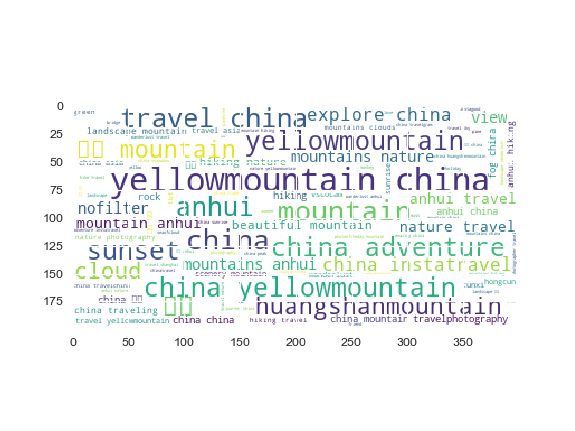

In [61]:
wc = WordCloud(background_color="white", max_words=2000)
wc.generate(" ".join(hashtags))
plt.imshow(wc)

# detect language

In [150]:
!pip install langid

  Running setup.py bdist_wheel for langid: started
  Running setup.py bdist_wheel for langid: finished with status 'done'
  Stored in directory: C:\Users\User\AppData\Local\pip\Cache\wheels\29\bc\61\50a93be85d1afe9436c3dc61f38da8ad7b637a38af4824e86e
Successfully built langid


You are using pip version 9.0.2, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [151]:
import langid

In [164]:
from collections import defaultdict
lang_result = defaultdict(list)
for i in hashtags:
    res = langid.classify(i)
    lang_result[res[0]].append(i)

In [165]:
lang_result

defaultdict(list,
            {'af': ['weekendclimb',
              'shanghaiweekendescap',
              'fremdehaareimbett'],
             'am': ['눈', '눈', '눈', '눈'],
             'ar': ['الرياض',
              'عمان',
              'تصويري',
              'جدة',
              'صنعاء',
              'سفر',
              'الرياض',
              'عمان',
              'تصويري',
              'جدة',
              'صنعاء',
              'الرياض',
              'عمان',
              'تصويري',
              'جدة',
              'صنعاء',
              'الرياض',
              'عمان',
              'تصويري',
              'جدة',
              'صنعاء',
              'الرياض',
              'عمان',
              'تصويري',
              'جدة',
              'صنعاء',
              'الرياض',
              'عمان',
              'تصويري',
              'جدة',
              'صنعاء',
              'استقلال',
              'كوهستان',
              'كوهستان',
              'الصين',
              'طبيعة',

In [ ]:
lang_result = {}
for i in hashtags:
    res = langid.classify(i)
    if res[0] not in lang_result.keys():
        lang_result[res[0]] = 0
    else:
        lang_result[res[0]] += 1

In [163]:
sorted(lang_result.items(), key=lambda x: -x[1])

[('en', 207014),
 ('zh', 26834),
 ('de', 13998),
 ('es', 5929),
 ('fr', 5297),
 ('ko', 4278),
 ('it', 3526),
 ('nl', 3032),
 ('pl', 2987),
 ('da', 2896),
 ('ru', 2564),
 ('et', 1953),
 ('id', 1365),
 ('sv', 1247),
 ('lt', 1238),
 ('pt', 1095),
 ('sl', 874),
 ('be', 778),
 ('fi', 730),
 ('ja', 687),
 ('mn', 677),
 ('ro', 531),
 ('cs', 498),
 ('ar', 439),
 ('eu', 433),
 ('tr', 338),
 ('mt', 330),
 ('mg', 330),
 ('uk', 247),
 ('bg', 231),
 ('ms', 223),
 ('sr', 208),
 ('br', 193),
 ('mk', 181),
 ('ga', 174),
 ('th', 168),
 ('xh', 165),
 ('hu', 153),
 ('hr', 135),
 ('rw', 128),
 ('cy', 111),
 ('kk', 108),
 ('tl', 105),
 ('sw', 97),
 ('lv', 90),
 ('no', 73),
 ('eo', 62),
 ('oc', 58),
 ('sk', 51),
 ('fa', 50),
 ('nn', 49),
 ('sq', 47),
 ('vi', 37),
 ('ca', 29),
 ('qu', 24),
 ('gl', 23),
 ('is', 17),
 ('vo', 14),
 ('nb', 14),
 ('az', 12),
 ('ug', 9),
 ('jv', 7),
 ('ku', 4),
 ('ht', 4),
 ('ka', 3),
 ('ur', 3),
 ('am', 3),
 ('ps', 2),
 ('el', 2),
 ('af', 2),
 ('zu', 2),
 ('bs', 1),
 ('fo', 0),
 

# associaton rules 

In [137]:
# create file for gephi
def tokize(row):
    keywords = []
    if type(row) is not float and len(row)>0:
            for word in row:
                word = word.lower()
                if word not in stop and word.isalpha():
                    keywords.append(porter.stem(word))
    return ",".join(keywords)
clean_df['keywords'] = clean_df['tags'].apply(tokize)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [140]:
keywords_array = []
for idx, row in clean_df.iterrows():
    temp = []
    keyword=row['keywords'].split(',')
    for kw in keywords:
        if len(kw)>0:
            temp.append(kw)
    if len(temp)>0:
        keywords_array.append(temp)

In [204]:
clean_df[clean_df['keywords']!='']['keywords'].to_csv('rule.csv',index=False, encoding="utf-8-sig" )

In [148]:
clean_df[36956:36961]

id  likes  comment                                         text  \
36956  212205448    121        2      #China #picture #hotel #huangshan #girl   
36957  161165026     16        0                   #黄山 #huangshan  #mountain    
36958  161162427      5        0                   #黄山 #huangshan  #mountain    
36959  161158933     23        1  #黄山 #huangshan #sunrise #mountain  #monster   
36960  161156310     17        0                                                

         owner                                         tags  \
36956  8388149     [picture, girl, hotel, China, huangshan]   
36957  4607214                    [mountain, huangshan, 黄山]   
36958  4607214                    [mountain, huangshan, 黄山]   
36959  4607214  [mountain, monster, sunrise, huangshan, 黄山]   
36960  4607214                                          NaN   

                     time                    keywords  
36956 2011-09-10 05:24:10     pictur,girl,hotel,china  
36957 2011-08-07 16:03:42                 mountain,黄山  
36958 2011-08-07 16:01:40                 mountain,黄山  
36959 2011-08-07 15:58:54  mountain,monster,sunris,黄山  
36960 2011-08-07 15:56:54

In [142]:
kw_df = pd.DataFrame(keywords_array)

In [143]:
kw_df

0                    1               2   \
0                  cablecar                 None            None   
1             girlsthatwand         shotzdelight    darlingescap   
2                      free             mountain            hike   
3         forgetyourownpath       chinahighlight       sonyalpha   
4                     thecr           instachina        travelog   
5                  mountain               travel              好玩   
6                     anhui               travel           china   
7                     china       yellowmountain            None   
8                      citi        hongcunvillag         ancient   
9                     china                anhui        feicuigu   
10                    china                anhui            None   
11                    china                anhui            None   
12                     film                 None            None   
13                   podroz             mountain            hike   
14               polishgirl                china             tbt   
15           traveltheworld               awesom        magnific   
16                   hotpot          chinesefood           spici   
17        forgetyourownpath       chinahighlight       sonyalpha   
18             naturebeauti   unescoworldheritag     stonemonkey   
19                    anhui               travel           china   
20              revolverlen  portraitphotographi          granni   
21                   nofilt                china           natur   
22                       黄山                 None            None   
23                     shop               travel            neon   
24                 mountain               travel  yellowmountain   
25               visitchina                 None            None   
26     tourwithsalikatravel             shanghai    salikatravel   
27                   beauti               explor  traveltheworld   
28          chineselandscap         blackandwhit          chines   
29                 mountain             backpack            hike   
...                     ...                  ...             ...   
32939                 great                water        waterfal   
32940                 water               stream           natur   
32941              mountain               pictur           china   
32942               instasg             mountain      iphoneasia   
32943               instasg             mountain           cloud   
32944              mountain                 wire           china   
32945                 water                river           china   
32946                 stair                china            None   
32947                 china               monkey            None   
32948                pictur                 girl           hotel   
32949              mountain                   黄山            None   
32950              mountain                   黄山            None   
32951              mountain              monster          sunris   
32952              mountain               sunris              黄山   
32953              mountain               sunris              黄山   
32954              mountain               sunris              黄山   
32955              mountain               sunris              黄山   
32956                sunset                   黄山            None   
32957                sunset                   黄山            None   
32958         iphoneographi            instagram           peopl   
32959             instagram                natur   iphoneographi   
32960                  asia            instagram           natur   
32961                travel                 lake            asia   
32962                  door               travel           china   
32963              mountain               travel           china   
32964              mountain                natur          travel   
32965                 natur            hipstamat          travel   
32966        

# save file to geiph to do network analysis

In [100]:
# create file for gephi
def tokize(row):
    keywords = []
    if type(row) is not float and len(row)>0:
            for word in row:
                word = word.lower()
                if word not in stop and word.isalpha():
                    keywords.append(porter.stem(word))
    return ",".join(keywords)

In [101]:
clean_df['keywords'] = clean_df['tags'].apply(tokize)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [111]:
clean_df.head()

id  likes  comment  \
0  1768635695000550746     31        2   
1  1779027164797484376    105        4   
2  1751782291691387418    902      333   
3  1763494337332593967     35        5   
4  1779157559519623087    124       15   

                                                text       owner  \
0             Breathtaking view #HuangShan #cablecar    49135036   
1  I’m grateful for the trees and mountains that ...   184152999   
2  徽州古城 Wandering around an ancient Chinese garde...  5064849724   
3         #huangshan #mountains #hiking #free #fresh   314391040   
4  One of my favorite shots of Huangshan! The tre...  1525150815   

                                                tags                time  \
0                              [HuangShan, cablecar] 2018-04-30 03:10:26   
1                                                 [] 2018-05-14 11:16:26   
2  [girlsthatwander, shotzdelight, asia_vacations... 2018-04-06 21:05:44   
3        [free, mountains, hiking, huangshan, fresh] 2018-04-23 00:55:28   
4  [forgetyourownpath, chinahighlights, sonyalpha... 2018-05-14 15:35:30   

                                            keywords  
0                                           cablecar  
1                                                     
2  girlsthatwand,shotzdelight,darlingescap,femmet...  
3                           free,mountain,hike,fresh  
4  forgetyourownpath,chinahighlight,sonyalpha,the...

In [129]:
com = []
for each in mostcommon:
    com.append(each[0])

keywords_dict = {}
for index, row in clean_df.iterrows():
    keywords=row['keywords'].split(',')
    if len(keywords)>=2:
        for k1 in range(len(keywords)-1):
            for k2 in range(k1+1,len(keywords)):
                if keywords[k1] in com and keywords[k2] in com:
                    if (keywords[k1],keywords[k2]) in keywords_dict.keys():
                        keywords_dict[(keywords[k1],keywords[k2])] += 1
                    elif (keywords[k2], keywords[k1]) in keywords_dict.keys():
                        keywords_dict[(keywords[k2], keyword s[k1])] += 1
                    else:
                        keywords_dict[(keywords[k1],keywords[k2])] = 0

In [ ]:
keywords_array = []
for key, value in keywords_dict.items():
    keywords_array.append((key[0], key[1], value))
kw_df = pd.DataFrame(keywords_array).rename(columns={0:'Source', 1:'Target', 2:'Weight'})

In [136]:
kw_df.to_csv('hashtag_co-occurancy_matrix.csv', index=False)

In [123]:
kw_df['weight'].describe()

count    583725.000000
mean          2.689679
std          31.057483
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max        9120.000000
Name: weight, dtype: float64

In [131]:
len(kw_df)

4856

In [ ]:
co_occur.to_csv('hashtag_co-occurancy_matrix.csv')

In [110]:
from collections import OrderedDict

# most 100 common words
com = []
for each in mostcommon:
    com.append(each[0])

# calculate cooccurence
for index, row in kw_df.iterrows():
    keywords=row['keywords'].split(',')
    if len(keywords)>1:
        
    
    
co_occur = pd.DataFrame.from_dict(occurrences )


KeyboardInterrupt



# sentiment analysis

In [166]:
clean_df.head()

id  likes  comment  \
0  1768635695000550746     31        2   
1  1779027164797484376    105        4   
2  1751782291691387418    902      333   
3  1763494337332593967     35        5   
4  1779157559519623087    124       15   

                                                text       owner  \
0             Breathtaking view #HuangShan #cablecar    49135036   
1  I’m grateful for the trees and mountains that ...   184152999   
2  徽州古城 Wandering around an ancient Chinese garde...  5064849724   
3         #huangshan #mountains #hiking #free #fresh   314391040   
4  One of my favorite shots of Huangshan! The tre...  1525150815   

                                                tags                time  \
0                              [HuangShan, cablecar] 2018-04-30 03:10:26   
1                                                 [] 2018-05-14 11:16:26   
2  [girlsthatwander, shotzdelight, asia_vacations... 2018-04-06 21:05:44   
3        [free, mountains, hiking, huangshan, fresh] 2018-04-23 00:55:28   
4  [forgetyourownpath, chinahighlights, sonyalpha... 2018-05-14 15:35:30   

                                            keywords  
0                                           cablecar  
1                                                     
2  girlsthatwand,shotzdelight,darlingescap,femmet...  
3                           free,mountain,hike,fresh  
4  forgetyourownpath,chinahighlight,sonyalpha,the...

In [172]:
clean_df['text'][2]

'徽州古城 Wandering around an ancient Chinese garden 💕 Interestingly, most of my Chinese friends don’t like this photo 😂 because they think there’s nothing special about this place, just a pavilion and a pond that is filled with goldfish 🐠 but maybe because I have been away from China for so long that I really appreciate more of the traditional Chinese gardens 😂 what do you guys think?\n*\n*\n*\n*\n*\n*\n*\n*\n #prettylittleiiinspo #girlsthatwander #Travelinladies #iamtb\n#Girlsabroad #Wearetravelgirls #Femmetravel #Girlsborntotravel\n#Sidewalkerdaily #Sheisnotlost \n#Ladiesgoneglobal \n#DarlingEscapes #agameoftones\n#theimaged #shotzdelight #artofvisuals #huangshan #roamtheplanet #stayandwander #moodygrams #instagood10k  #chinesegarden #loves_china #chinatrip #chinadestinations #chinainsider #anhui #travel2china #asia_vacations #dametraveler'

In [173]:
langid.classify(clean_df['text'][2])

('en', -1536.6788048744202)

In [193]:
from nltk.tokenize import word_tokenize
import re

# stop words
stop_words = stopwords.words('english')

def clean(text):
    min_length = 3
    words = map(lambda word: word.lower(), word_tokenize(text))
    words = [word for word in words if word not in stop_words] 
    p = re.compile('[a-zA-Z]+')   #make sure each word are meaningful
    cleaned_words = list(filter(lambda token: p.match(token) and len(token)>=min_length, words));
    return " ".join(cleaned_words)

In [194]:
clean_df['clean_text'] = clean_df['text'].apply(clean)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [201]:
text_df = clean_df.loc[clean_df['clean_text'] != '']['clean_text']

In [278]:
text_df.to_csv('senti.csv',index=False, encoding='utf-8-sig')